
organism = all


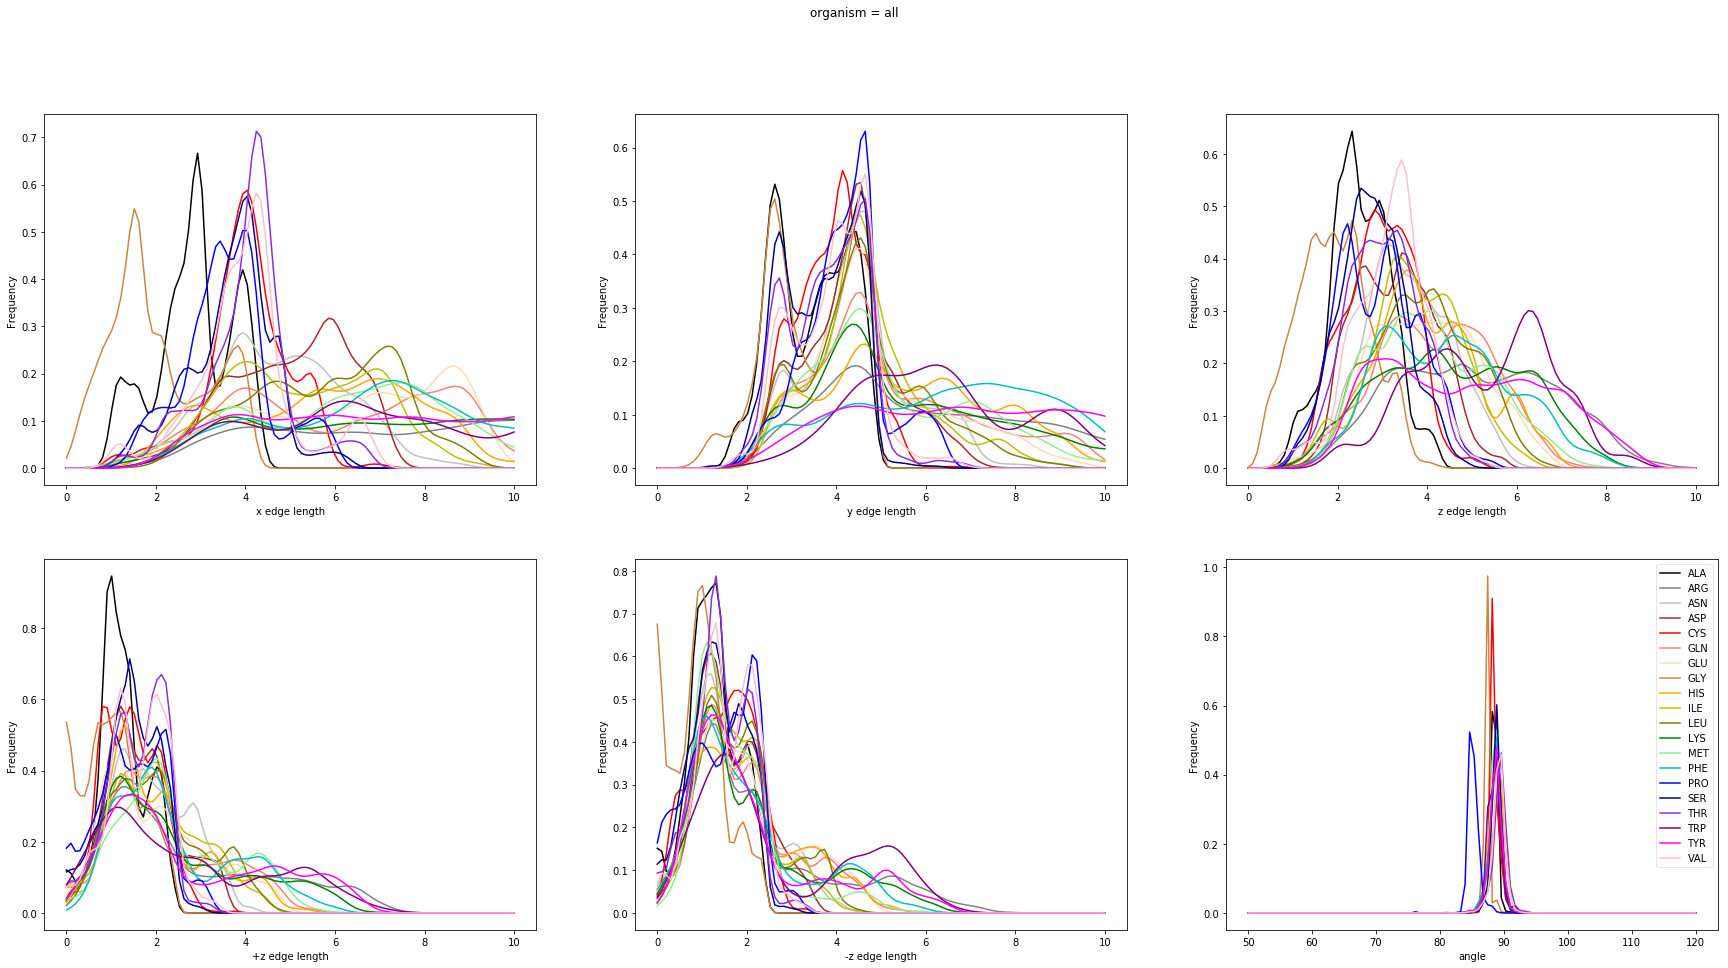


organism = homo sapiens


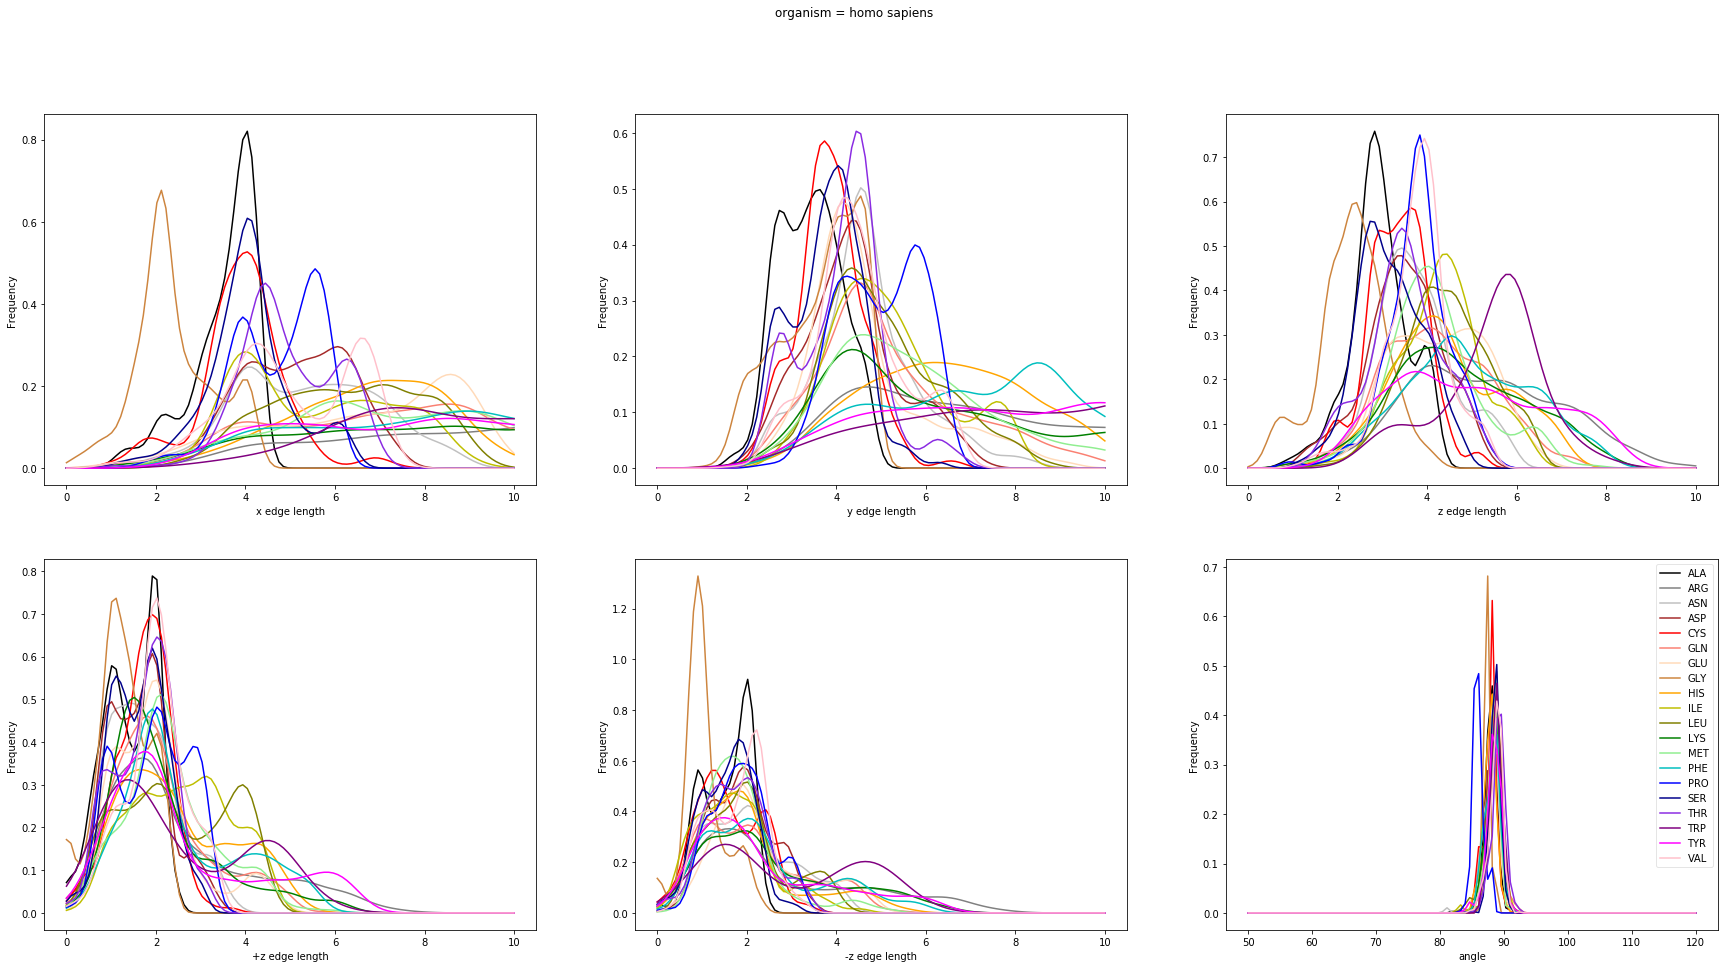


organism = escherichia coli


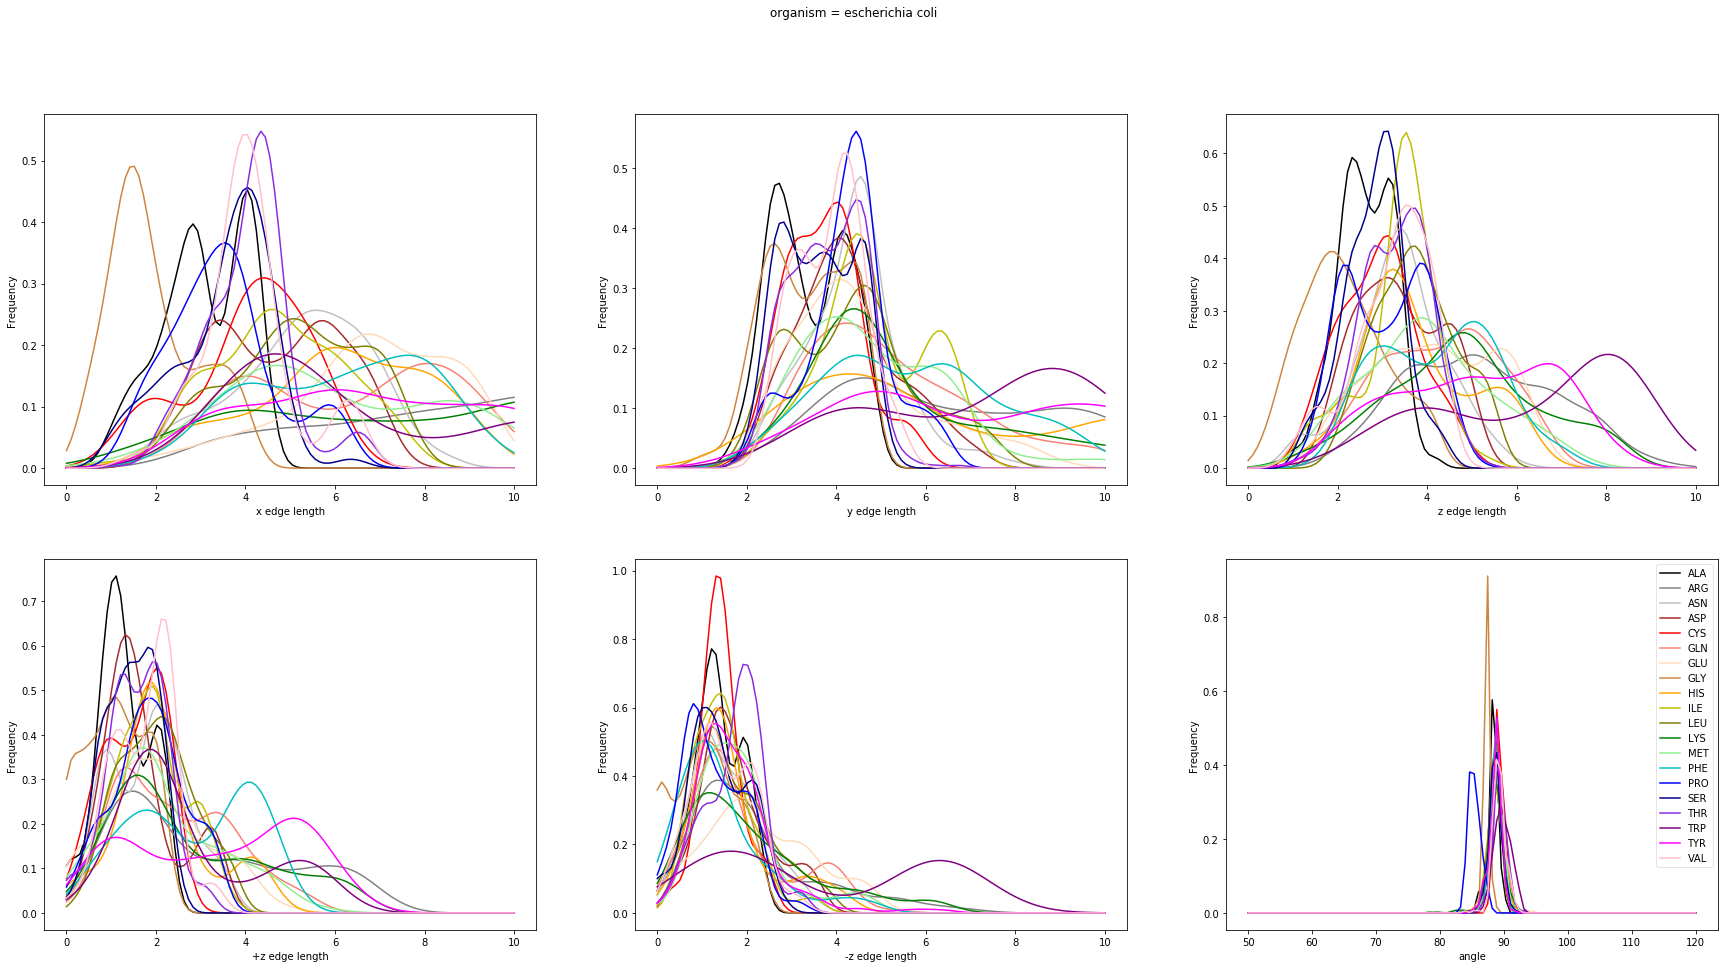


organism = virus


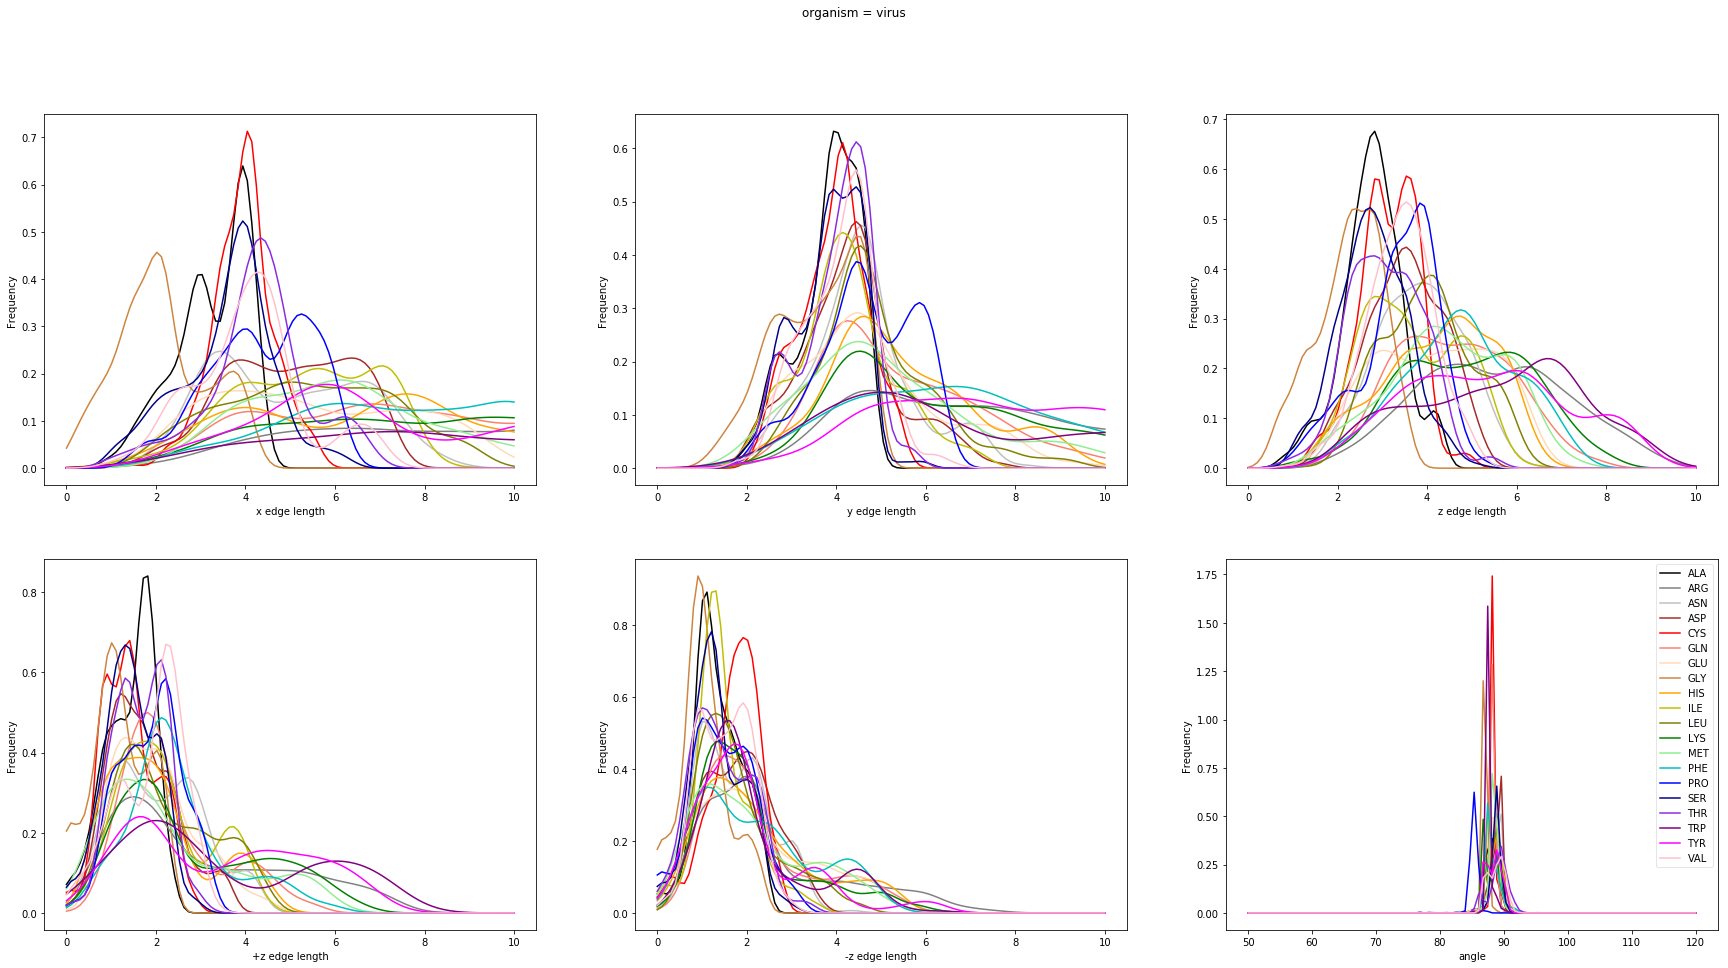

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy import stats


df = pd.read_csv('statistics_all.csv', low_memory=False) #[['Amino acid', 'x size', 'y size', 'z size']]
df['resolution'] = df['resolution'].apply(lambda x: float(x) if x != 'None' else None)
df = df.loc[(df['closest rna dist.']<= 4) & ((df['resolution'].isnull()) | (df['resolution'] < 3.2))]

organisms = ['all', 'homo sapiens', 'escherichia coli', 'virus']

plt.rcParams['figure.figsize'] = [30, 15]
colors = ['k', 'grey', 'silver', 'brown', 'r', 'salmon', 'peachpuff', 'peru', 'orange', 'y', 'olive',
          'g', 'lightgreen', 'c', 'b', 'darkblue', 'blueviolet', 'purple', 'magenta', 'pink']
# header = ['name', 'x max', 'x -5% max', 'x -10% max', 'y max', 'y -5% max', 'y -10% max', '+z max', '+z -5% max',
#       '+z -10% max', '-z max', '-z -5% max', '-z -10% max', 'z max', 'z -5% max', 'z -10% max']
header = ['name', 'x max', 'x -5% max', 'y max', 'y -5% max', '+z max', '+z -5% max',
          '-z max', '-z -5% max','z max', 'z -5% max']

for o in organisms:
    if o == 'all':
        data1 = df
    else:
        data1 = df.loc[df['organism'].str.contains(o)]

    print()
    print(f'organism = {o}')

    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
    f.suptitle(f'organism = {o}')

    all_list = []
    for i, (name, data) in enumerate(data1.groupby('Amino acid')):
        xs = np.linspace(0, 10, 100)

        x_sizes = data['x size'].values
        density_x = stats.gaussian_kde(x_sizes)
        ax1.plot(xs, density_x(xs), color=colors[i])
        ax1.set_xlabel('x edge length')
        ax1.set_ylabel('Frequency')

        y_sizes = data['y size'].values
        density_y = stats.gaussian_kde(y_sizes)
        ax2.plot(xs, density_y(xs), color=colors[i])
        ax2.set_xlabel('y edge length')
        ax2.set_ylabel('Frequency')

        plus_z_sizes = data['z size'].values
        minus_z_sizes = np.abs(data['-z size'].values)
        z_sizes = plus_z_sizes + minus_z_sizes

        density_z = stats.gaussian_kde(z_sizes)
        ax3.plot(xs, density_z(xs), color=colors[i])
        ax3.set_xlabel('z edge length')
        ax3.set_ylabel('Frequency')

        density_pz = stats.gaussian_kde(plus_z_sizes)
        ax4.plot(xs, density_pz(xs), color=colors[i])
        ax4.set_xlabel('+z edge length')
        ax4.set_ylabel('Frequency')

        density_mz = stats.gaussian_kde(minus_z_sizes)
        ax5.plot(xs, density_mz(xs), color=colors[i])
        ax5.set_xlabel('-z edge length')
        ax5.set_ylabel('Frequency')

        a = np.linspace(50, 120, 100)
        density_a = stats.gaussian_kde(data['angle'].values)
        ax6.plot(a, density_a(a), color=colors[i], label=name)
        ax6.set_xlabel('angle')
        ax6.set_ylabel('Frequency')
        ax6.legend(loc='best', fancybox=True, framealpha=0.5)

        def get_max(bb_sizes):
            bb_sizes.sort()
            size_max = np.round(np.max(bb_sizes), 2)
            size_max_5 = np.round(bb_sizes[int(len(bb_sizes) - len(bb_sizes) * 0.05)], 2)
            size_max_10 = np.round(bb_sizes[int(len(bb_sizes) - len(bb_sizes) * 0.1)], 2)
            return [size_max, size_max_5, size_max_10]

        aa_list = [name]
        aa_list.extend(get_max(x_sizes))
        aa_list.extend(get_max(y_sizes))
        aa_list.extend(get_max(plus_z_sizes))
        aa_list.extend(get_max(minus_z_sizes))
        aa_list.extend(get_max(z_sizes))

        all_list.append(aa_list)

    # print(tabulate(all_list, headers=header, tablefmt='orgtbl'))
    plt.show()

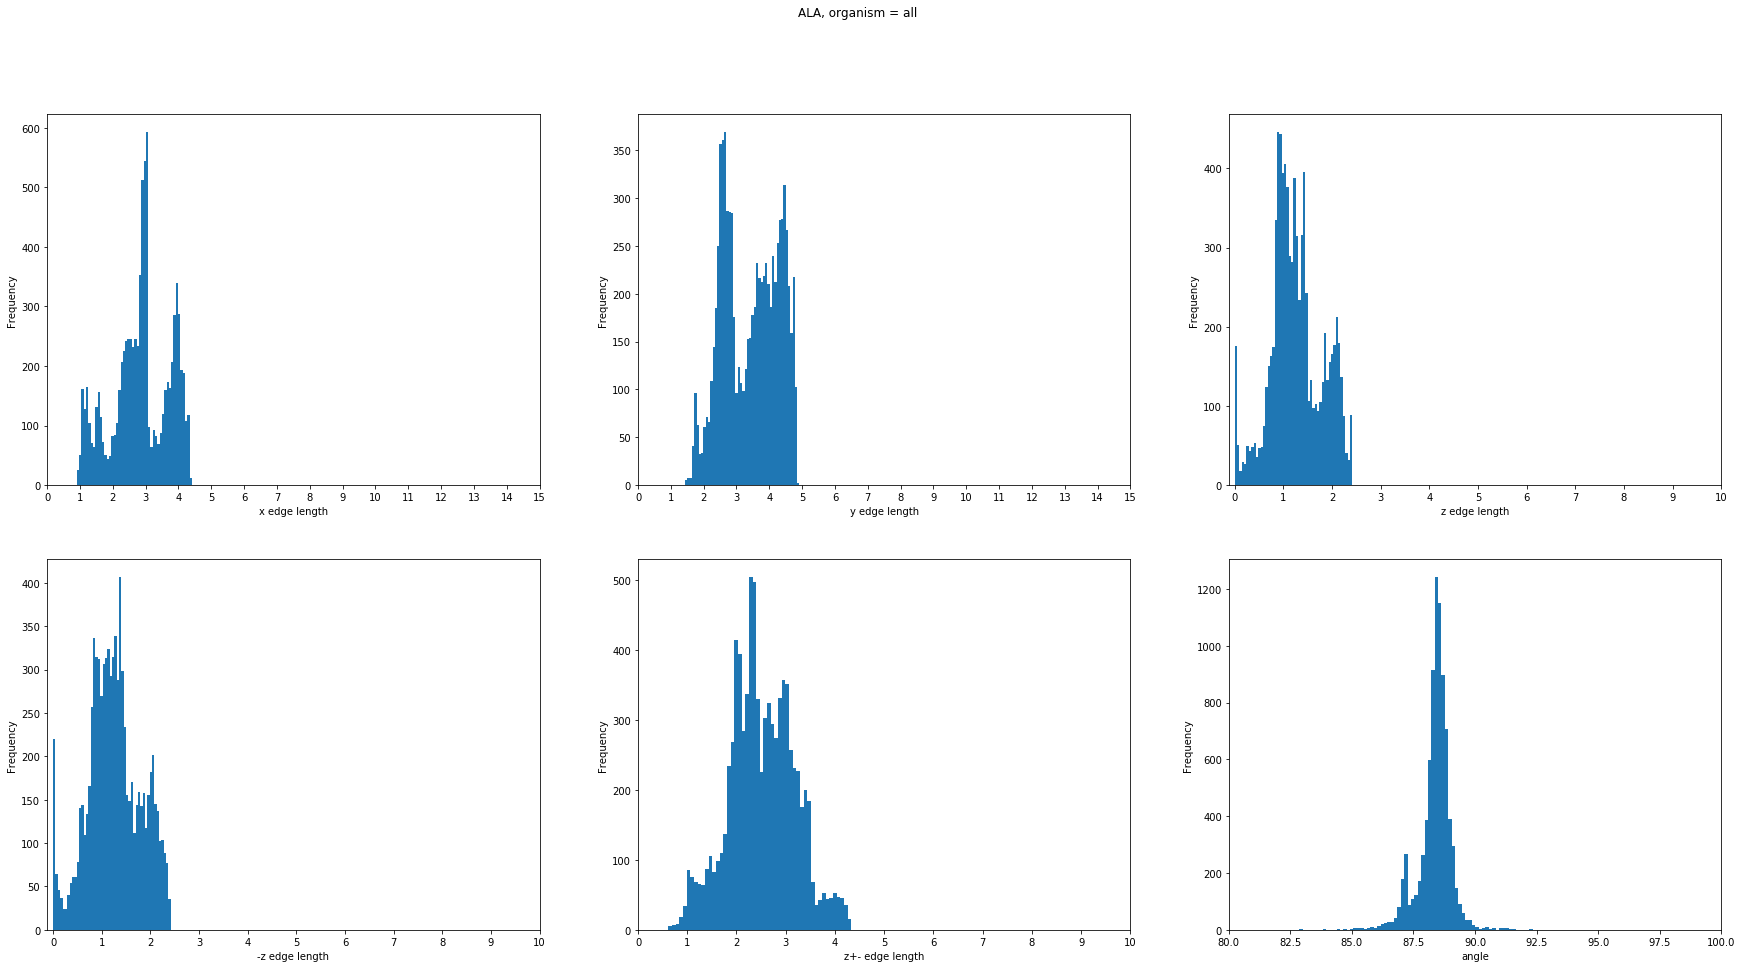

ALA: mean of x sizes: 2.85, mean of y sizes: 3.43, mean of z sizes: 1.26
ALA: max of x sizes: 4.41, max of y sizes: 4.92, max of z sizes: 2.42


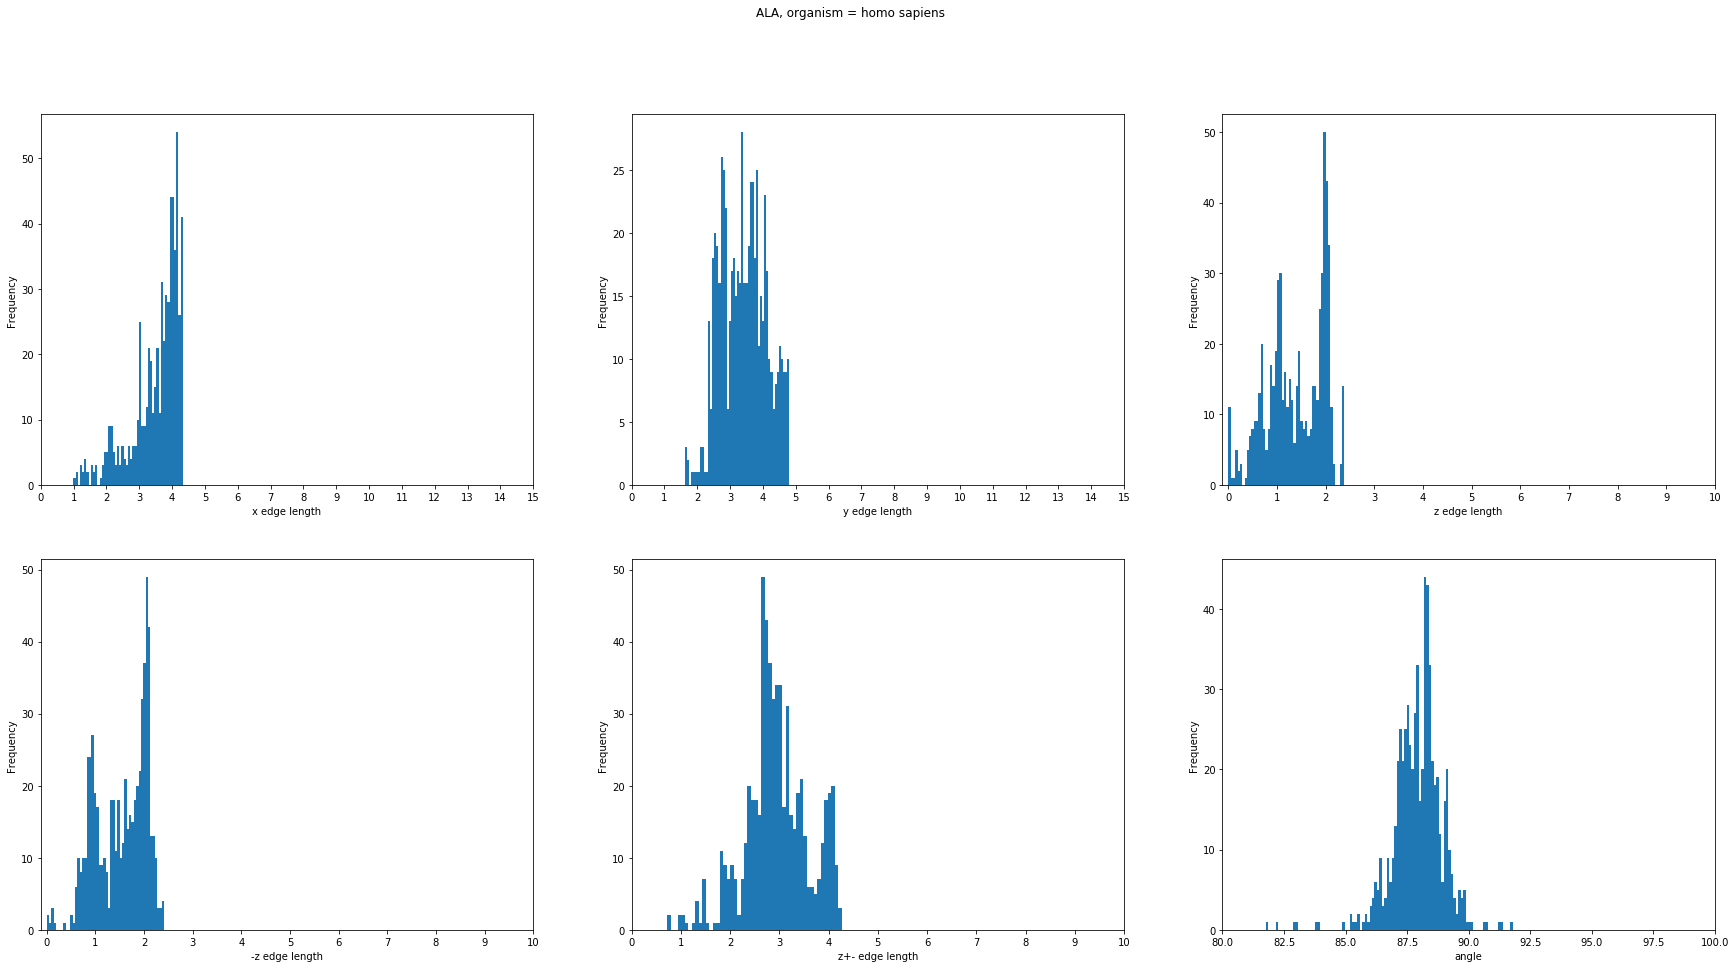

ALA: mean of x sizes: 3.51, mean of y sizes: 3.41, mean of z sizes: 1.4
ALA: max of x sizes: 4.32, max of y sizes: 4.8, max of z sizes: 2.39


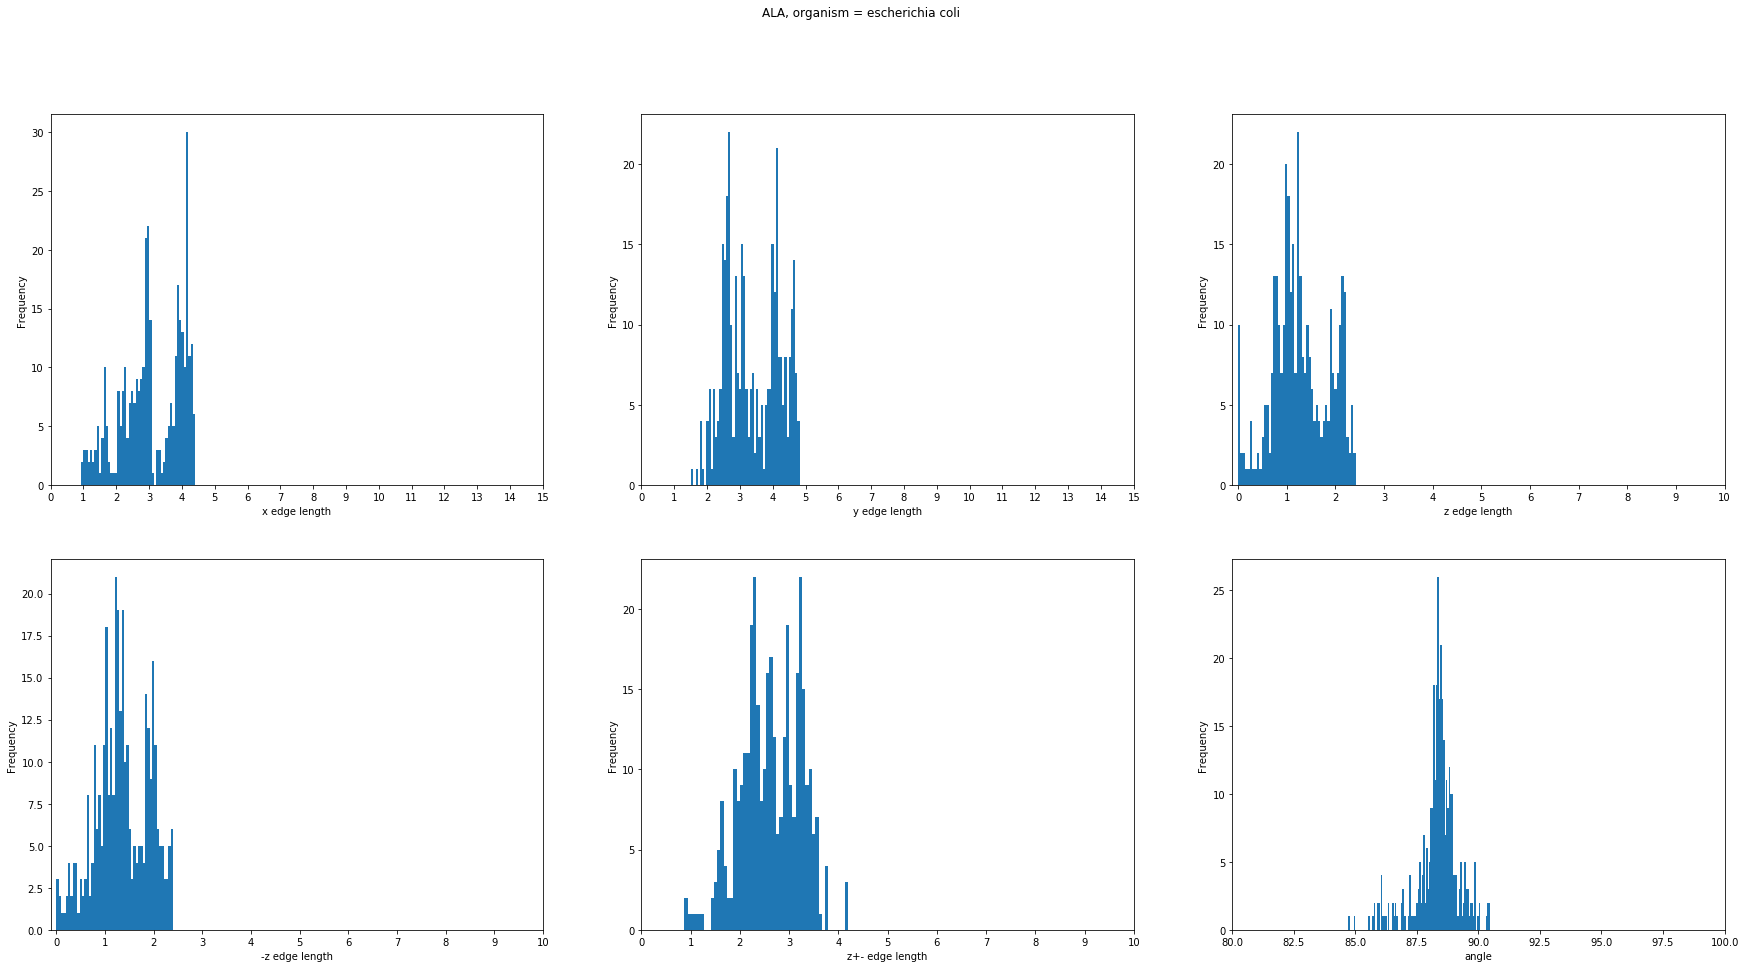

ALA: mean of x sizes: 3.07, mean of y sizes: 3.38, mean of z sizes: 1.28
ALA: max of x sizes: 4.41, max of y sizes: 4.82, max of z sizes: 2.42


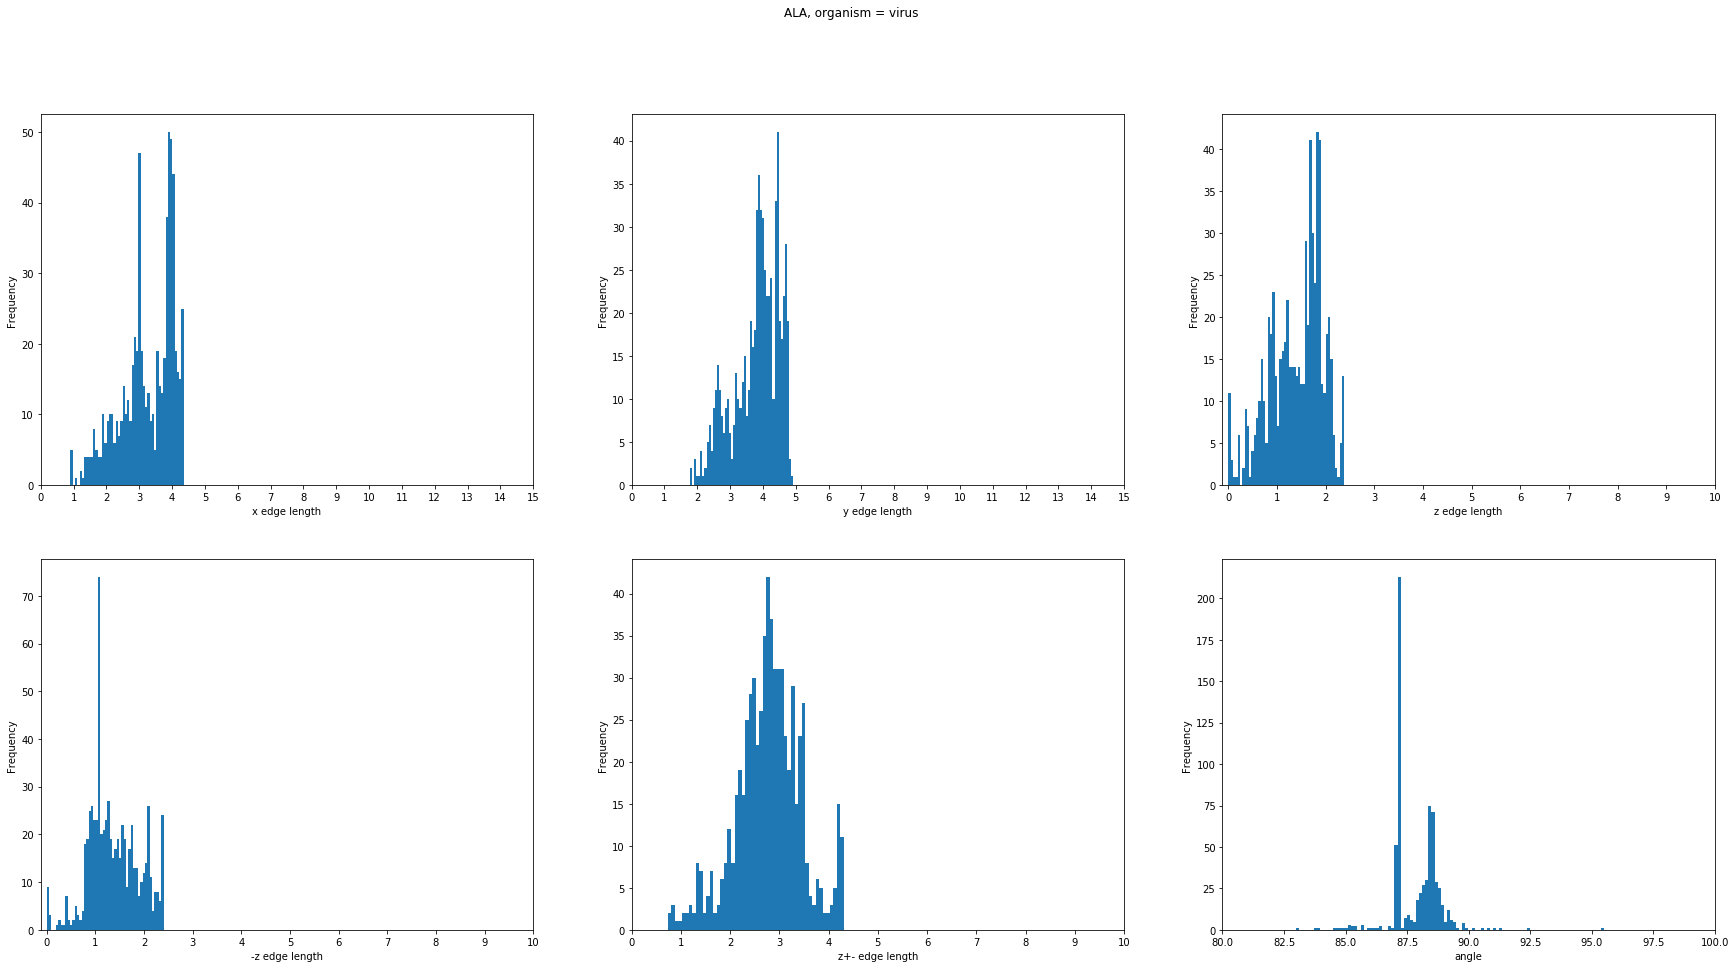

ALA: mean of x sizes: 3.25, mean of y sizes: 3.81, mean of z sizes: 1.41
ALA: max of x sizes: 4.35, max of y sizes: 4.92, max of z sizes: 2.38


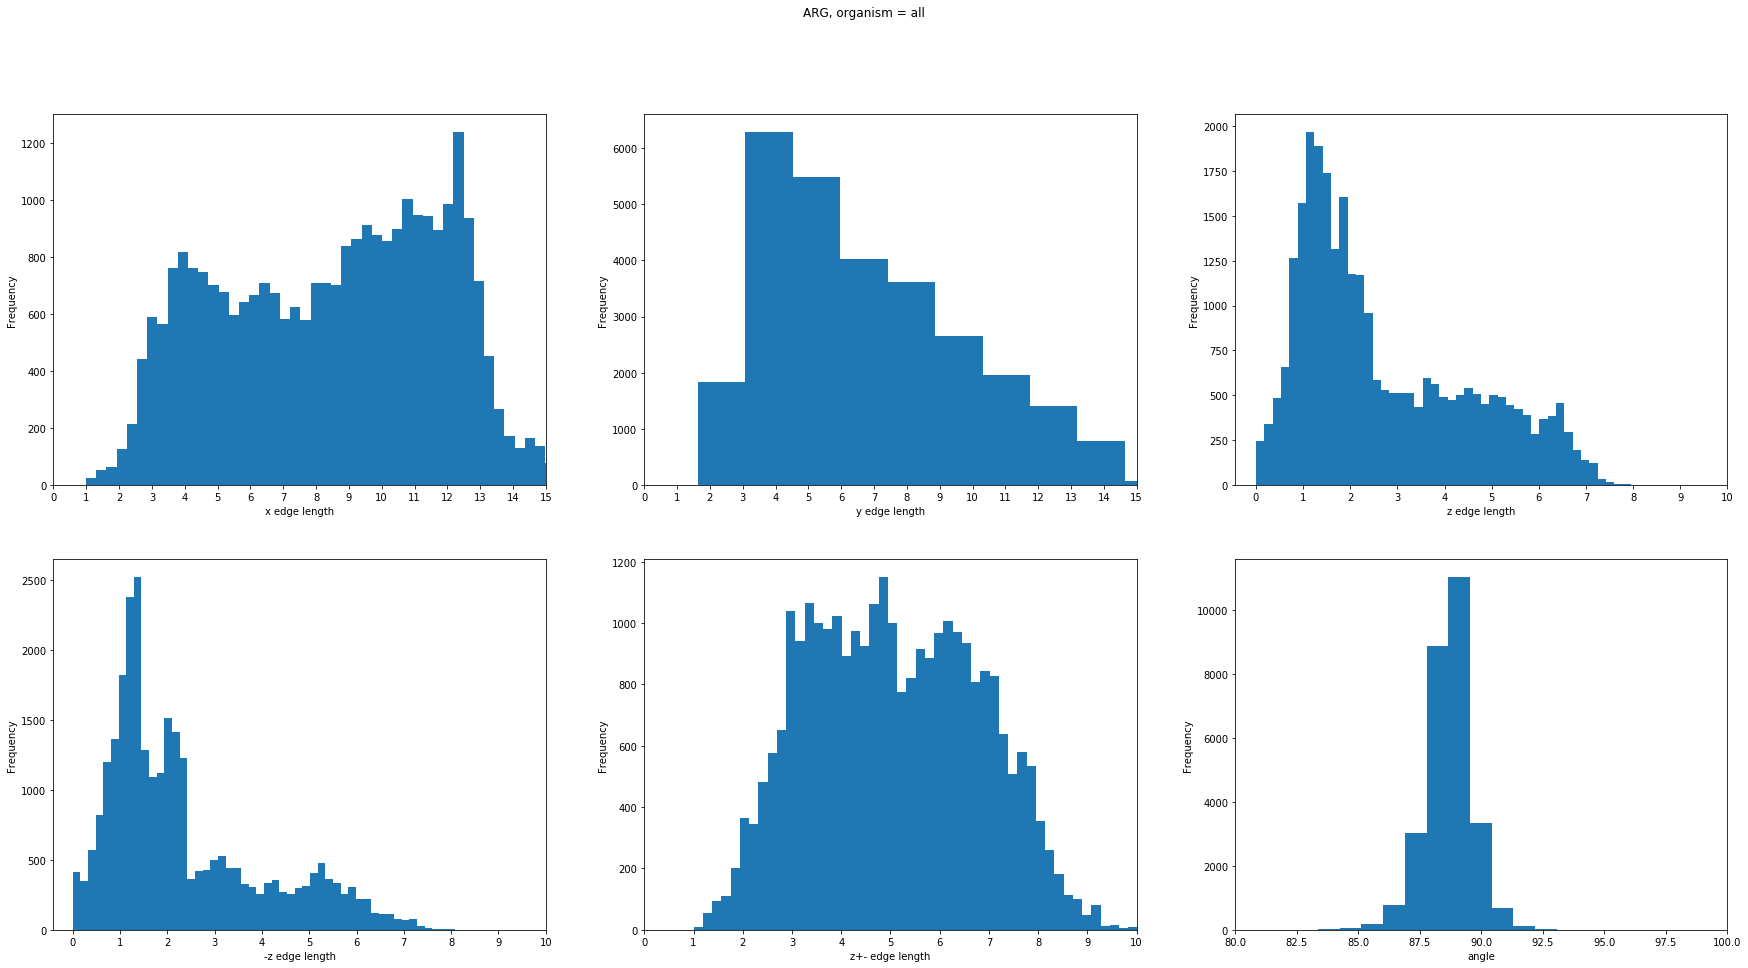

ARG: mean of x sizes: 8.49, mean of y sizes: 6.77, mean of z sizes: 2.72
ARG: max of x sizes: 16.54, max of y sizes: 73.88, max of z sizes: 8.84


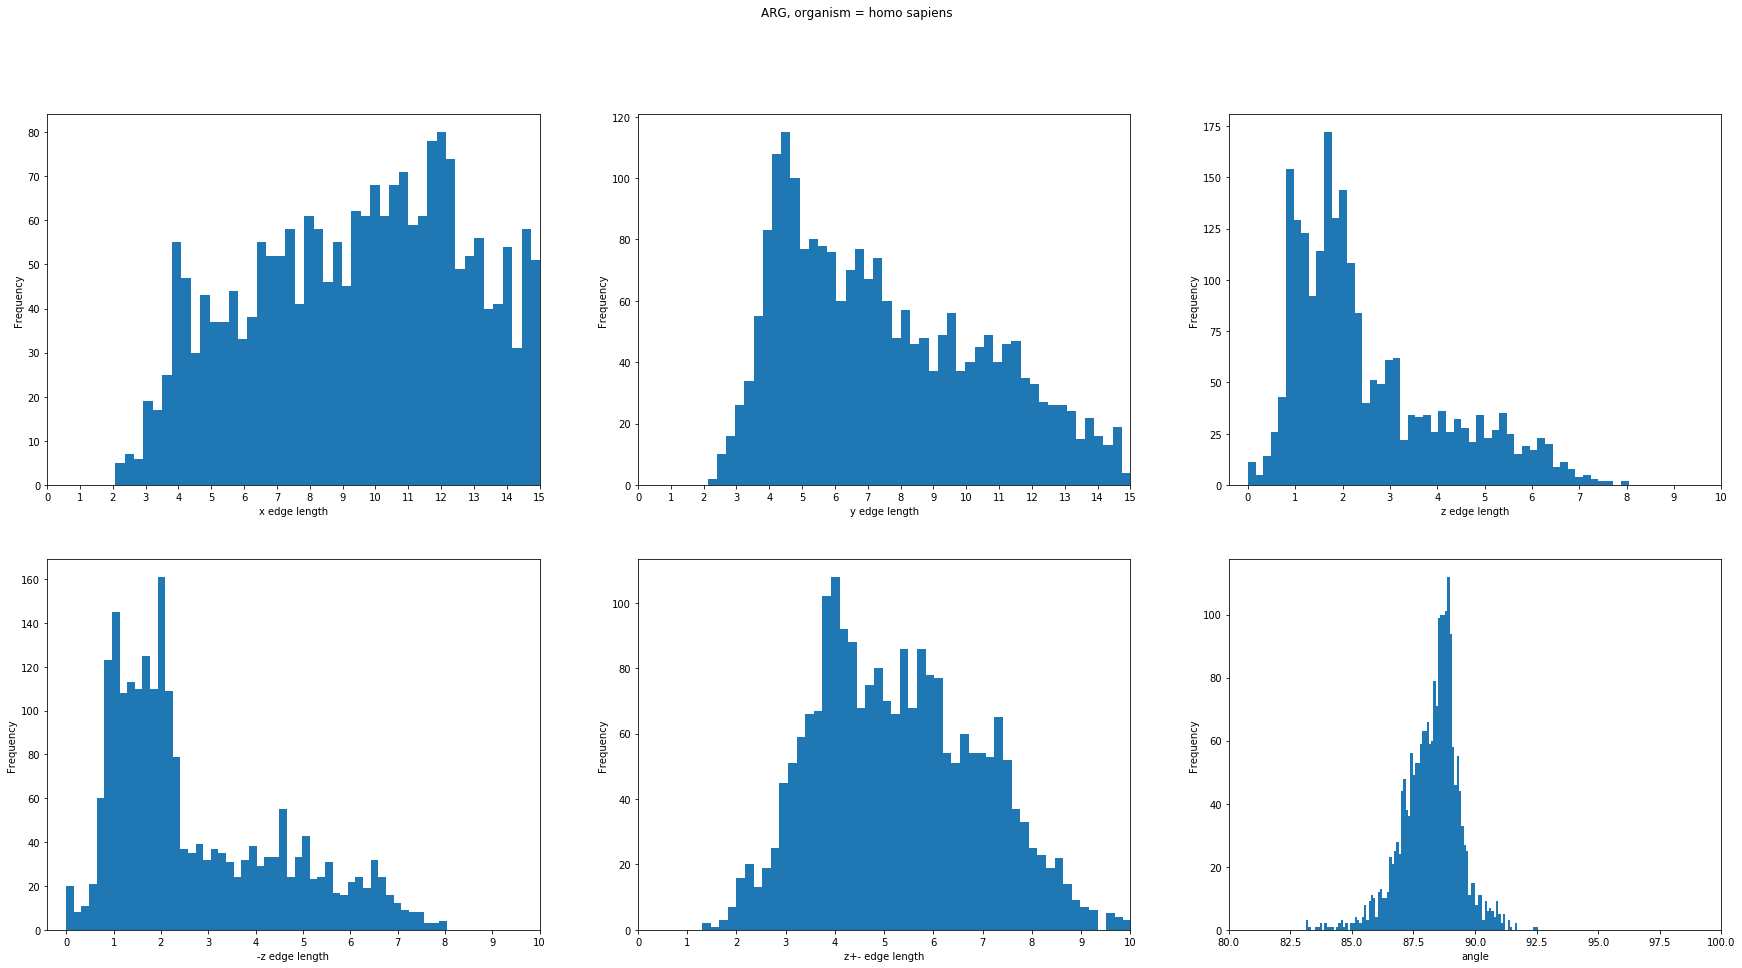

ARG: mean of x sizes: 9.57, mean of y sizes: 7.59, mean of z sizes: 2.55
ARG: max of x sizes: 16.47, max of y sizes: 16.14, max of z sizes: 8.04


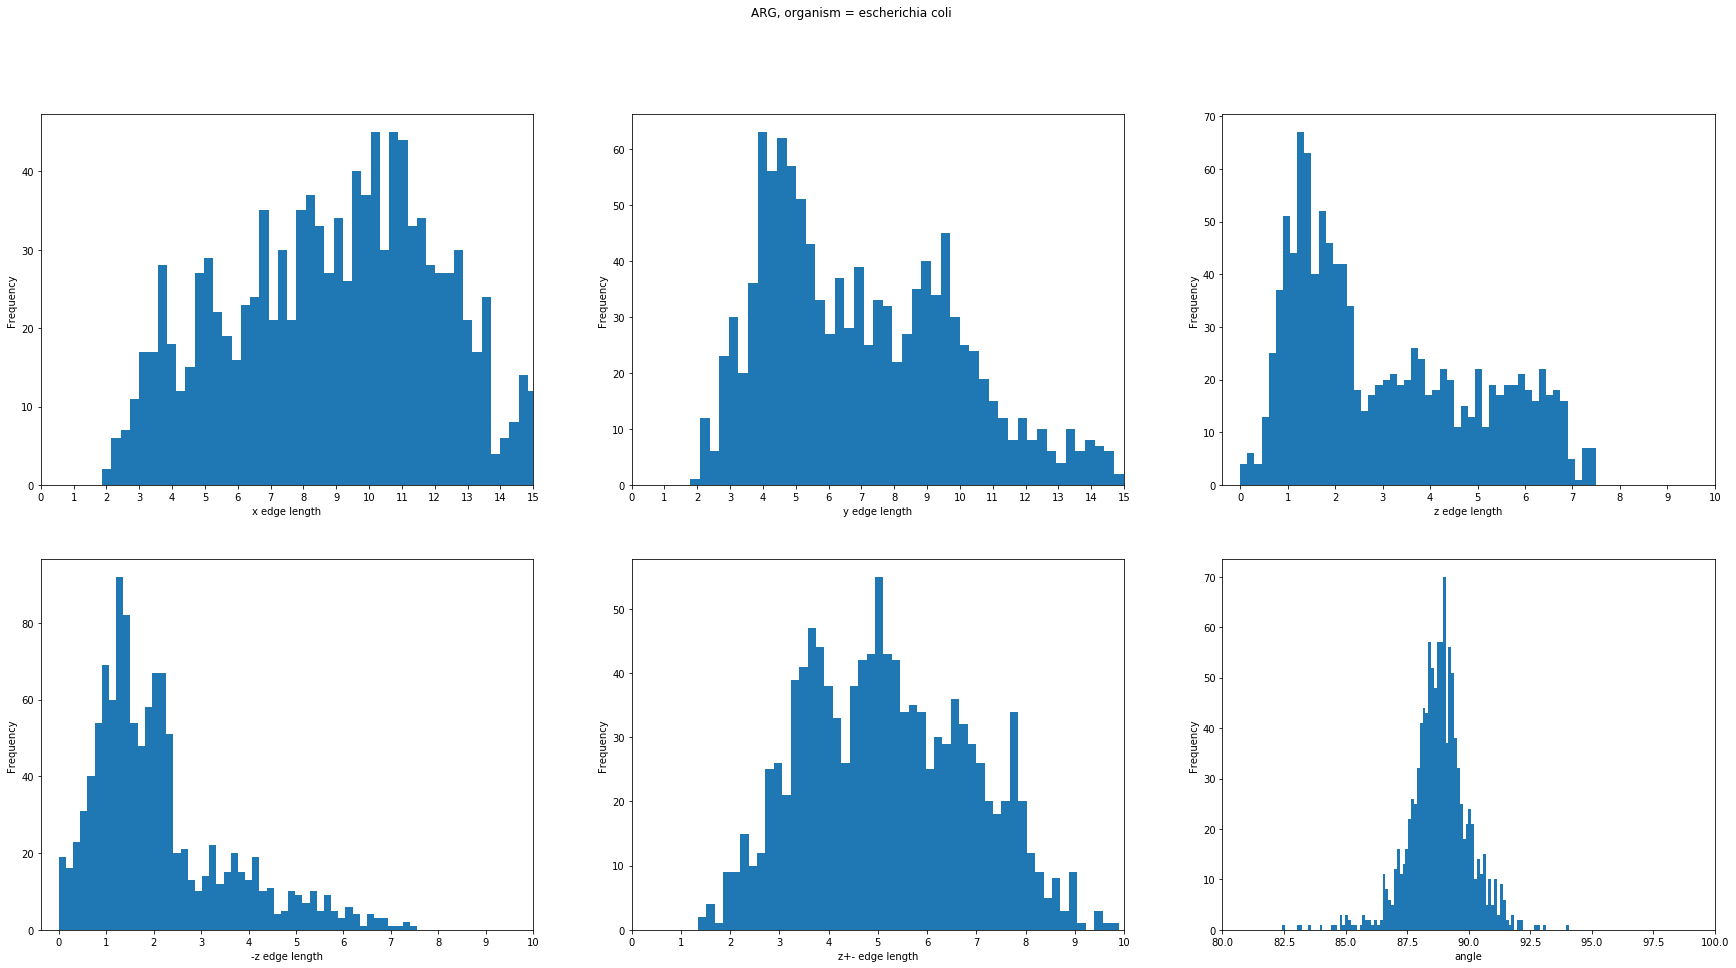

ARG: mean of x sizes: 8.97, mean of y sizes: 7.09, mean of z sizes: 3.08
ARG: max of x sizes: 15.97, max of y sizes: 16.45, max of z sizes: 7.5


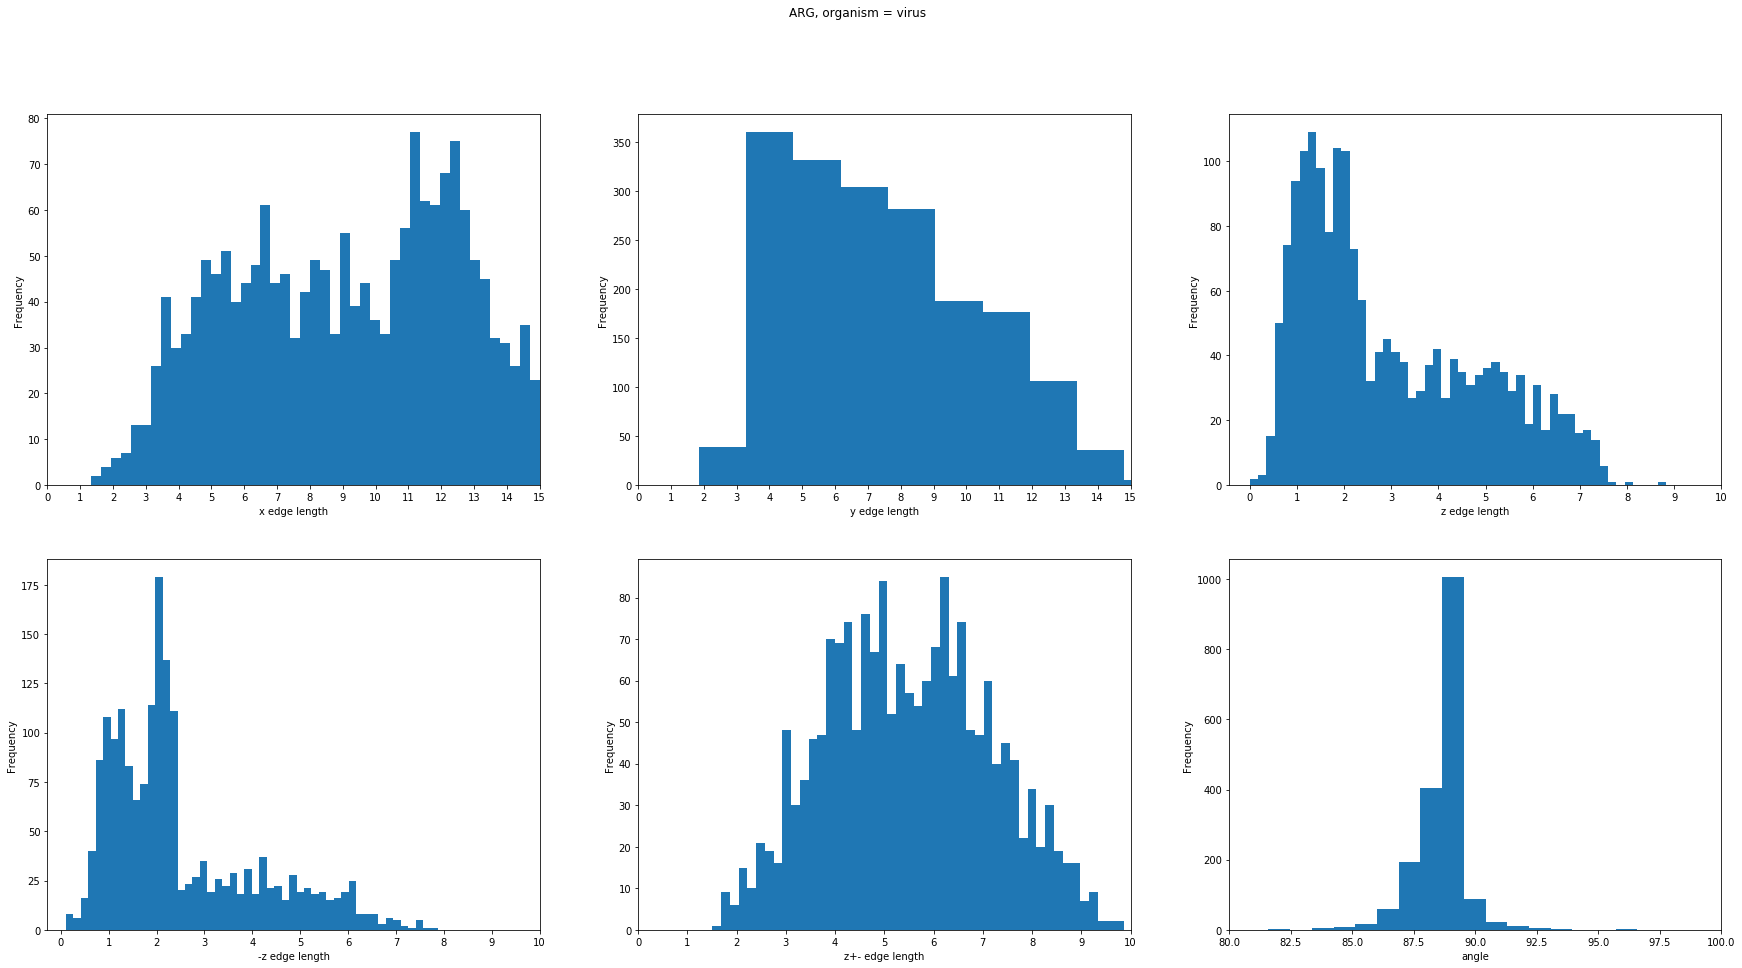

ARG: mean of x sizes: 9.13, mean of y sizes: 7.47, mean of z sizes: 3.0
ARG: max of x sizes: 16.54, max of y sizes: 73.88, max of z sizes: 8.84


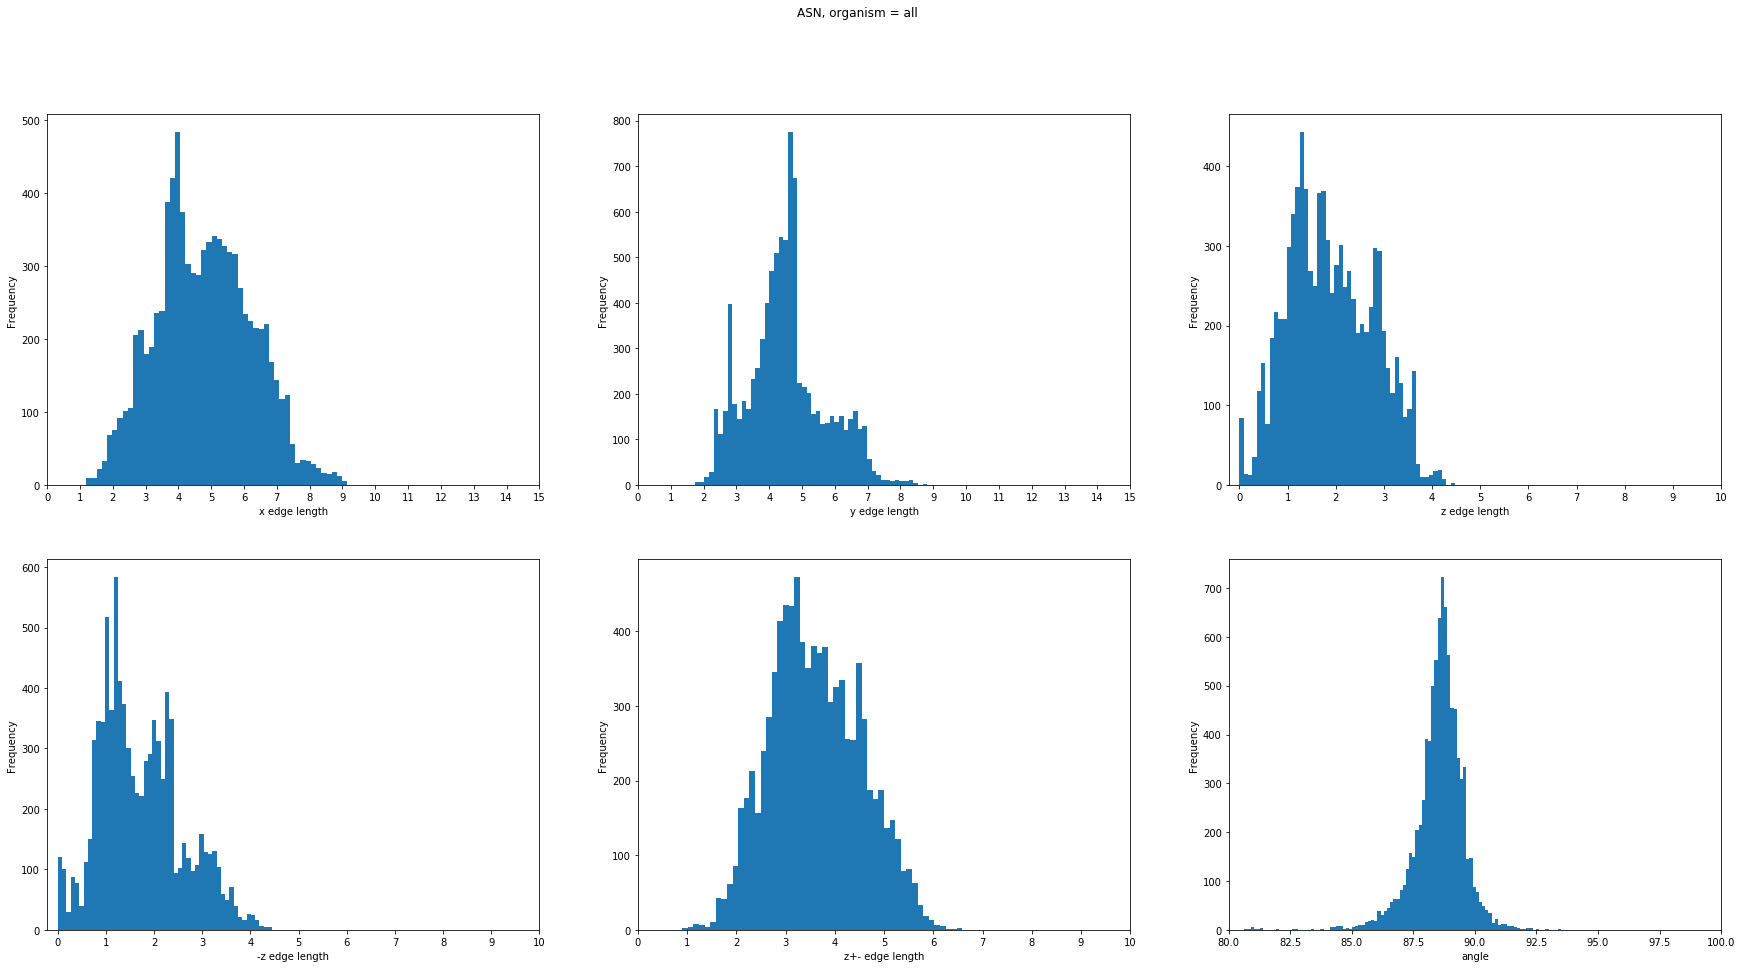

ASN: mean of x sizes: 4.79, mean of y sizes: 4.51, mean of z sizes: 1.89
ASN: max of x sizes: 9.15, max of y sizes: 8.82, max of z sizes: 4.47


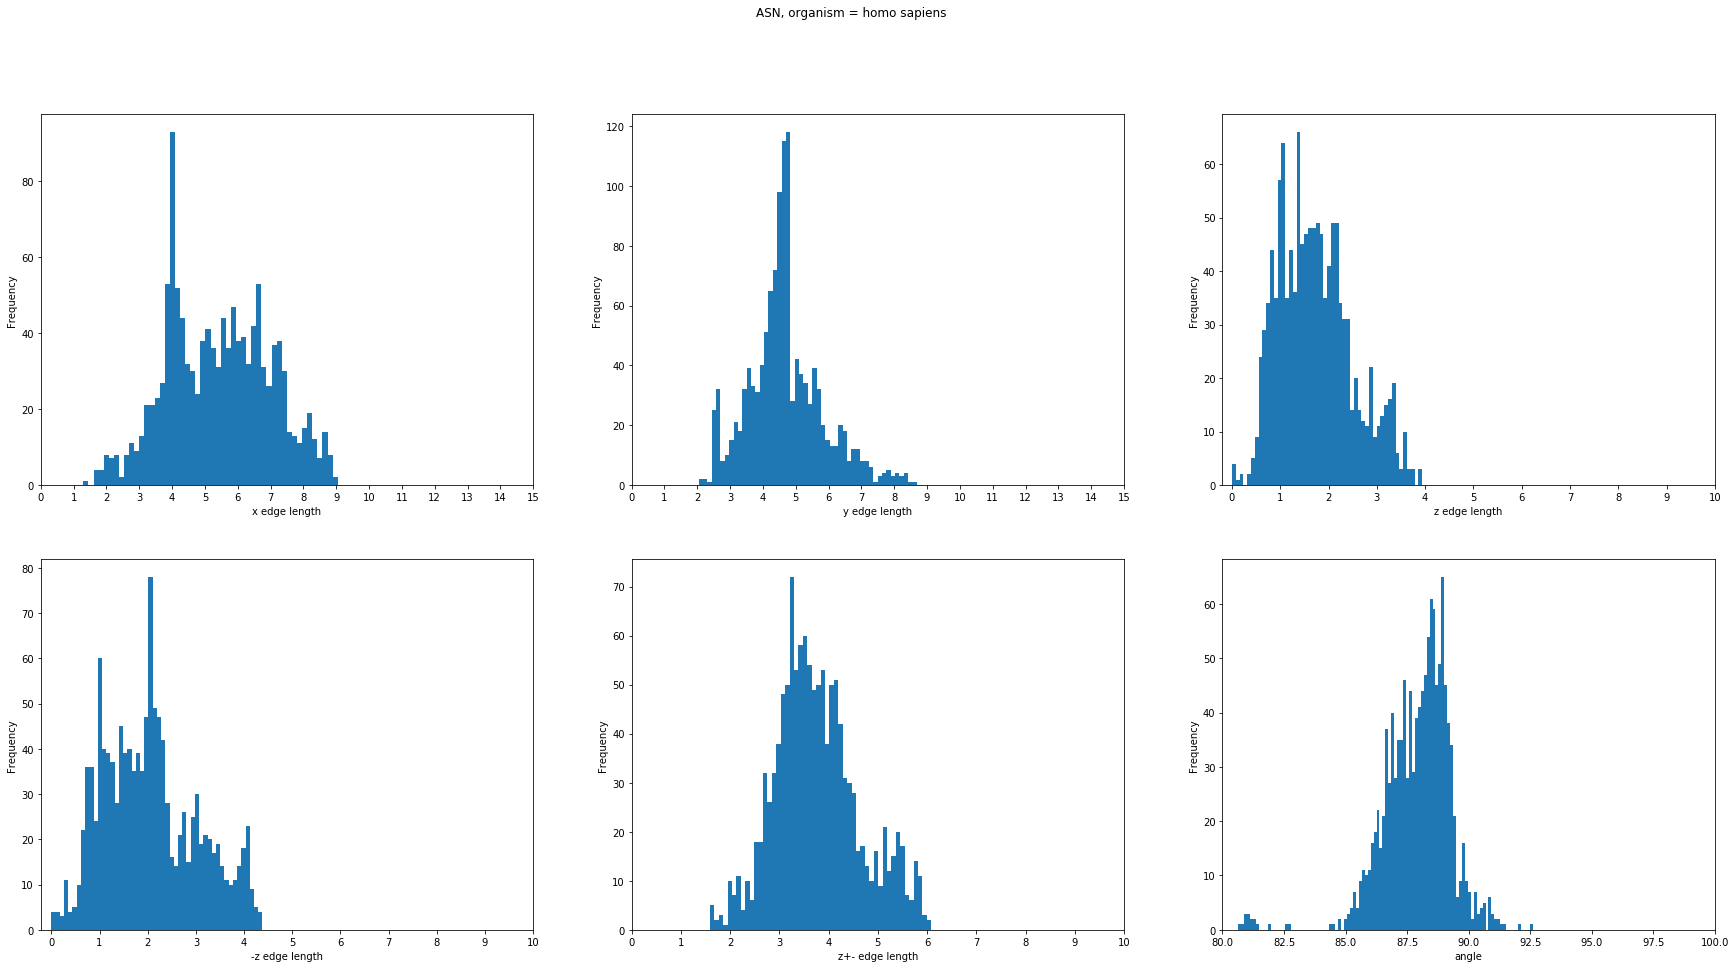

ASN: mean of x sizes: 5.41, mean of y sizes: 4.68, mean of z sizes: 1.73
ASN: max of x sizes: 9.04, max of y sizes: 8.69, max of z sizes: 3.94


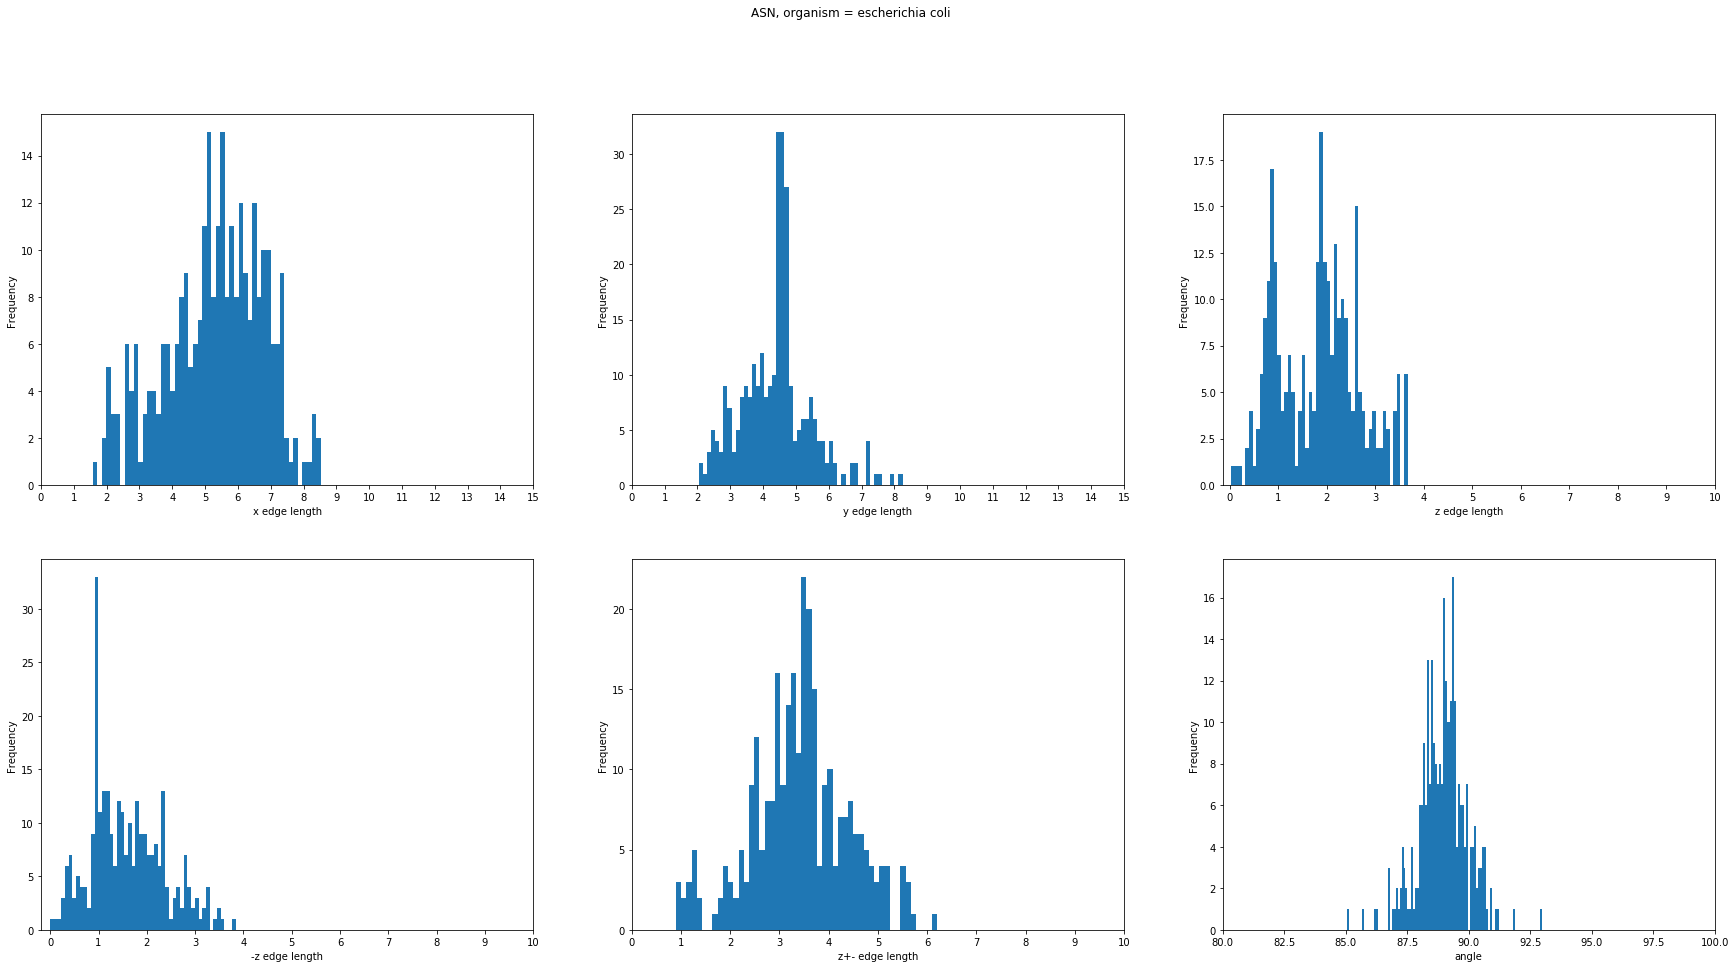

ASN: mean of x sizes: 5.29, mean of y sizes: 4.4, mean of z sizes: 1.84
ASN: max of x sizes: 8.52, max of y sizes: 8.25, max of z sizes: 3.66


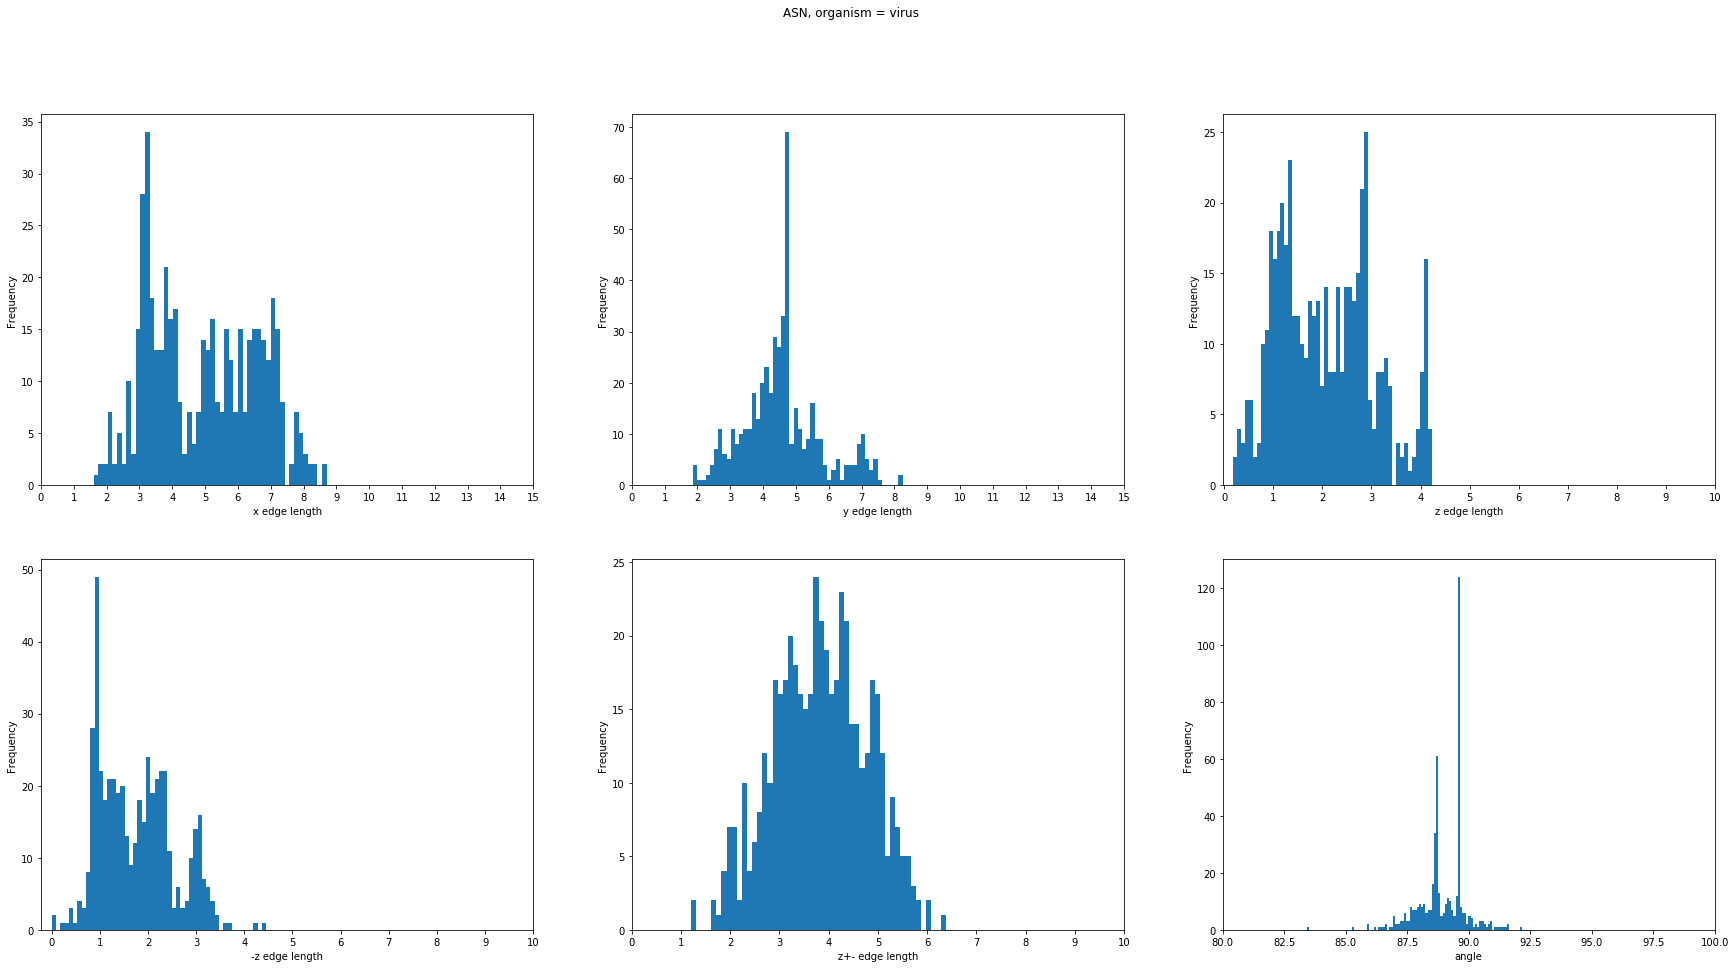

ASN: mean of x sizes: 4.93, mean of y sizes: 4.58, mean of z sizes: 2.08
ASN: max of x sizes: 8.7, max of y sizes: 8.25, max of z sizes: 4.24


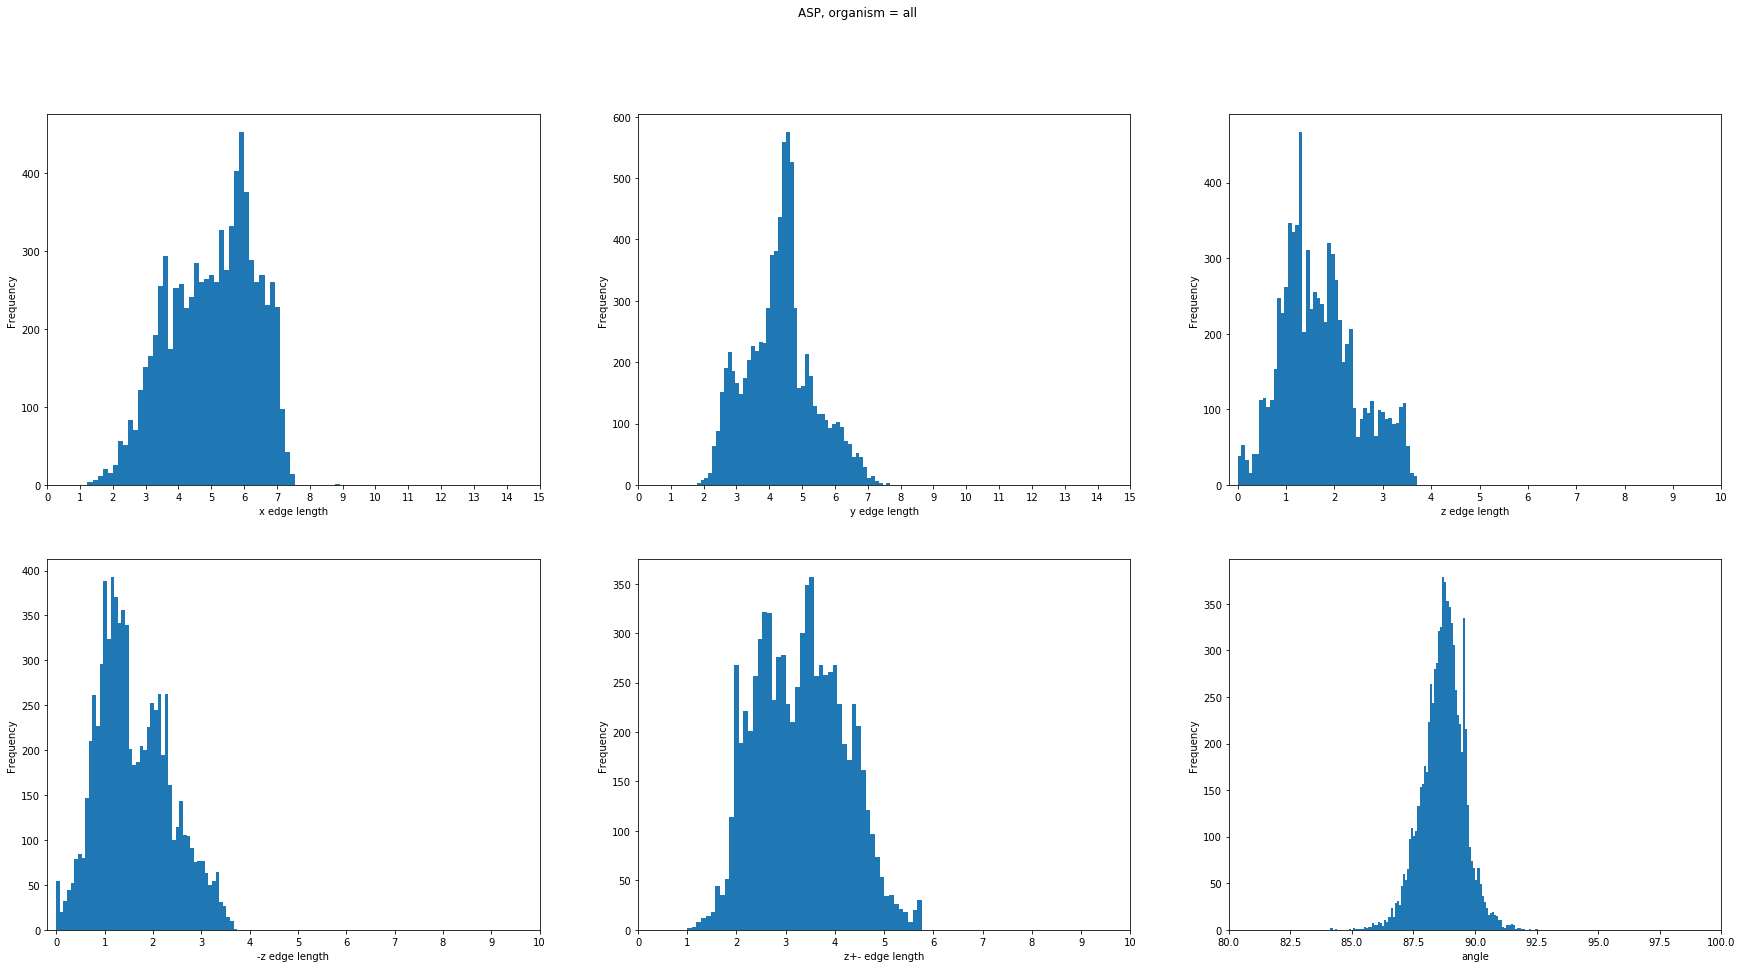

ASP: mean of x sizes: 5.03, mean of y sizes: 4.32, mean of z sizes: 1.7
ASP: max of x sizes: 8.93, max of y sizes: 7.69, max of z sizes: 3.71


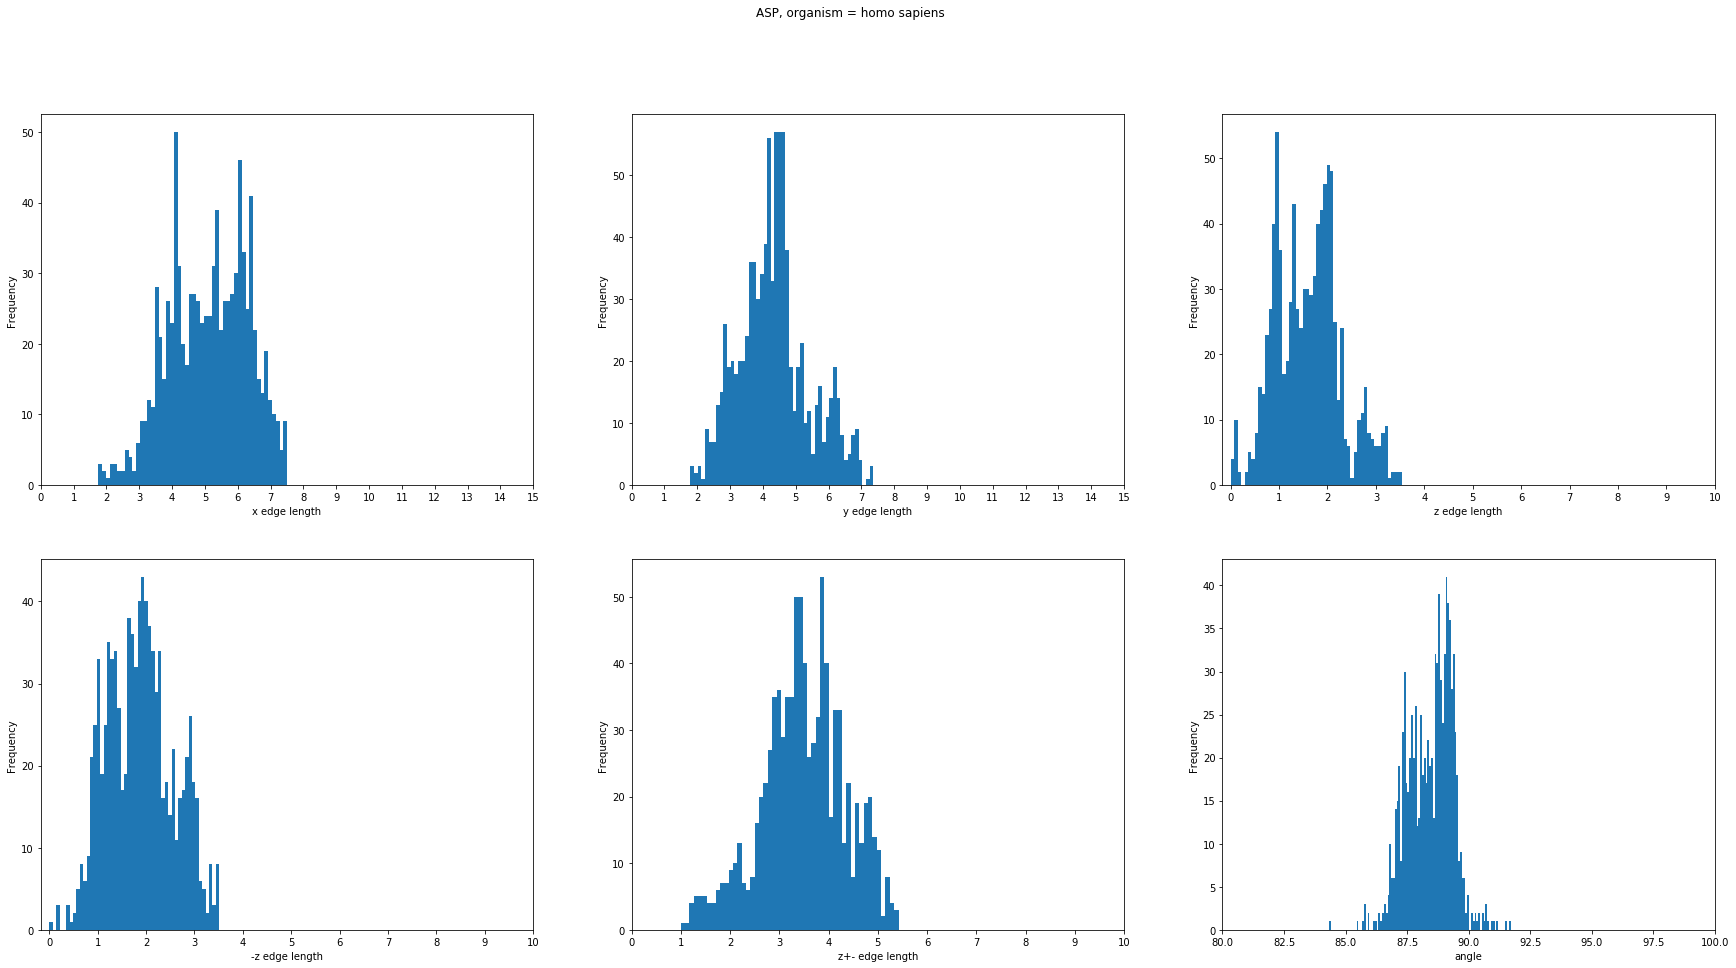

ASP: mean of x sizes: 5.11, mean of y sizes: 4.34, mean of z sizes: 1.61
ASP: max of x sizes: 7.5, max of y sizes: 7.36, max of z sizes: 3.53


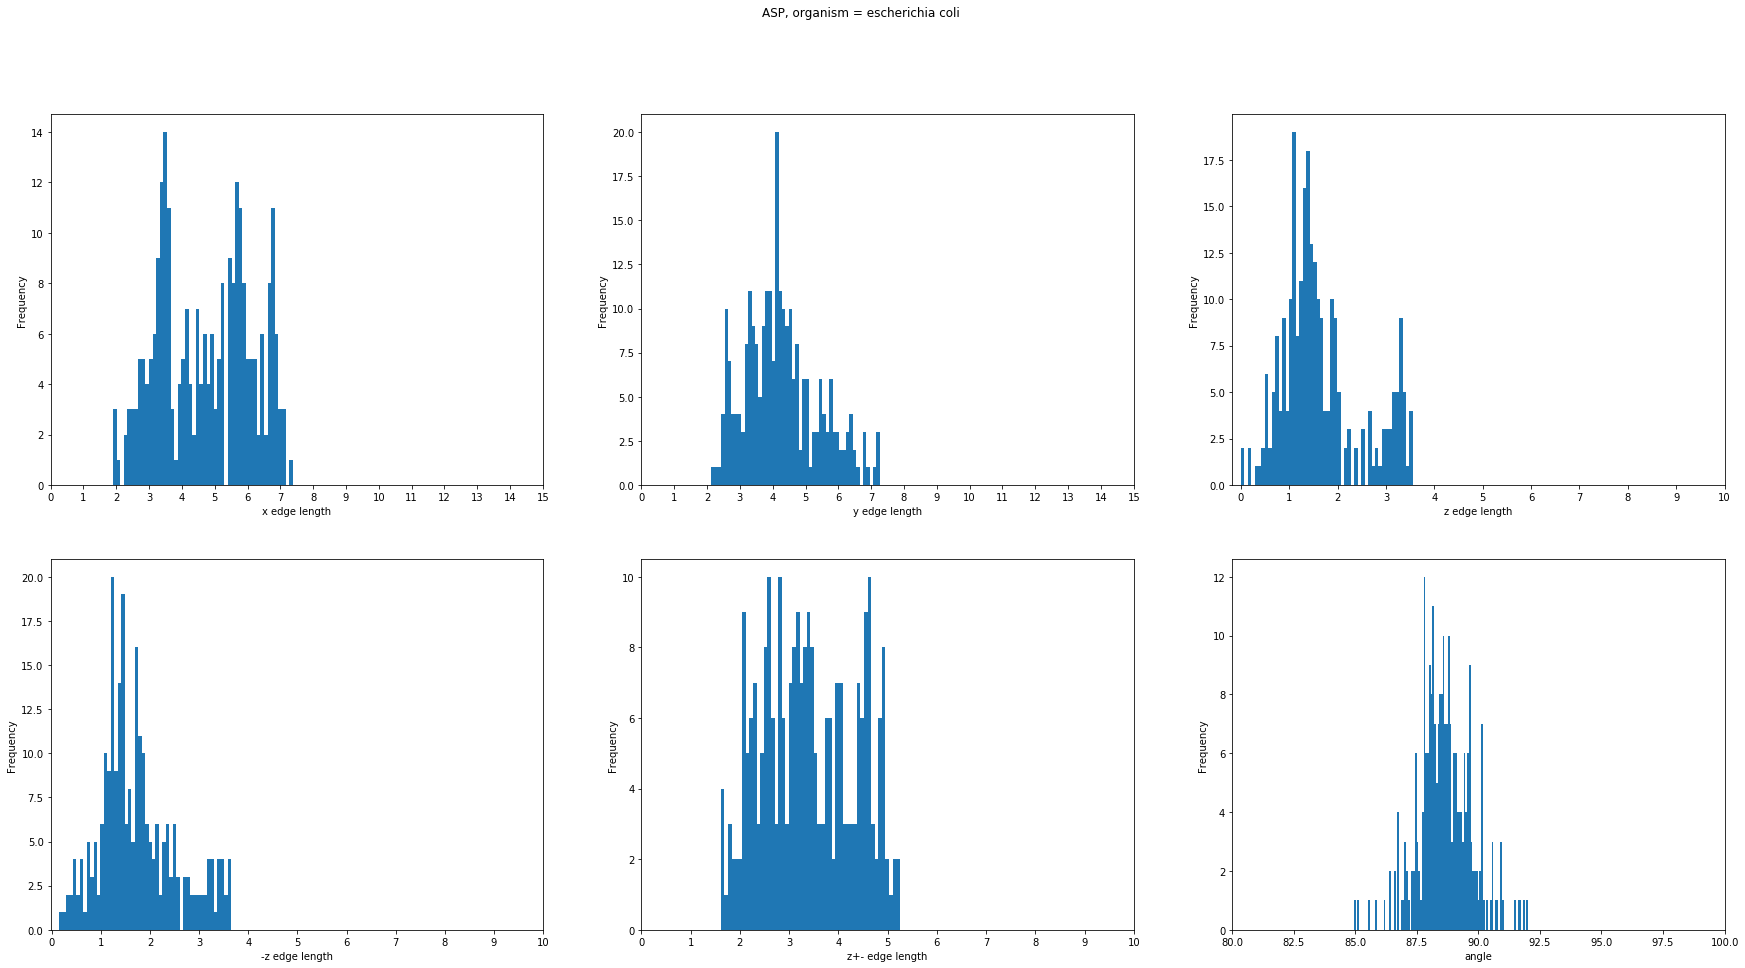

ASP: mean of x sizes: 4.73, mean of y sizes: 4.26, mean of z sizes: 1.65
ASP: max of x sizes: 7.38, max of y sizes: 7.26, max of z sizes: 3.56


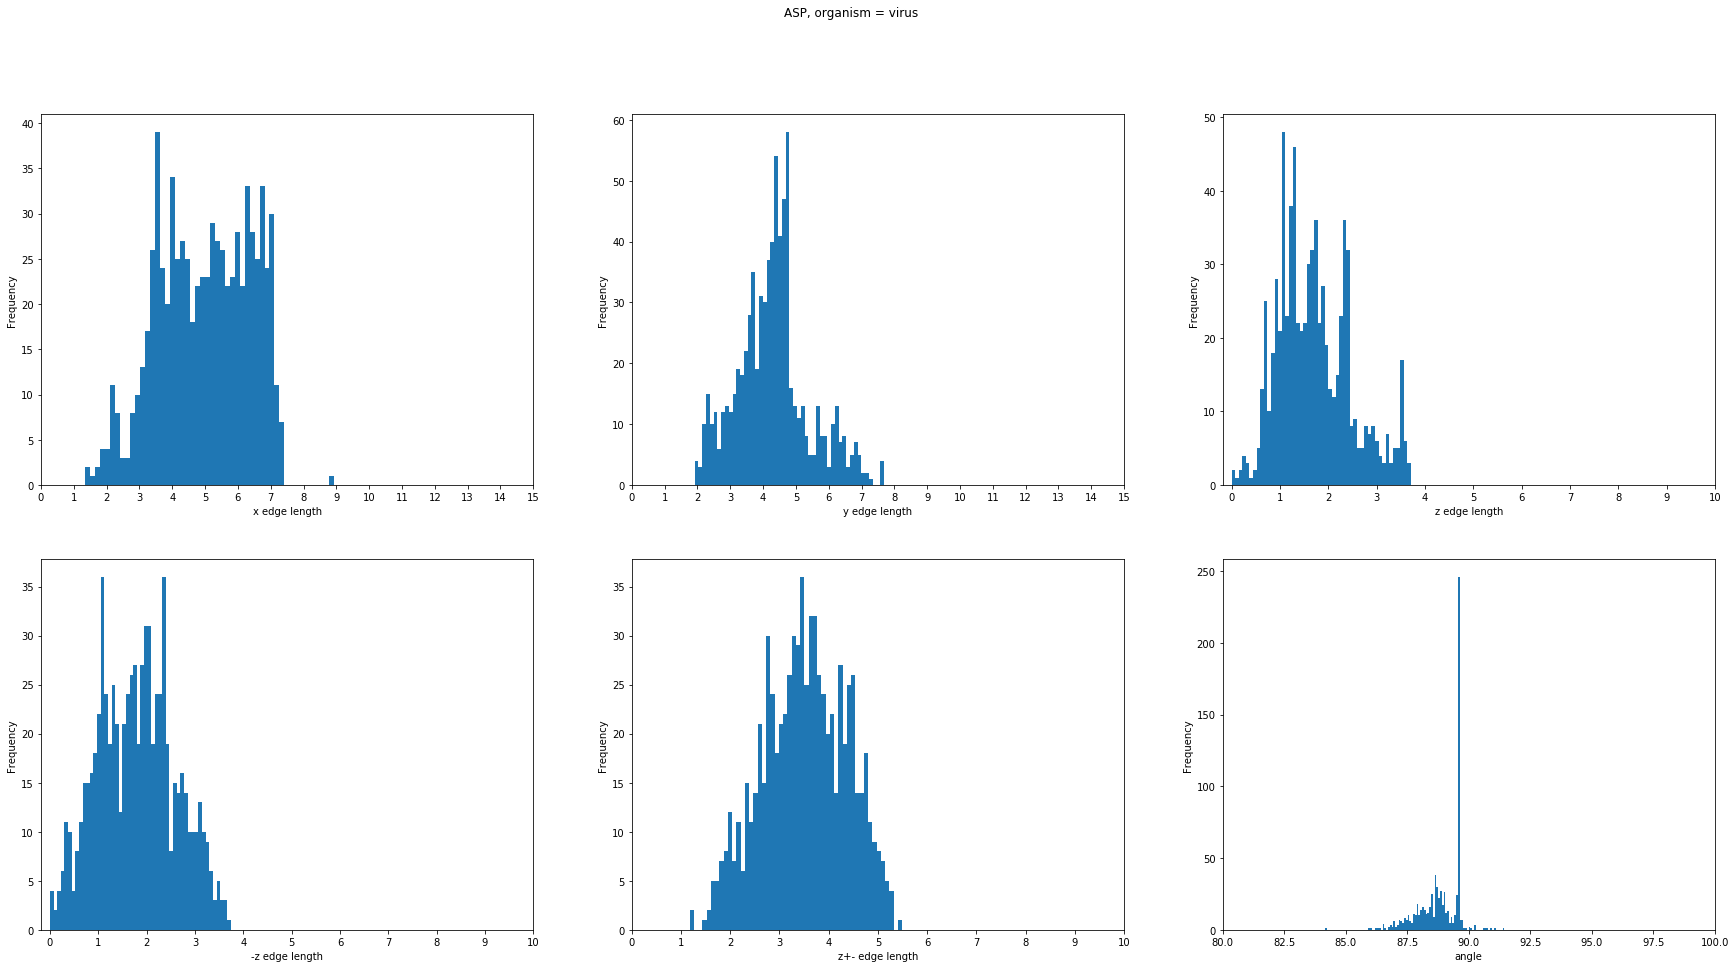

ASP: mean of x sizes: 4.99, mean of y sizes: 4.3, mean of z sizes: 1.71
ASP: max of x sizes: 8.93, max of y sizes: 7.69, max of z sizes: 3.71


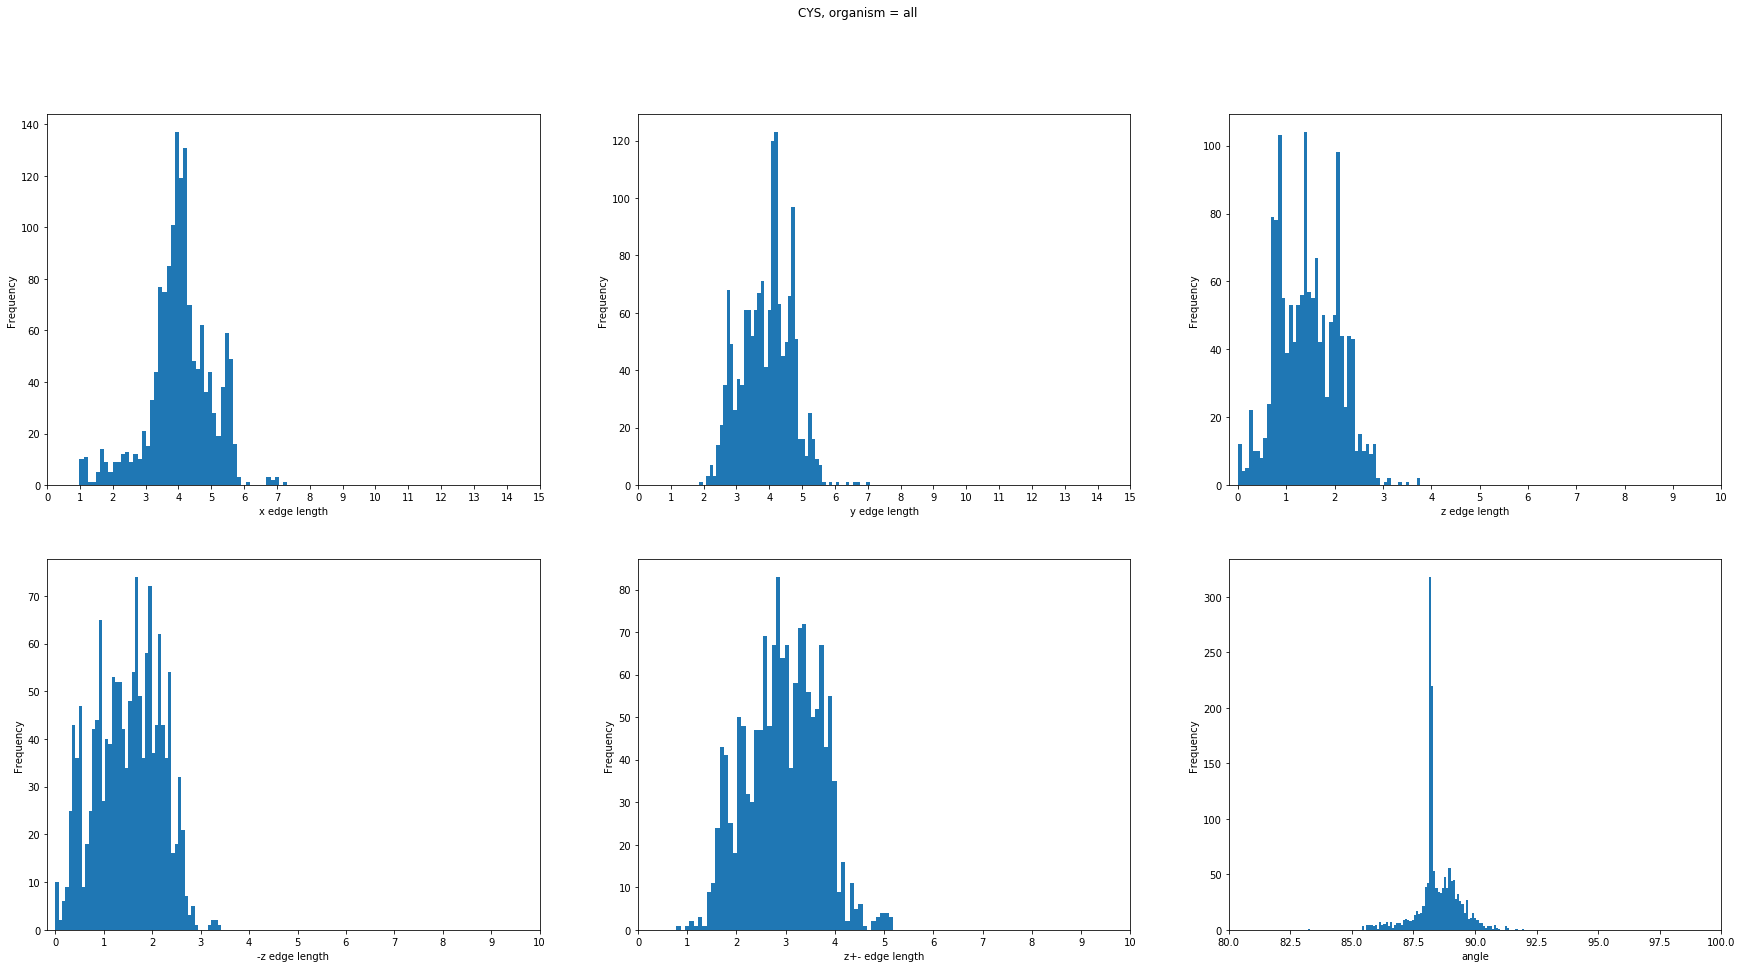

CYS: mean of x sizes: 4.06, mean of y sizes: 3.91, mean of z sizes: 1.45
CYS: max of x sizes: 7.31, max of y sizes: 7.06, max of z sizes: 3.77


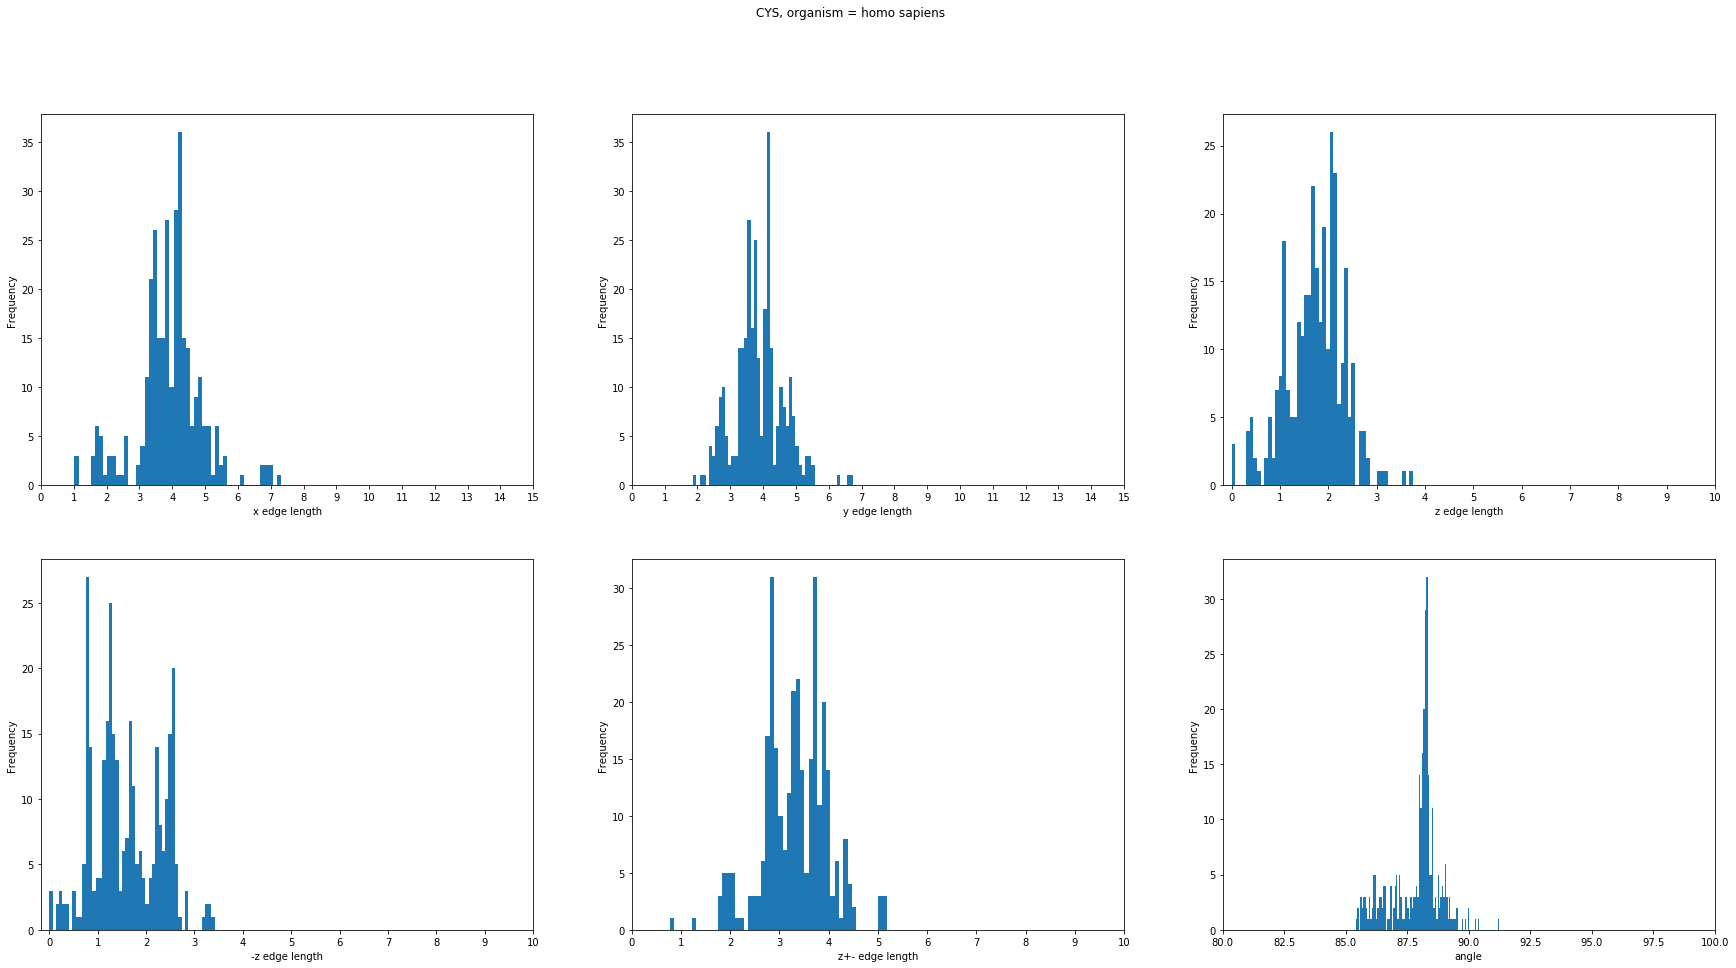

CYS: mean of x sizes: 3.92, mean of y sizes: 3.87, mean of z sizes: 1.73
CYS: max of x sizes: 7.31, max of y sizes: 6.74, max of z sizes: 3.75


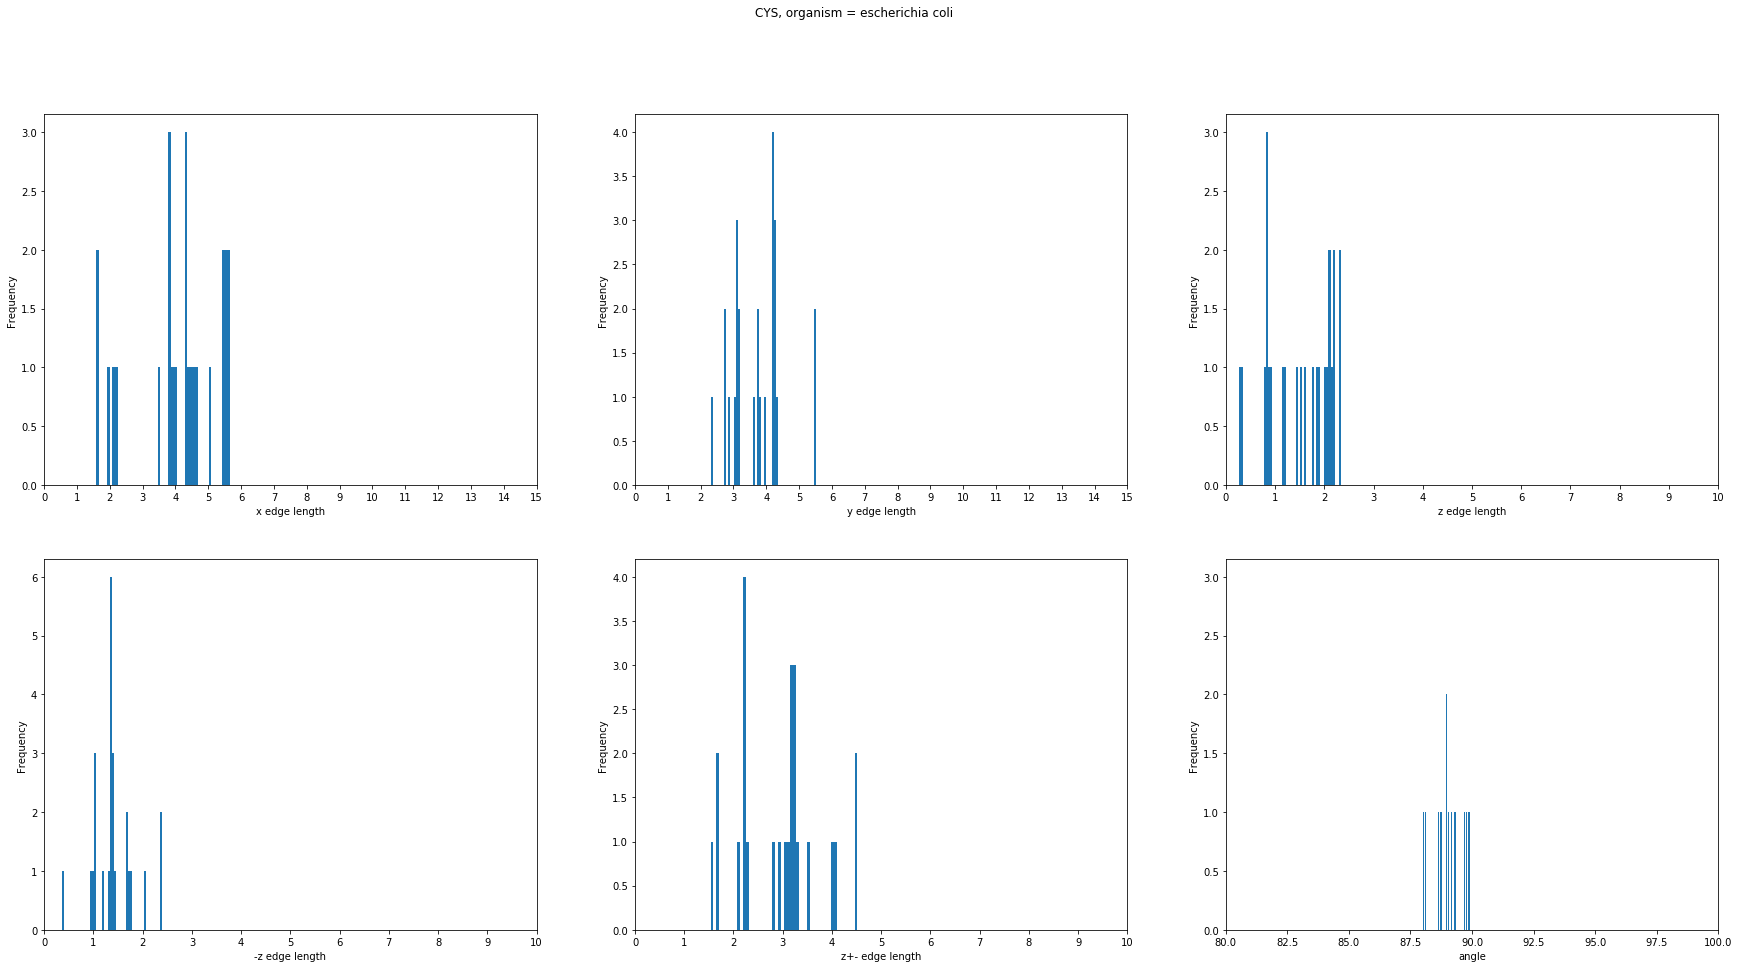

CYS: mean of x sizes: 4.08, mean of y sizes: 3.73, mean of z sizes: 1.51
CYS: max of x sizes: 5.66, max of y sizes: 5.52, max of z sizes: 2.33


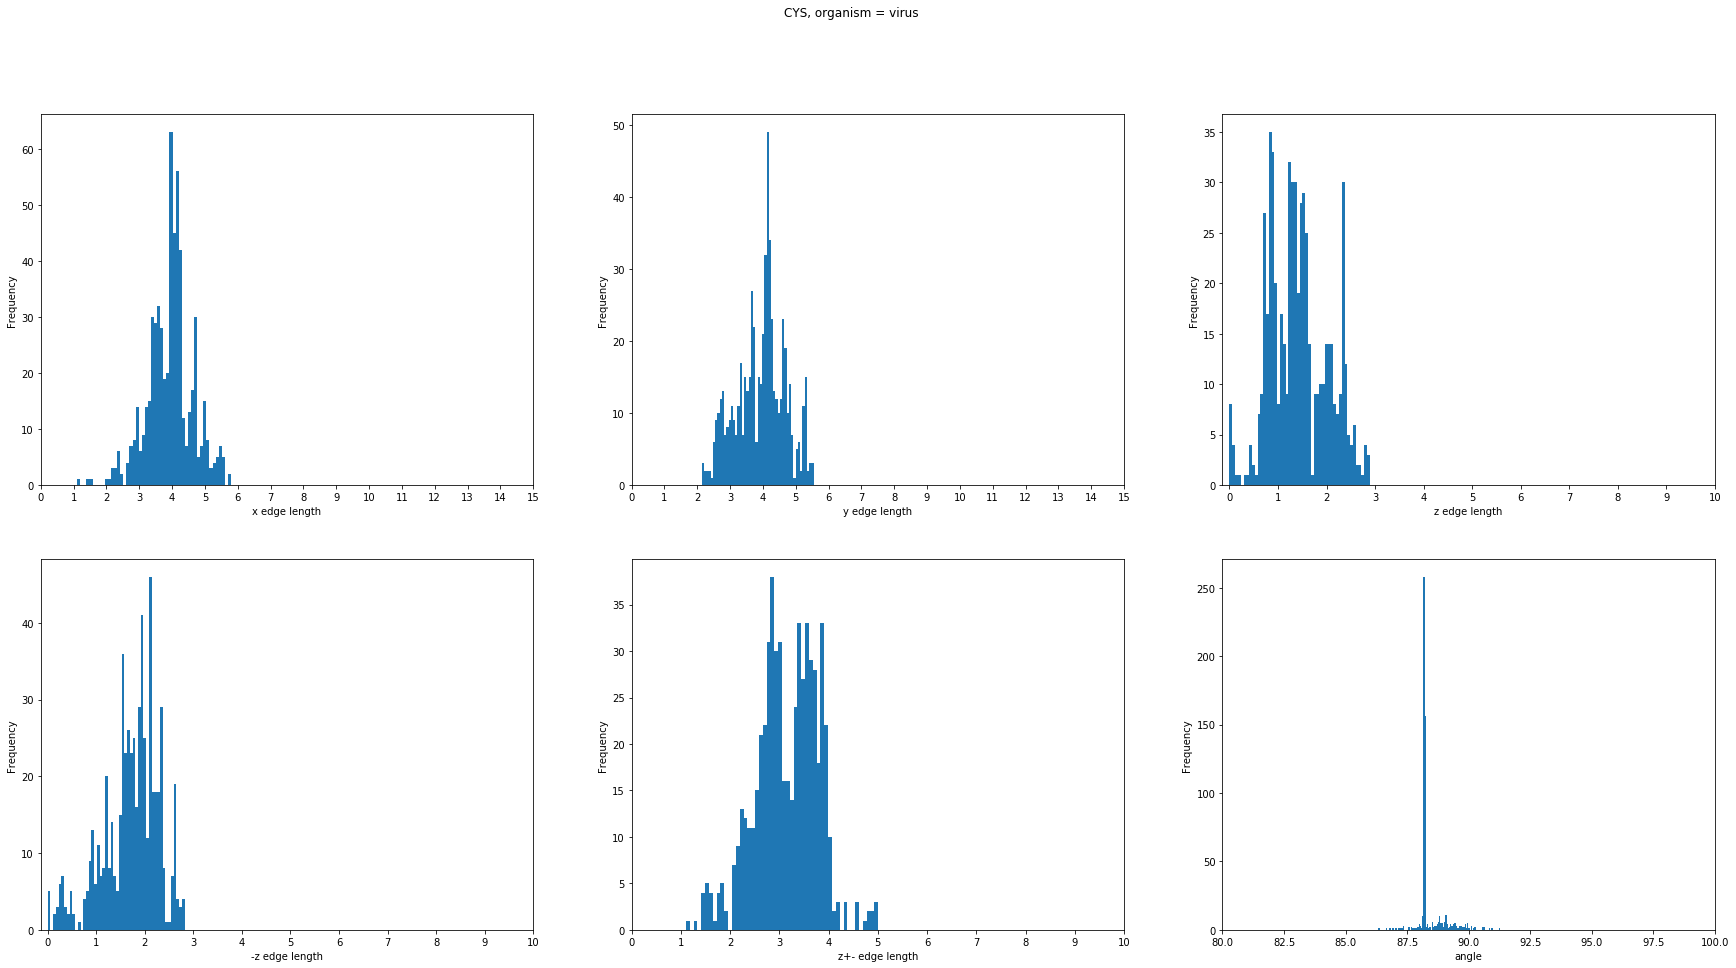

CYS: mean of x sizes: 3.95, mean of y sizes: 3.93, mean of z sizes: 1.43
CYS: max of x sizes: 5.79, max of y sizes: 5.54, max of z sizes: 2.89


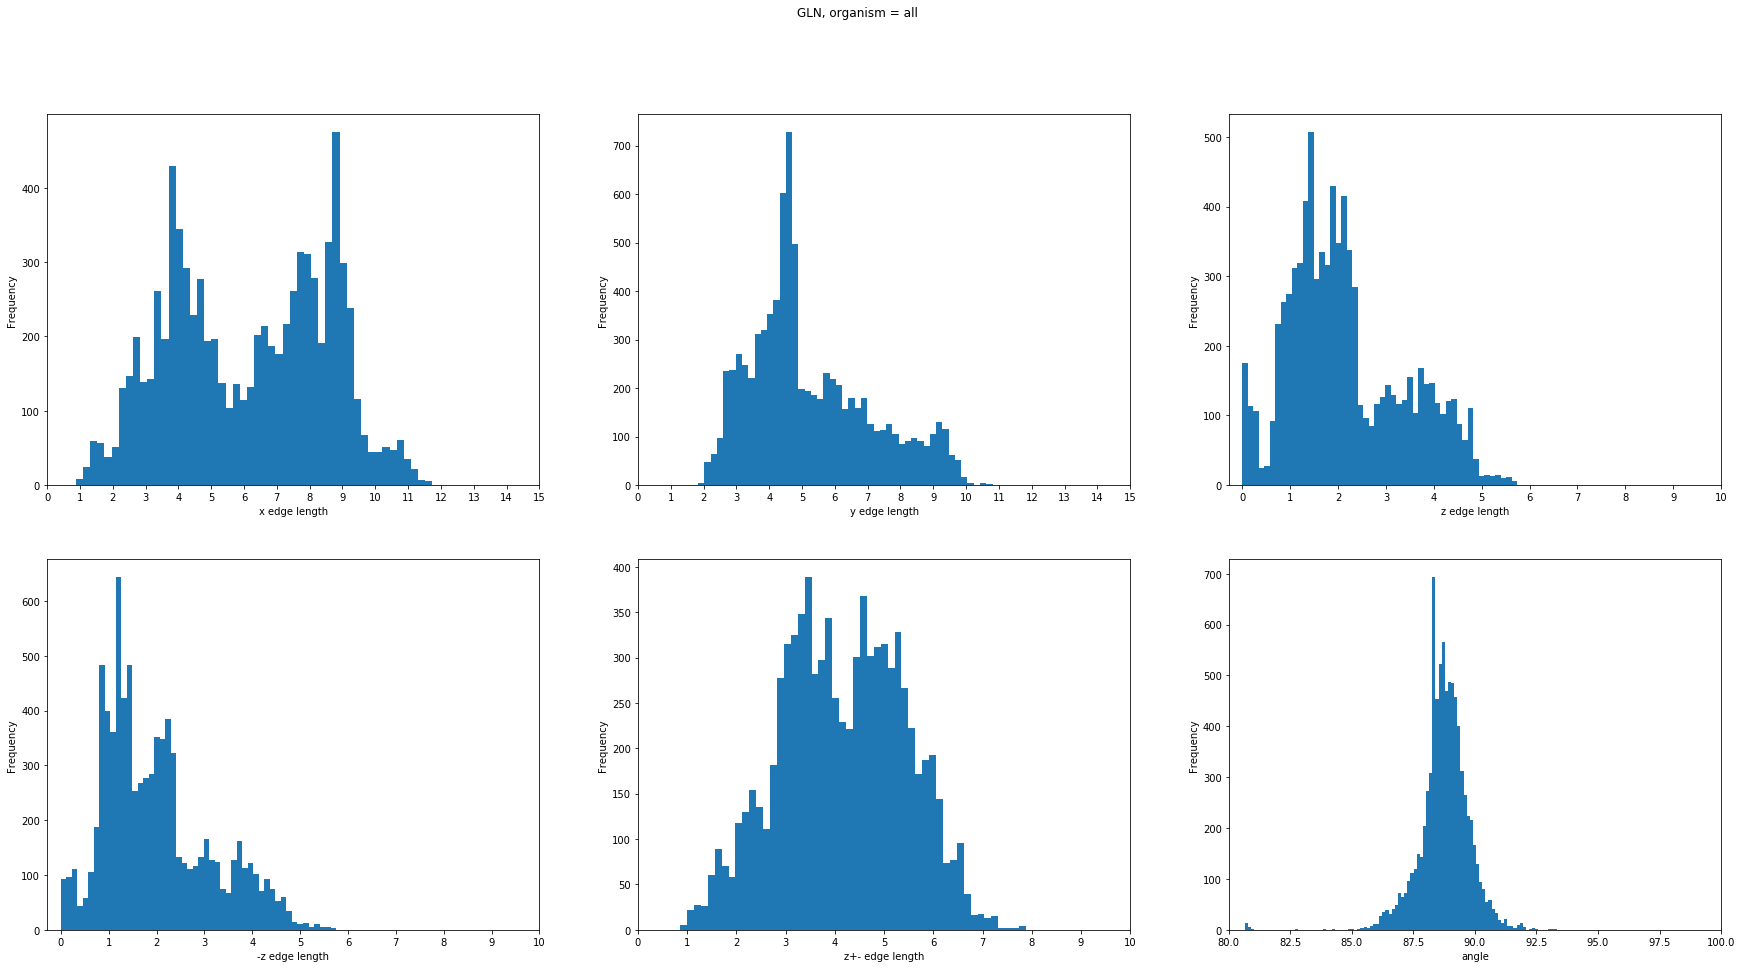

GLN: mean of x sizes: 6.16, mean of y sizes: 5.23, mean of z sizes: 2.16
GLN: max of x sizes: 11.74, max of y sizes: 11.38, max of z sizes: 5.74


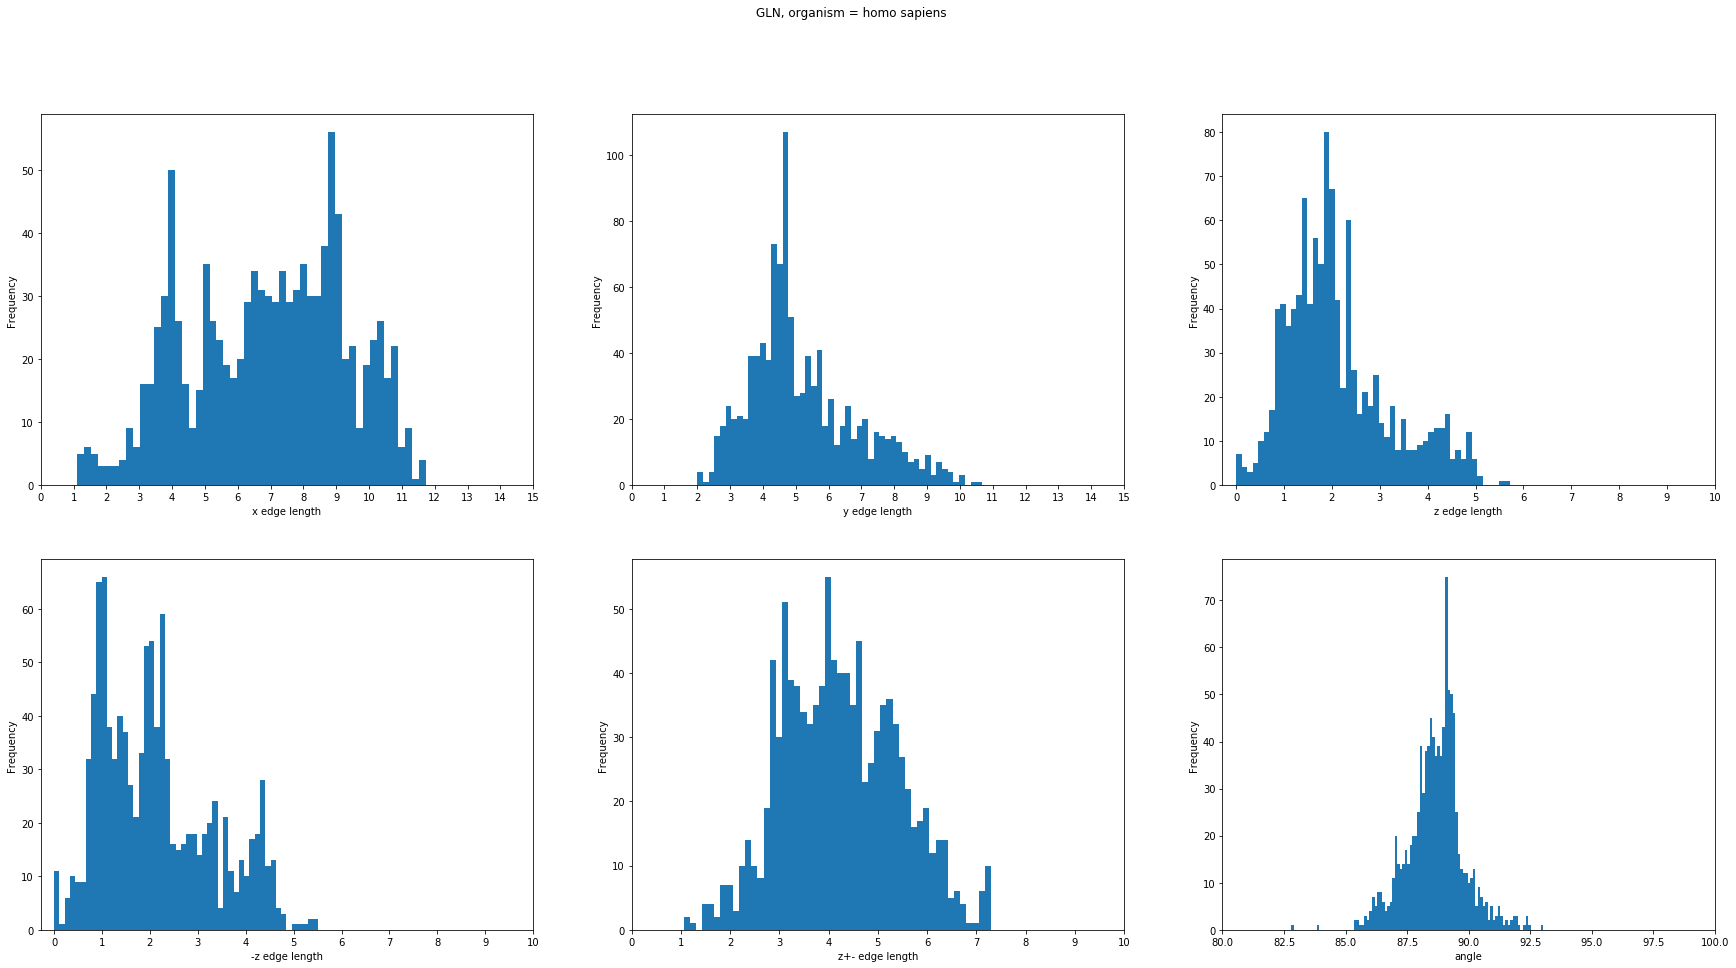

GLN: mean of x sizes: 6.91, mean of y sizes: 5.21, mean of z sizes: 2.12
GLN: max of x sizes: 11.74, max of y sizes: 10.67, max of z sizes: 5.73


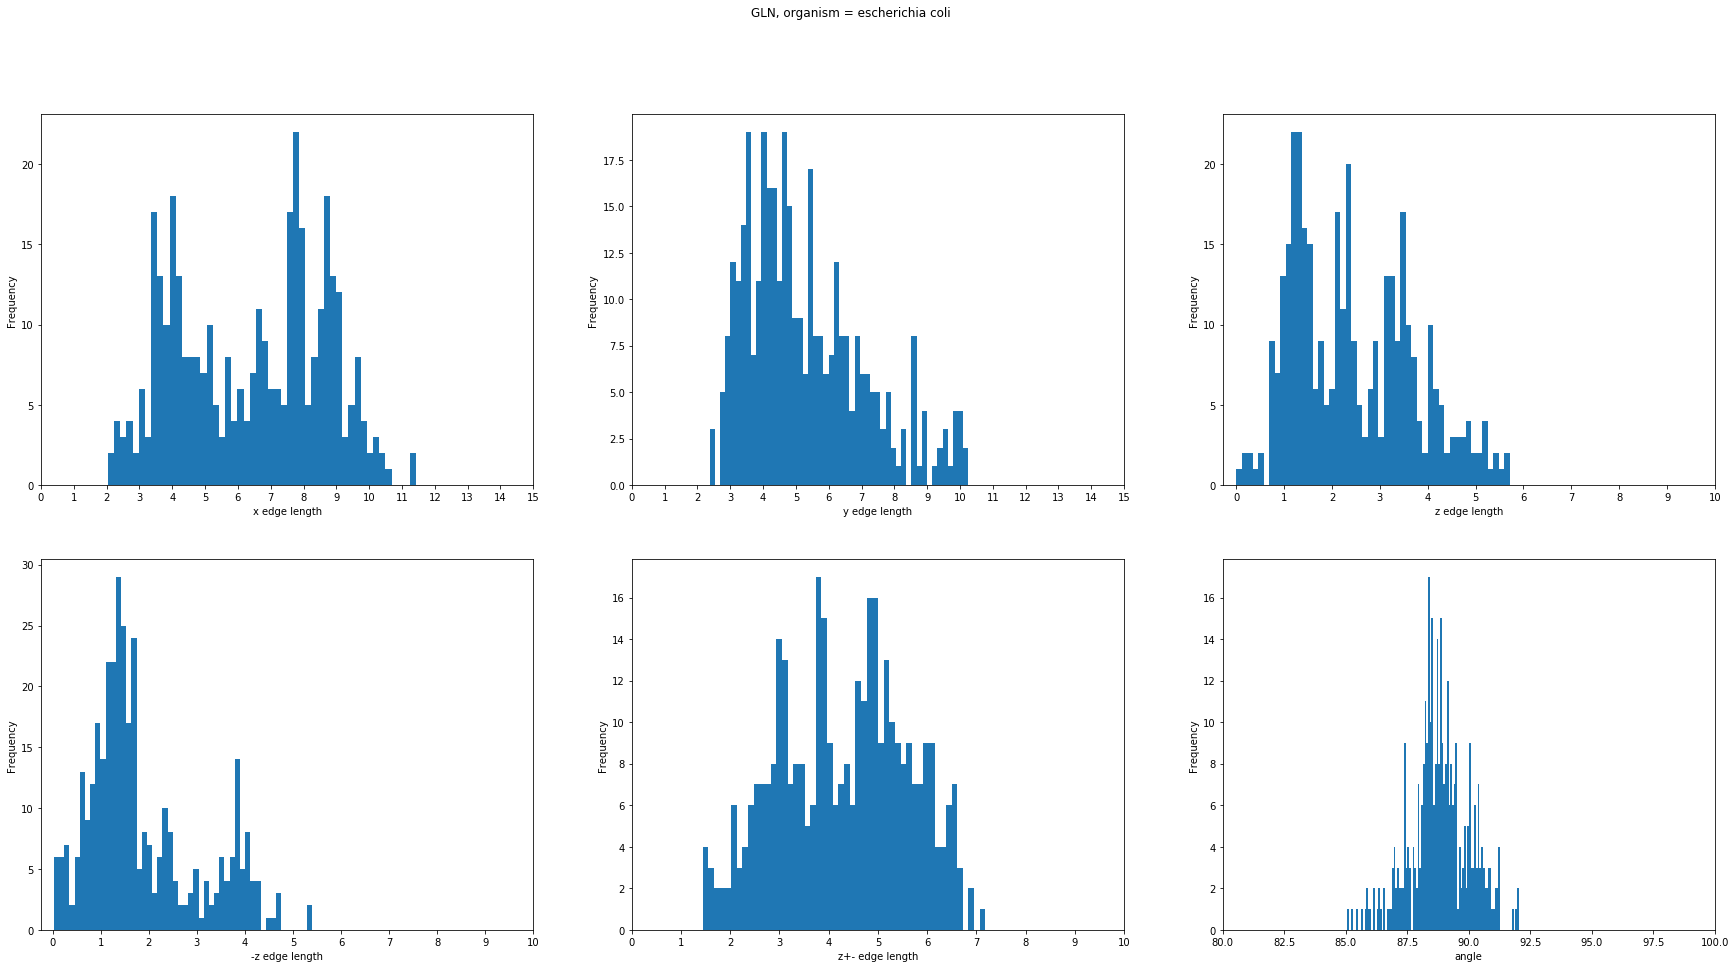

GLN: mean of x sizes: 6.39, mean of y sizes: 5.3, mean of z sizes: 2.45
GLN: max of x sizes: 11.44, max of y sizes: 10.26, max of z sizes: 5.71


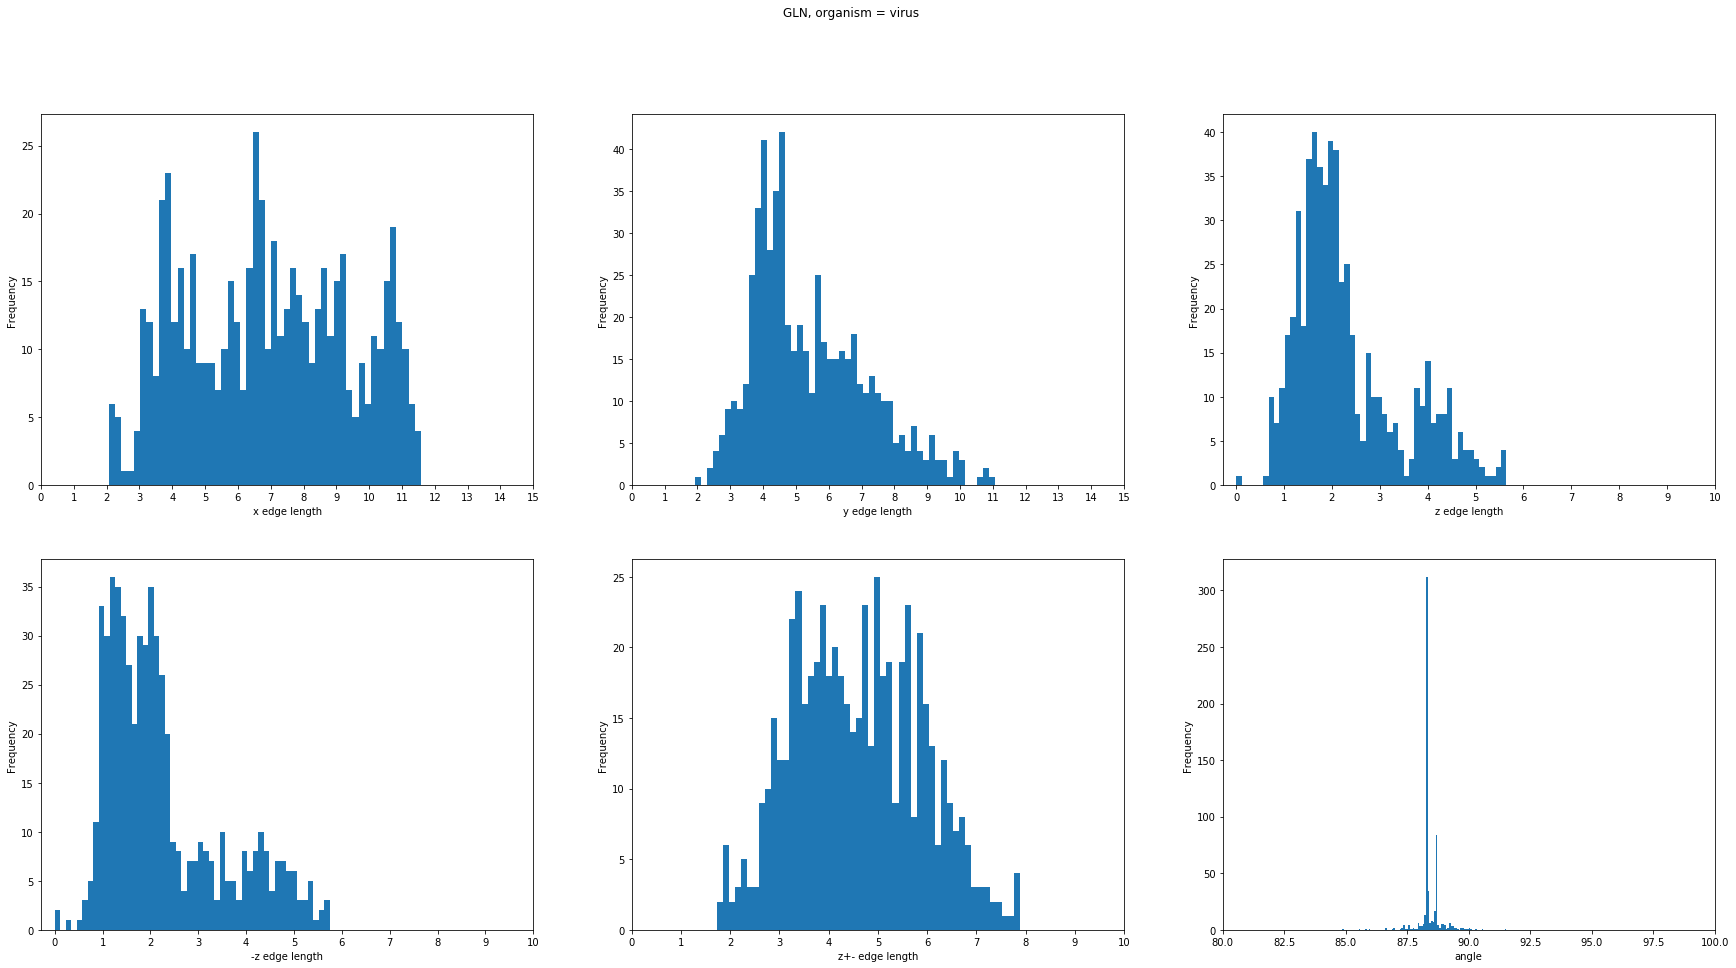

GLN: mean of x sizes: 6.92, mean of y sizes: 5.44, mean of z sizes: 2.32
GLN: max of x sizes: 11.58, max of y sizes: 11.07, max of z sizes: 5.64


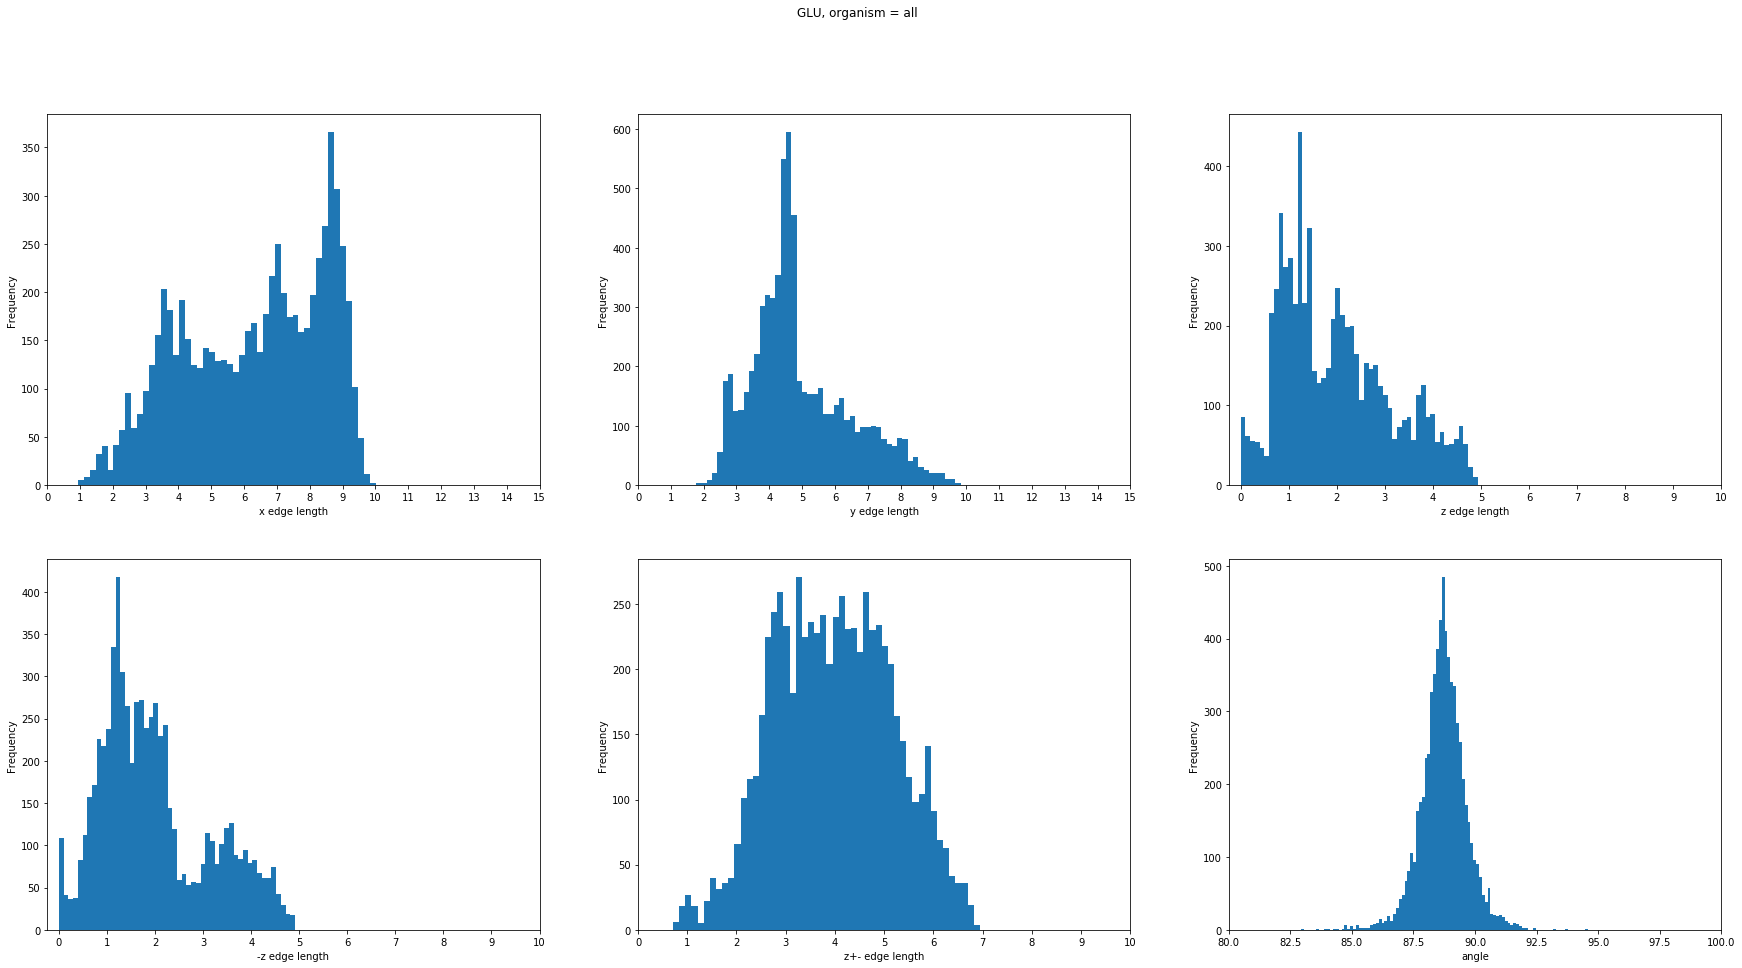

GLU: mean of x sizes: 6.29, mean of y sizes: 4.93, mean of z sizes: 2.0
GLU: max of x sizes: 10.02, max of y sizes: 9.83, max of z sizes: 4.93


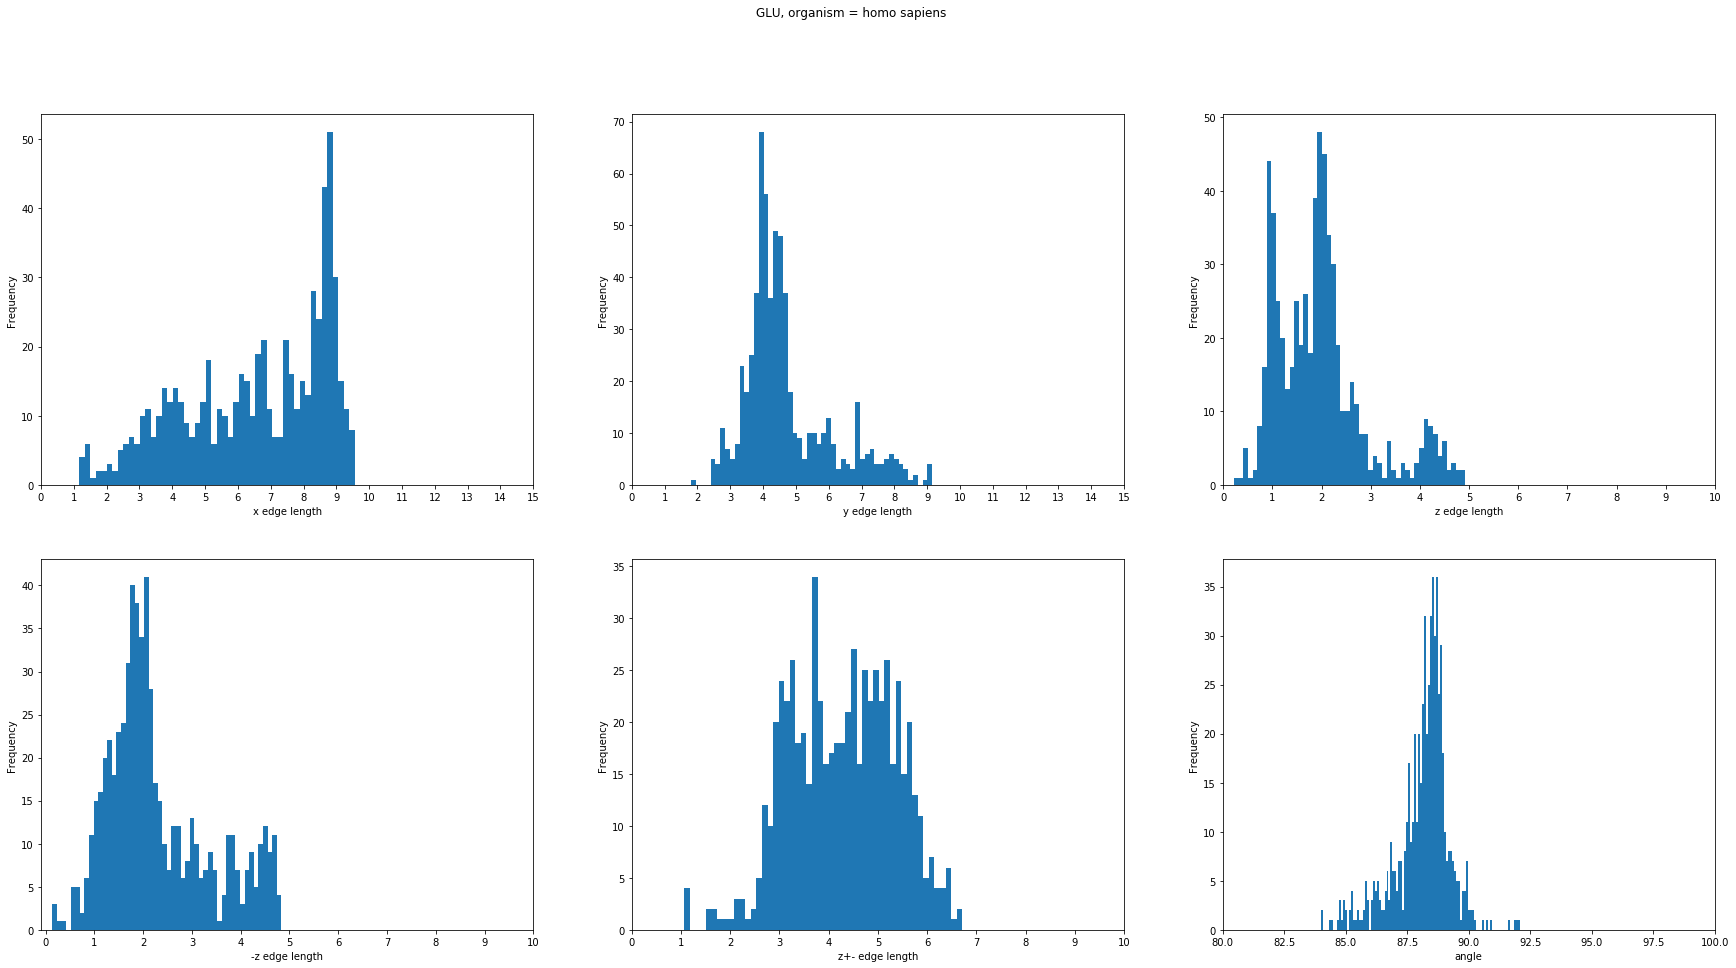

GLU: mean of x sizes: 6.52, mean of y sizes: 4.7, mean of z sizes: 1.98
GLU: max of x sizes: 9.56, max of y sizes: 9.15, max of z sizes: 4.92


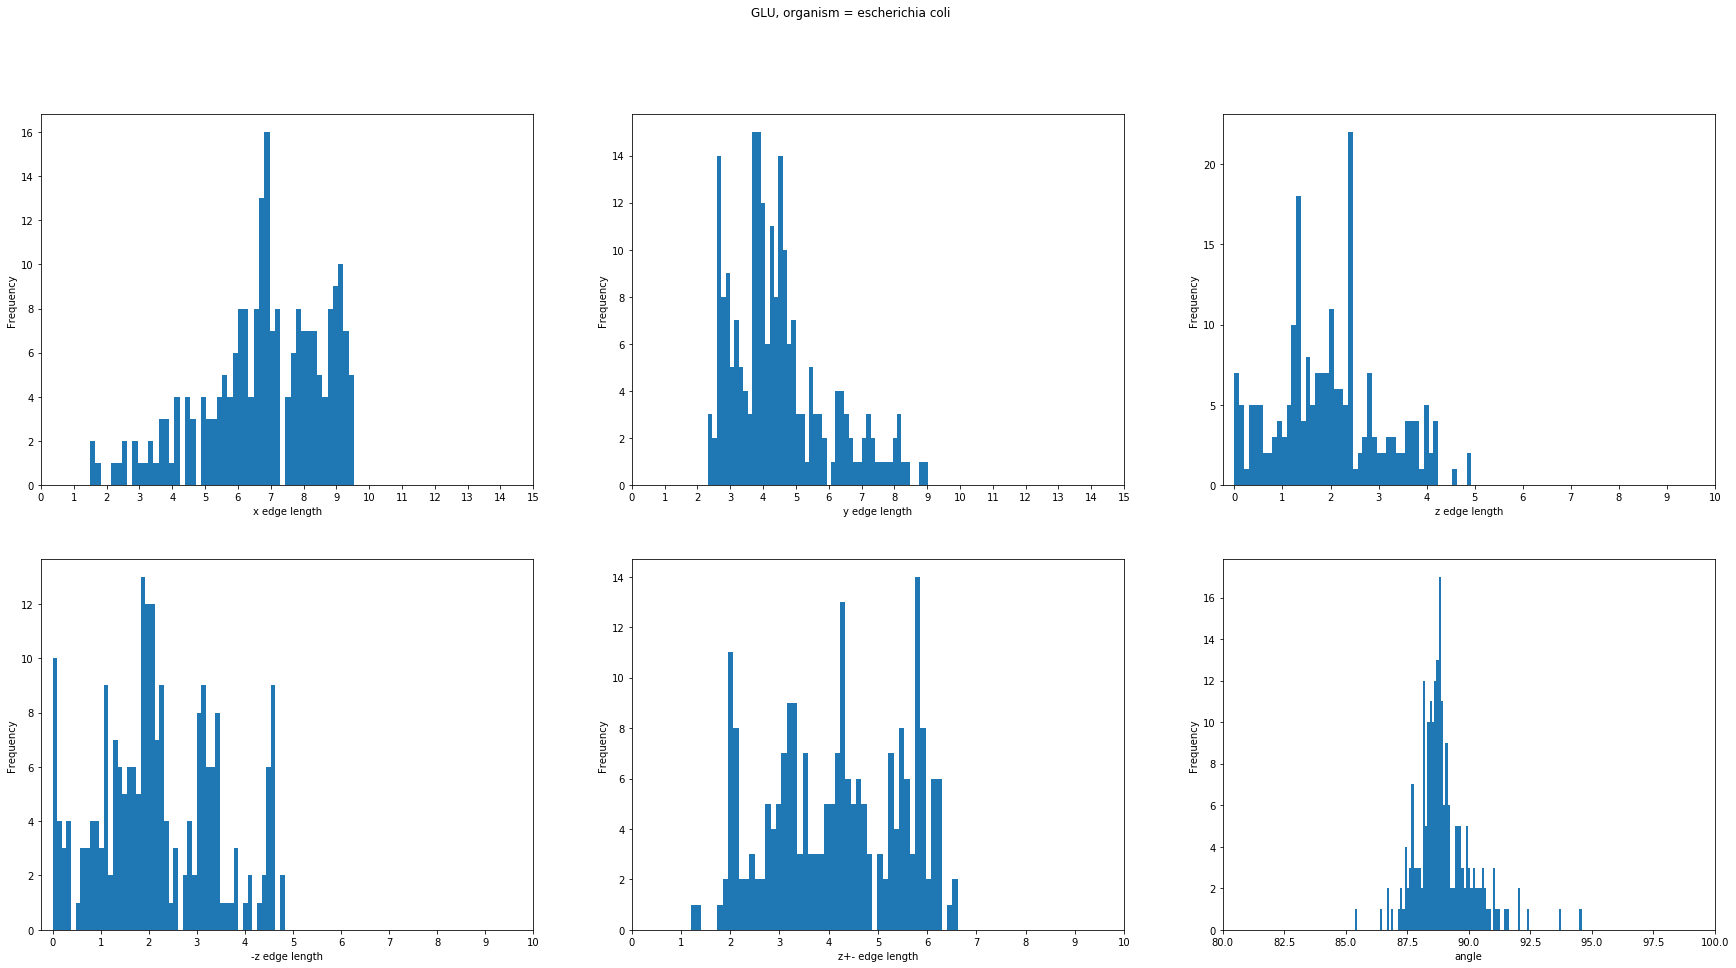

GLU: mean of x sizes: 6.79, mean of y sizes: 4.49, mean of z sizes: 1.98
GLU: max of x sizes: 9.54, max of y sizes: 9.02, max of z sizes: 4.93


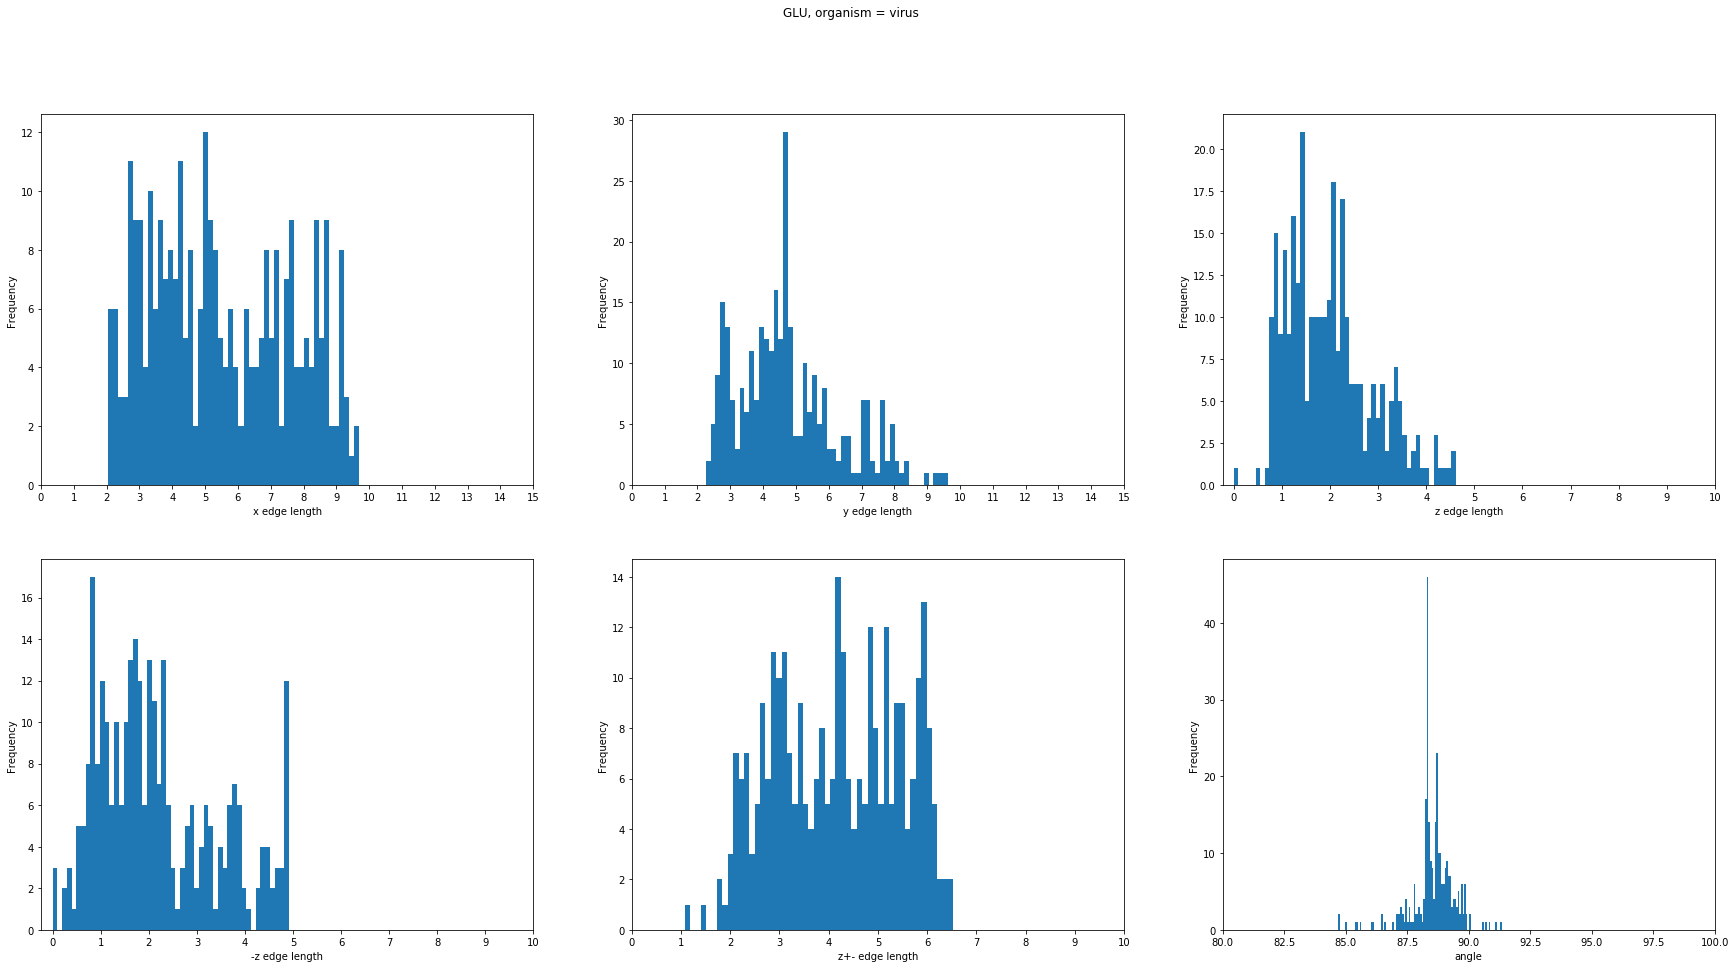

GLU: mean of x sizes: 5.5, mean of y sizes: 4.77, mean of z sizes: 1.99
GLU: max of x sizes: 9.7, max of y sizes: 9.63, max of z sizes: 4.61


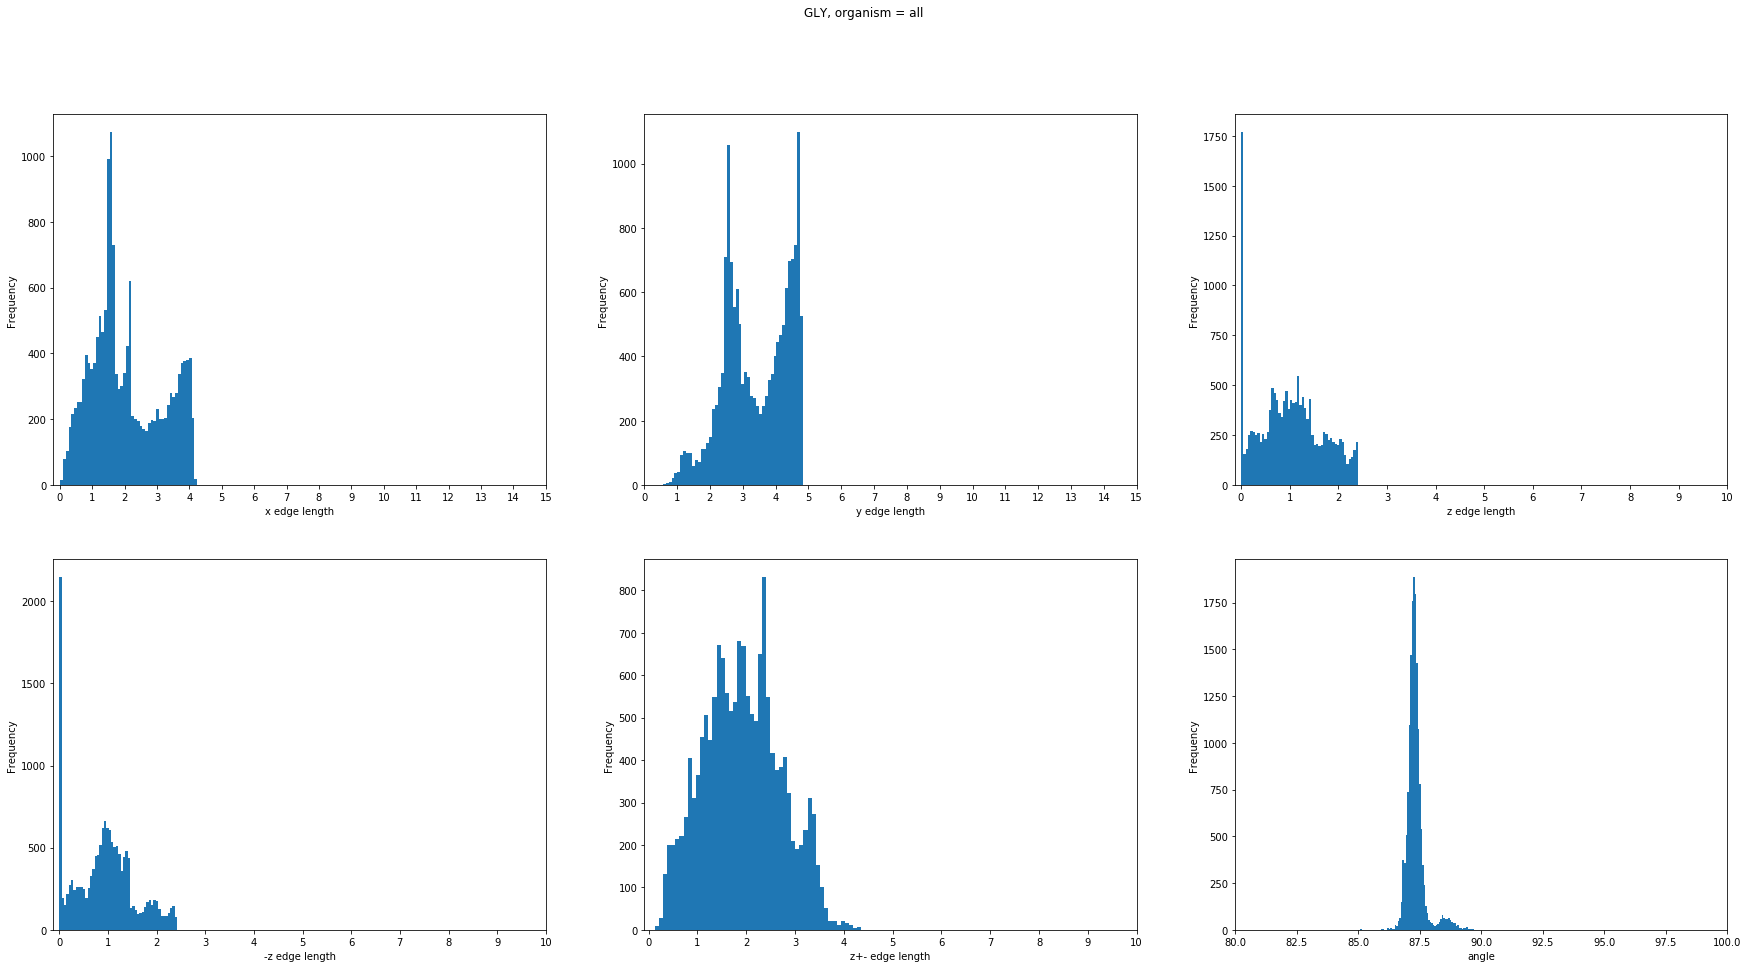

GLY: mean of x sizes: 2.05, mean of y sizes: 3.4, mean of z sizes: 1.01
GLY: max of x sizes: 4.24, max of y sizes: 4.83, max of z sizes: 2.41


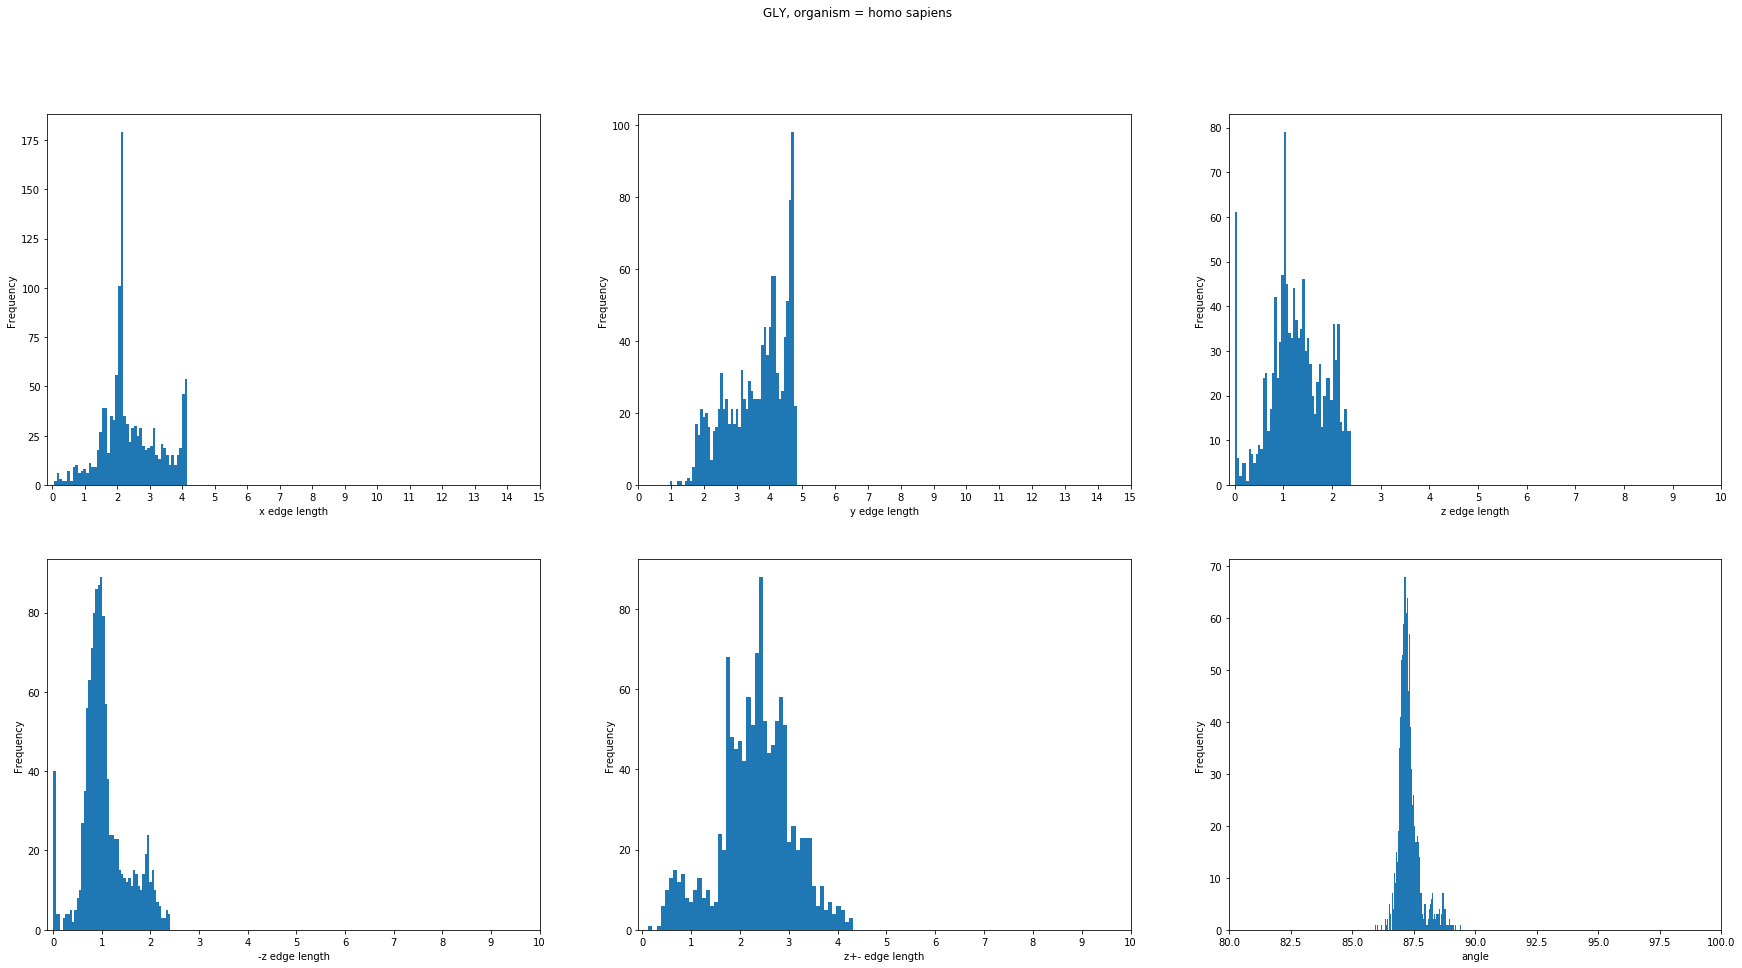

GLY: mean of x sizes: 2.42, mean of y sizes: 3.62, mean of z sizes: 1.27
GLY: max of x sizes: 4.16, max of y sizes: 4.83, max of z sizes: 2.4


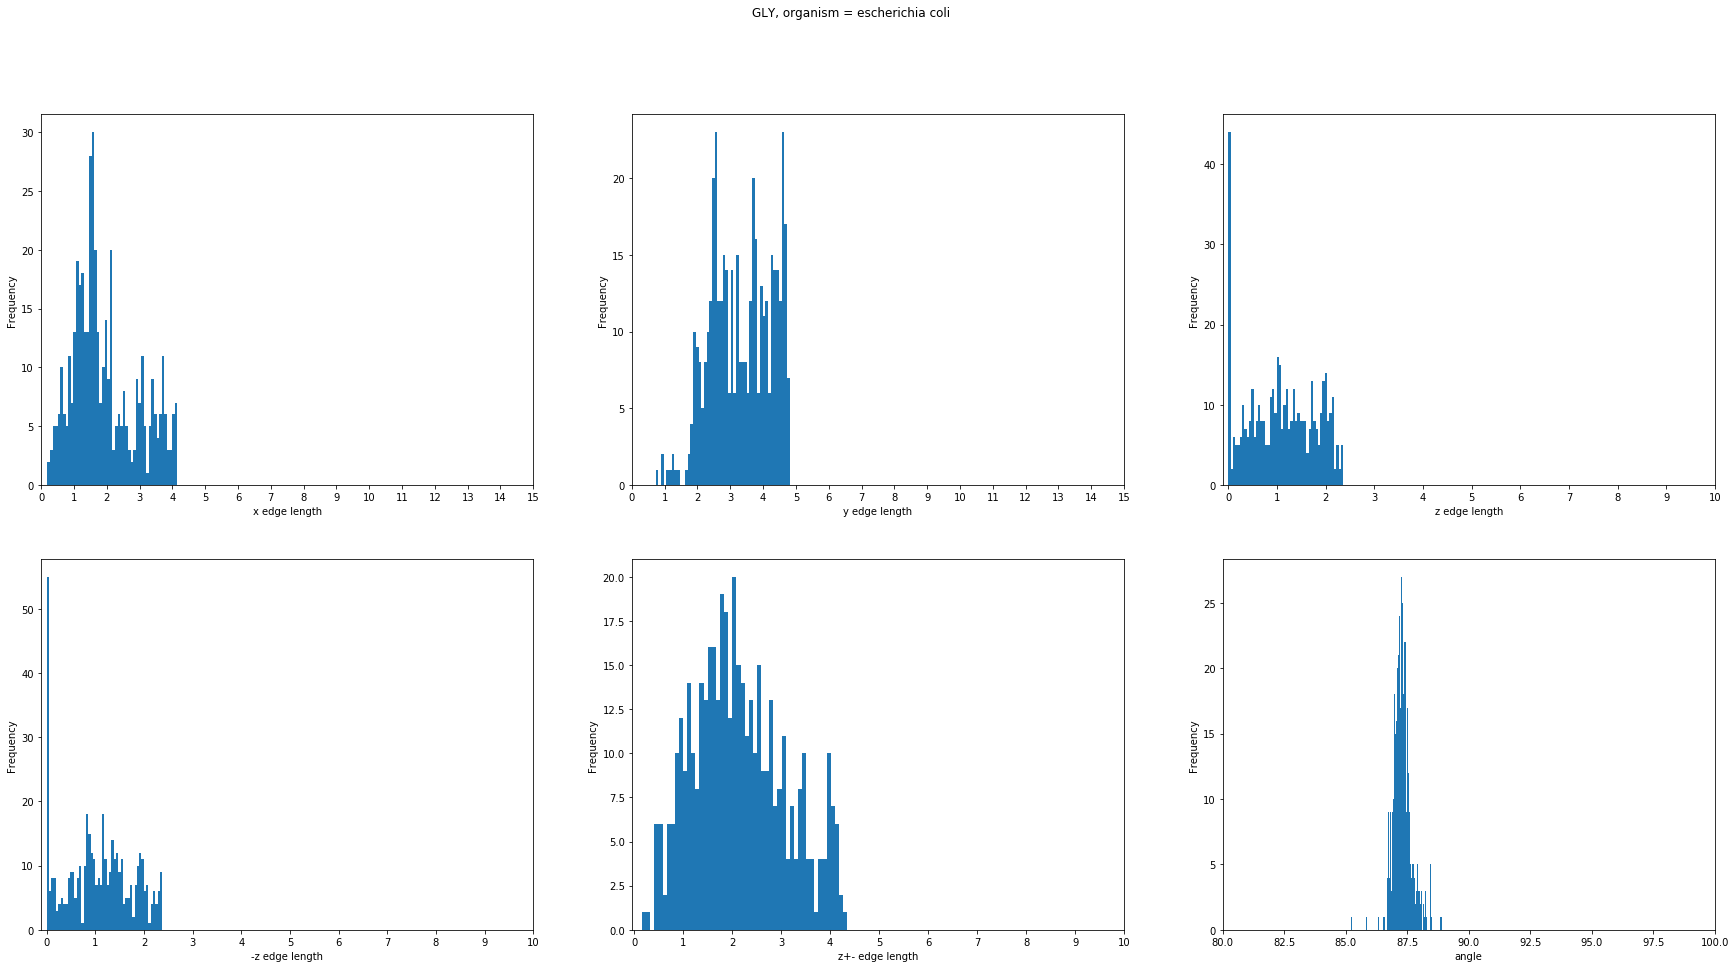

GLY: mean of x sizes: 1.94, mean of y sizes: 3.33, mean of z sizes: 1.1
GLY: max of x sizes: 4.15, max of y sizes: 4.81, max of z sizes: 2.36


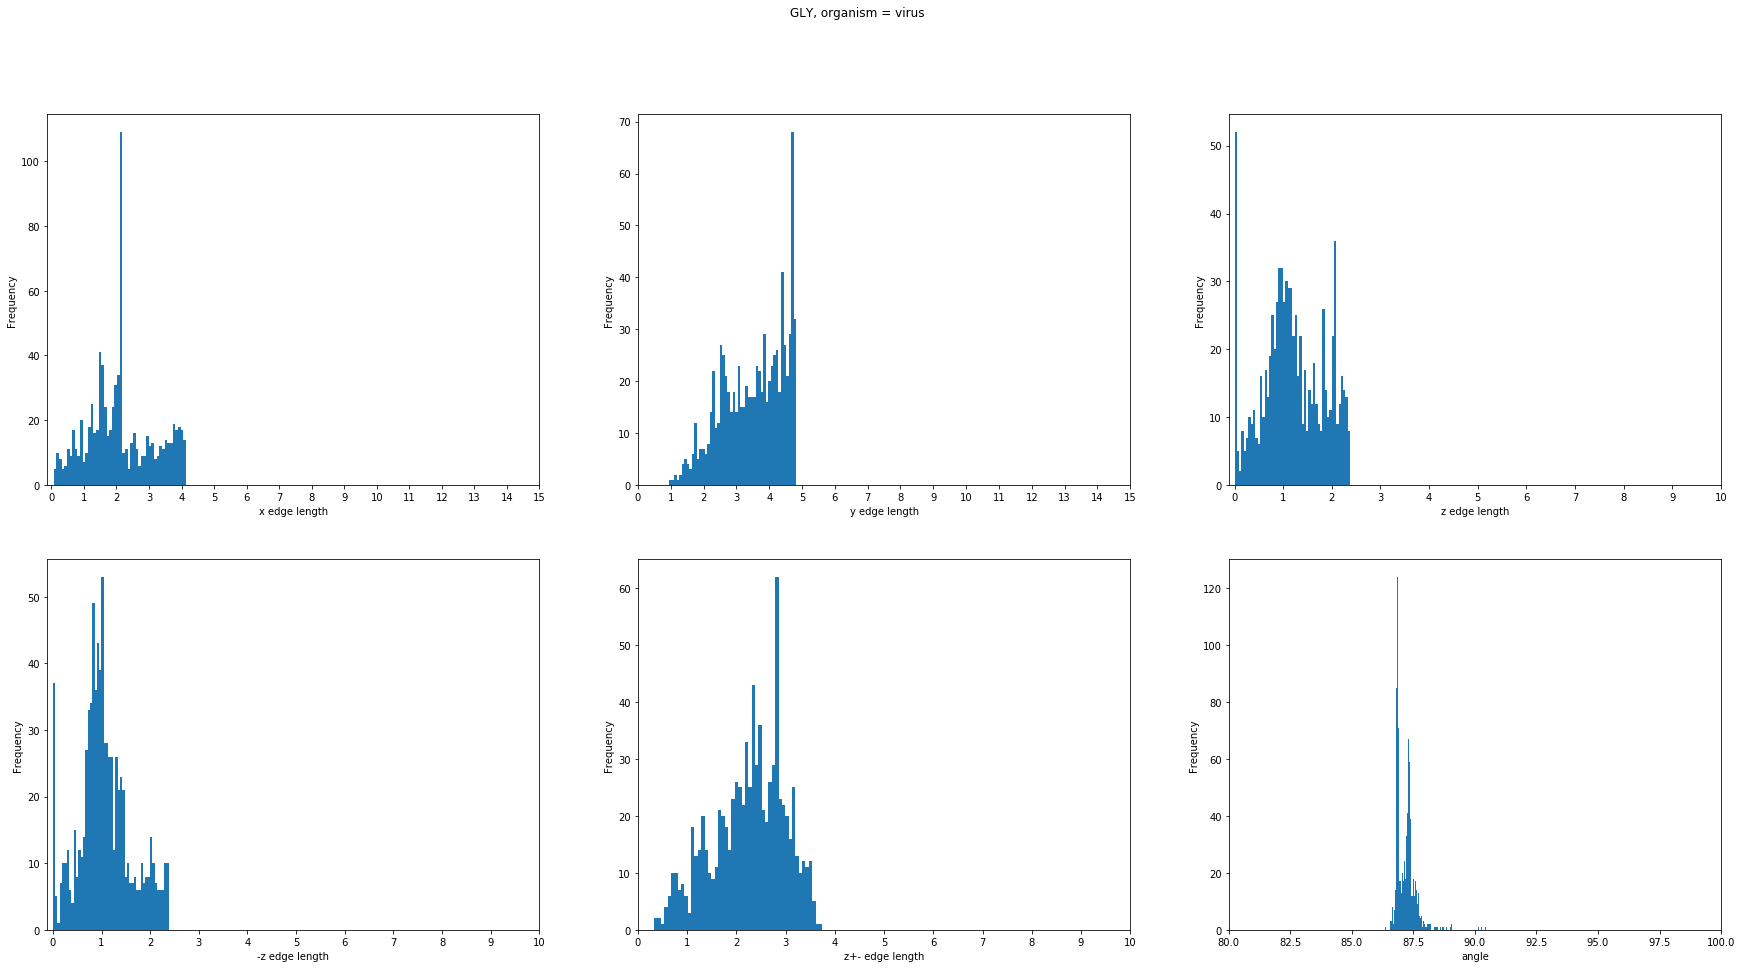

GLY: mean of x sizes: 2.13, mean of y sizes: 3.52, mean of z sizes: 1.19
GLY: max of x sizes: 4.13, max of y sizes: 4.82, max of z sizes: 2.38


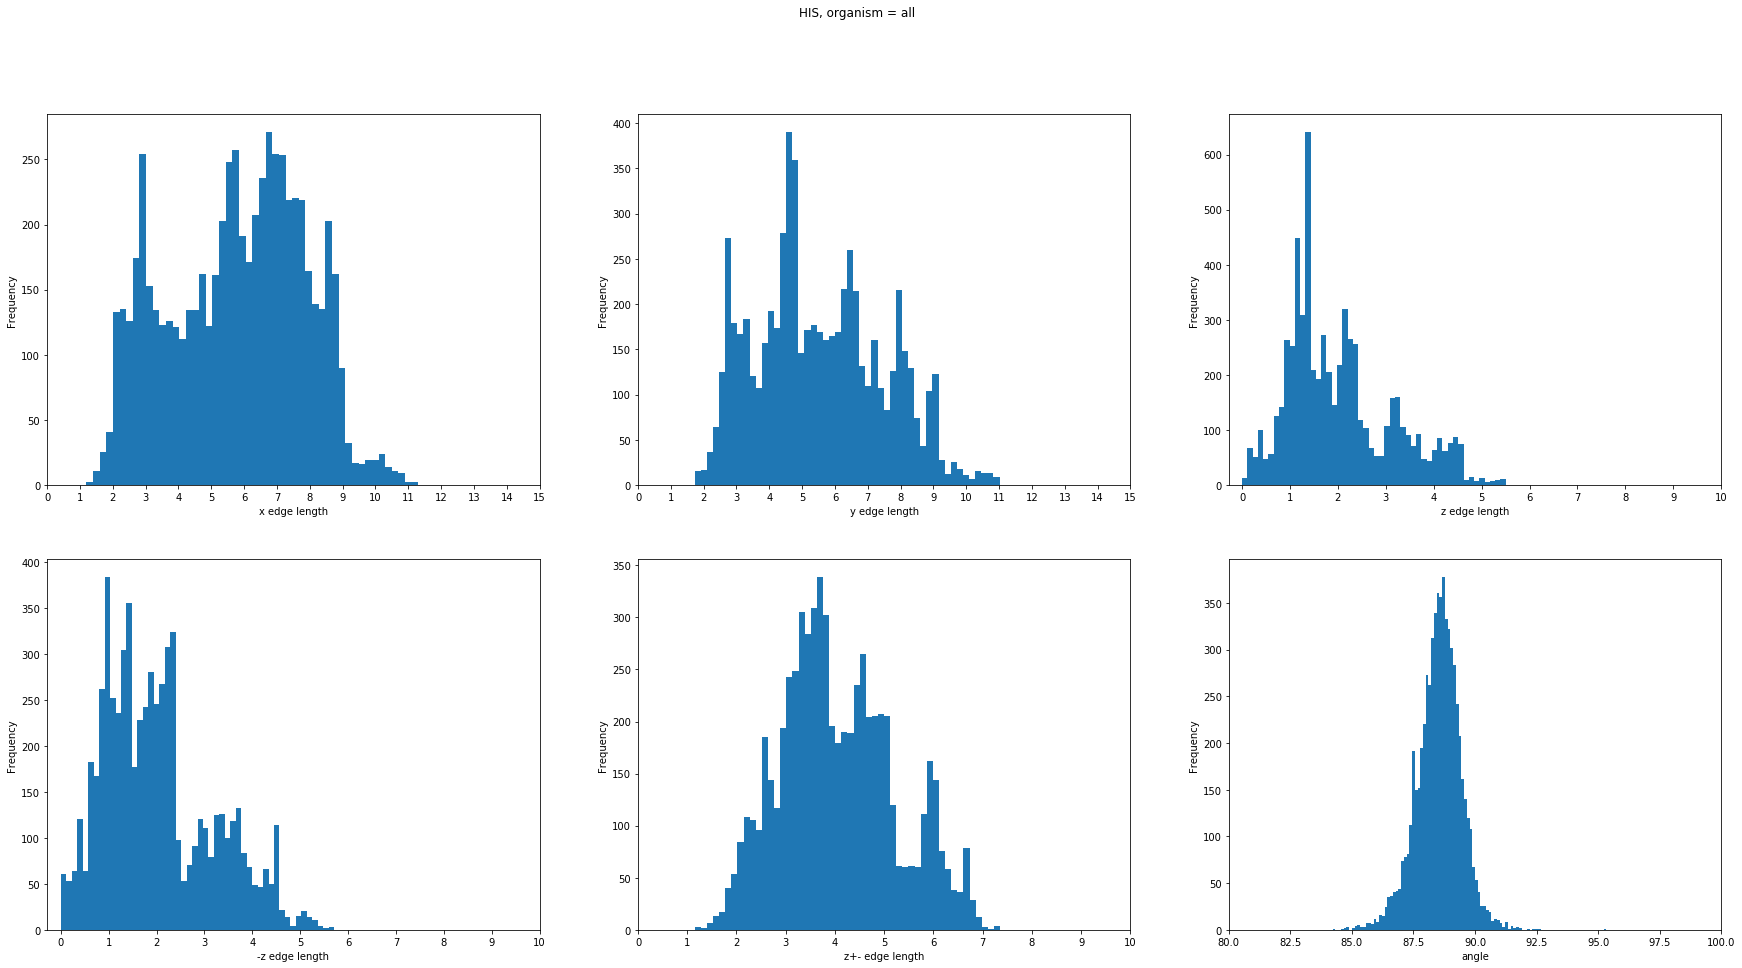

HIS: mean of x sizes: 5.78, mean of y sizes: 5.53, mean of z sizes: 2.04
HIS: max of x sizes: 11.31, max of y sizes: 11.01, max of z sizes: 5.5


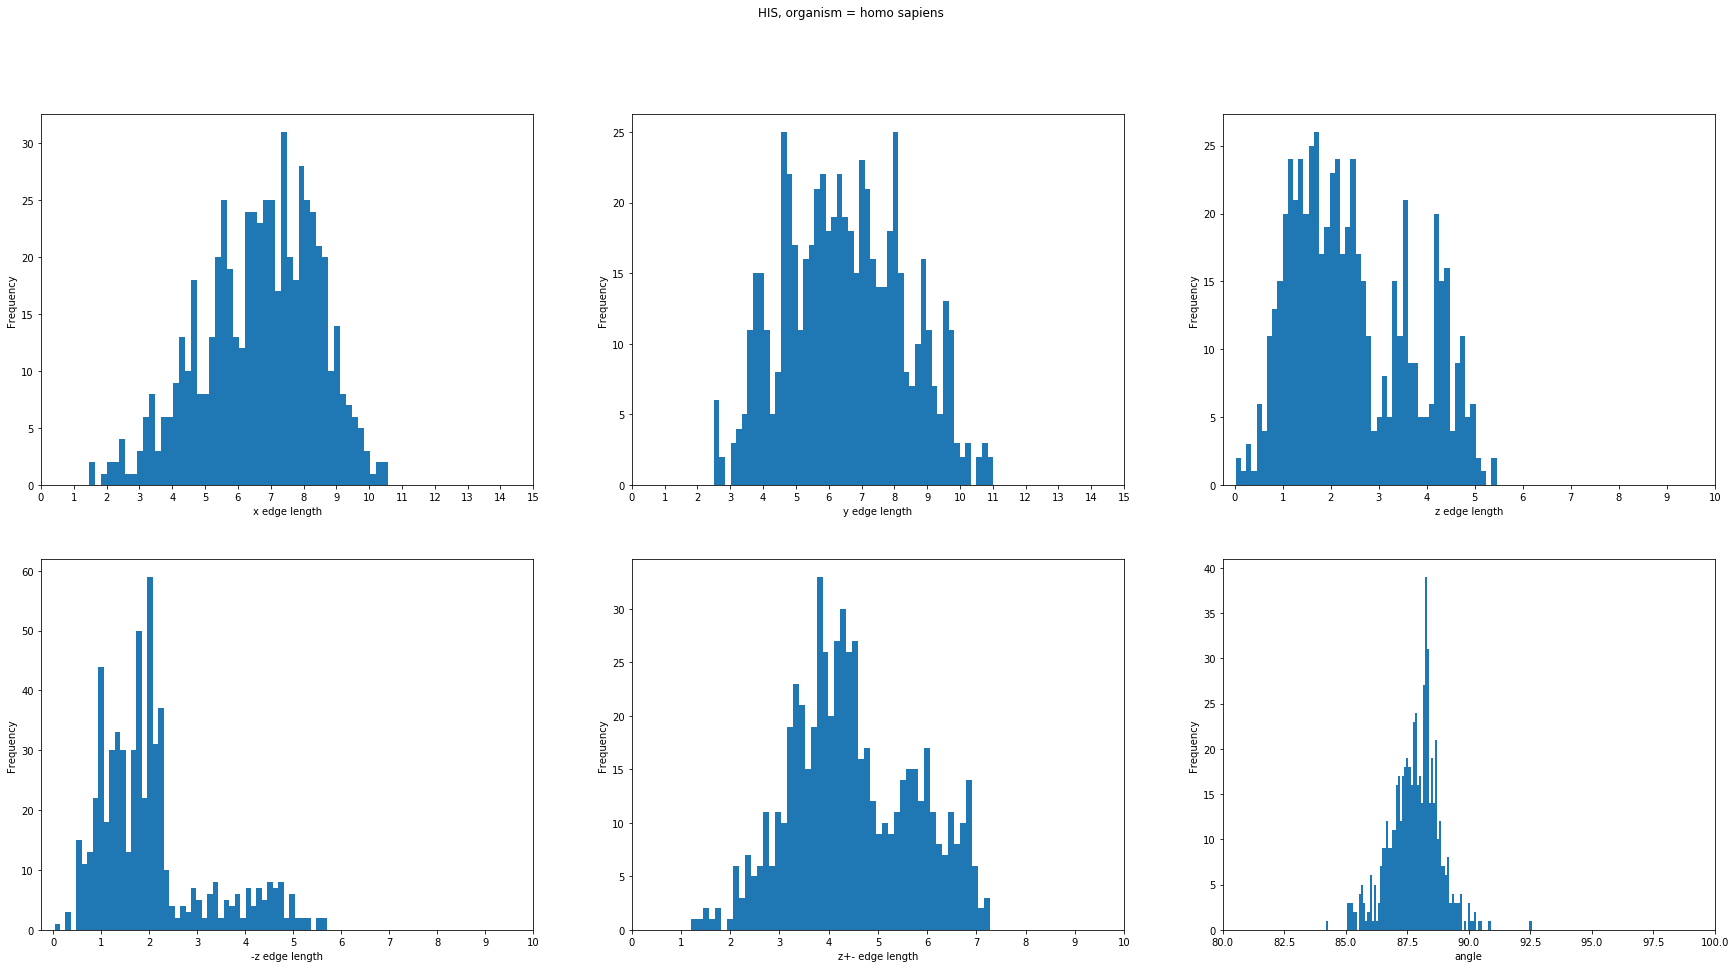

HIS: mean of x sizes: 6.68, mean of y sizes: 6.51, mean of z sizes: 2.45
HIS: max of x sizes: 10.58, max of y sizes: 11.01, max of z sizes: 5.45


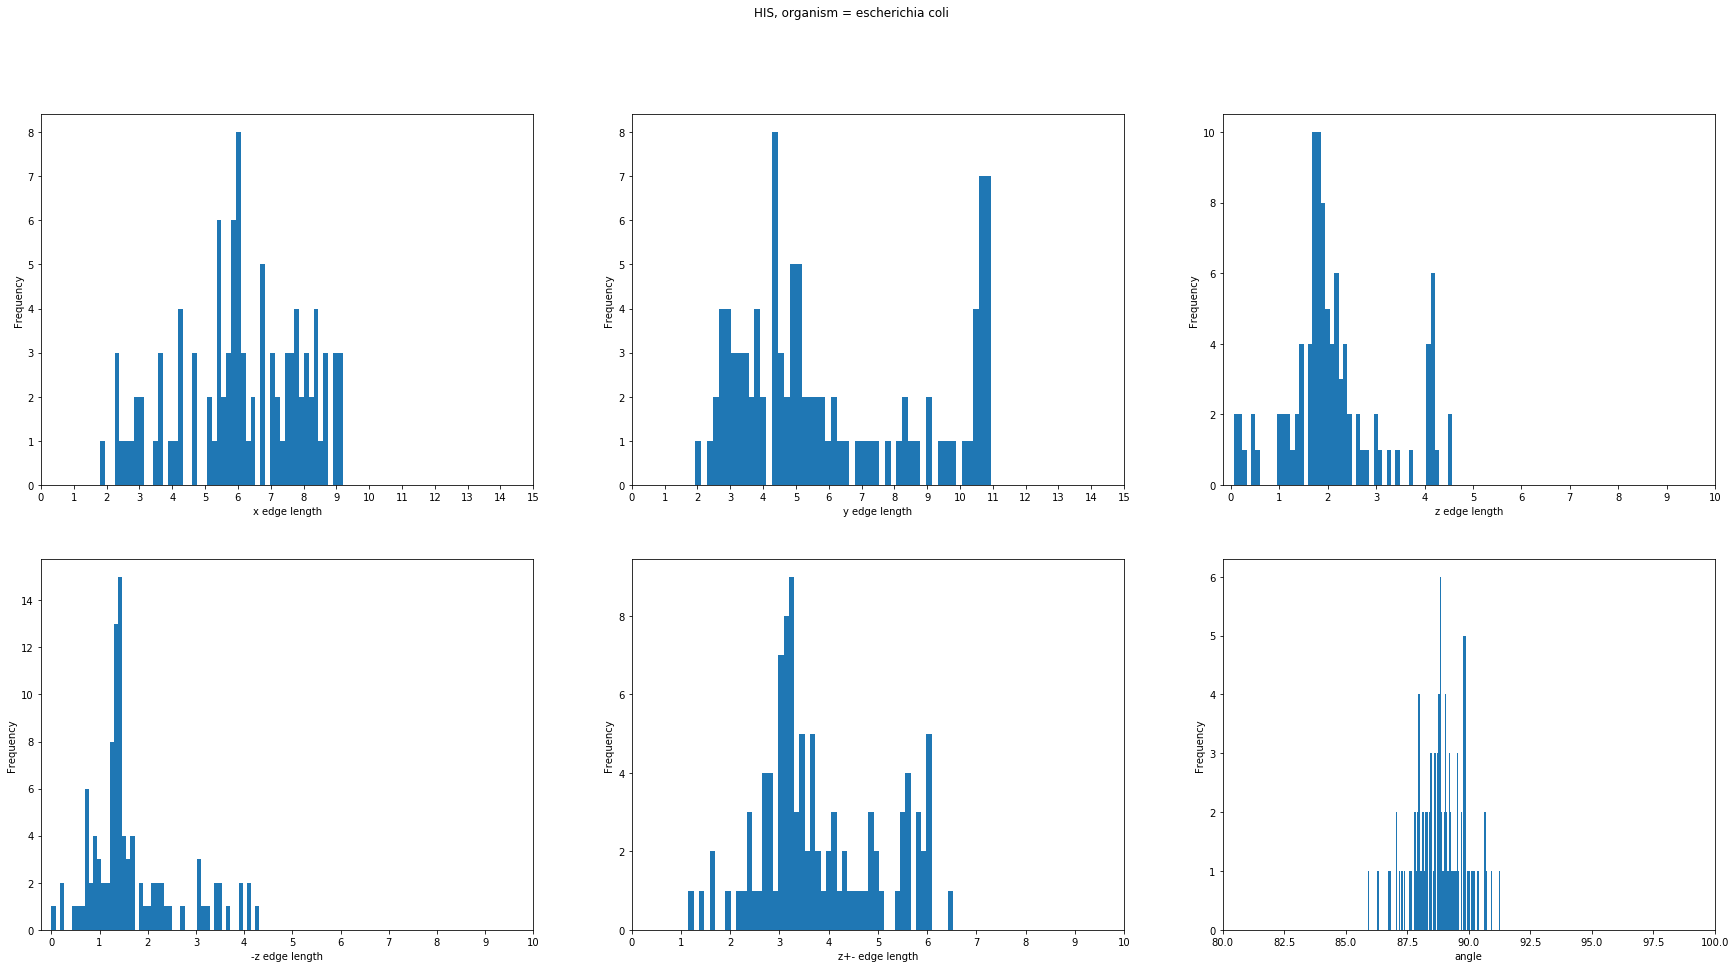

HIS: mean of x sizes: 6.11, mean of y sizes: 6.15, mean of z sizes: 2.13
HIS: max of x sizes: 9.2, max of y sizes: 10.95, max of z sizes: 4.57


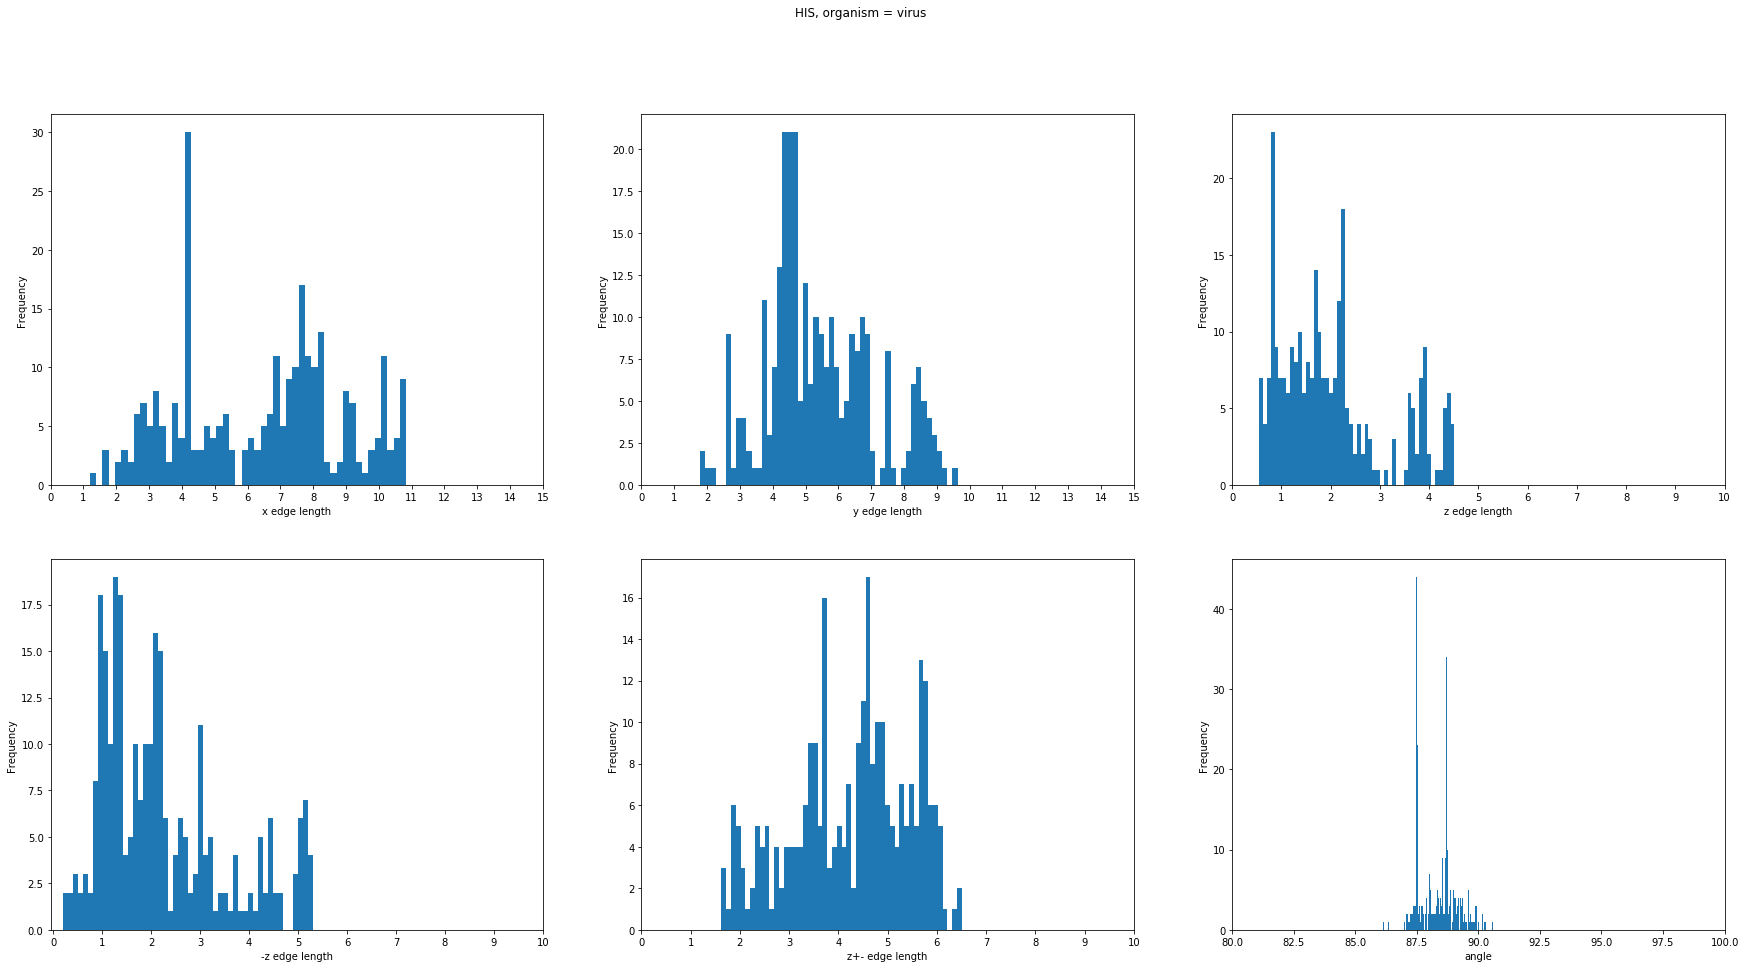

HIS: mean of x sizes: 6.41, mean of y sizes: 5.43, mean of z sizes: 2.03
HIS: max of x sizes: 10.83, max of y sizes: 9.63, max of z sizes: 4.51


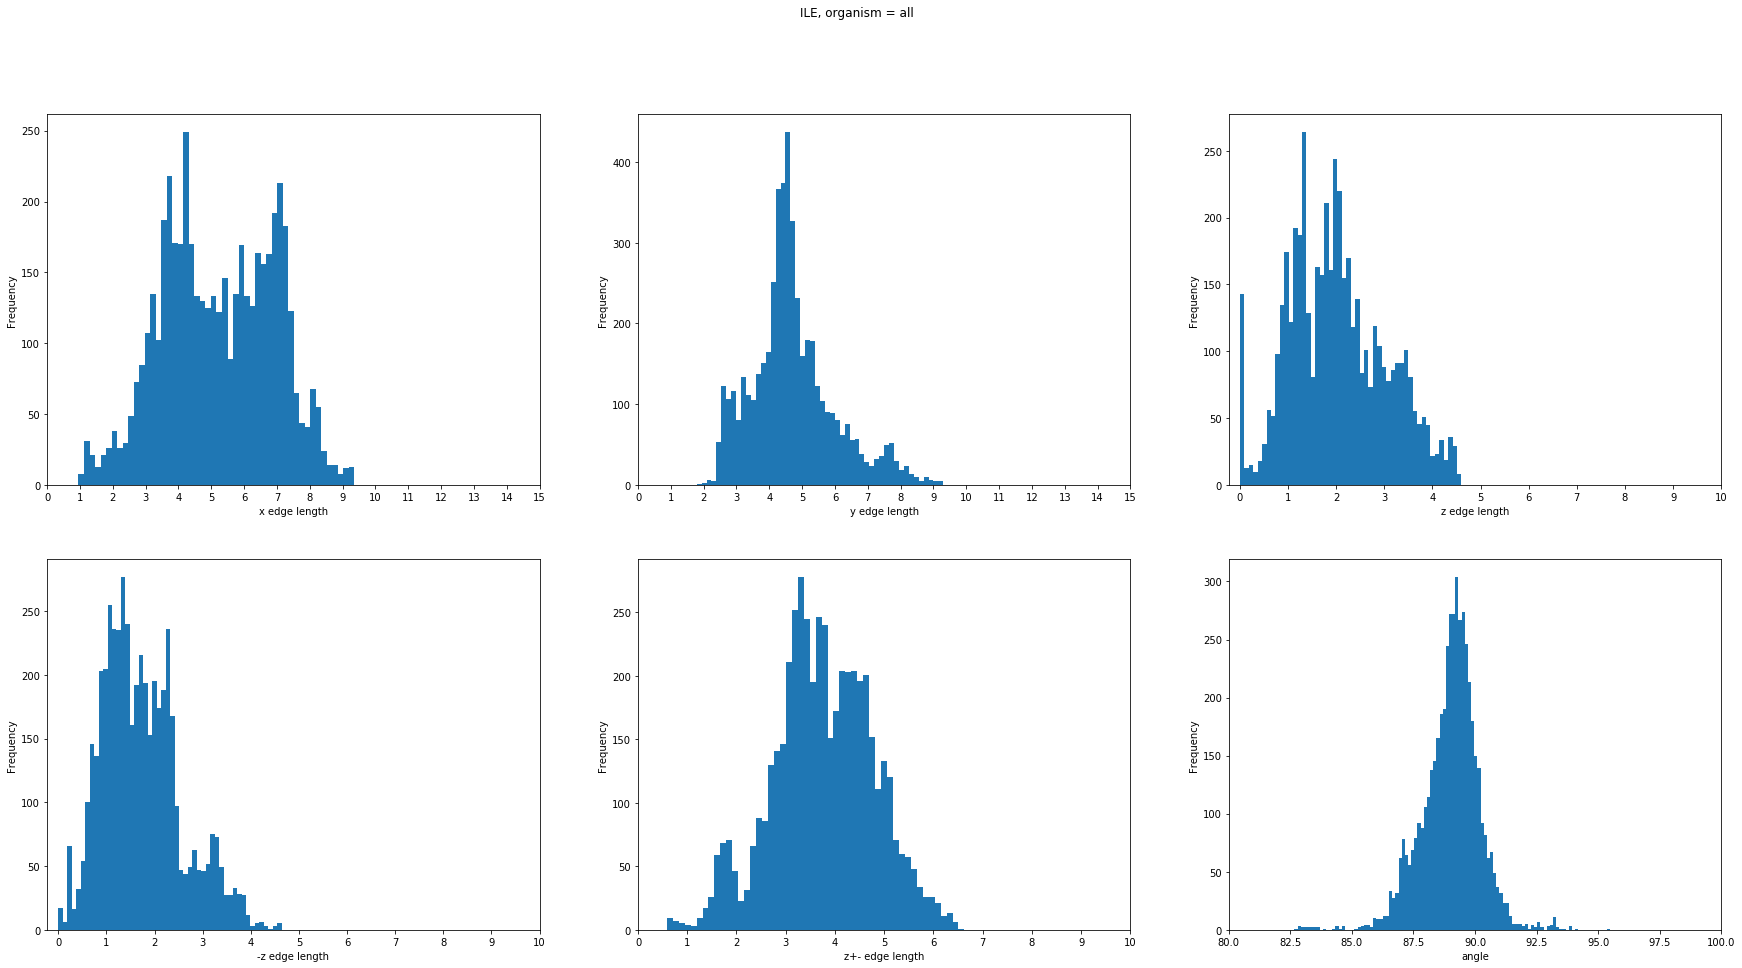

ILE: mean of x sizes: 5.22, mean of y sizes: 4.71, mean of z sizes: 2.03
ILE: max of x sizes: 9.36, max of y sizes: 9.3, max of z sizes: 4.6


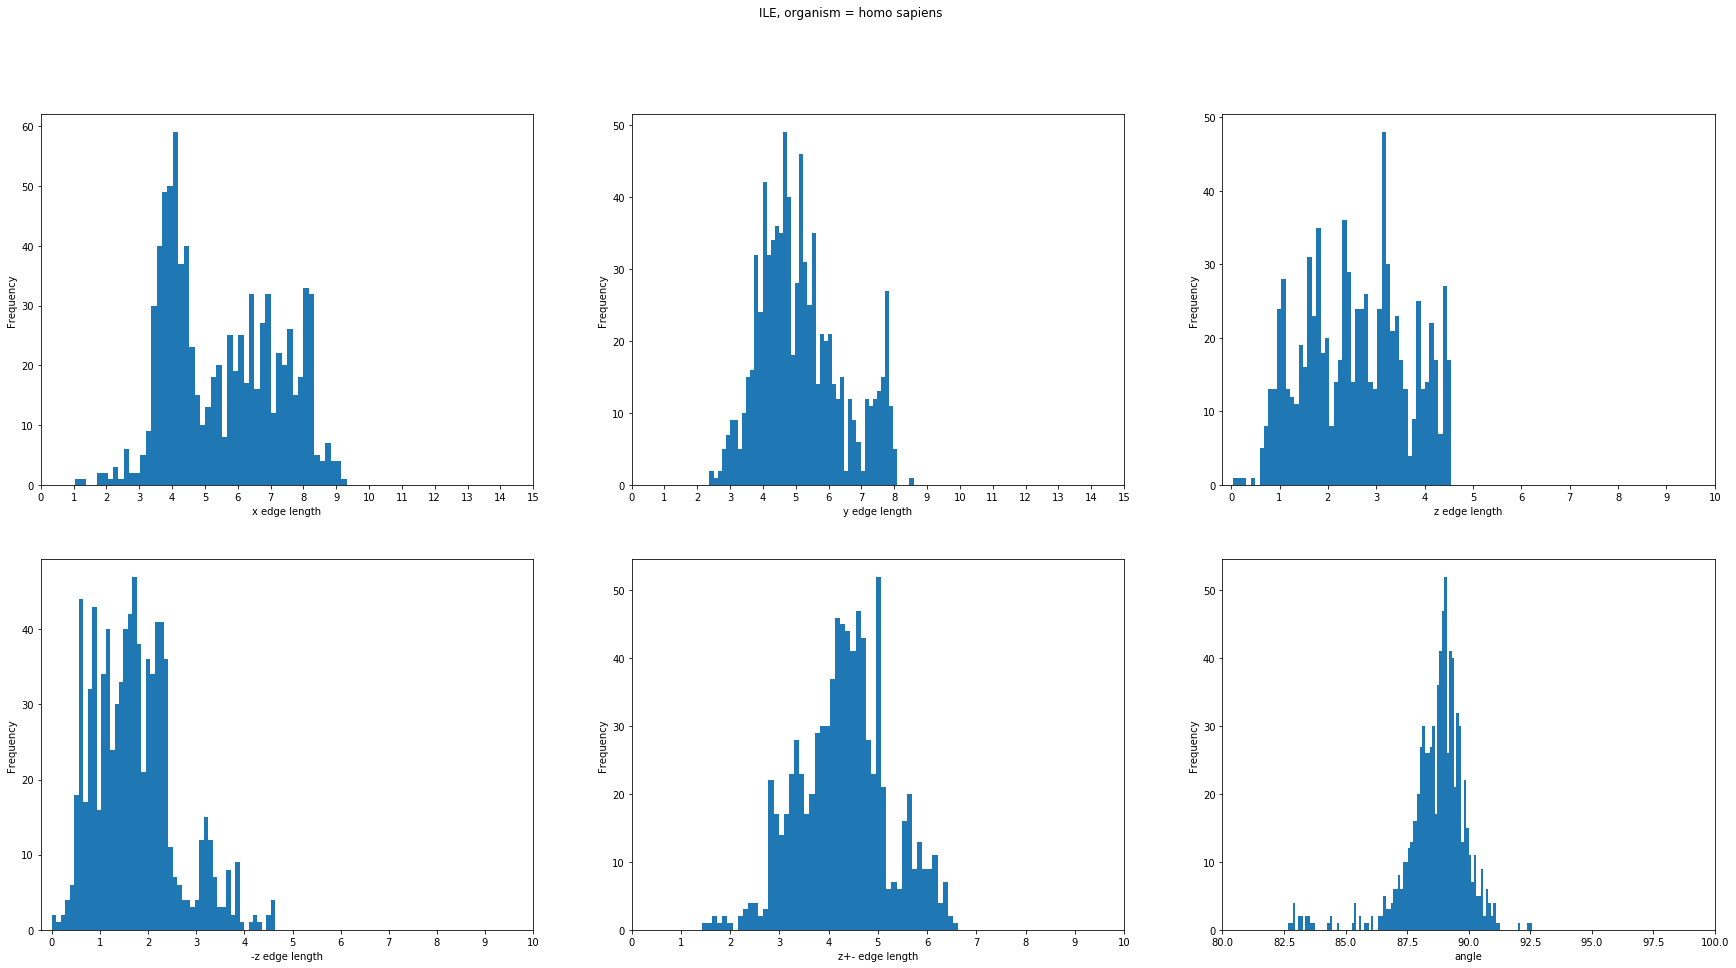

ILE: mean of x sizes: 5.54, mean of y sizes: 5.17, mean of z sizes: 2.59
ILE: max of x sizes: 9.33, max of y sizes: 8.59, max of z sizes: 4.55


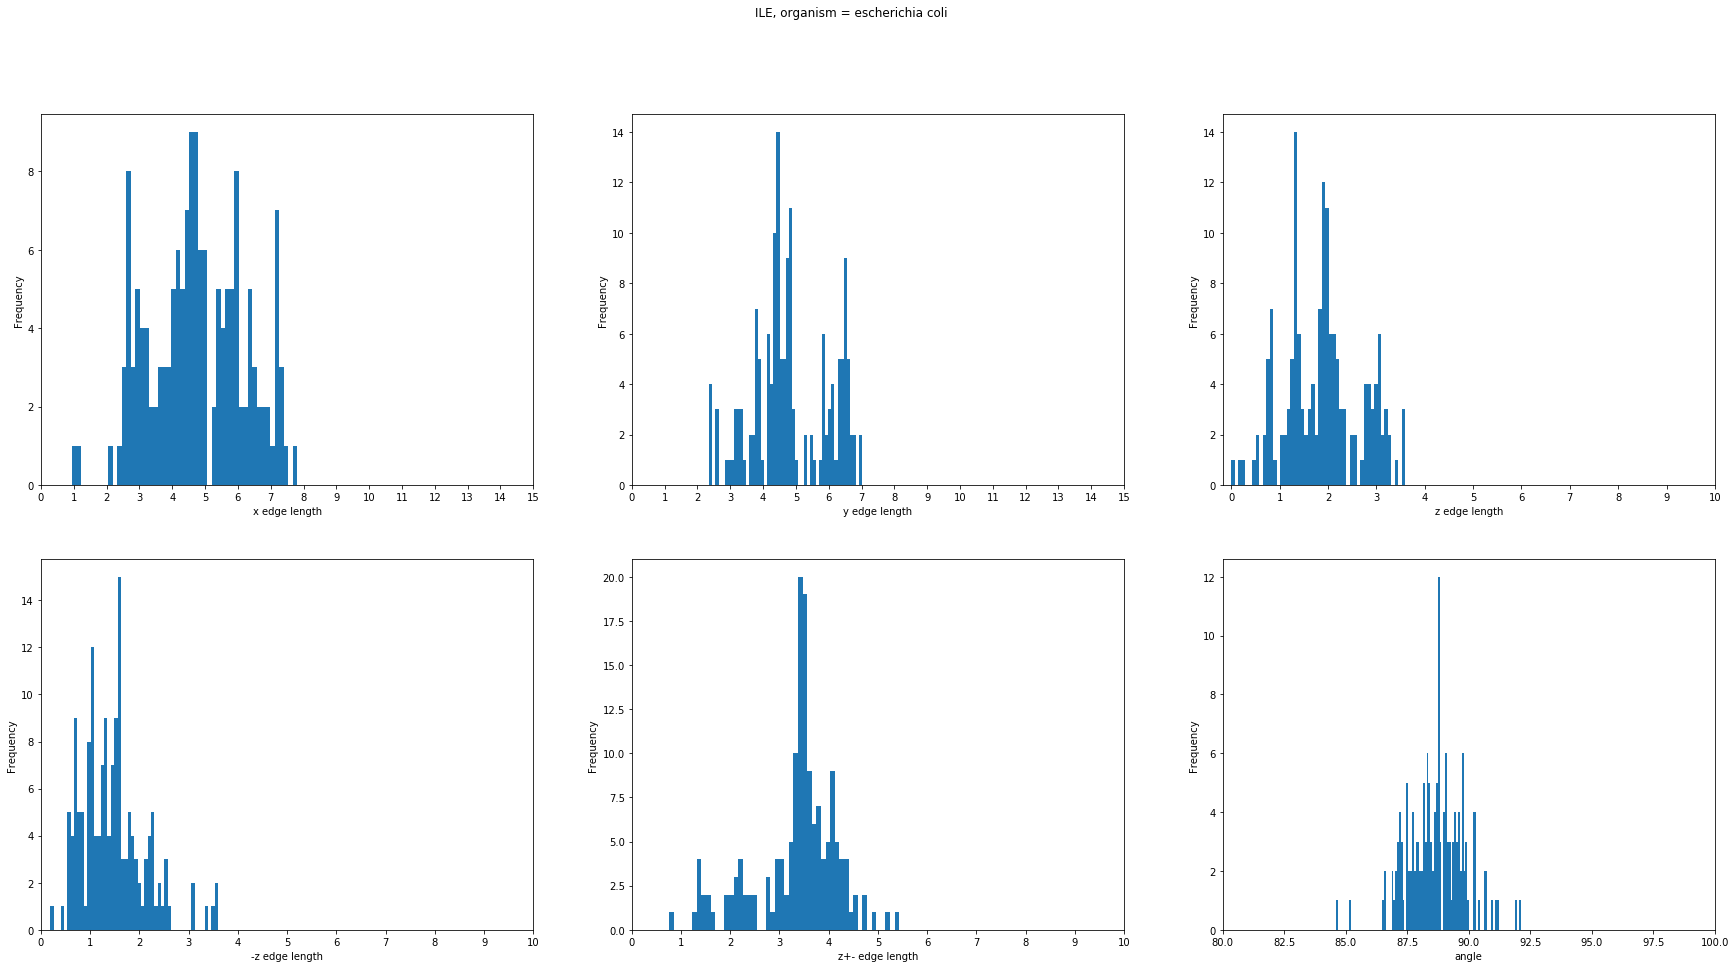

ILE: mean of x sizes: 4.77, mean of y sizes: 4.83, mean of z sizes: 1.89
ILE: max of x sizes: 7.8, max of y sizes: 7.01, max of z sizes: 3.6


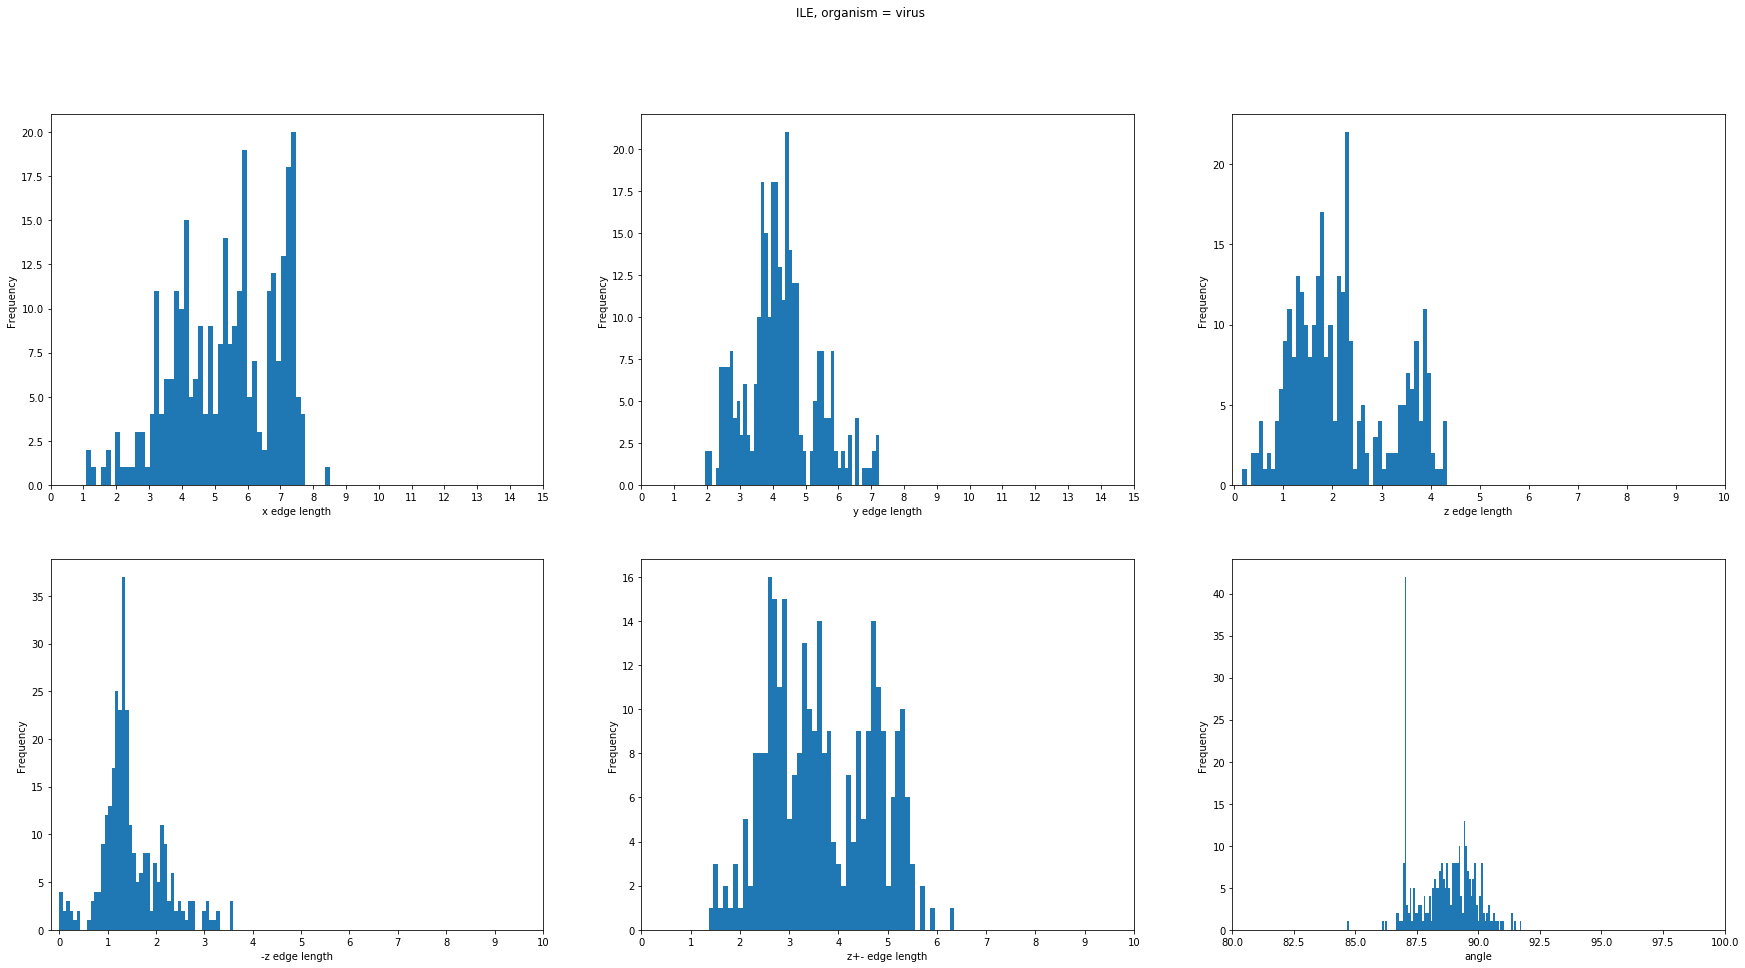

ILE: mean of x sizes: 5.34, mean of y sizes: 4.24, mean of z sizes: 2.18
ILE: max of x sizes: 8.51, max of y sizes: 7.25, max of z sizes: 4.34


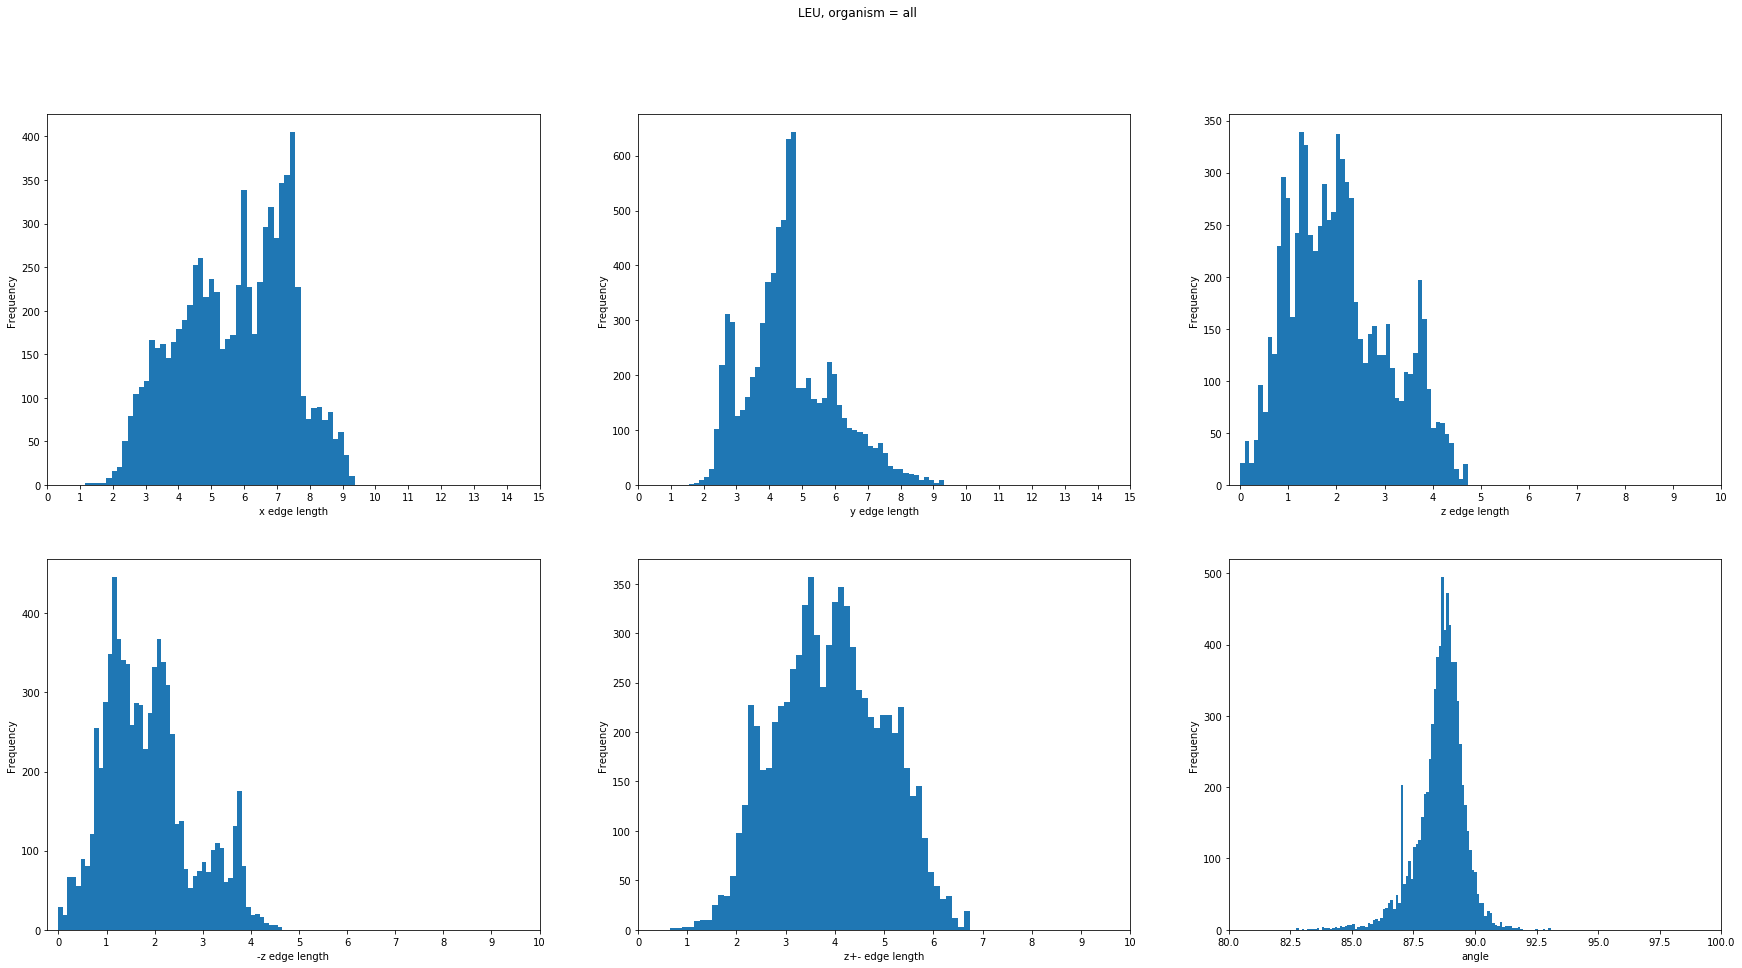

LEU: mean of x sizes: 5.73, mean of y sizes: 4.63, mean of z sizes: 2.06
LEU: max of x sizes: 9.37, max of y sizes: 9.33, max of z sizes: 4.73


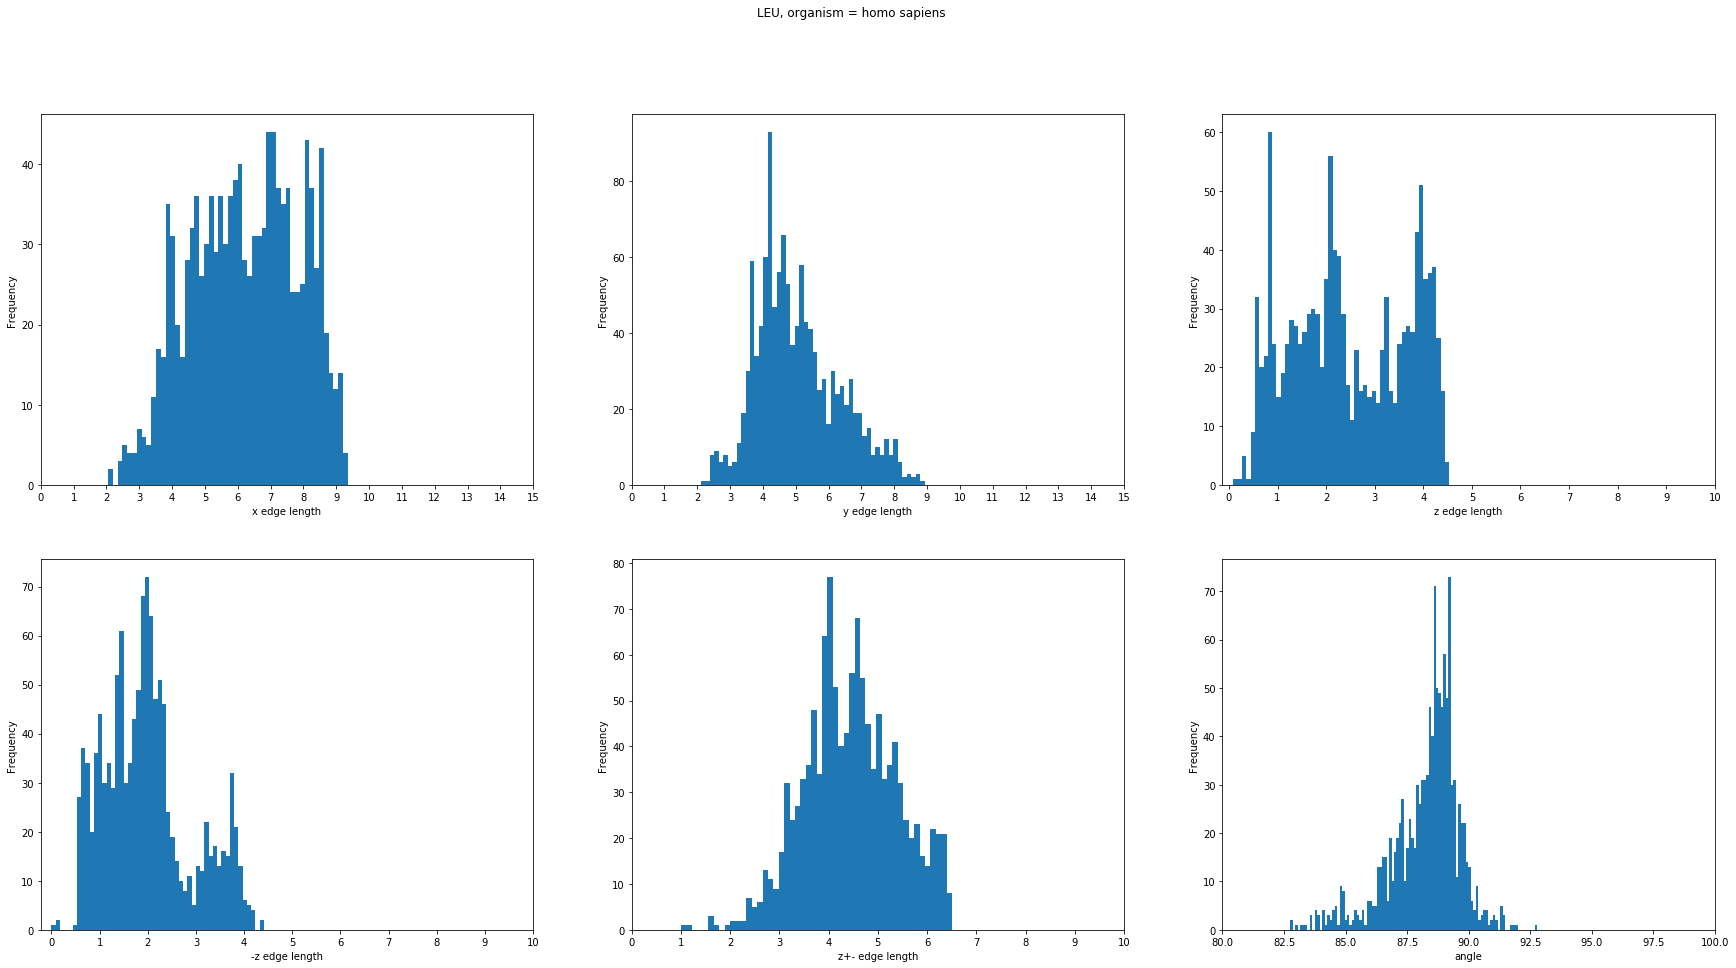

LEU: mean of x sizes: 6.24, mean of y sizes: 5.06, mean of z sizes: 2.47
LEU: max of x sizes: 9.35, max of y sizes: 8.93, max of z sizes: 4.54


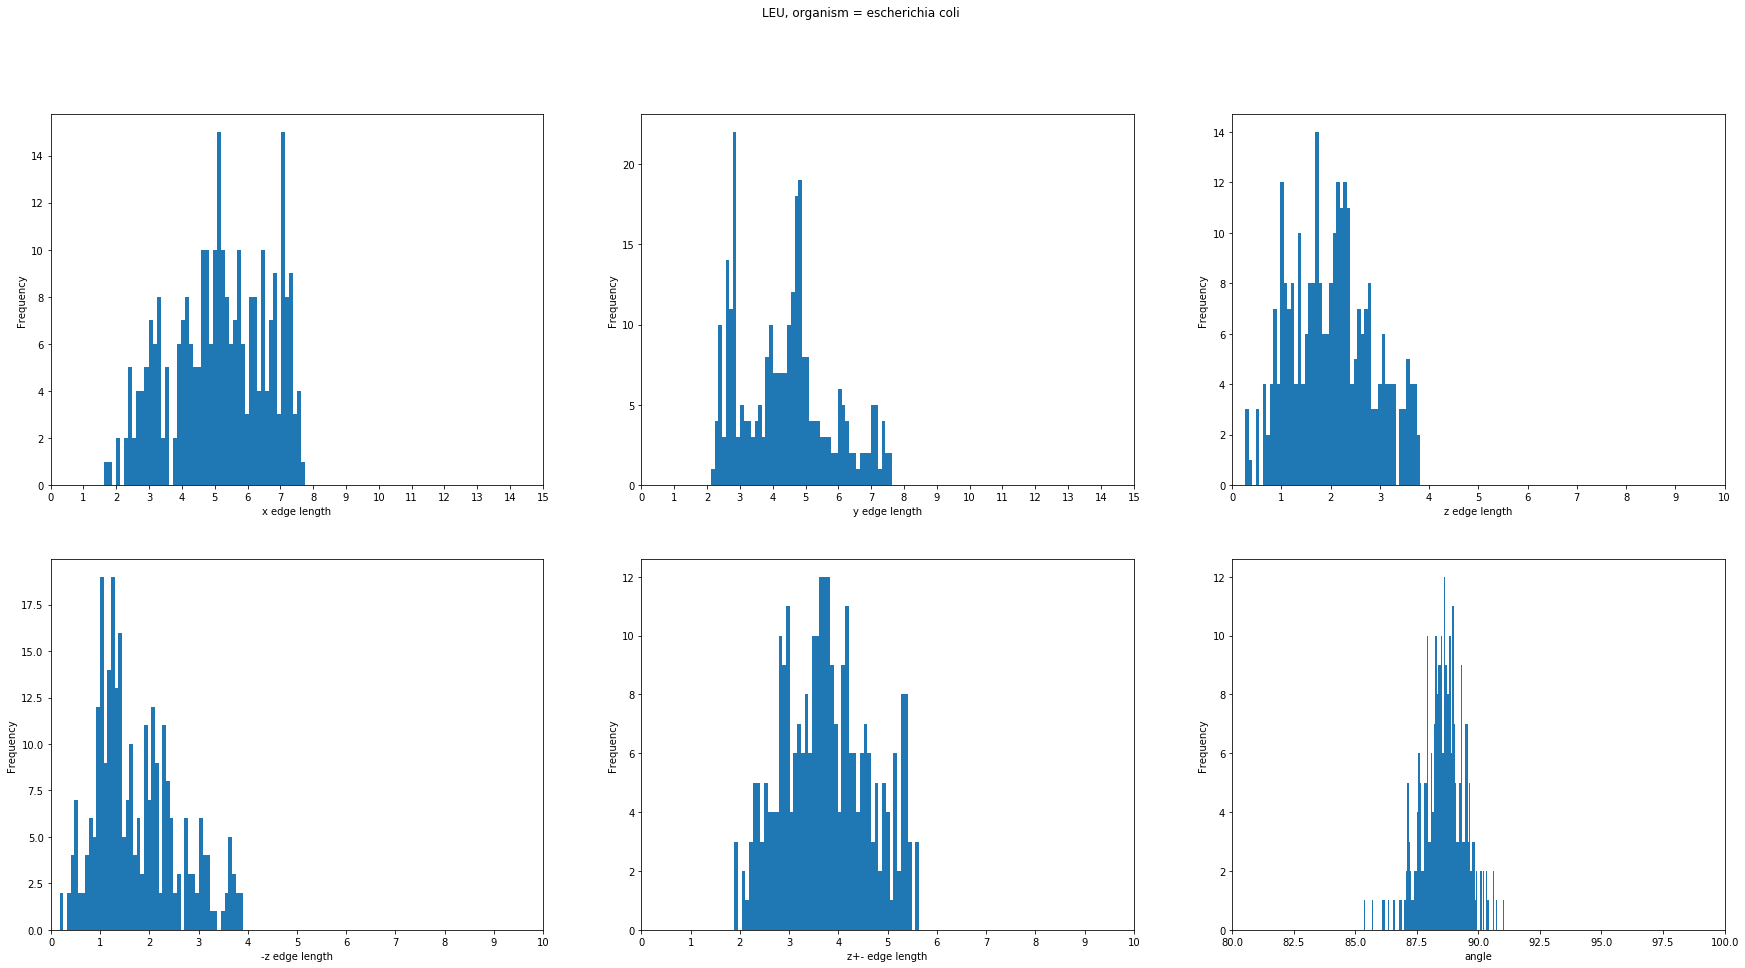

LEU: mean of x sizes: 5.17, mean of y sizes: 4.39, mean of z sizes: 2.02
LEU: max of x sizes: 7.76, max of y sizes: 7.65, max of z sizes: 3.82


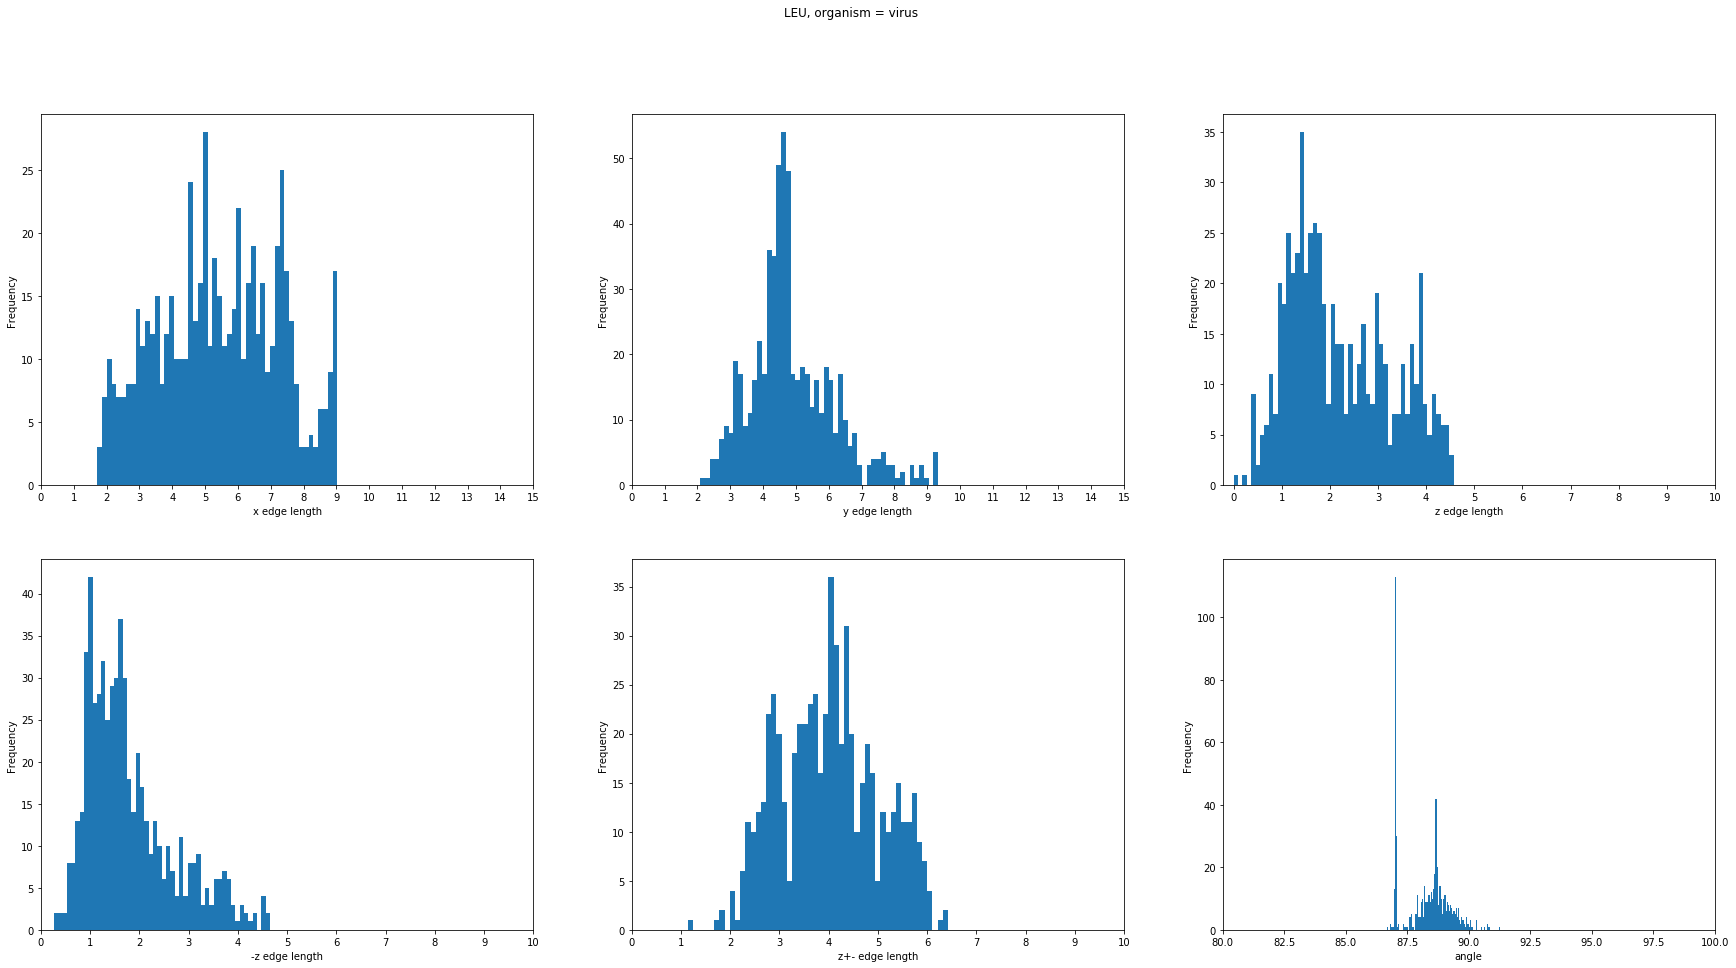

LEU: mean of x sizes: 5.42, mean of y sizes: 4.87, mean of z sizes: 2.21
LEU: max of x sizes: 9.03, max of y sizes: 9.33, max of z sizes: 4.58


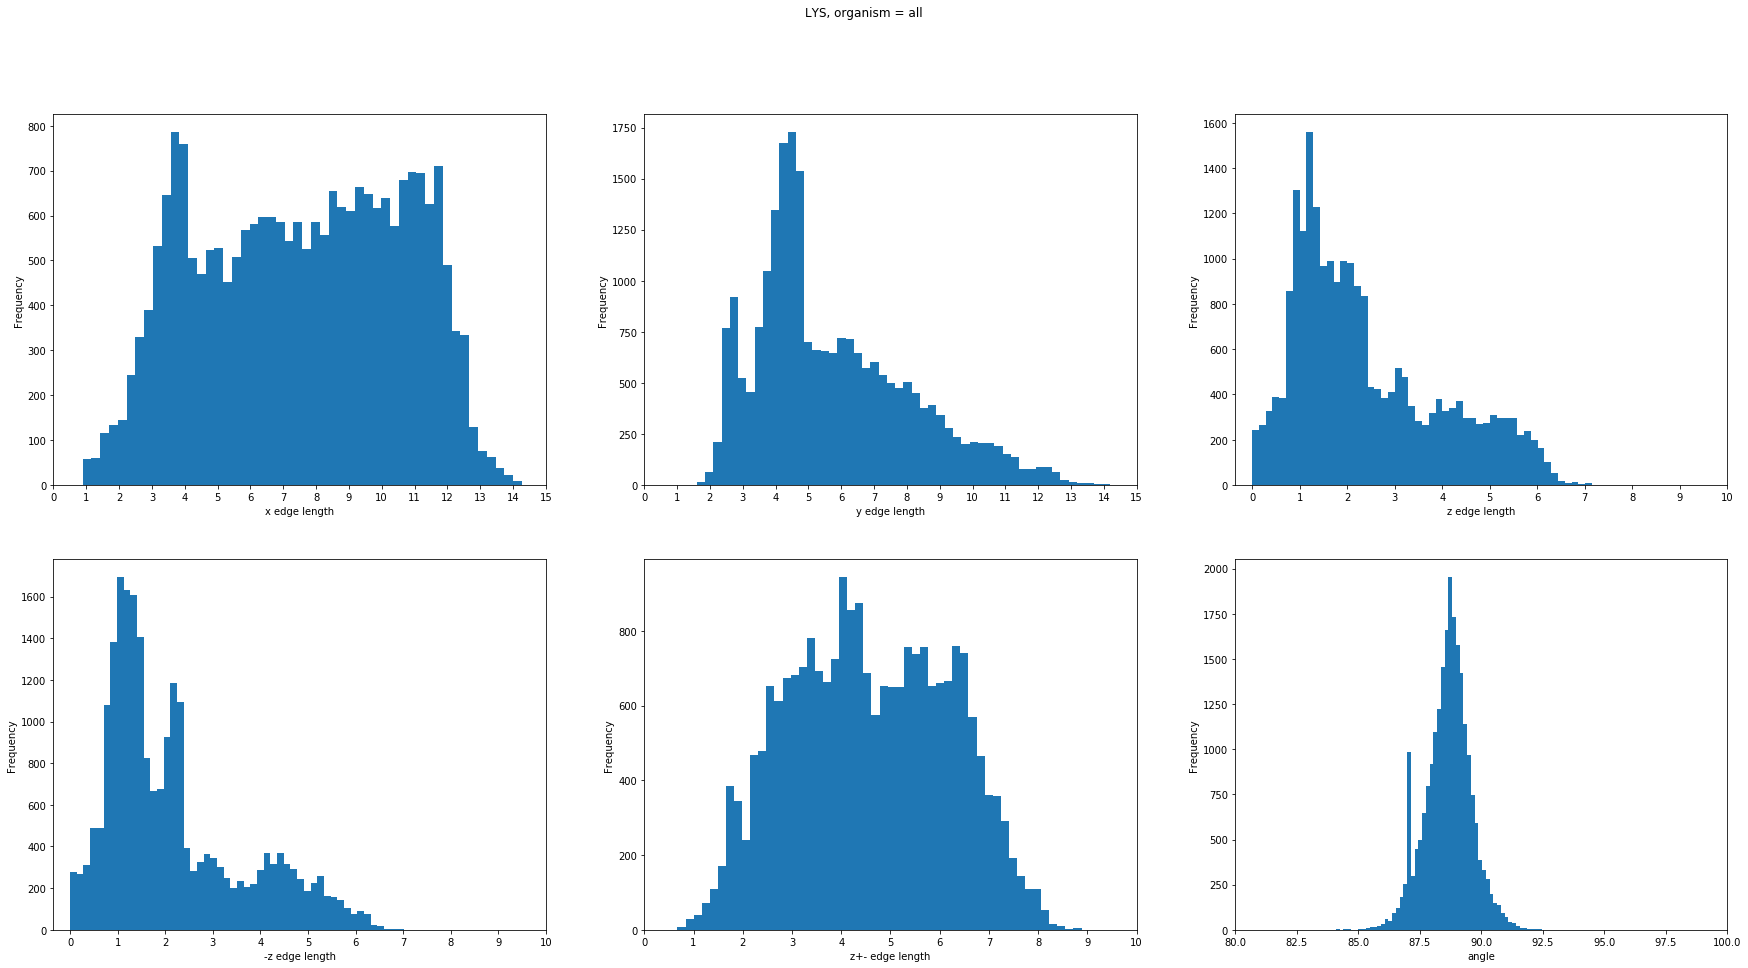

LYS: mean of x sizes: 7.55, mean of y sizes: 5.72, mean of z sizes: 2.43
LYS: max of x sizes: 14.27, max of y sizes: 14.19, max of z sizes: 7.15


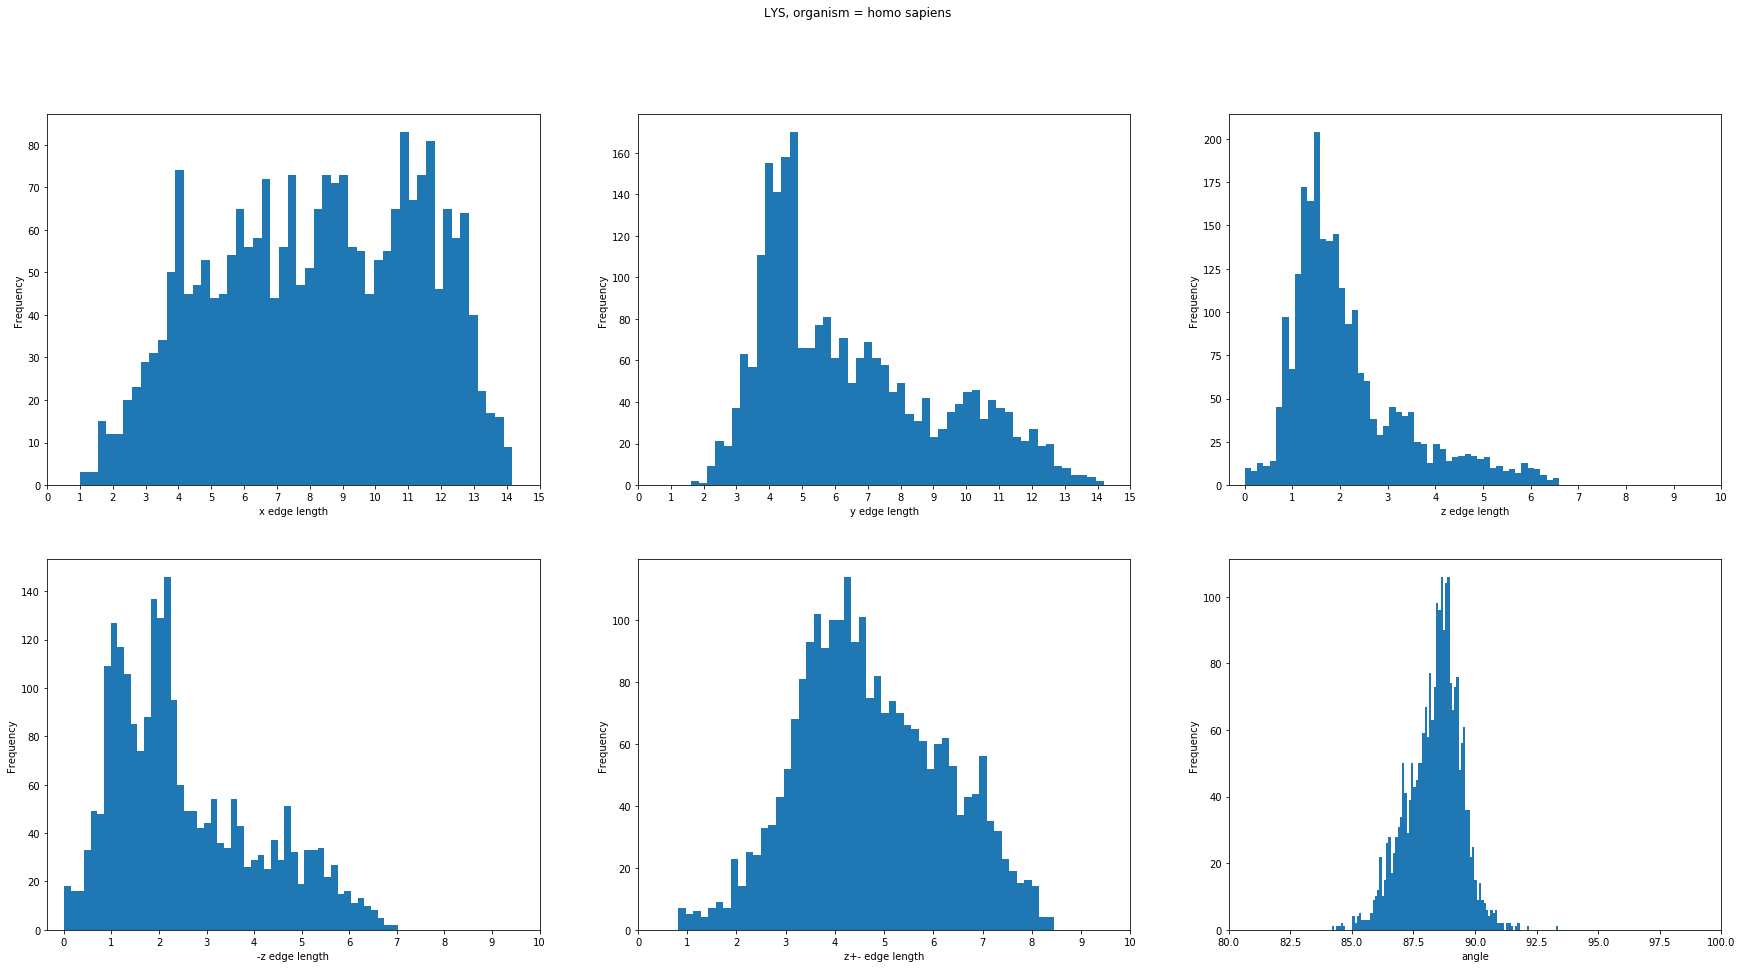

LYS: mean of x sizes: 8.21, mean of y sizes: 6.49, mean of z sizes: 2.17
LYS: max of x sizes: 14.17, max of y sizes: 14.19, max of z sizes: 6.6


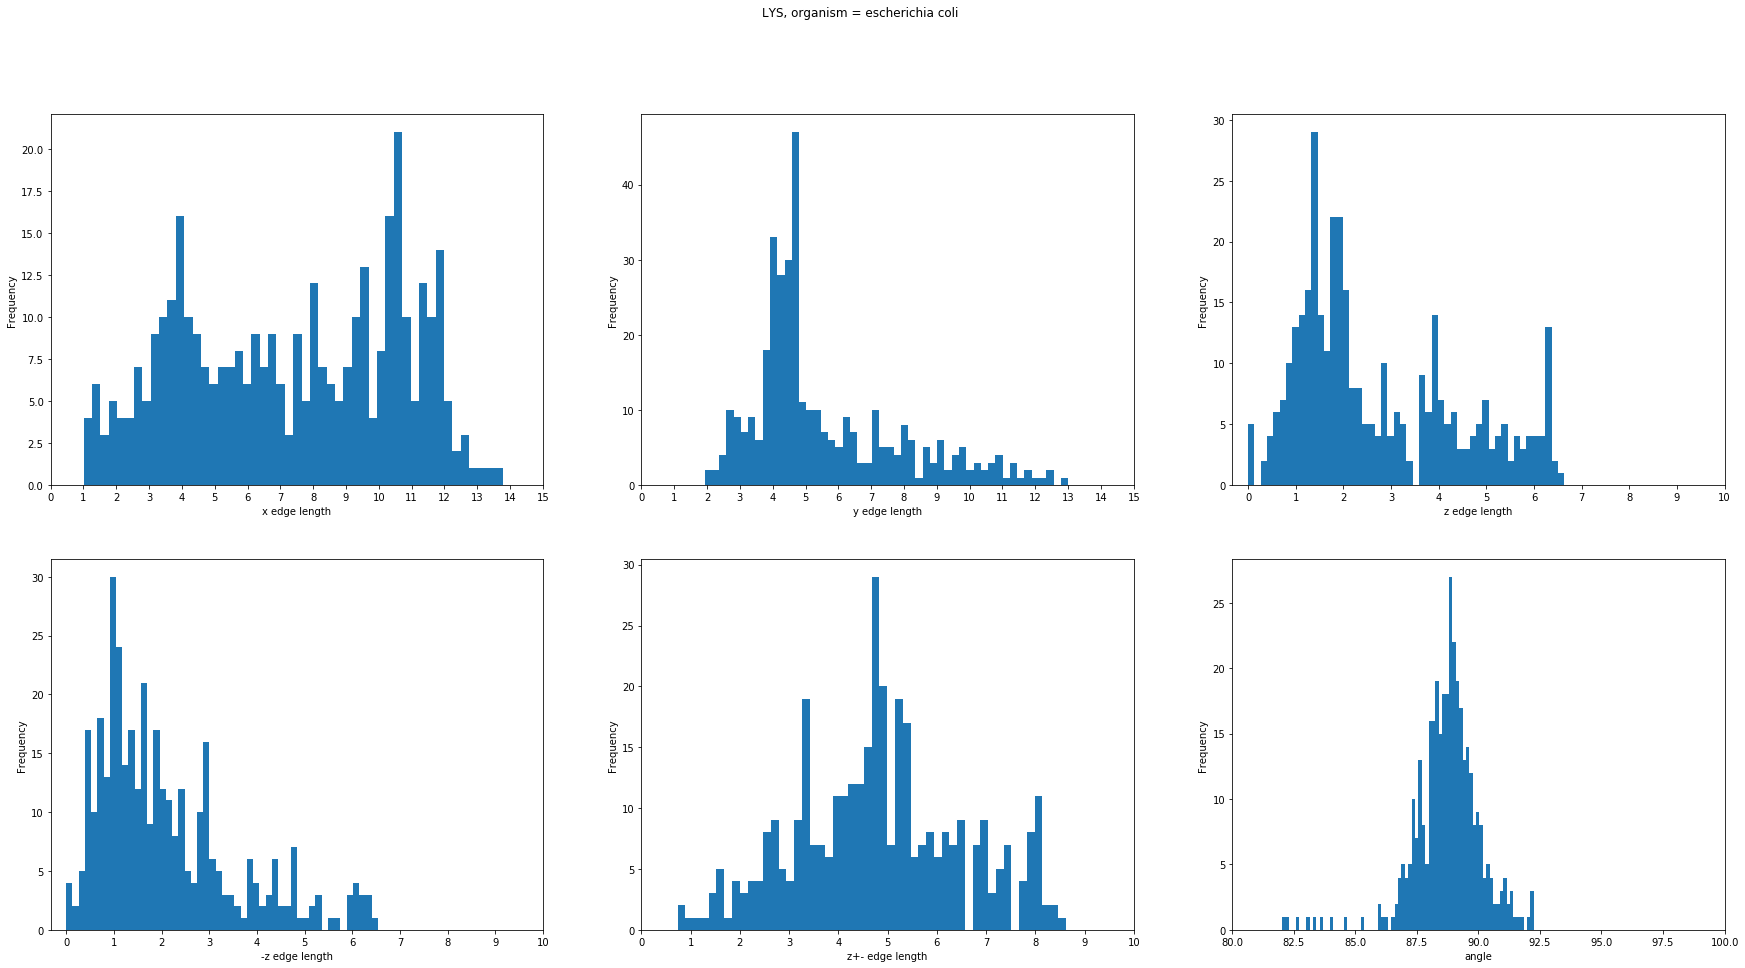

LYS: mean of x sizes: 7.32, mean of y sizes: 5.59, mean of z sizes: 2.73
LYS: max of x sizes: 13.78, max of y sizes: 13.0, max of z sizes: 6.64


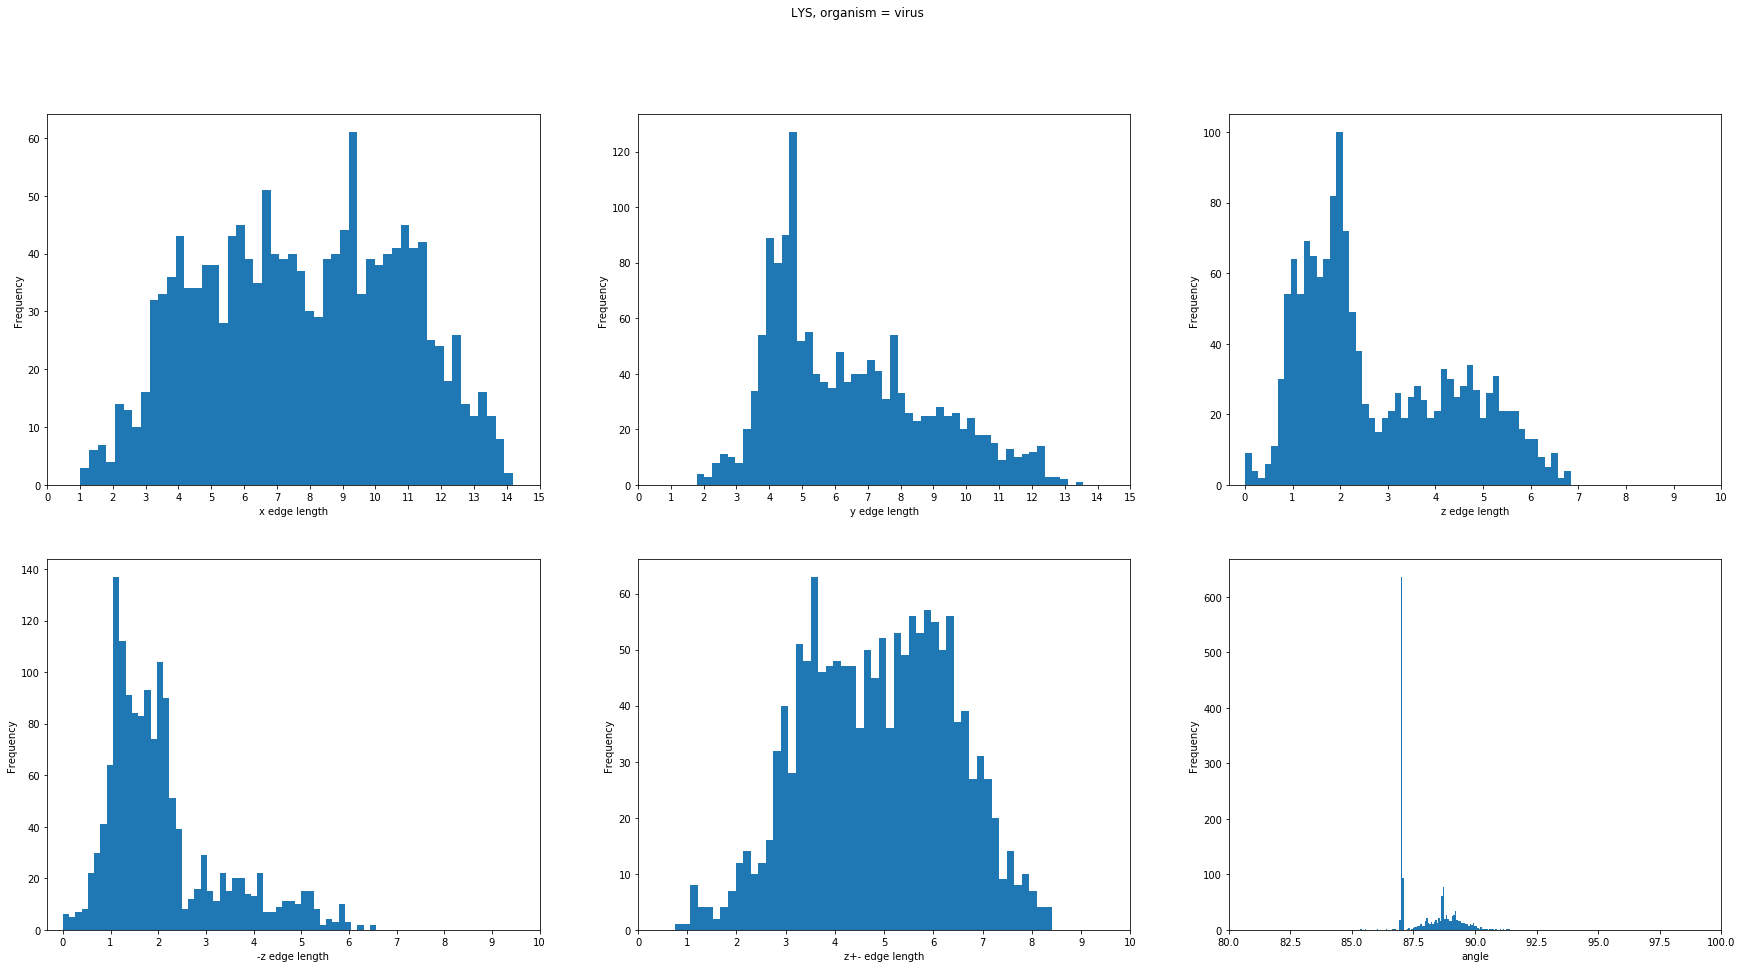

LYS: mean of x sizes: 7.75, mean of y sizes: 6.44, mean of z sizes: 2.8
LYS: max of x sizes: 14.19, max of y sizes: 13.57, max of z sizes: 6.84


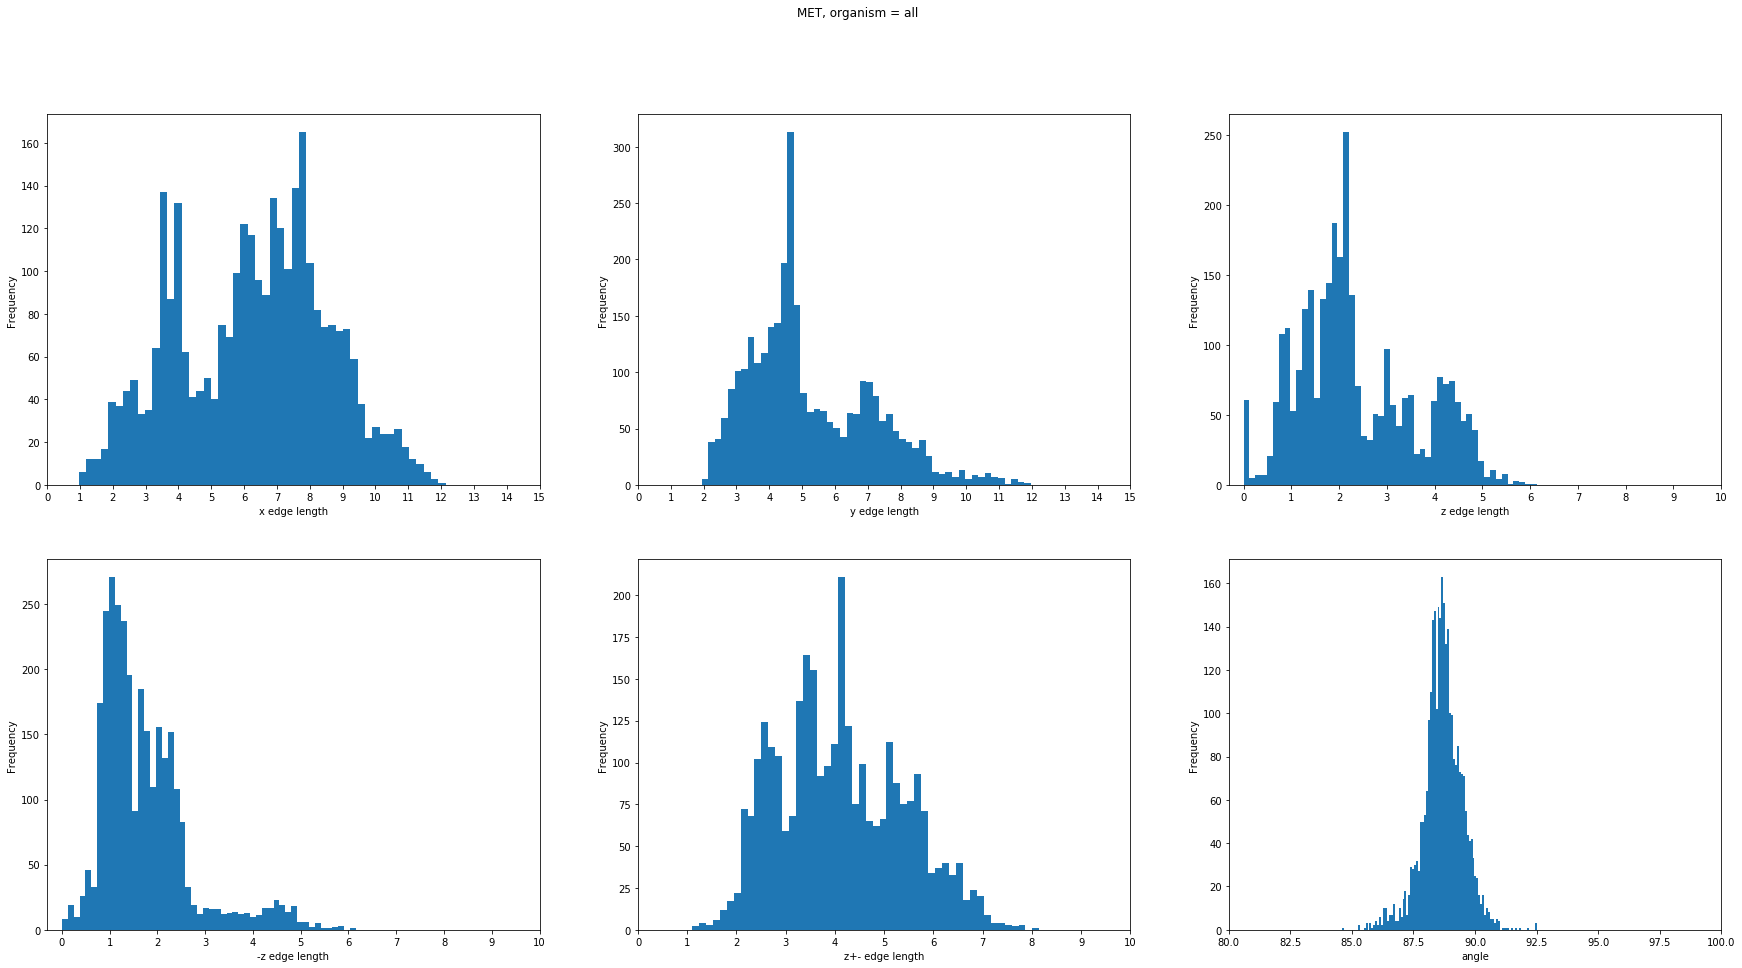

MET: mean of x sizes: 6.3, mean of y sizes: 5.23, mean of z sizes: 2.37
MET: max of x sizes: 12.14, max of y sizes: 11.97, max of z sizes: 6.14


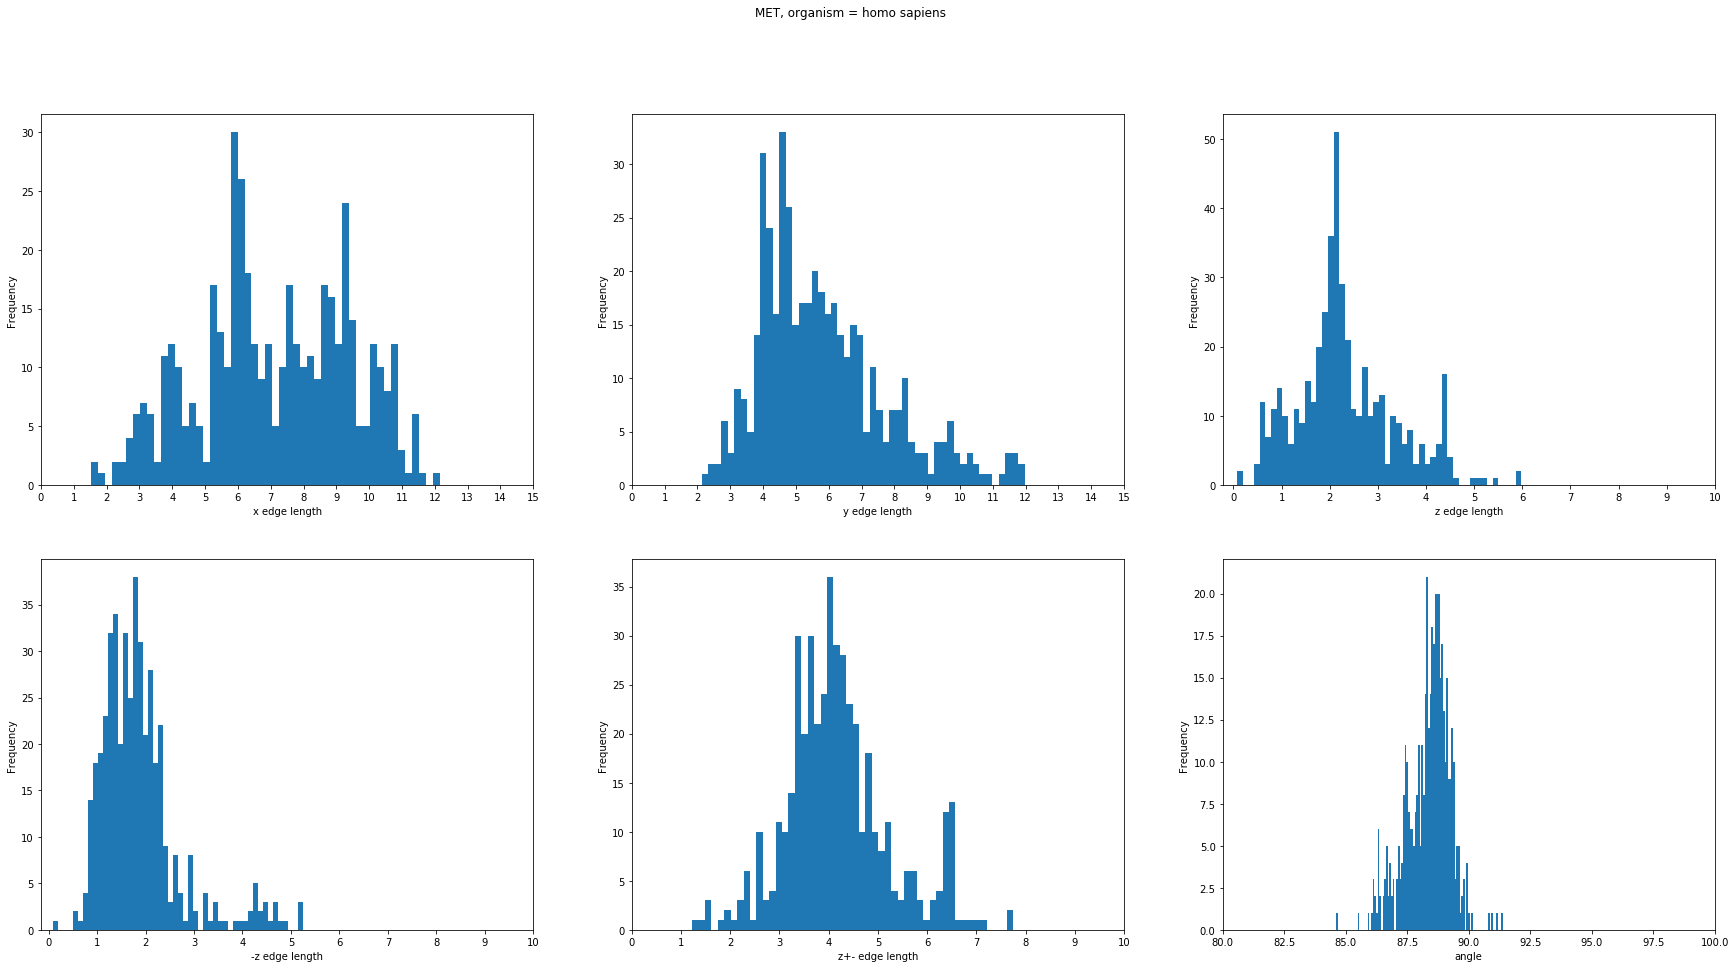

MET: mean of x sizes: 7.08, mean of y sizes: 5.81, mean of z sizes: 2.32
MET: max of x sizes: 12.14, max of y sizes: 11.97, max of z sizes: 5.98


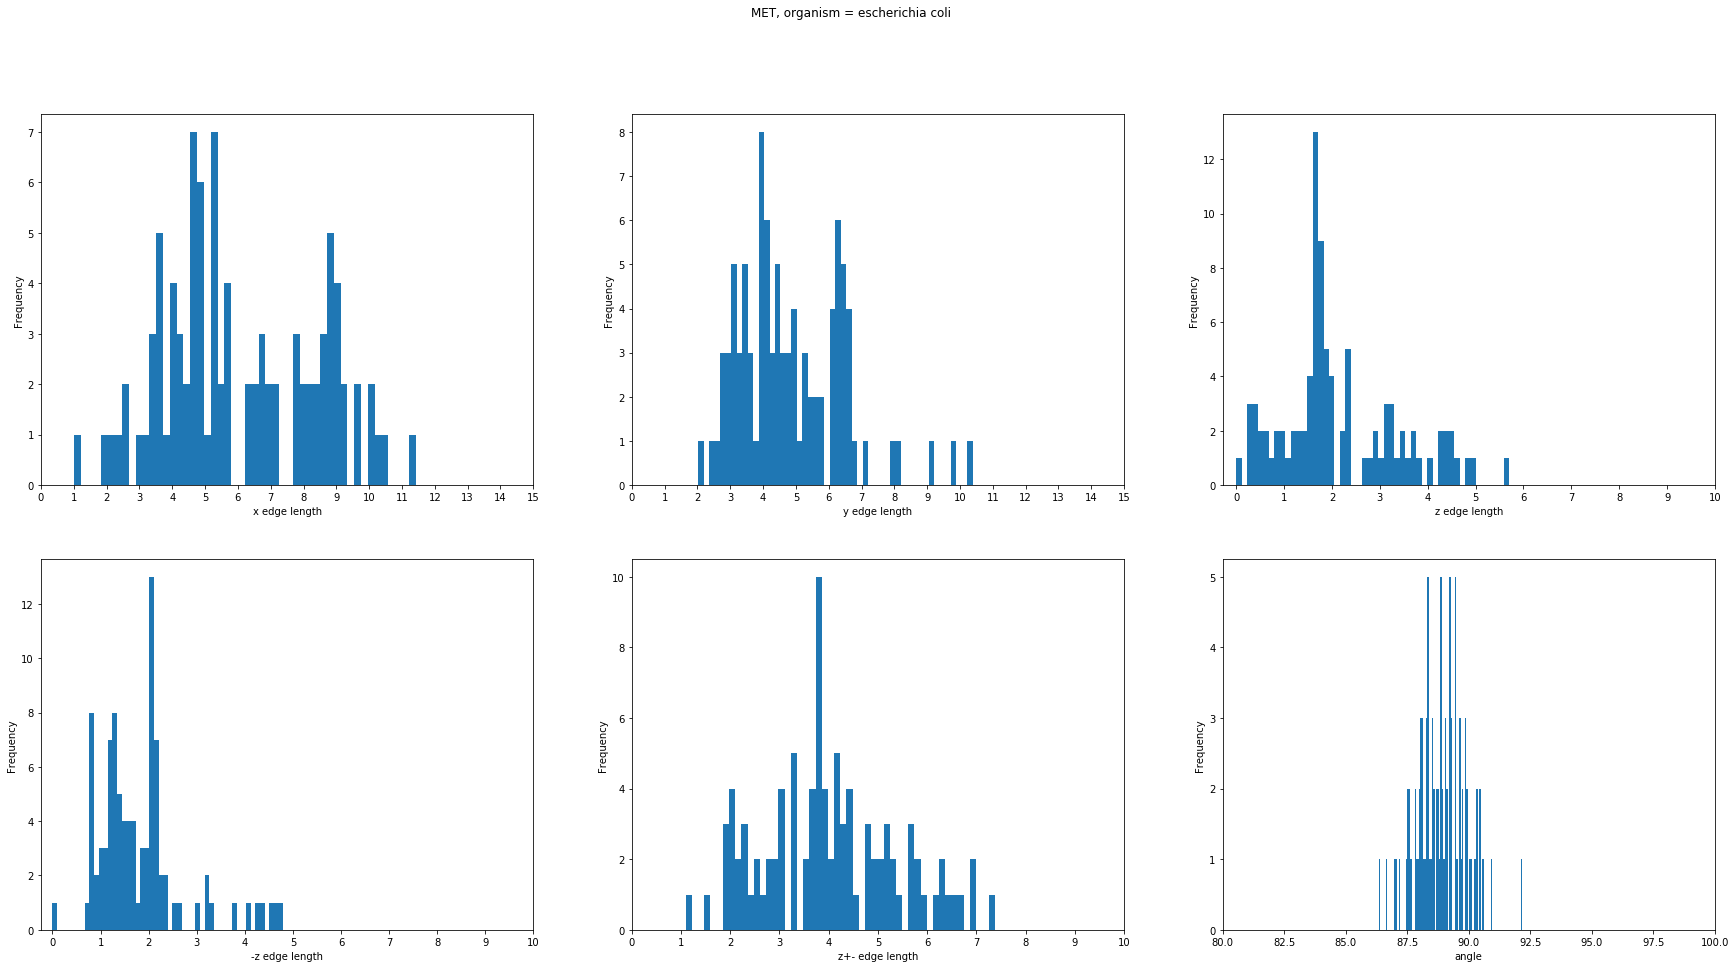

MET: mean of x sizes: 6.05, mean of y sizes: 4.86, mean of z sizes: 2.17
MET: max of x sizes: 11.42, max of y sizes: 10.39, max of z sizes: 5.7


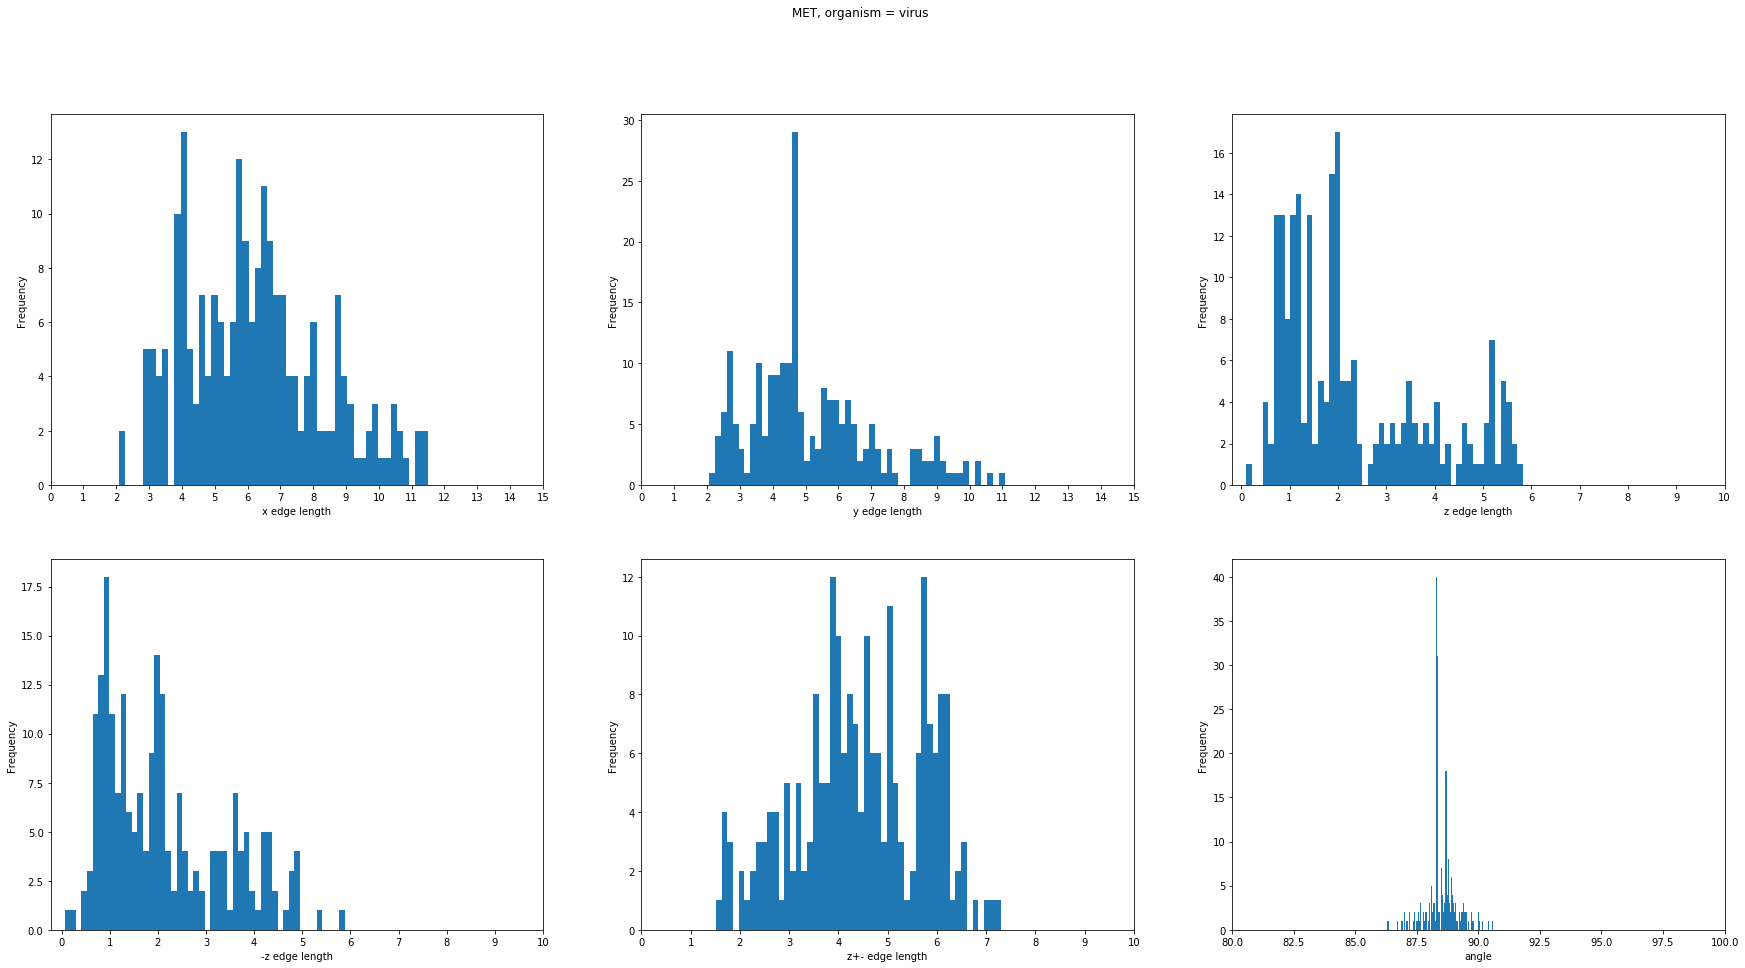

MET: mean of x sizes: 6.2, mean of y sizes: 5.21, mean of z sizes: 2.33
MET: max of x sizes: 11.49, max of y sizes: 11.07, max of z sizes: 5.82


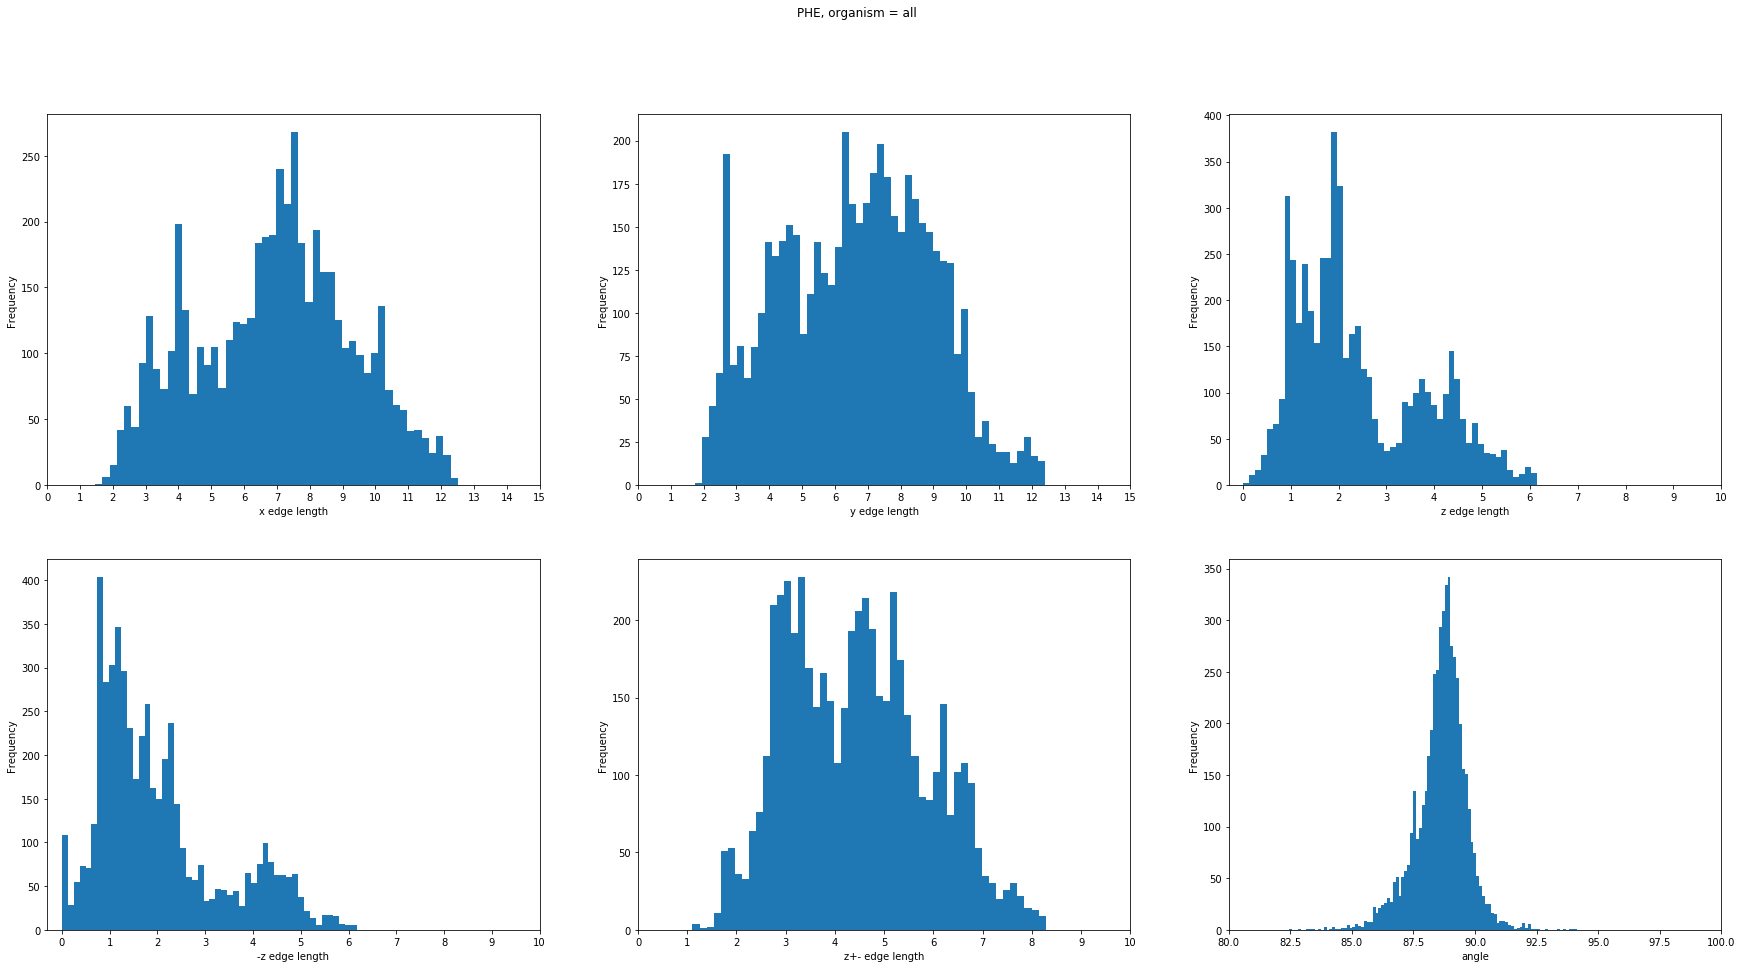

PHE: mean of x sizes: 6.92, mean of y sizes: 6.62, mean of z sizes: 2.43
PHE: max of x sizes: 12.51, max of y sizes: 12.41, max of z sizes: 6.14


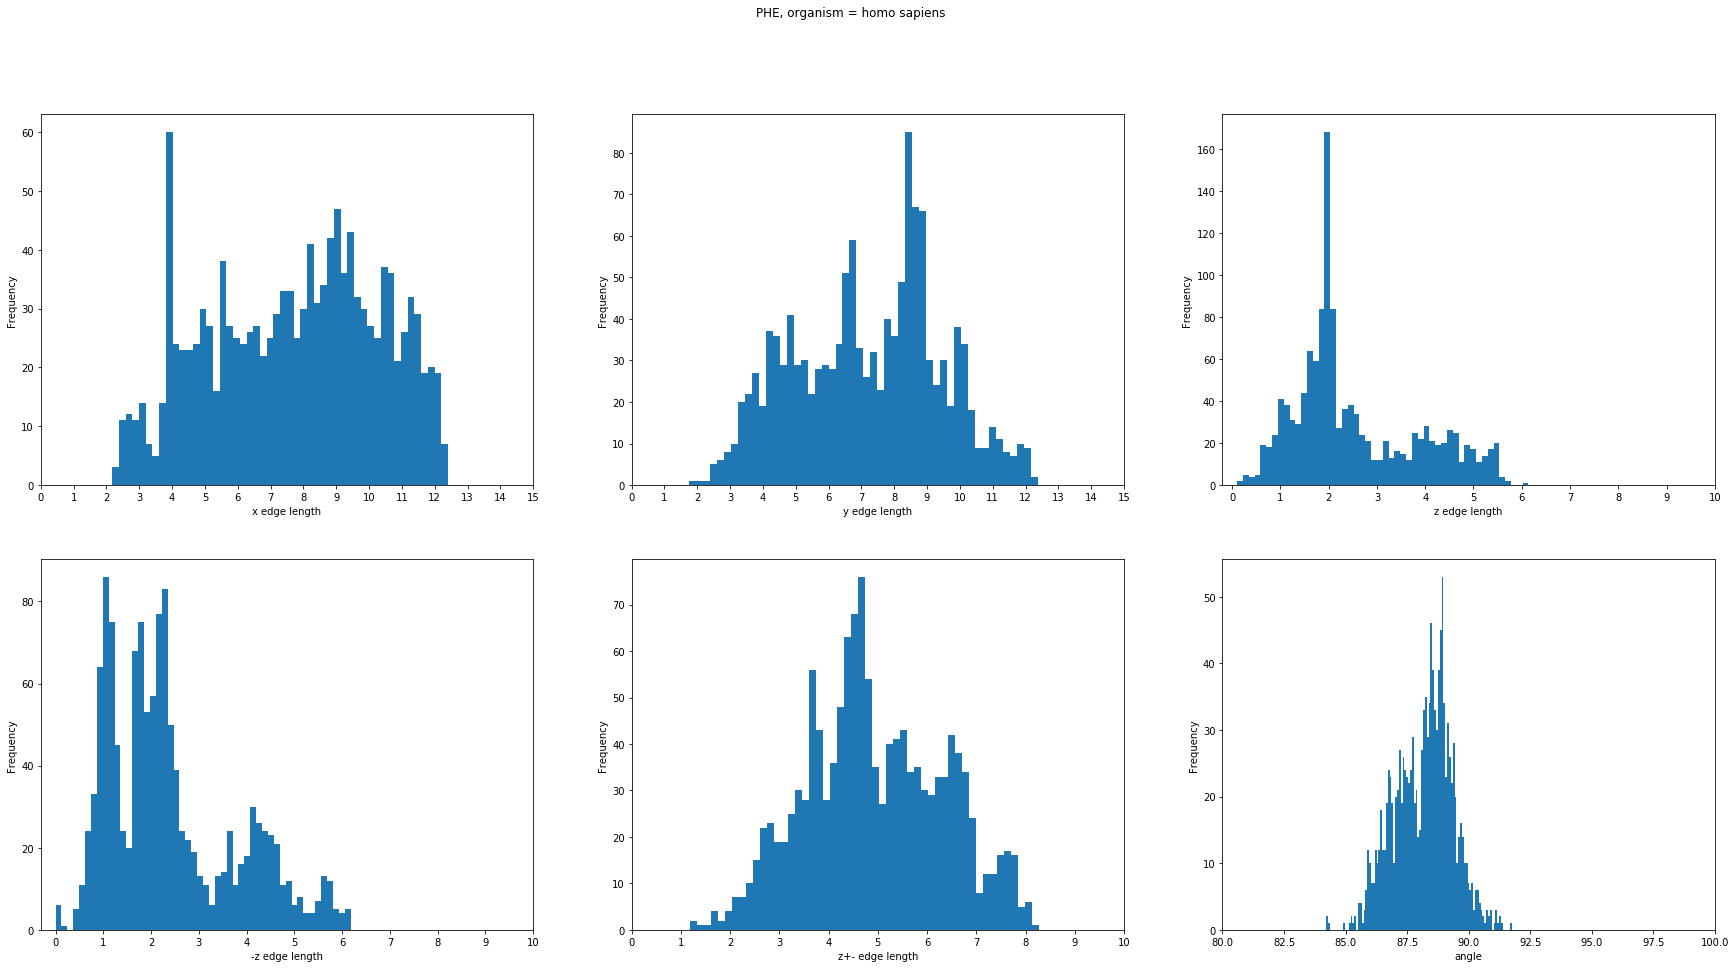

PHE: mean of x sizes: 7.71, mean of y sizes: 7.23, mean of z sizes: 2.55
PHE: max of x sizes: 12.41, max of y sizes: 12.37, max of z sizes: 6.14


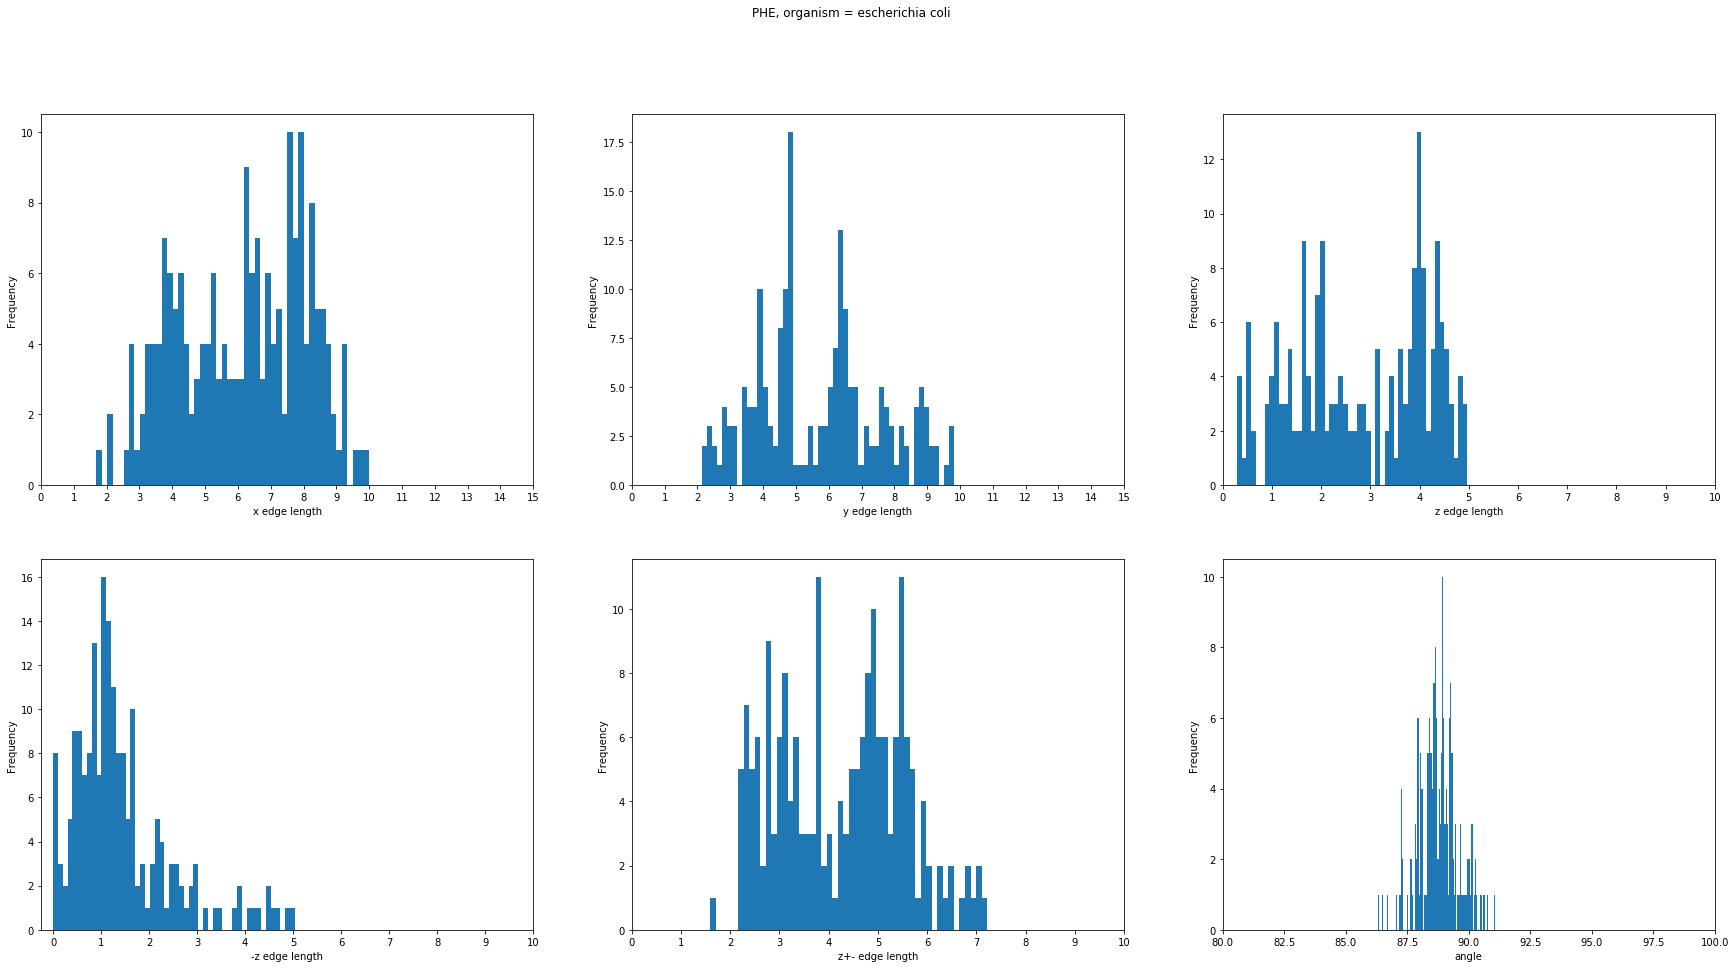

PHE: mean of x sizes: 6.14, mean of y sizes: 5.72, mean of z sizes: 2.83
PHE: max of x sizes: 10.0, max of y sizes: 9.83, max of z sizes: 4.97


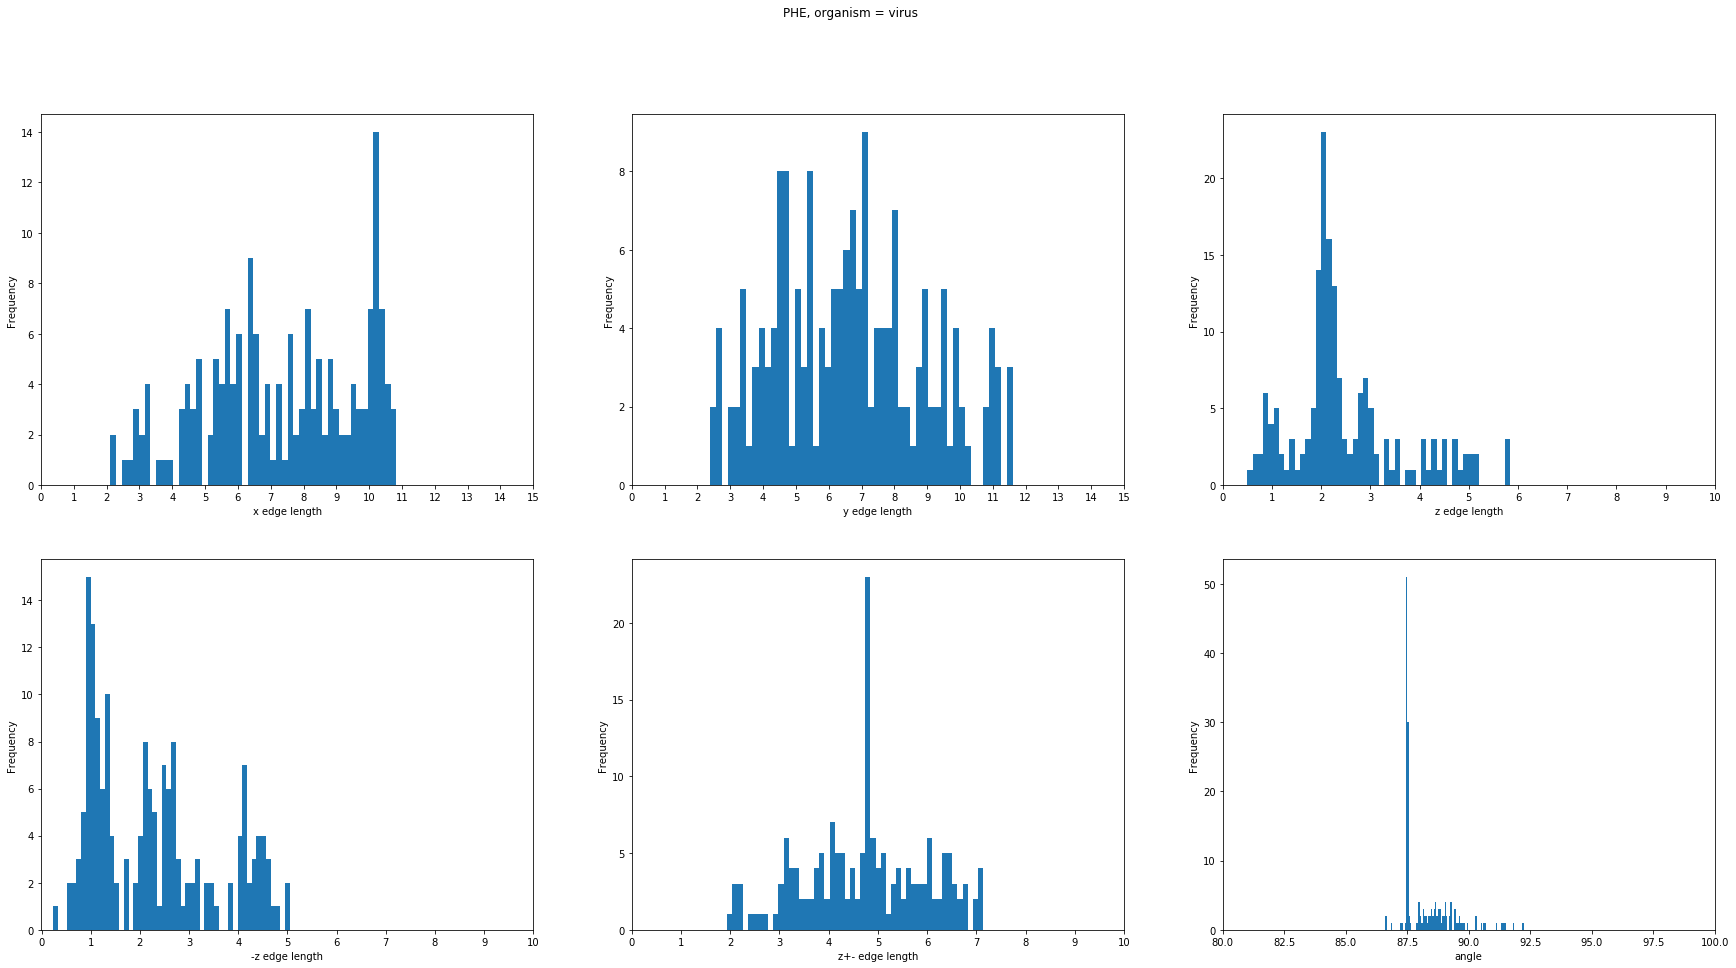

PHE: mean of x sizes: 7.32, mean of y sizes: 6.64, mean of z sizes: 2.49
PHE: max of x sizes: 10.83, max of y sizes: 11.62, max of z sizes: 5.84


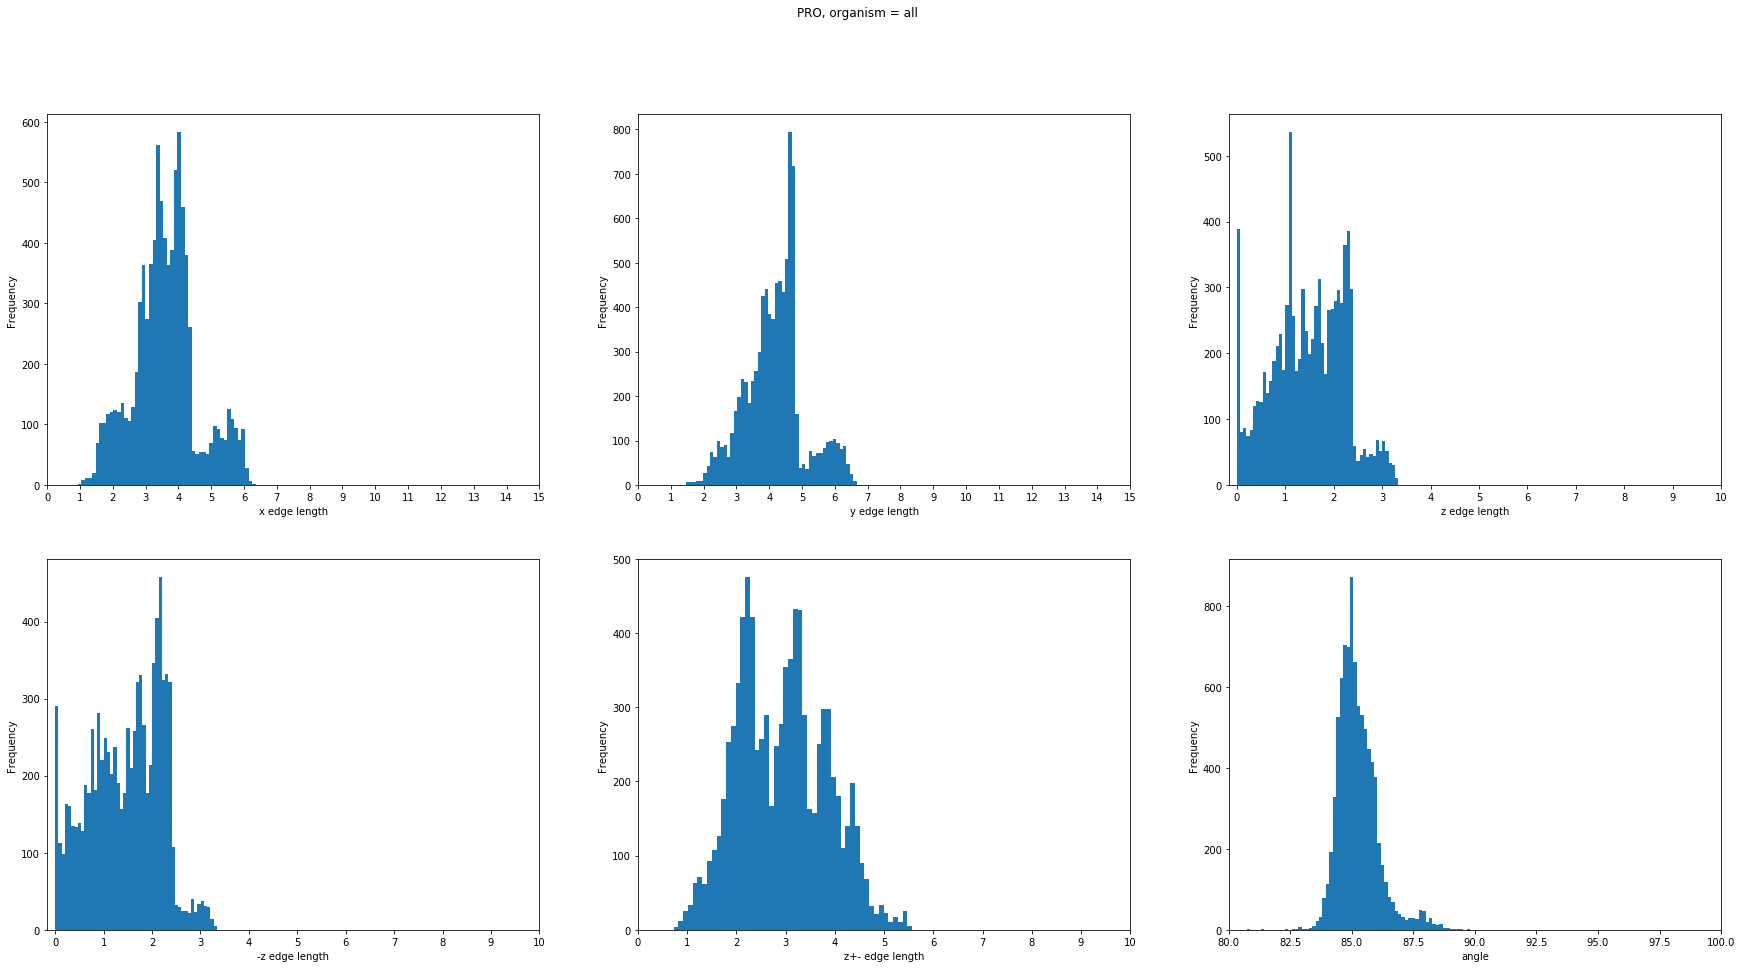

PRO: mean of x sizes: 3.61, mean of y sizes: 4.19, mean of z sizes: 1.48
PRO: max of x sizes: 6.36, max of y sizes: 6.66, max of z sizes: 3.34


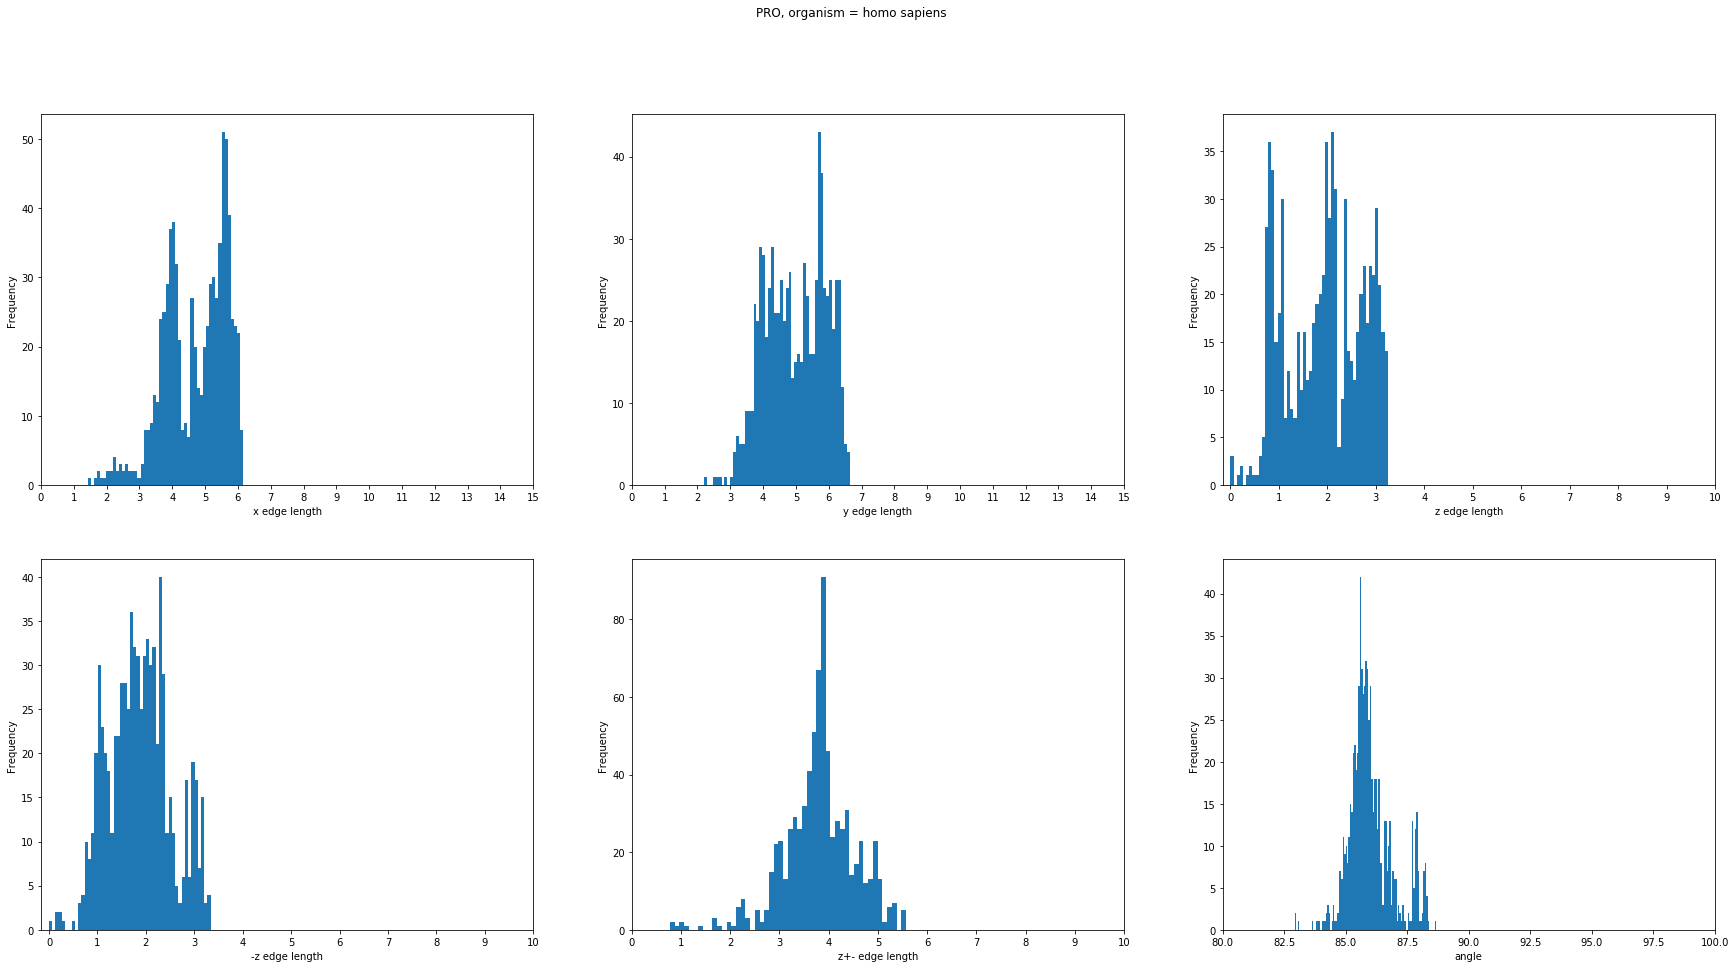

PRO: mean of x sizes: 4.71, mean of y sizes: 4.99, mean of z sizes: 1.94
PRO: max of x sizes: 6.17, max of y sizes: 6.64, max of z sizes: 3.25


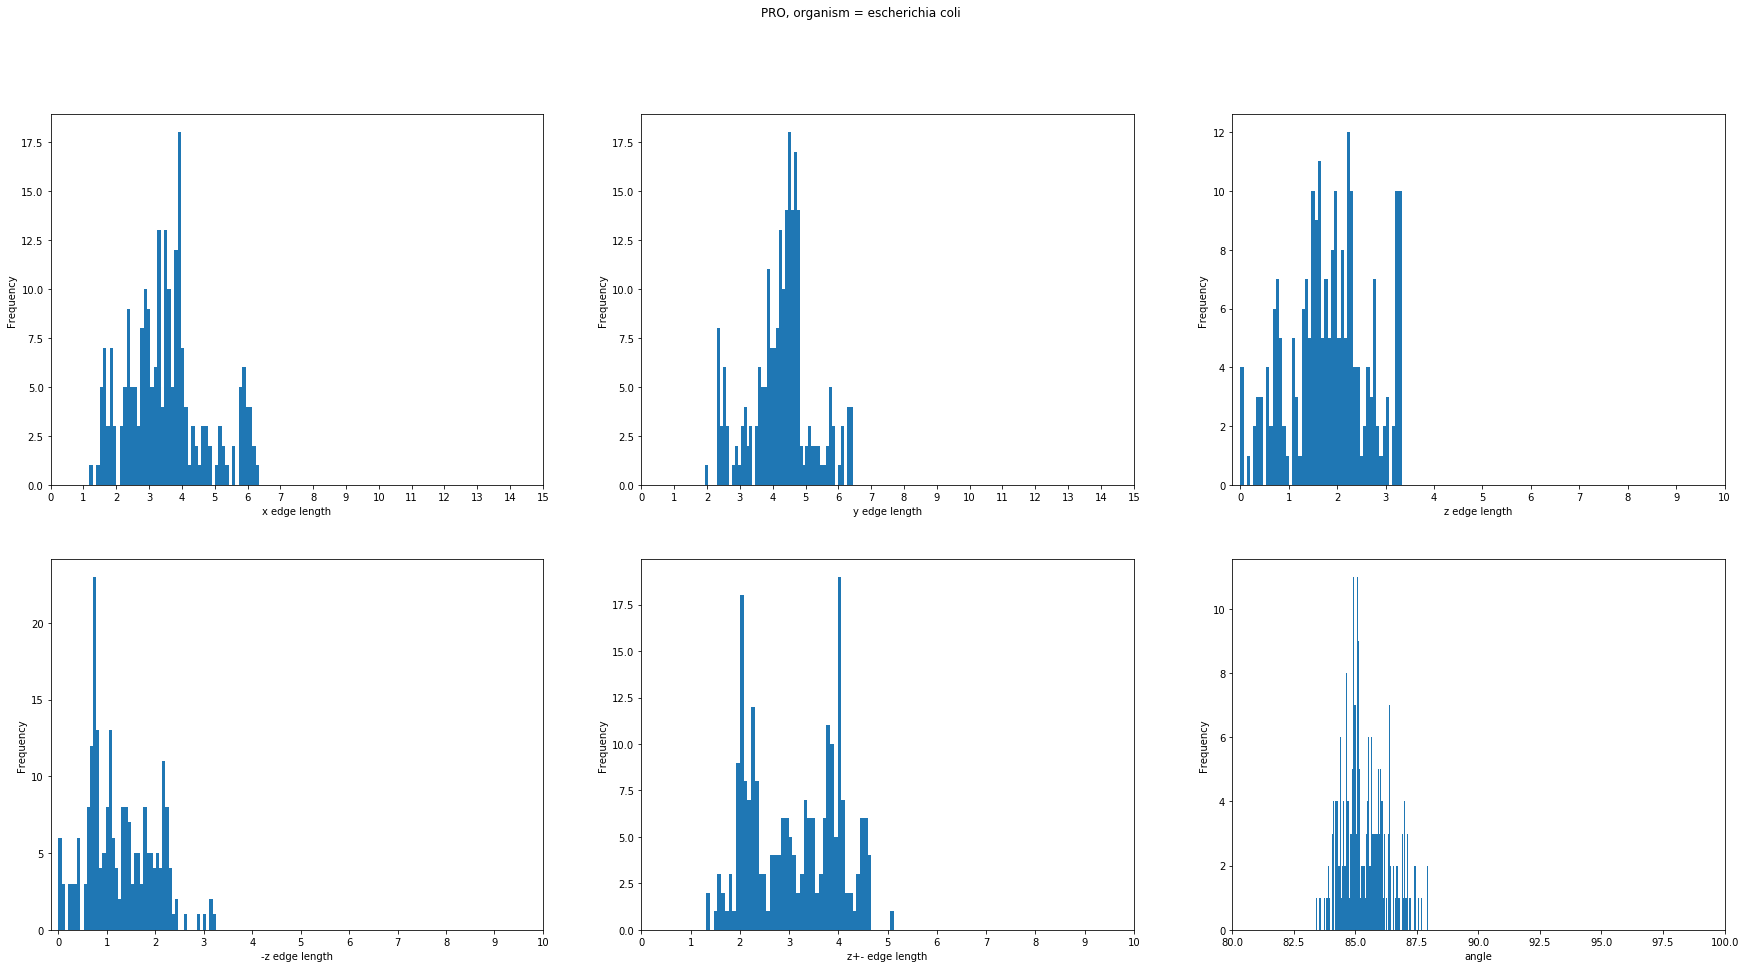

PRO: mean of x sizes: 3.51, mean of y sizes: 4.28, mean of z sizes: 1.84
PRO: max of x sizes: 6.36, max of y sizes: 6.44, max of z sizes: 3.34


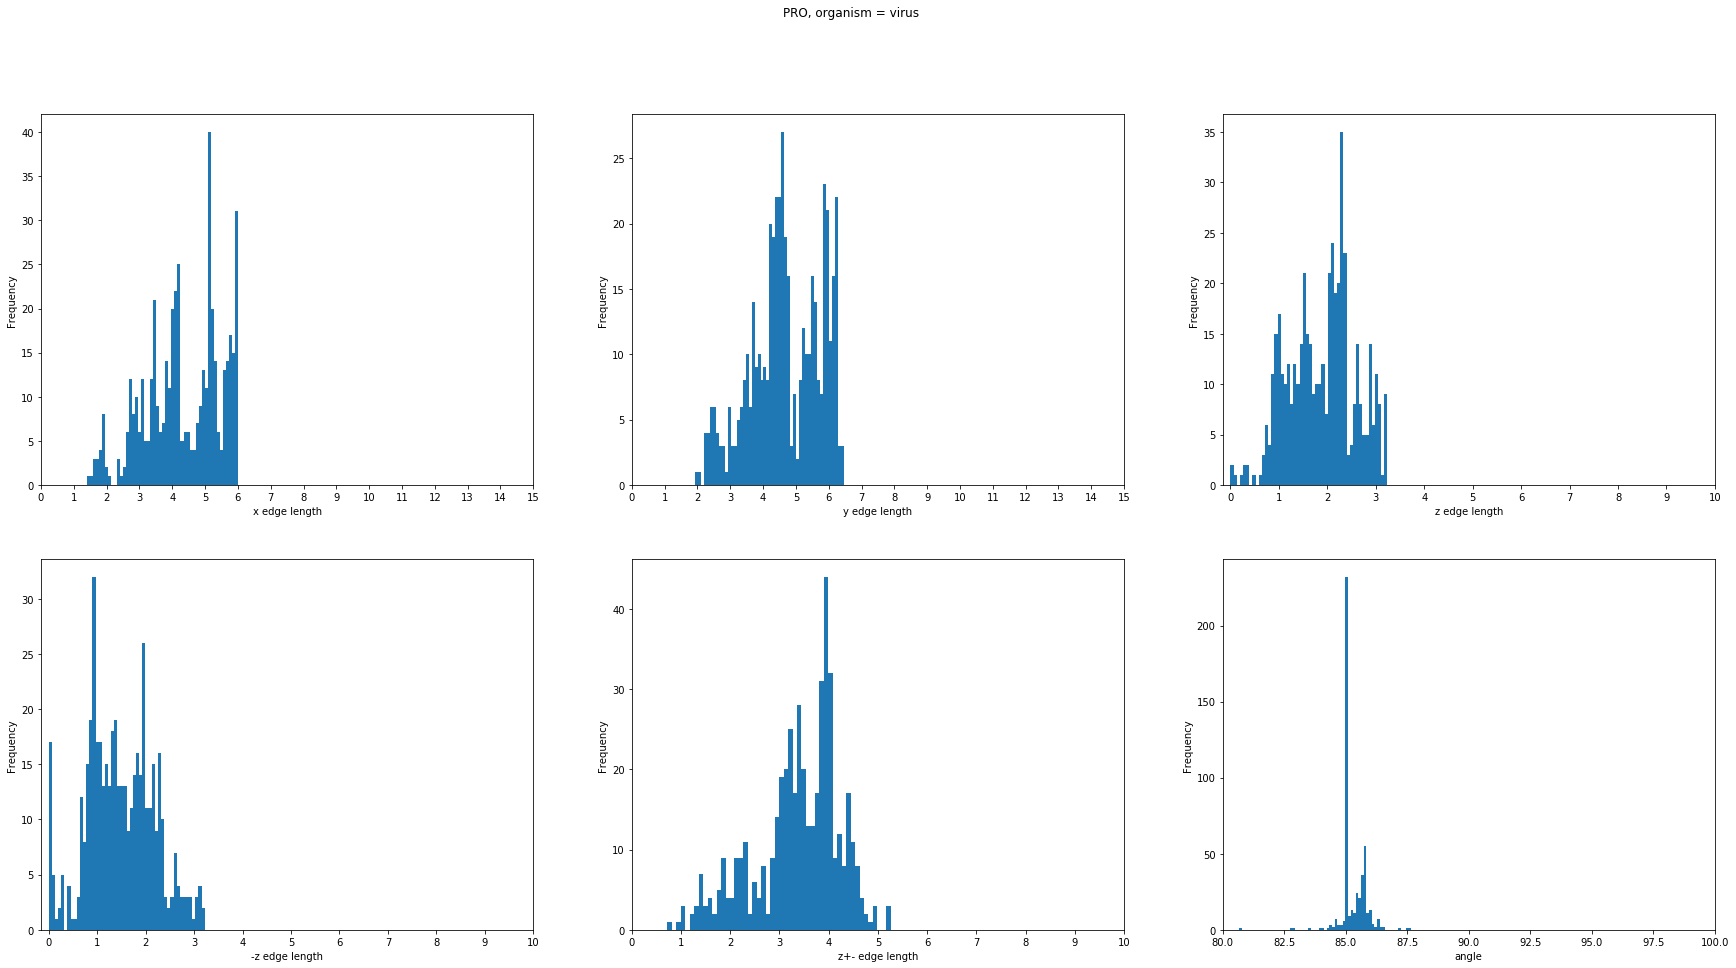

PRO: mean of x sizes: 4.34, mean of y sizes: 4.68, mean of z sizes: 1.89
PRO: max of x sizes: 6.0, max of y sizes: 6.46, max of z sizes: 3.24


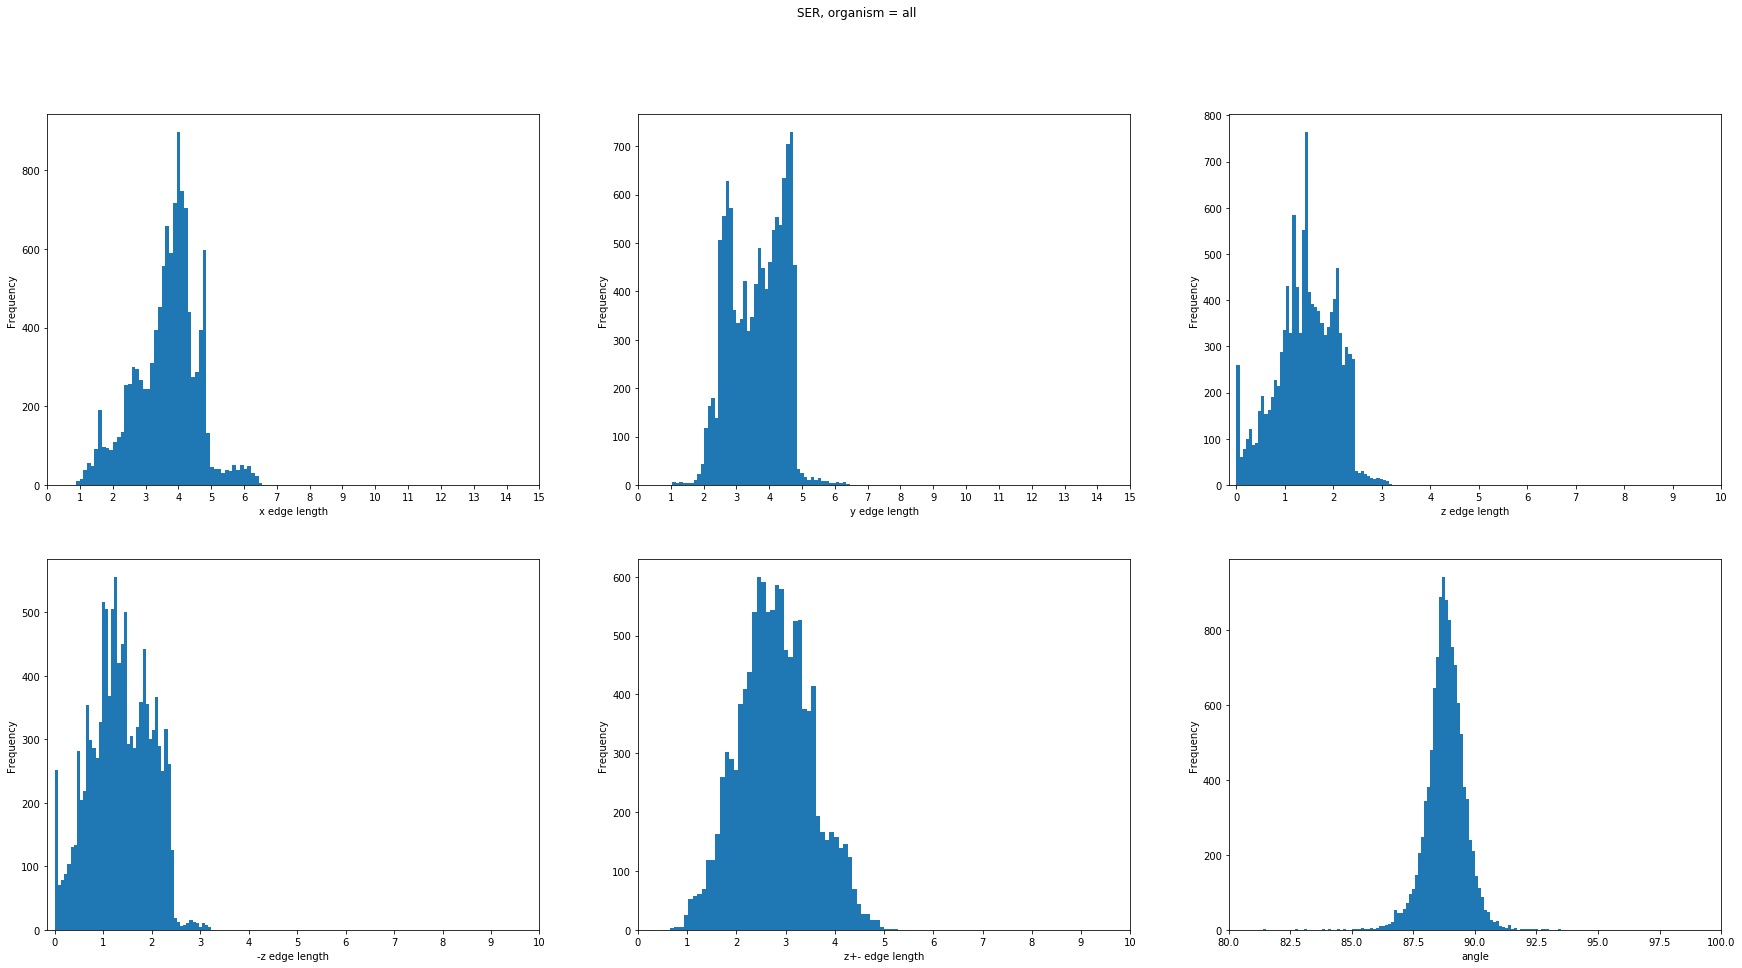

SER: mean of x sizes: 3.67, mean of y sizes: 3.64, mean of z sizes: 1.44
SER: max of x sizes: 6.56, max of y sizes: 6.46, max of z sizes: 3.21


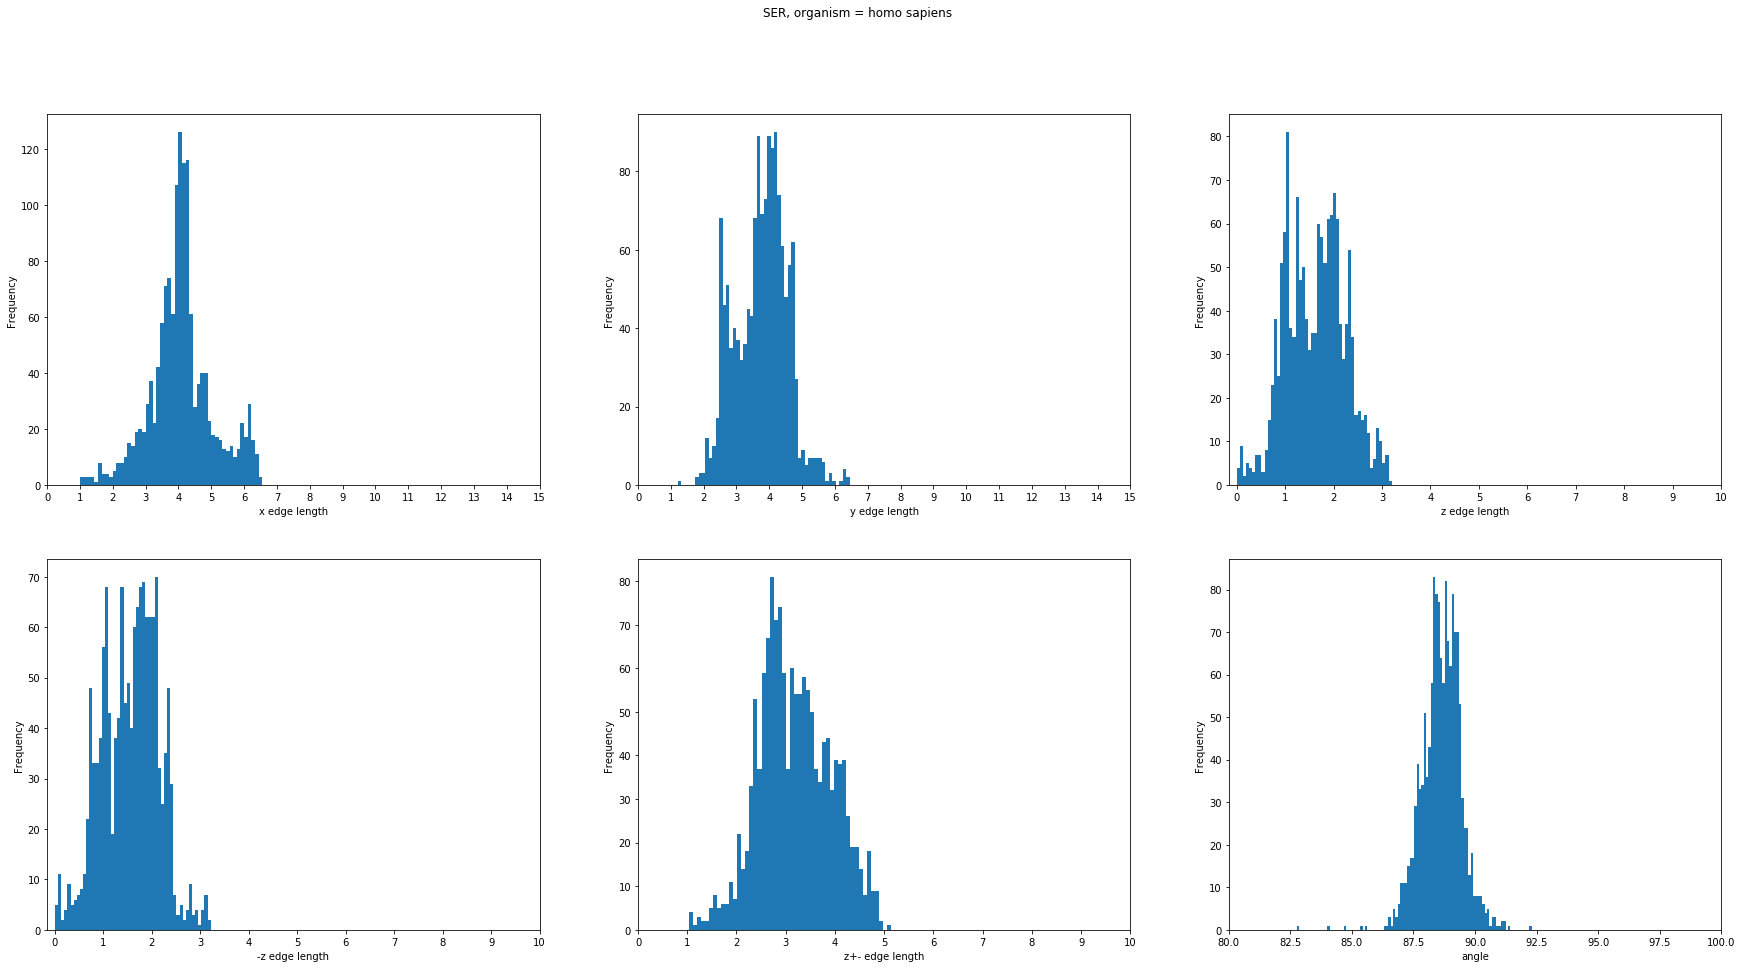

SER: mean of x sizes: 4.09, mean of y sizes: 3.77, mean of z sizes: 1.63
SER: max of x sizes: 6.56, max of y sizes: 6.44, max of z sizes: 3.2


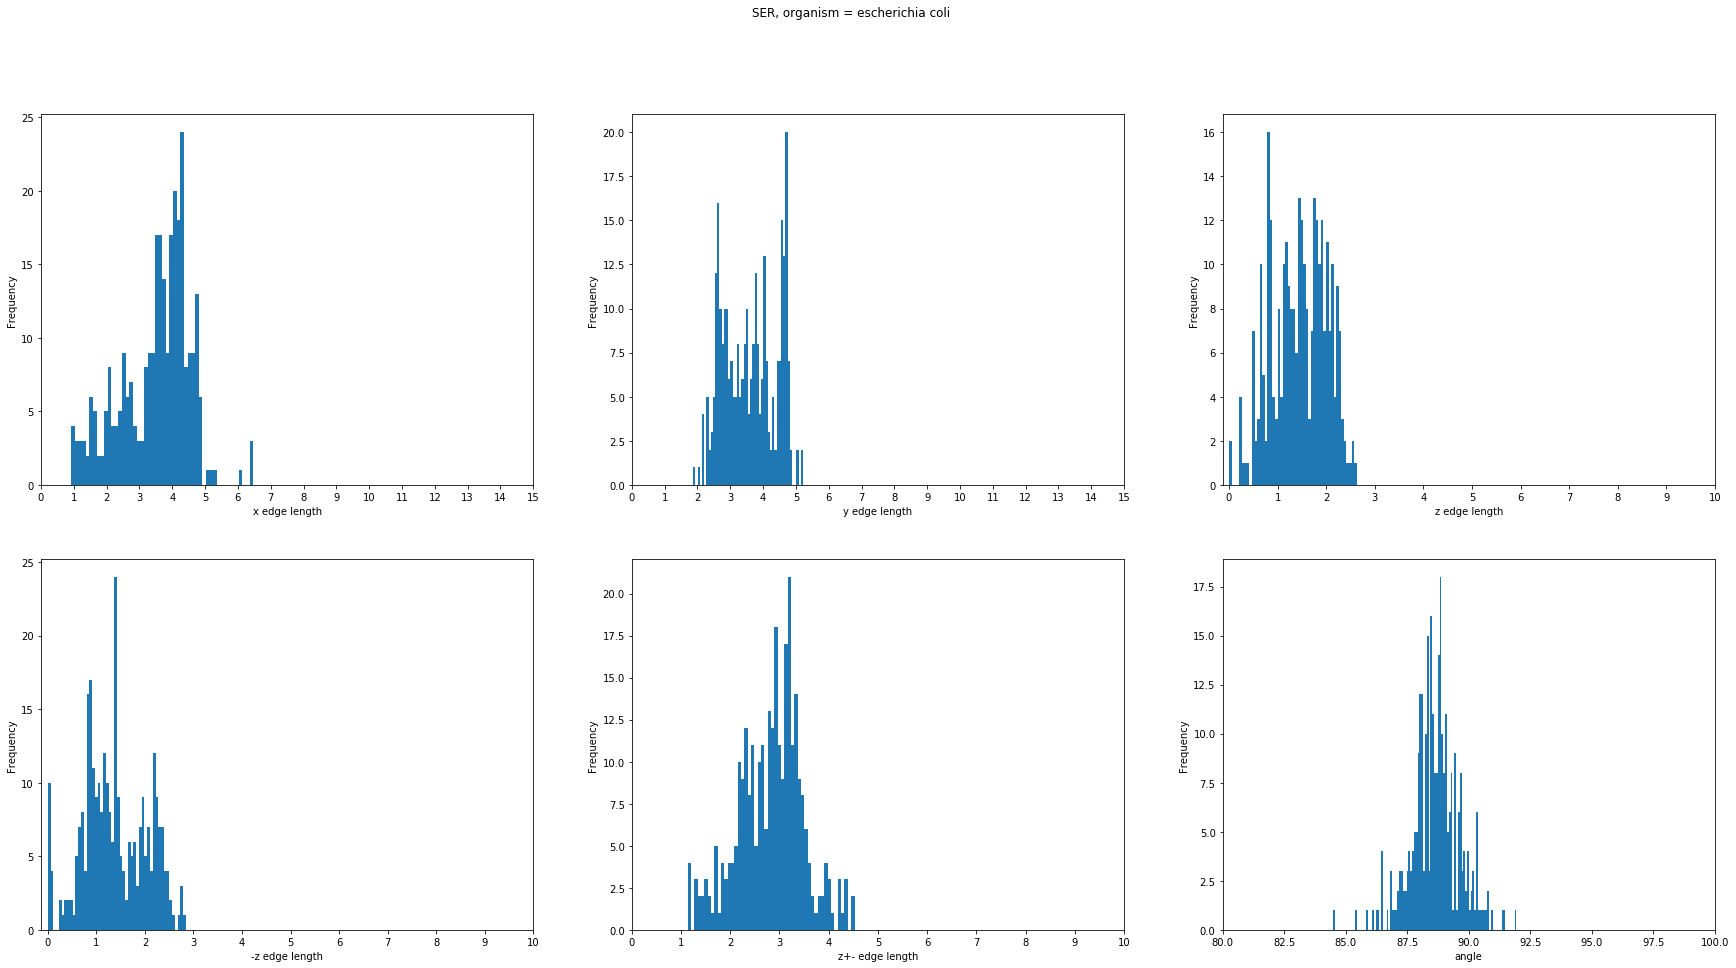

SER: mean of x sizes: 3.51, mean of y sizes: 3.6, mean of z sizes: 1.45
SER: max of x sizes: 6.47, max of y sizes: 5.21, max of z sizes: 2.63


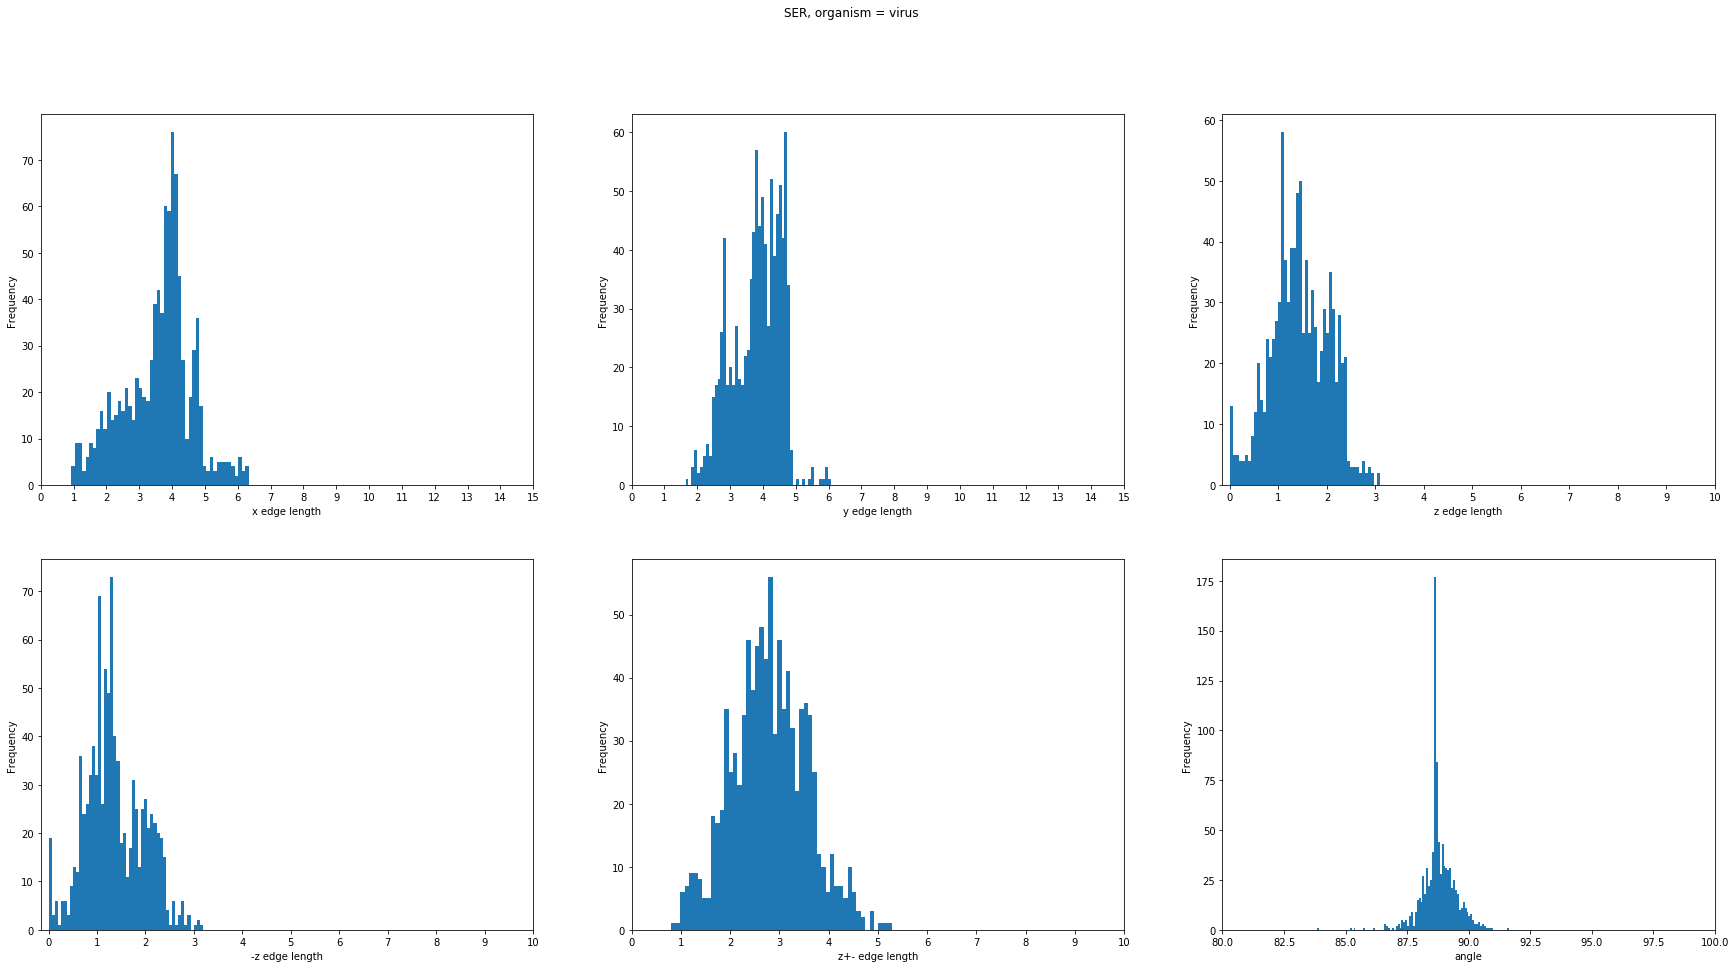

SER: mean of x sizes: 3.59, mean of y sizes: 3.82, mean of z sizes: 1.44
SER: max of x sizes: 6.34, max of y sizes: 6.07, max of z sizes: 3.1


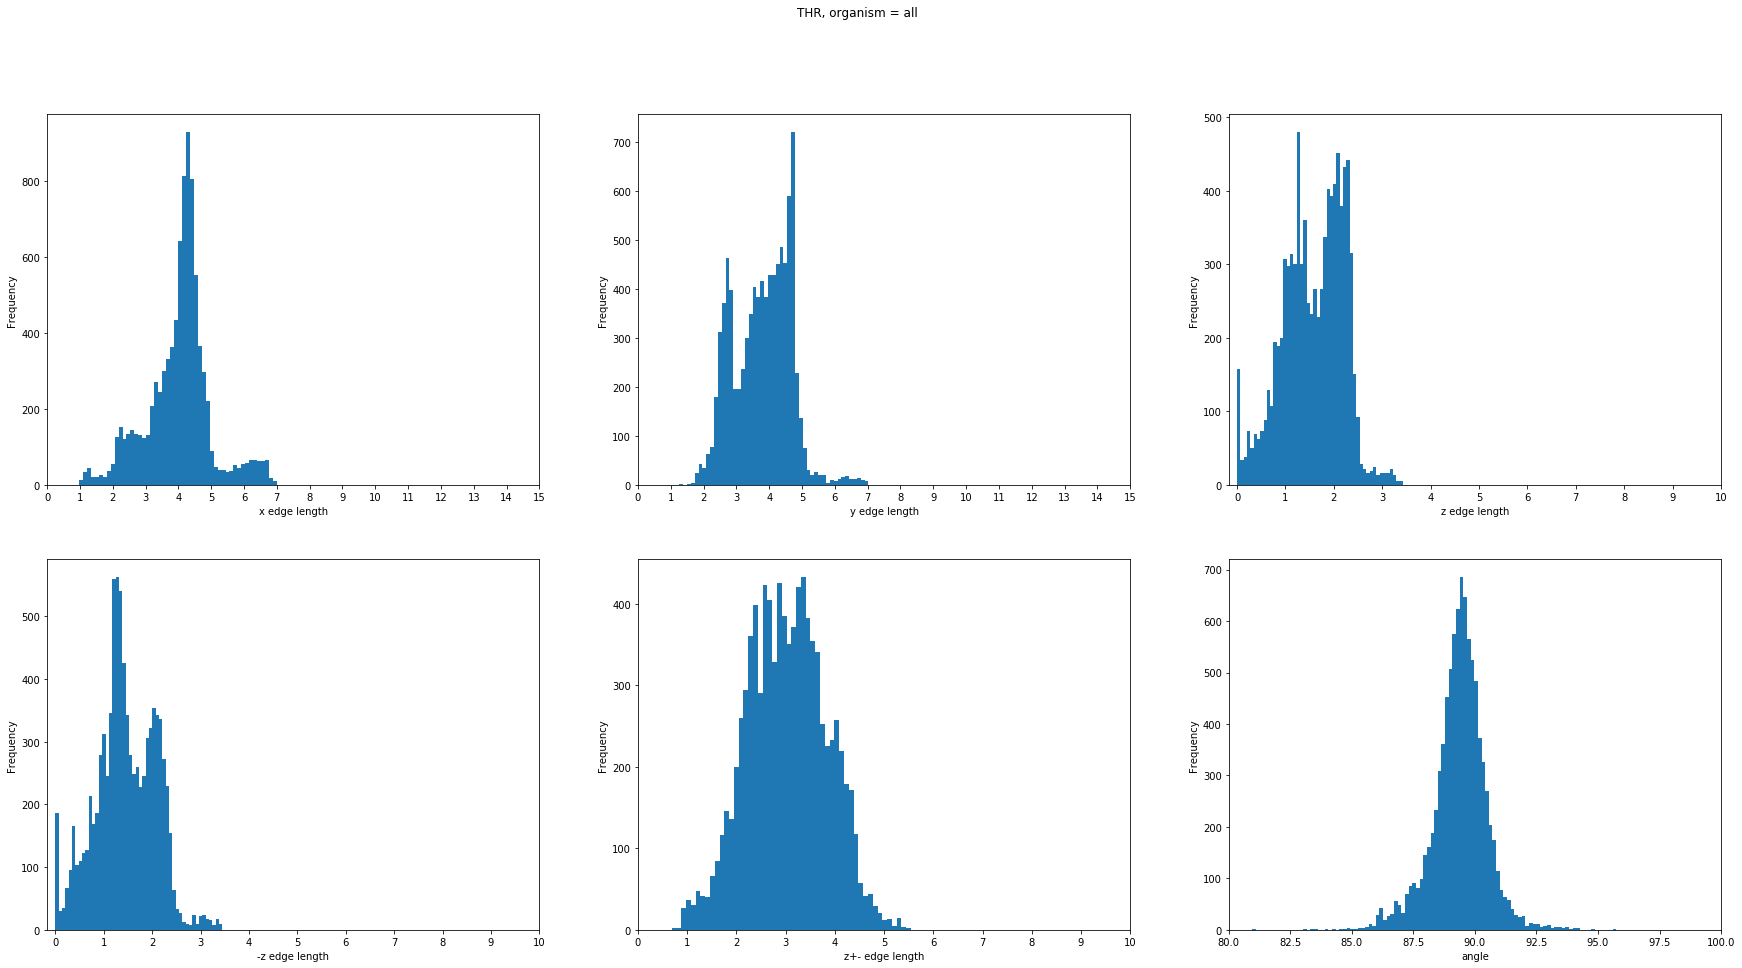

THR: mean of x sizes: 4.02, mean of y sizes: 3.79, mean of z sizes: 1.58
THR: max of x sizes: 7.01, max of y sizes: 7.02, max of z sizes: 3.42


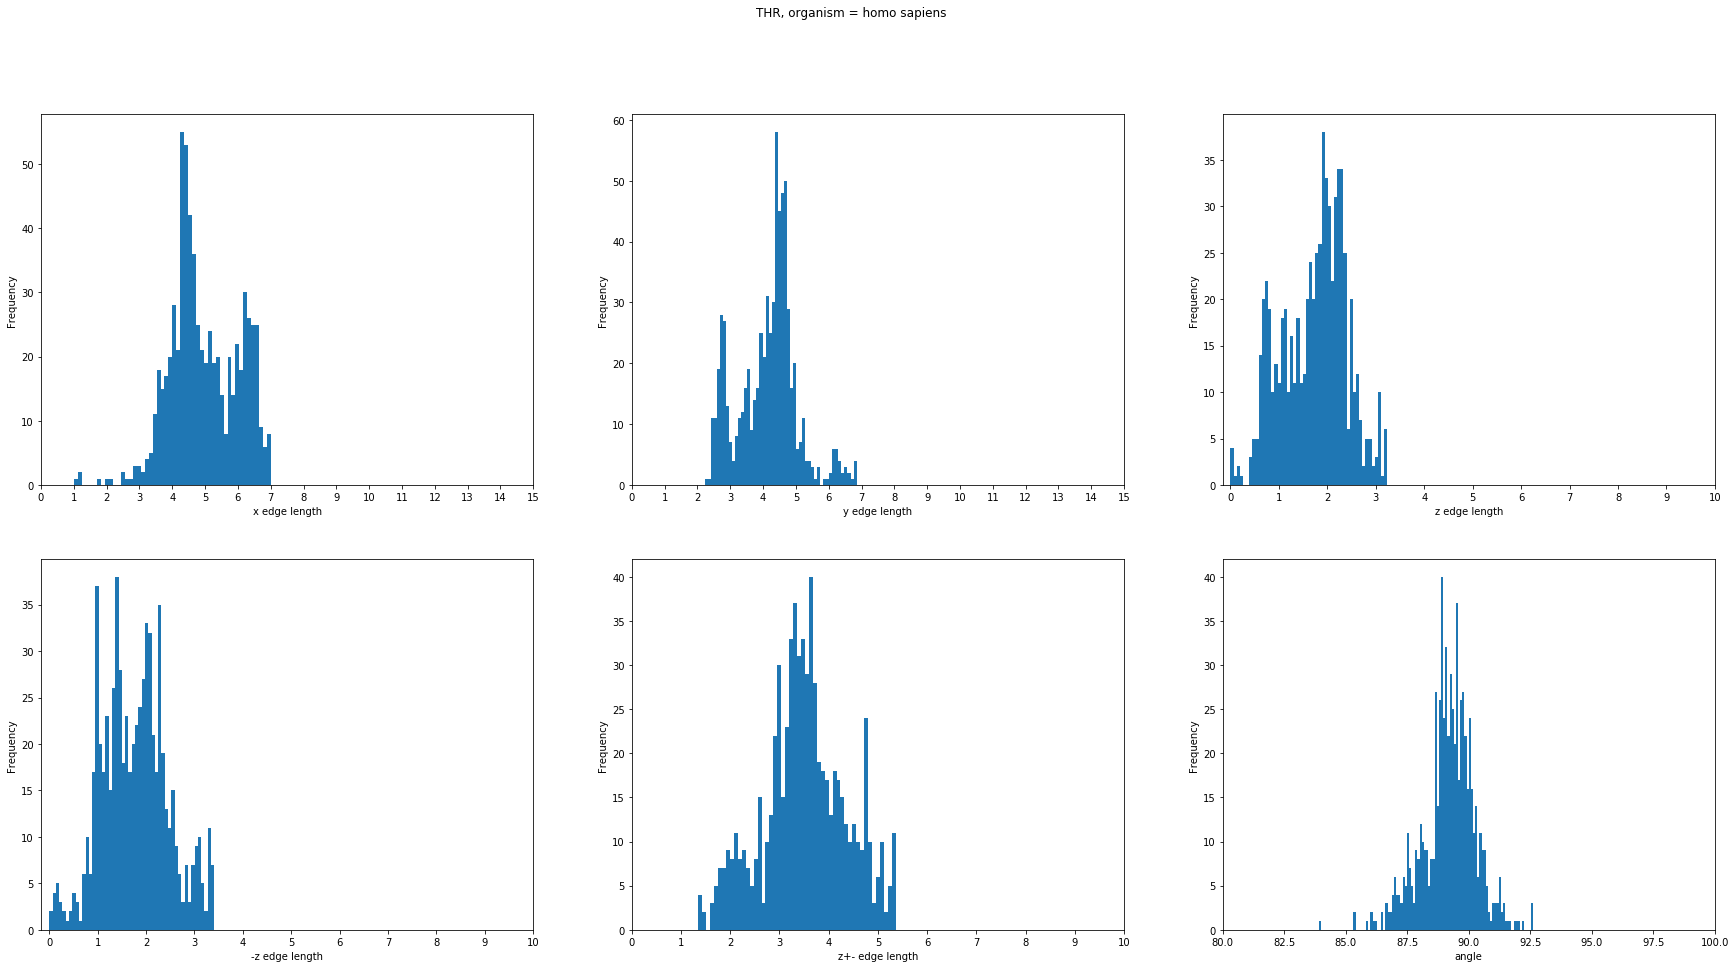

THR: mean of x sizes: 4.96, mean of y sizes: 4.15, mean of z sizes: 1.73
THR: max of x sizes: 7.01, max of y sizes: 6.85, max of z sizes: 3.24


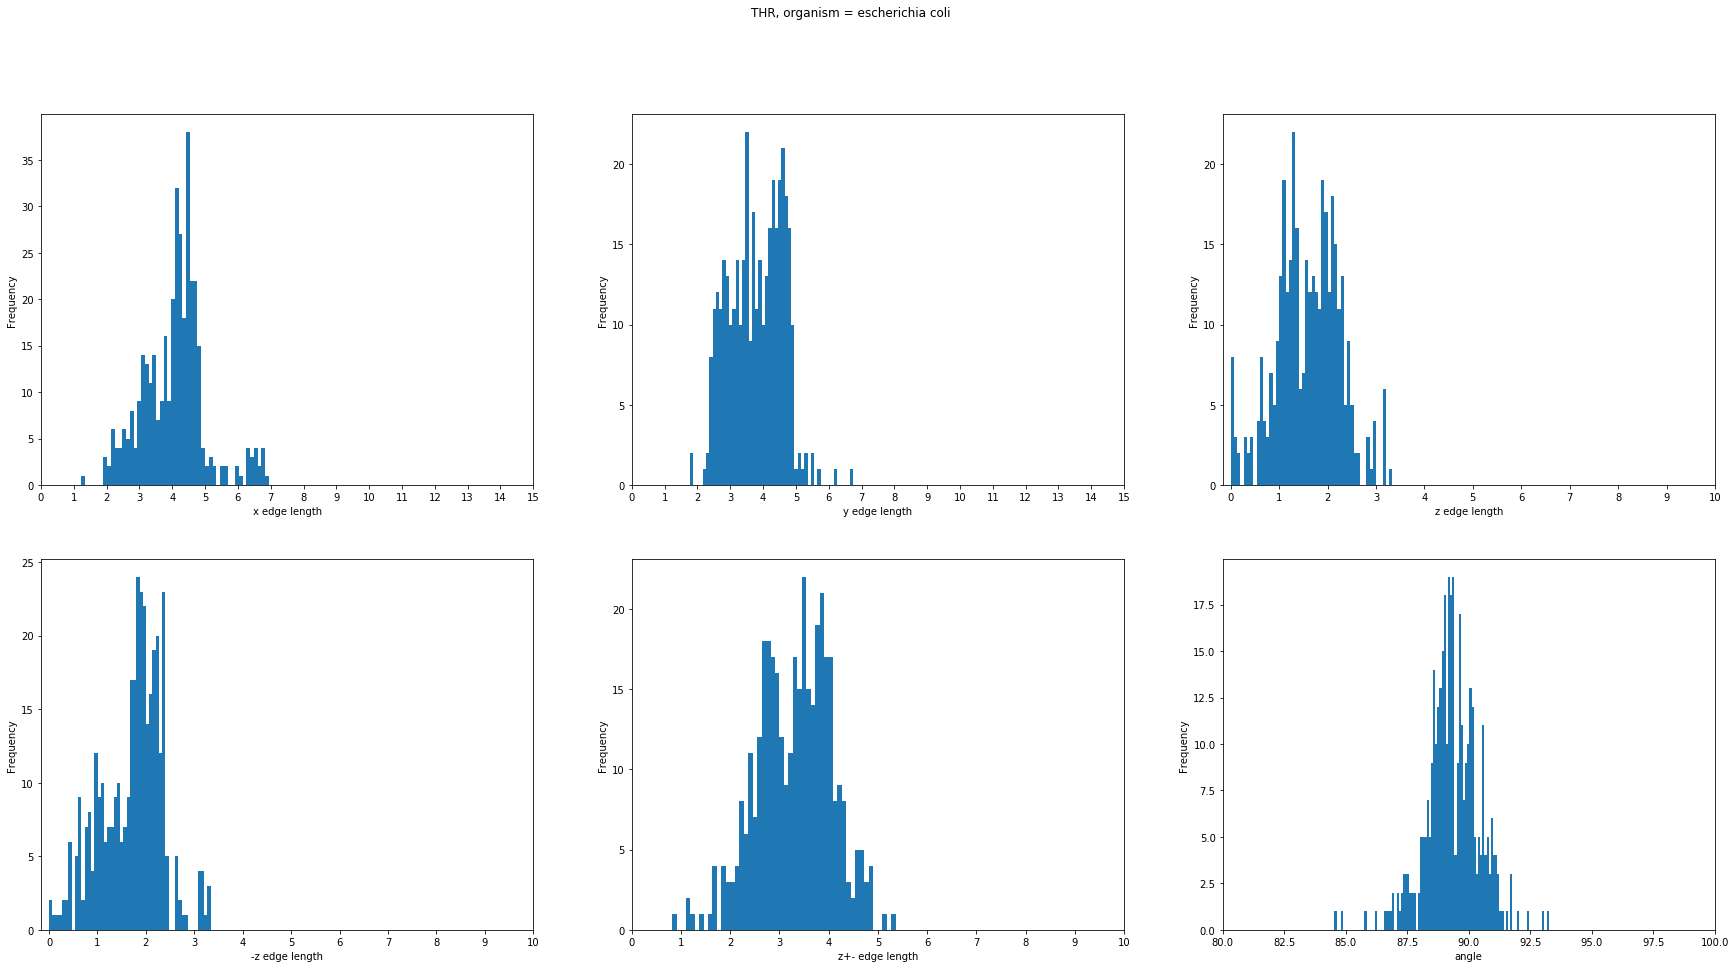

THR: mean of x sizes: 4.07, mean of y sizes: 3.79, mean of z sizes: 1.59
THR: max of x sizes: 6.95, max of y sizes: 6.75, max of z sizes: 3.34


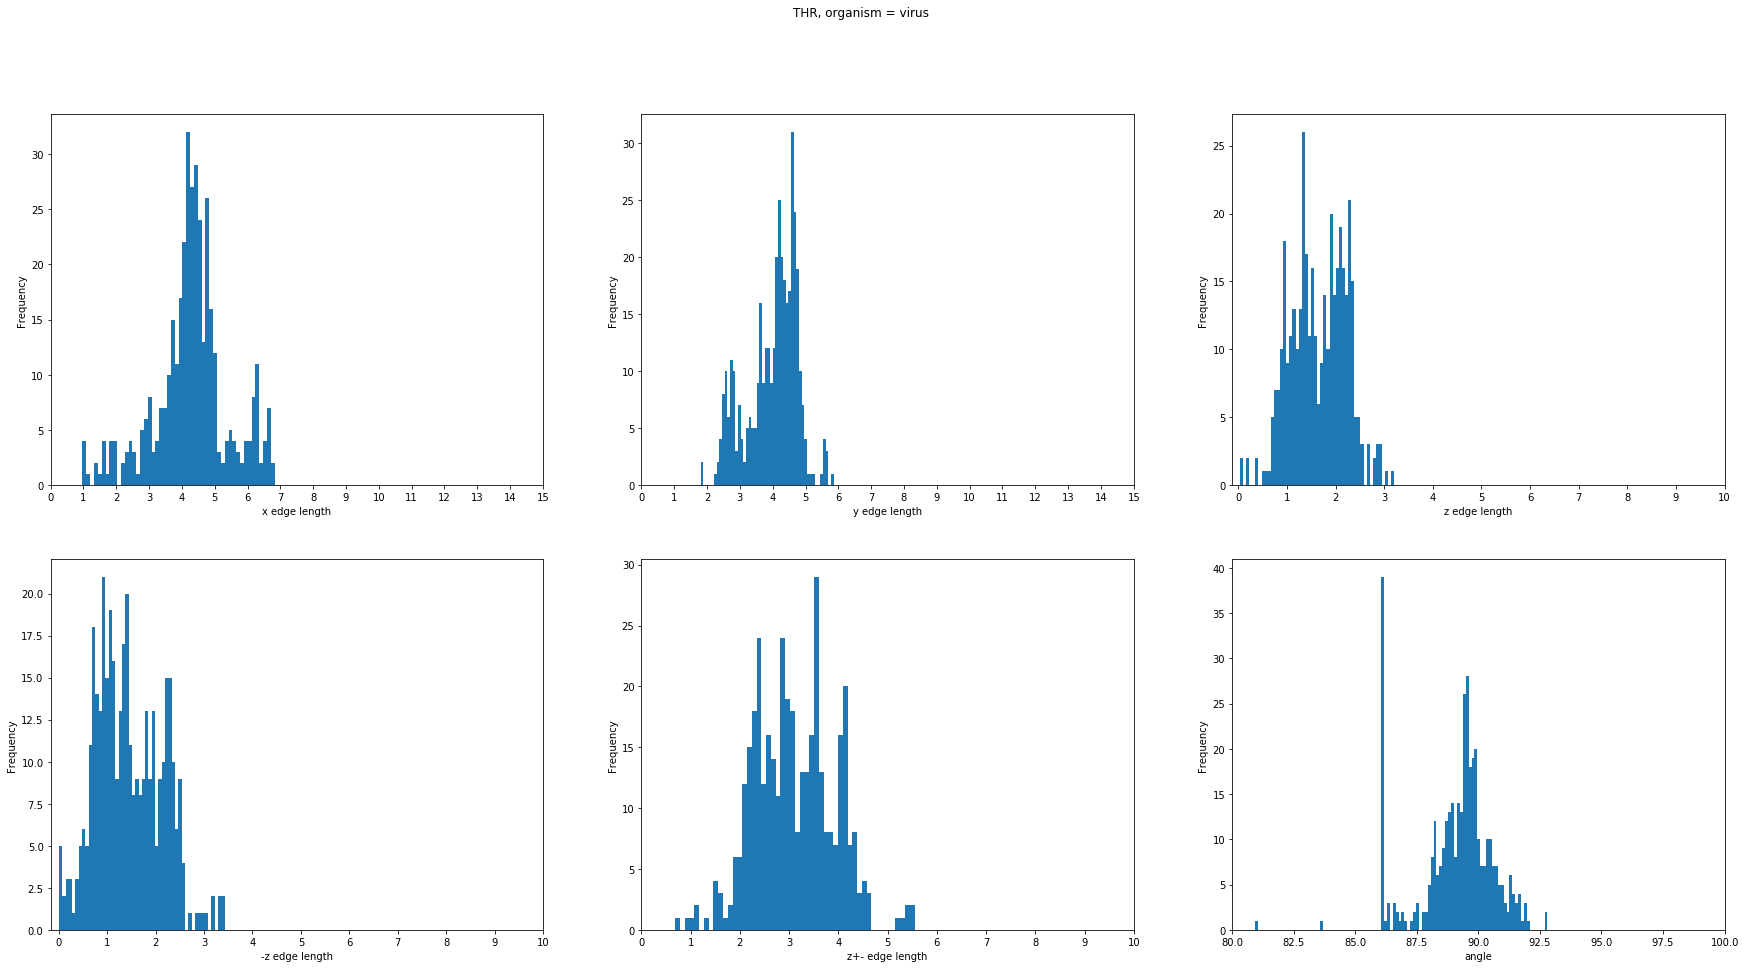

THR: mean of x sizes: 4.29, mean of y sizes: 4.0, mean of z sizes: 1.65
THR: max of x sizes: 6.83, max of y sizes: 5.86, max of z sizes: 3.21


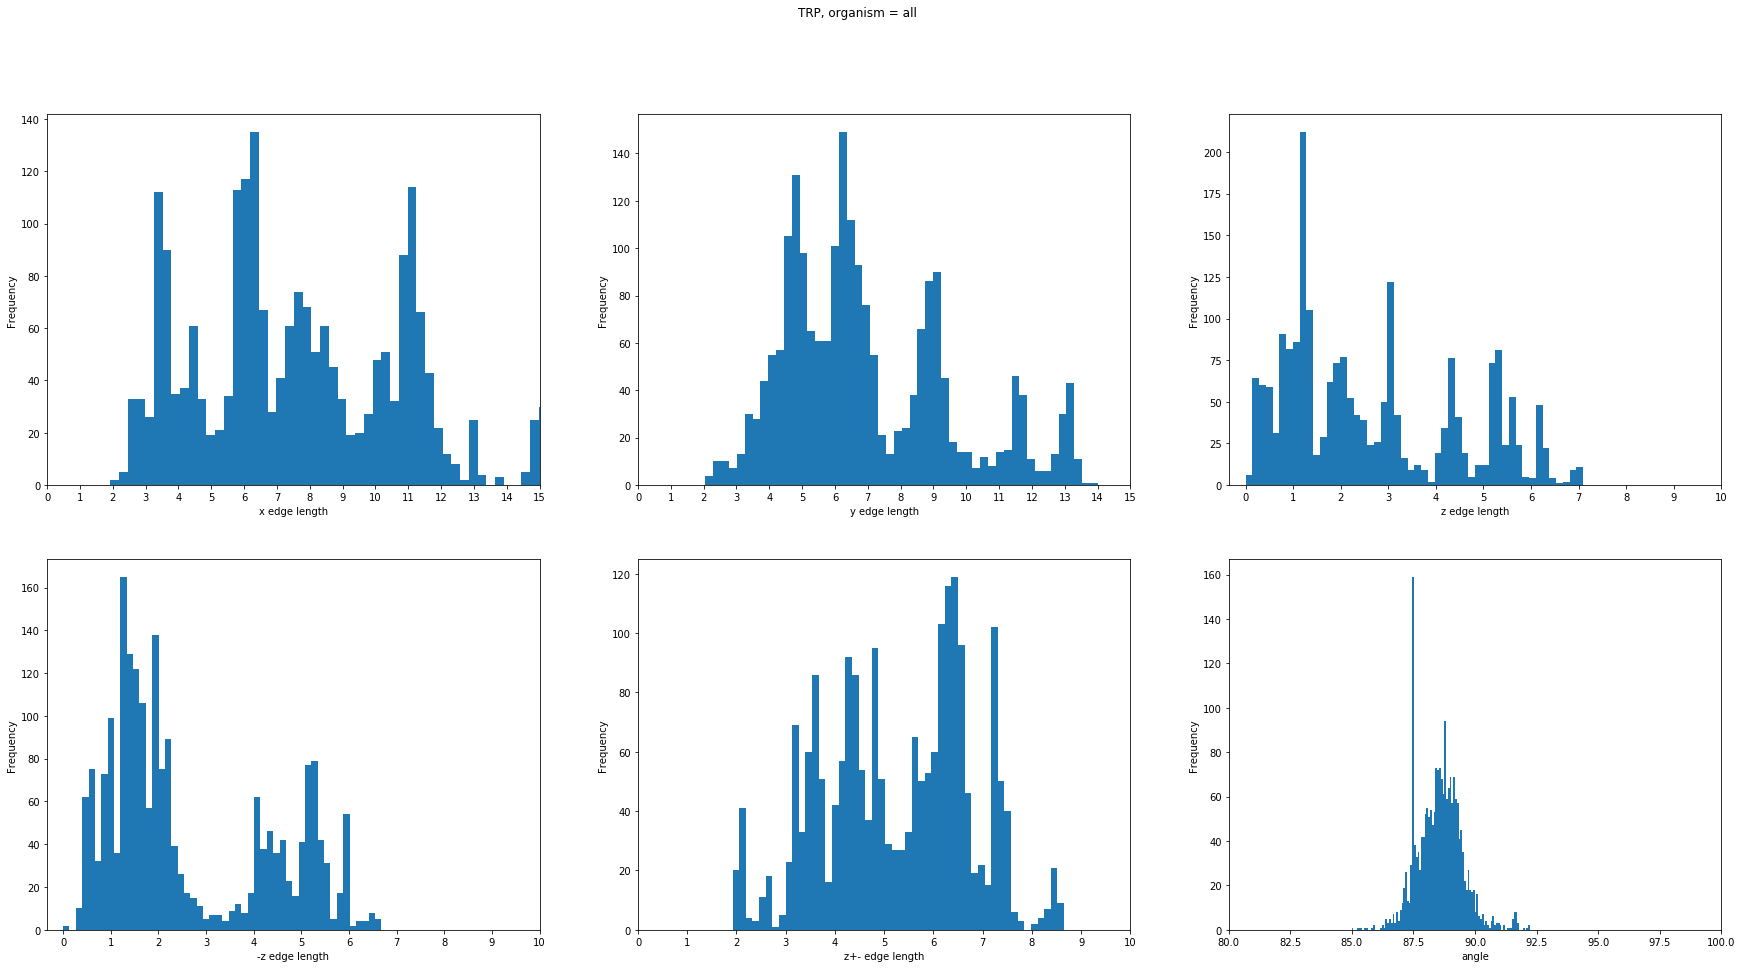

TRP: mean of x sizes: 7.56, mean of y sizes: 6.99, mean of z sizes: 2.64
TRP: max of x sizes: 15.25, max of y sizes: 14.01, max of z sizes: 7.1


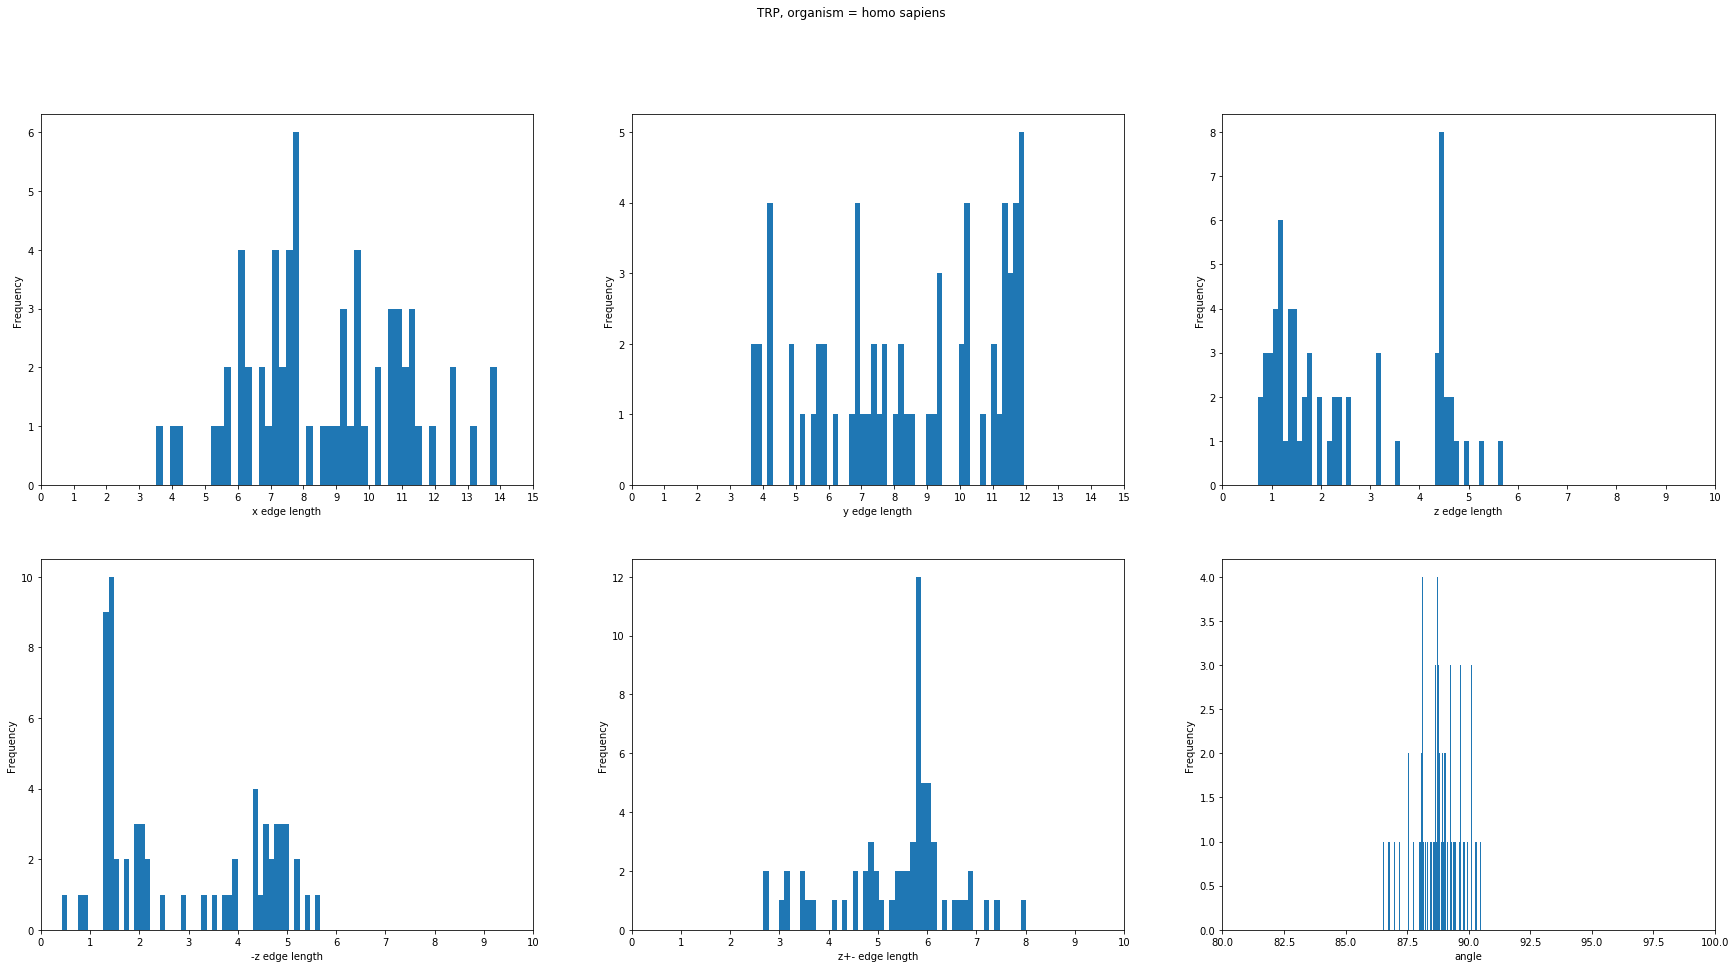

TRP: mean of x sizes: 8.66, mean of y sizes: 8.41, mean of z sizes: 2.5
TRP: max of x sizes: 13.91, max of y sizes: 11.96, max of z sizes: 5.7


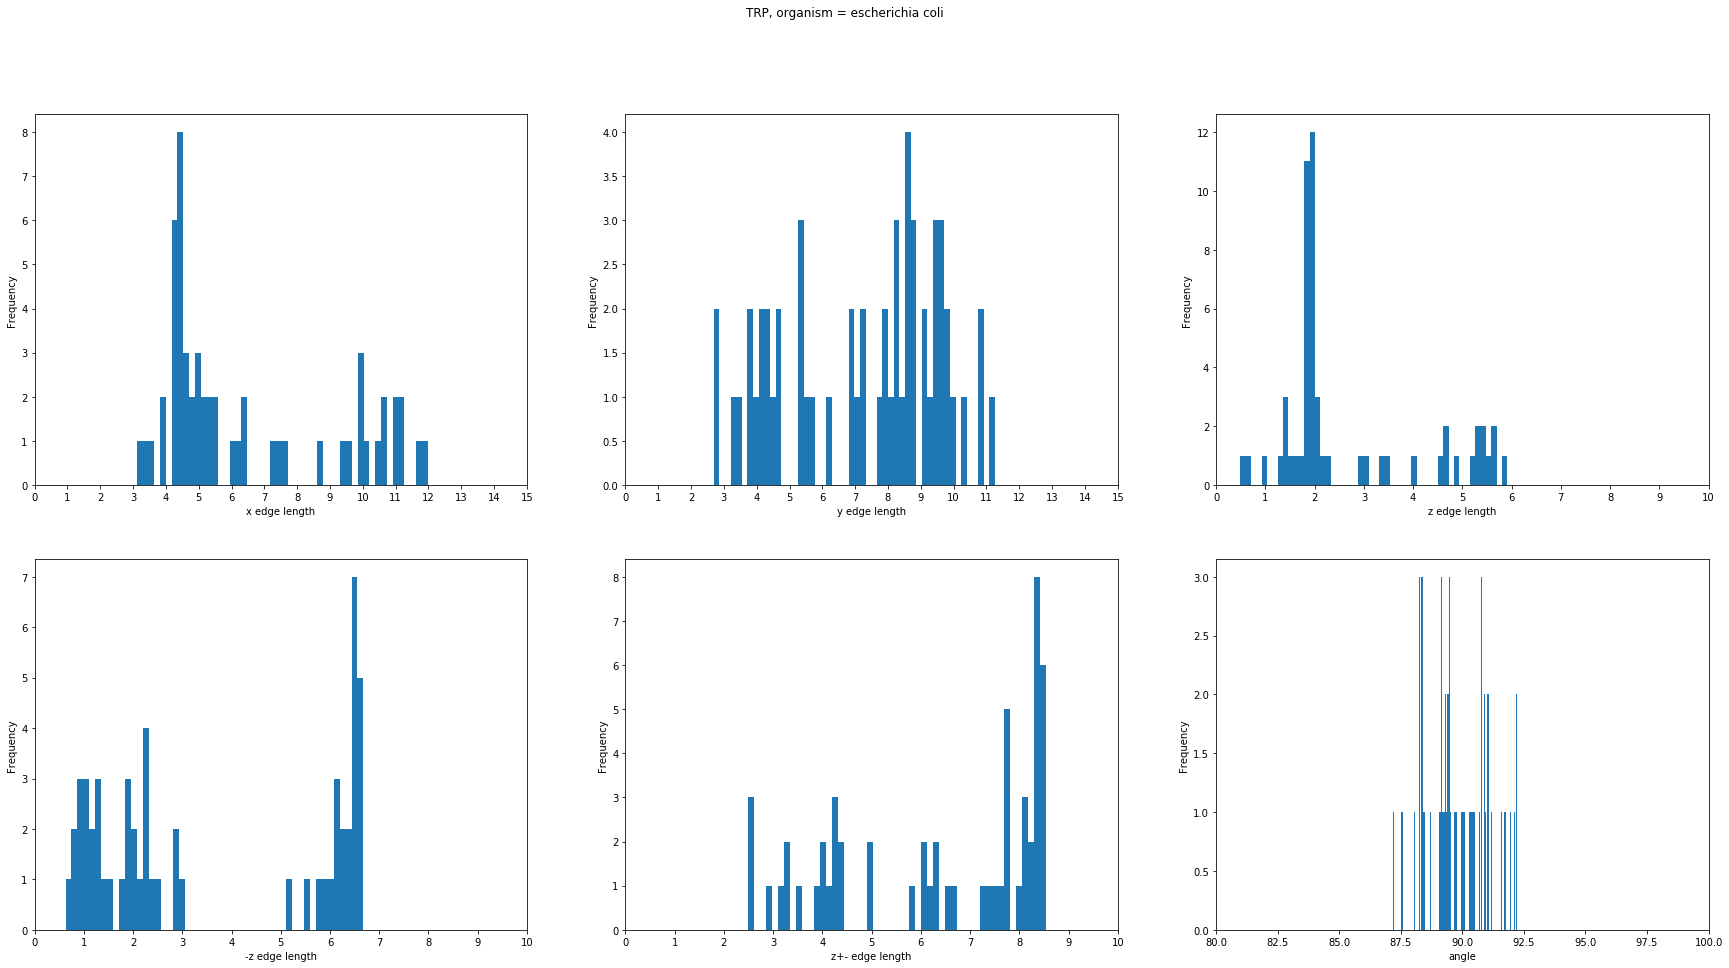

TRP: mean of x sizes: 6.5, mean of y sizes: 7.26, mean of z sizes: 2.72
TRP: max of x sizes: 11.97, max of y sizes: 11.26, max of z sizes: 5.91


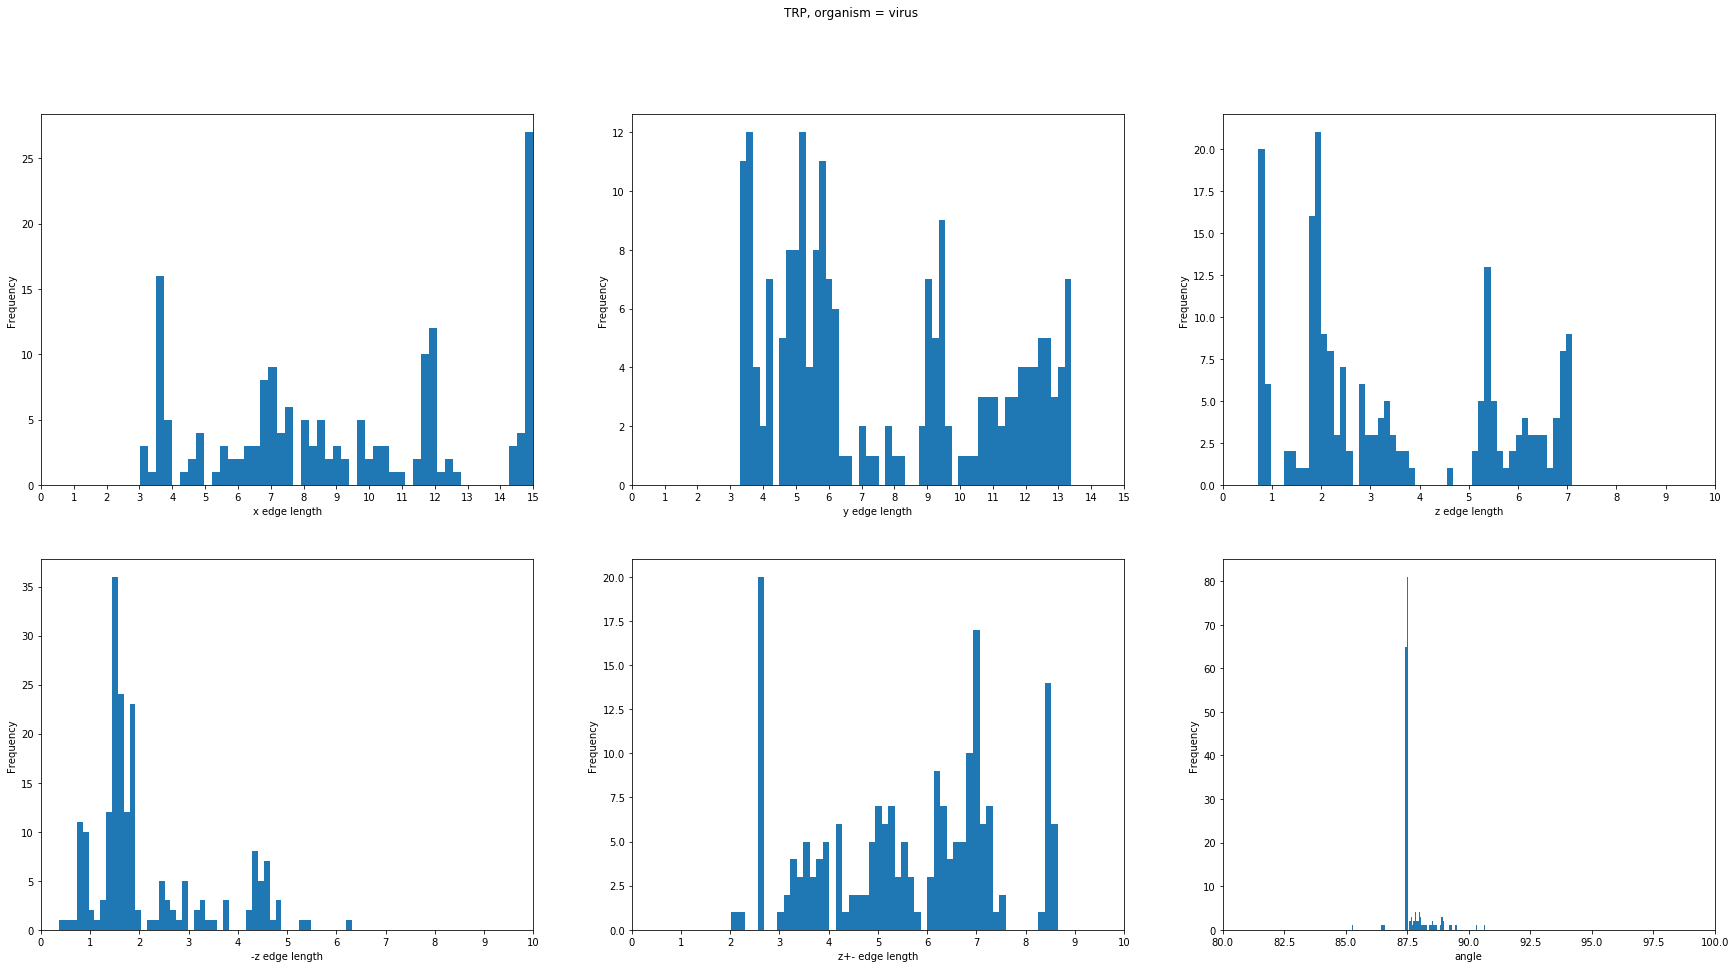

TRP: mean of x sizes: 9.96, mean of y sizes: 7.58, mean of z sizes: 3.46
TRP: max of x sizes: 15.25, max of y sizes: 13.39, max of z sizes: 7.1


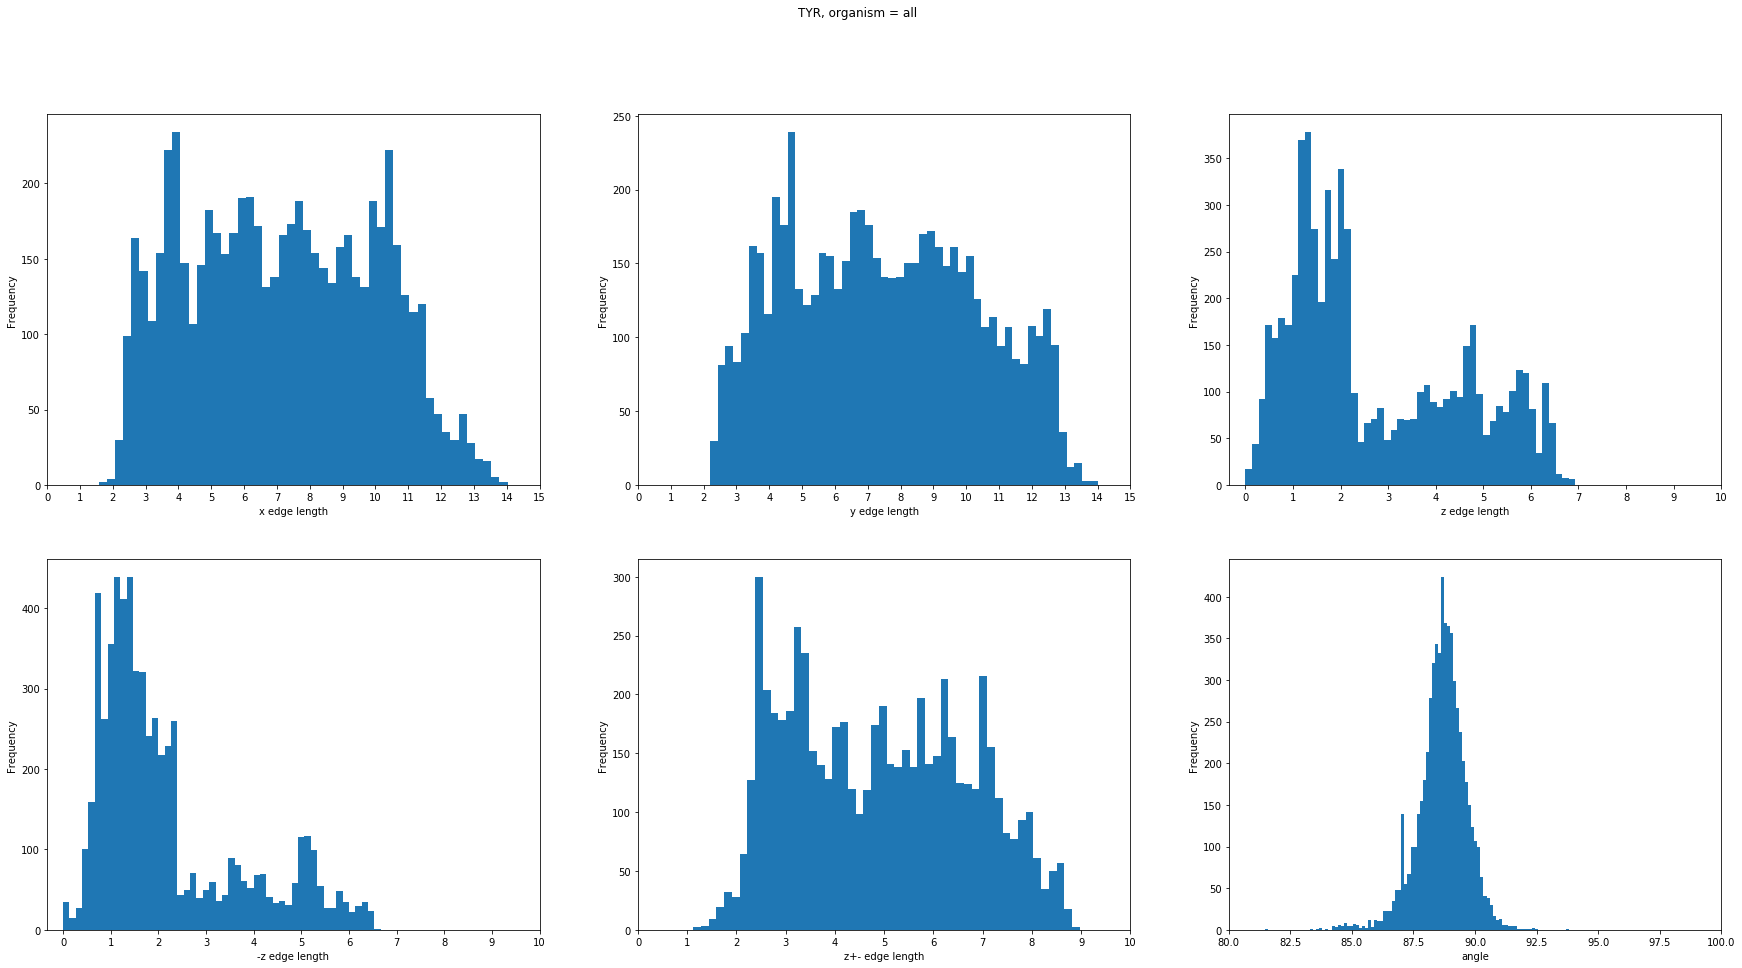

TYR: mean of x sizes: 7.13, mean of y sizes: 7.47, mean of z sizes: 2.74
TYR: max of x sizes: 14.03, max of y sizes: 14.0, max of z sizes: 6.93


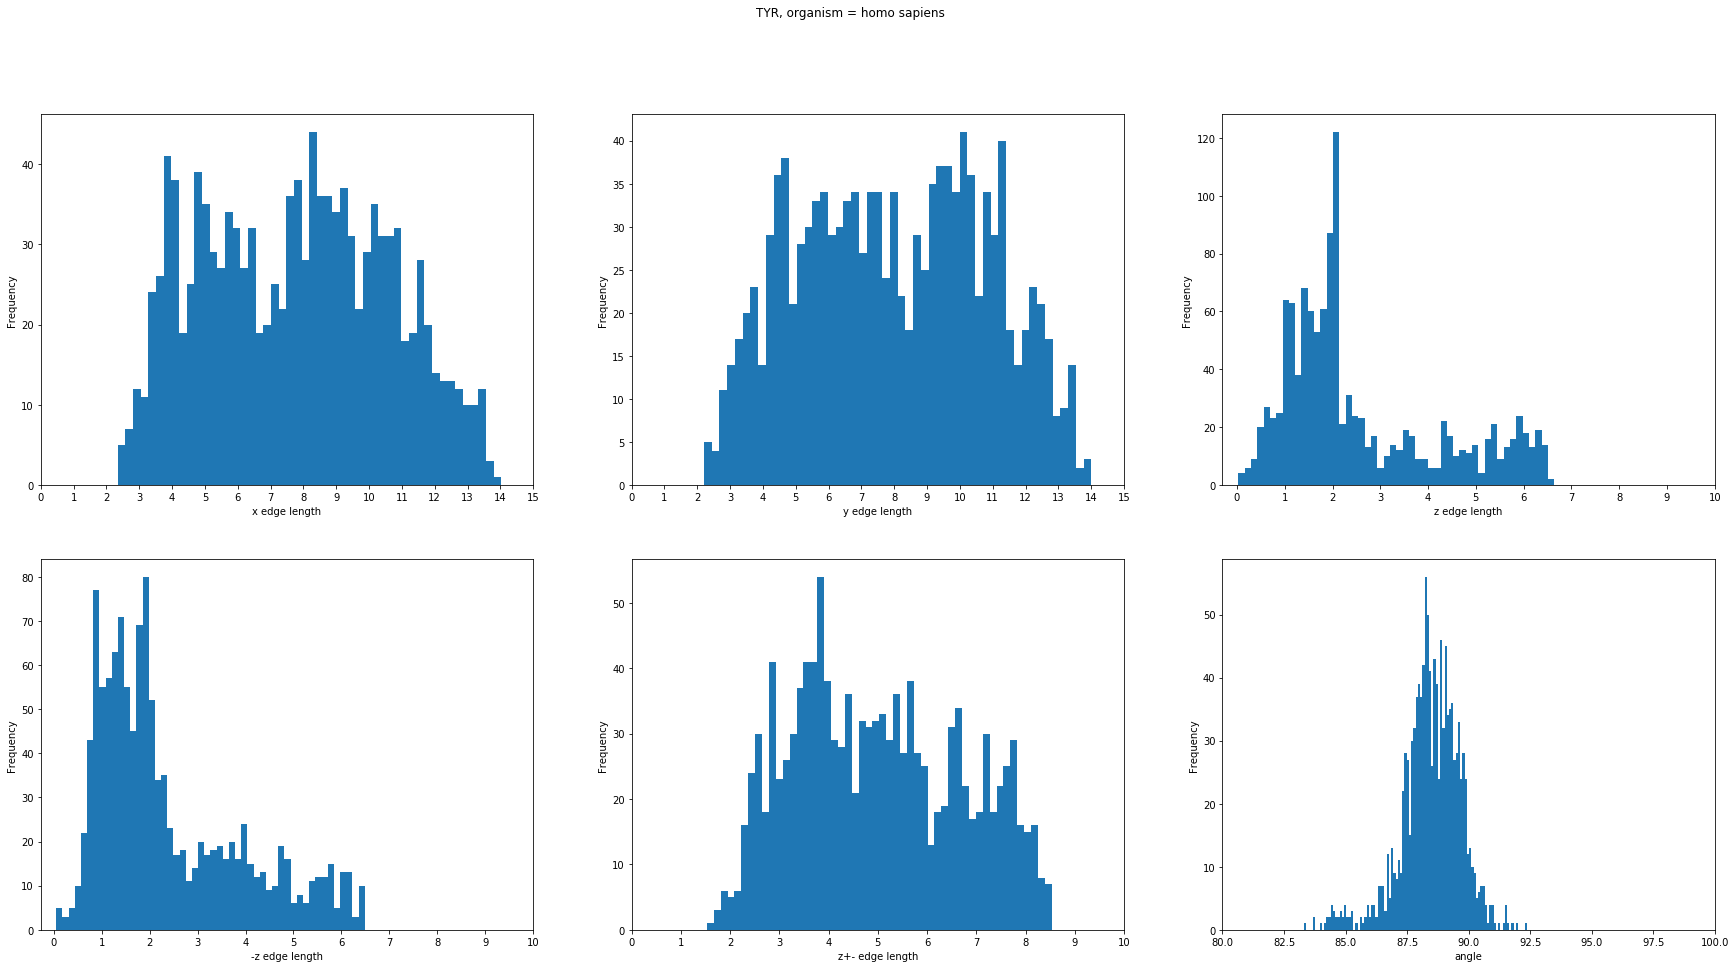

TYR: mean of x sizes: 7.77, mean of y sizes: 7.96, mean of z sizes: 2.59
TYR: max of x sizes: 14.03, max of y sizes: 14.0, max of z sizes: 6.64


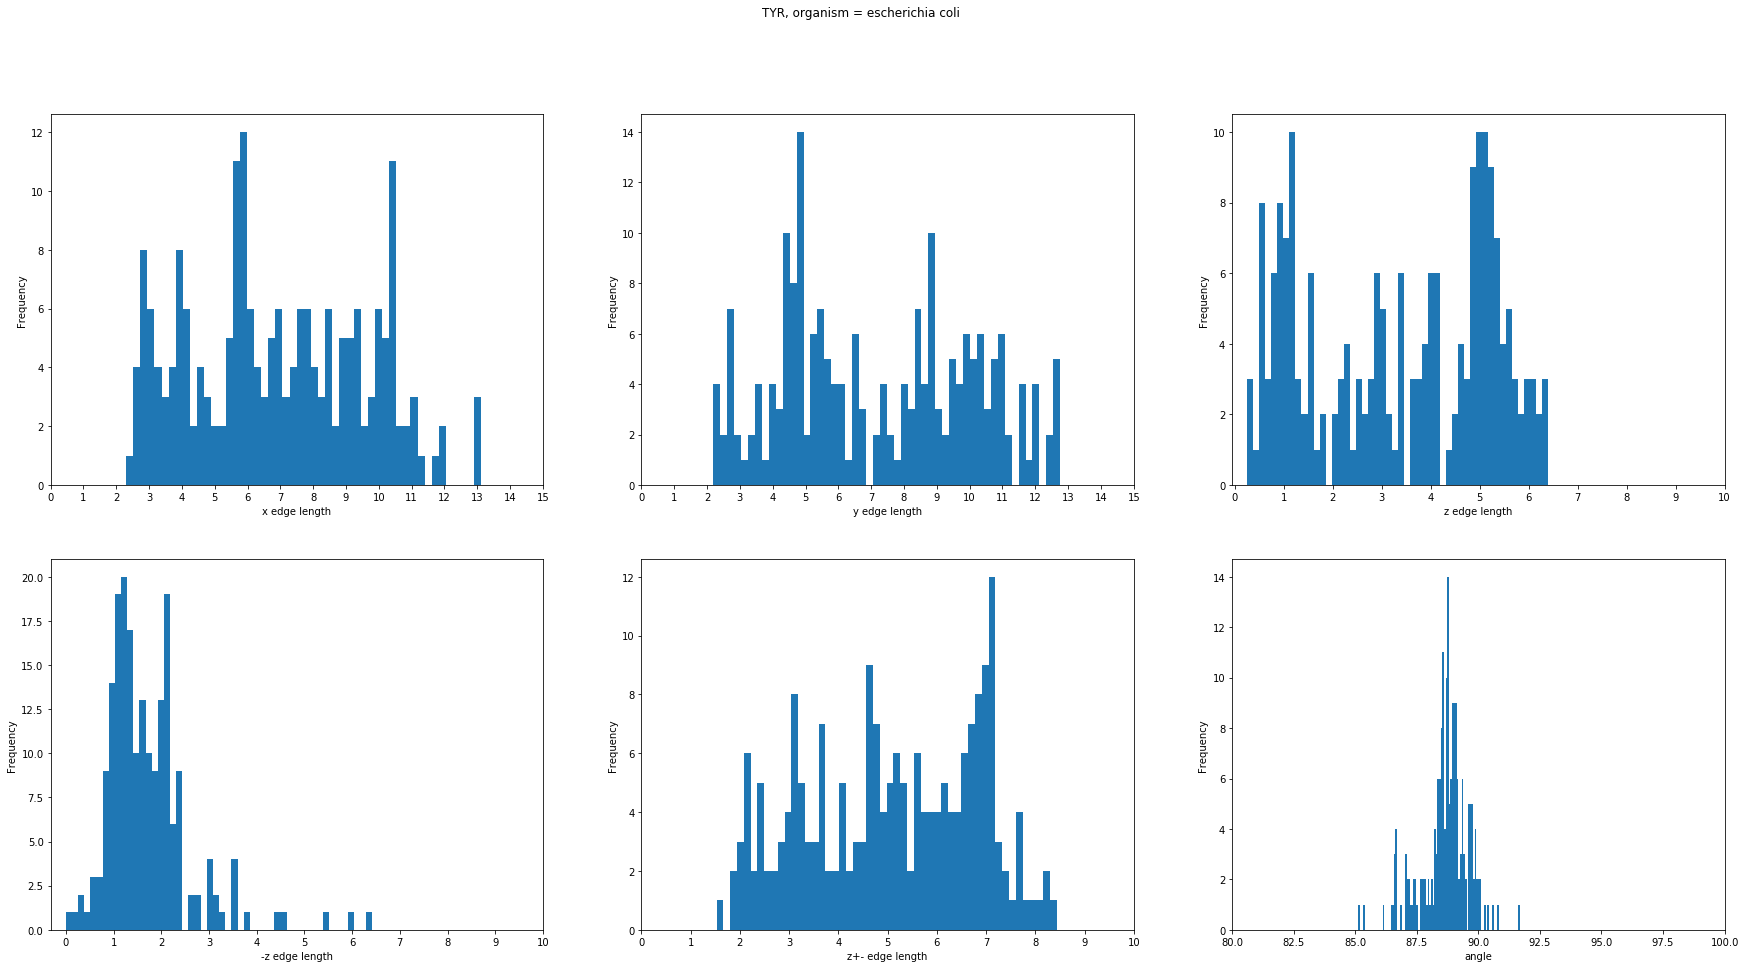

TYR: mean of x sizes: 6.89, mean of y sizes: 7.22, mean of z sizes: 3.38
TYR: max of x sizes: 13.13, max of y sizes: 12.76, max of z sizes: 6.4


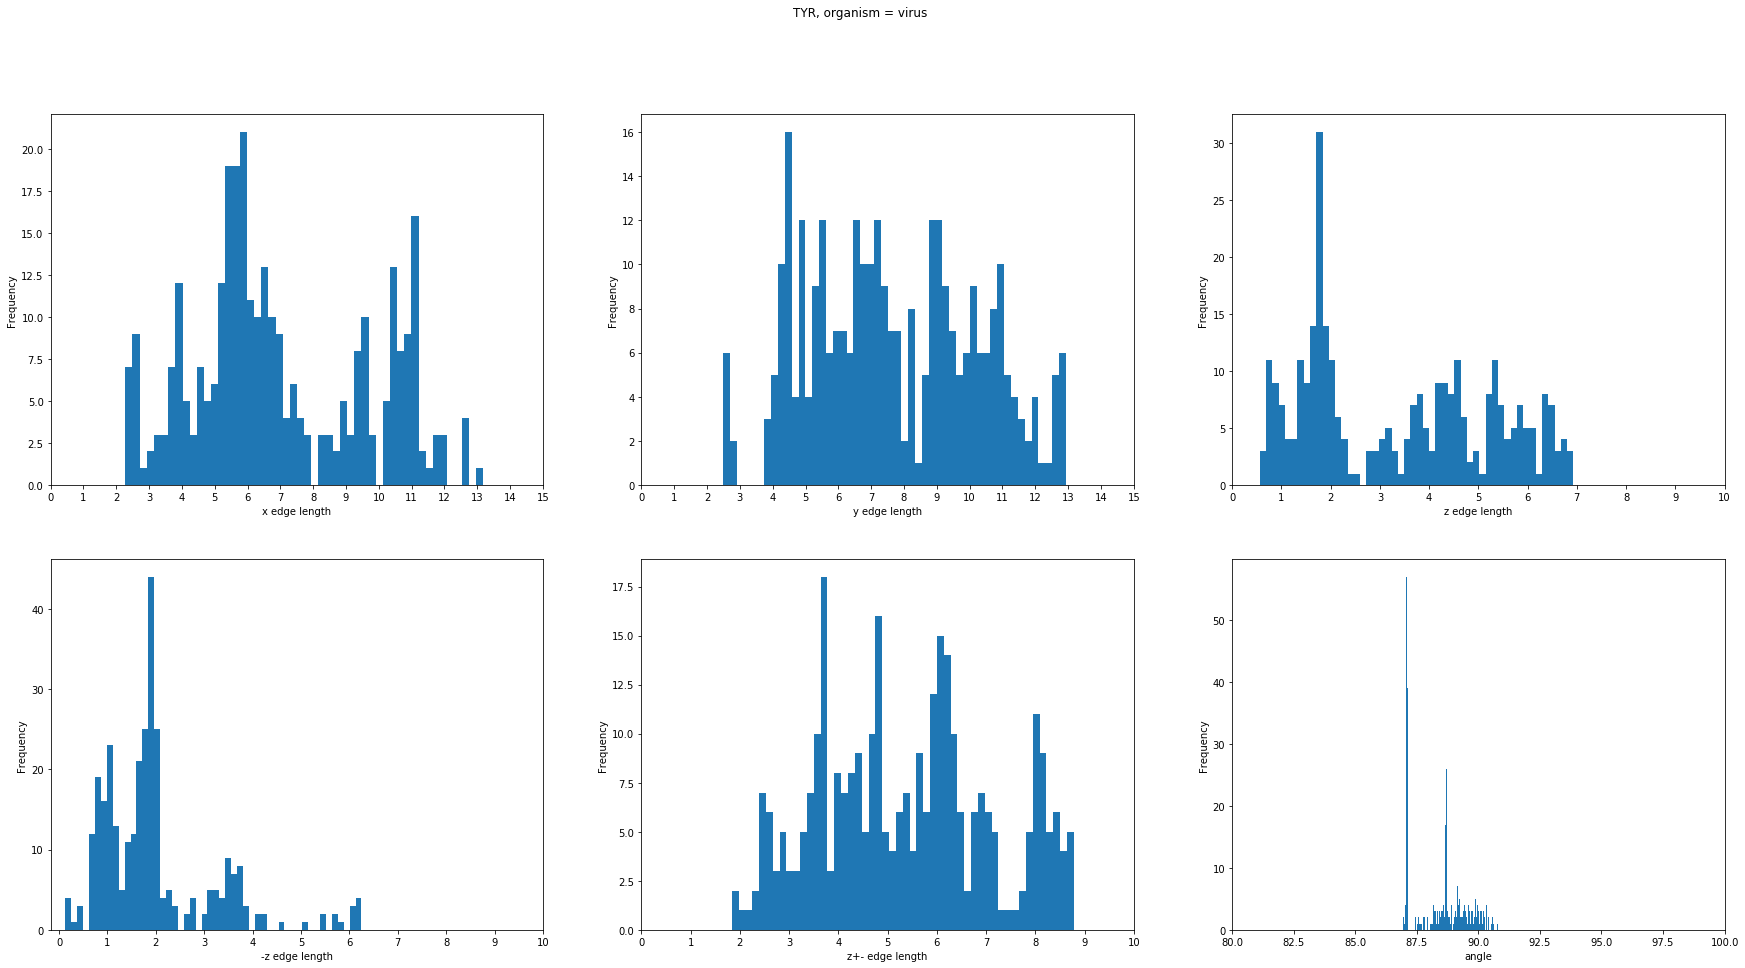

TYR: mean of x sizes: 6.99, mean of y sizes: 7.68, mean of z sizes: 3.38
TYR: max of x sizes: 13.17, max of y sizes: 12.93, max of z sizes: 6.93


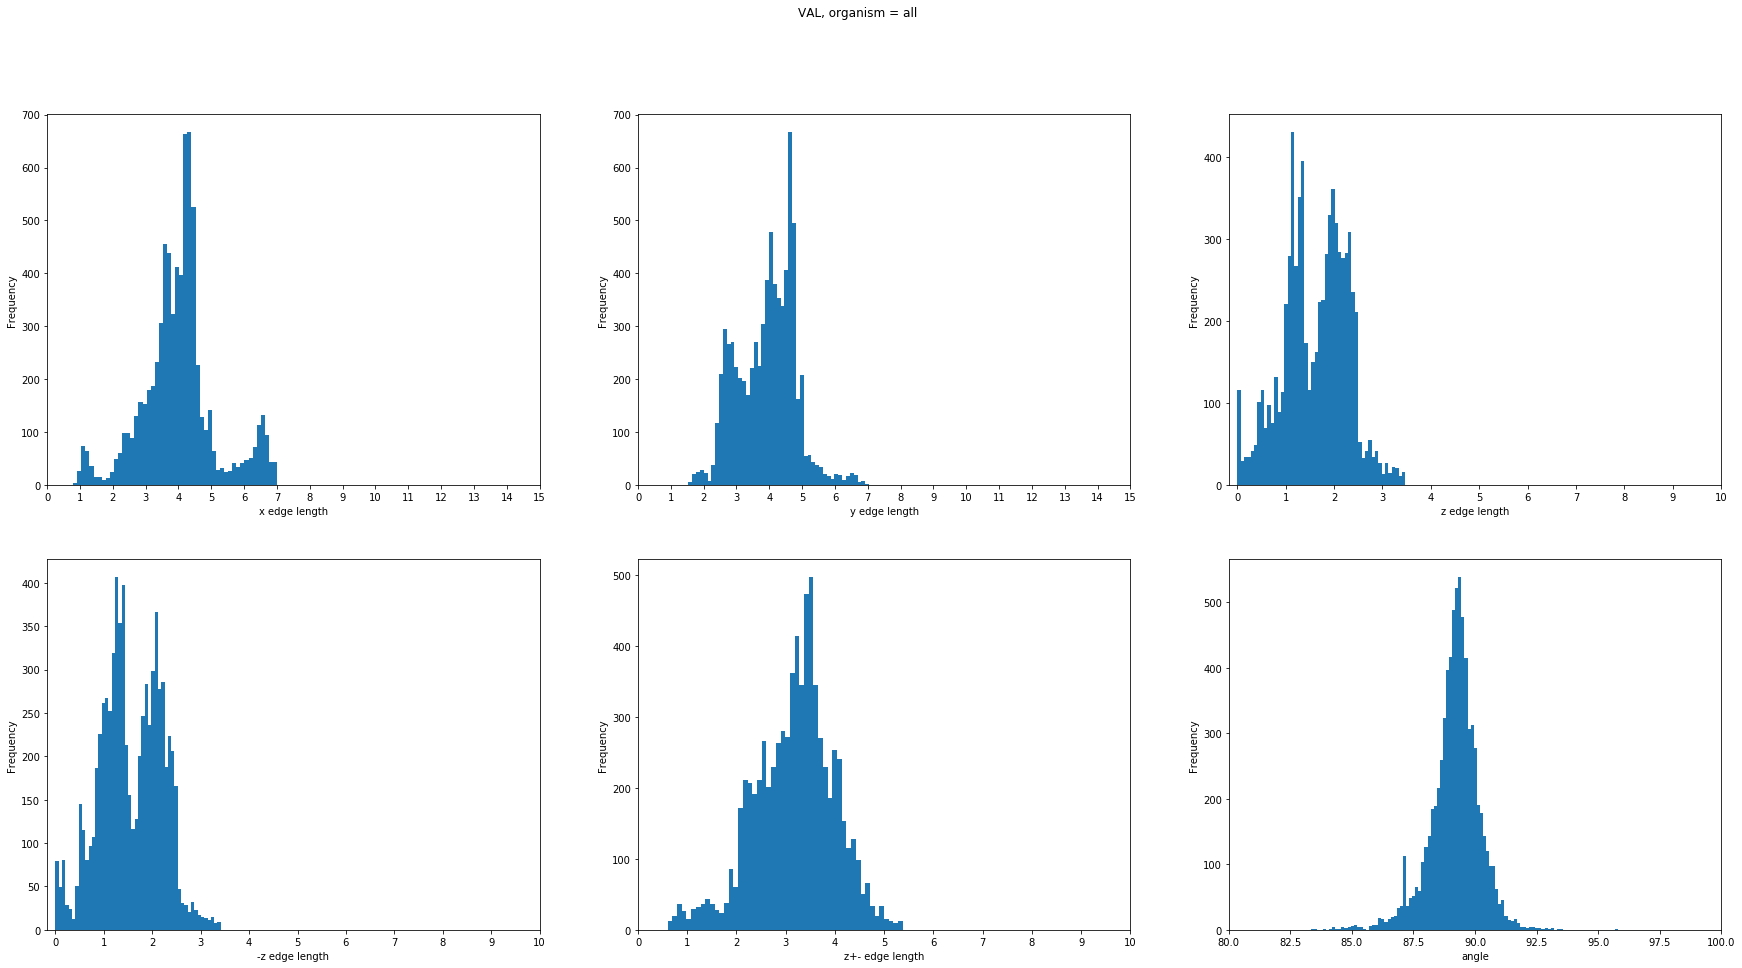

VAL: mean of x sizes: 4.01, mean of y sizes: 3.93, mean of z sizes: 1.62
VAL: max of x sizes: 7.01, max of y sizes: 7.04, max of z sizes: 3.47


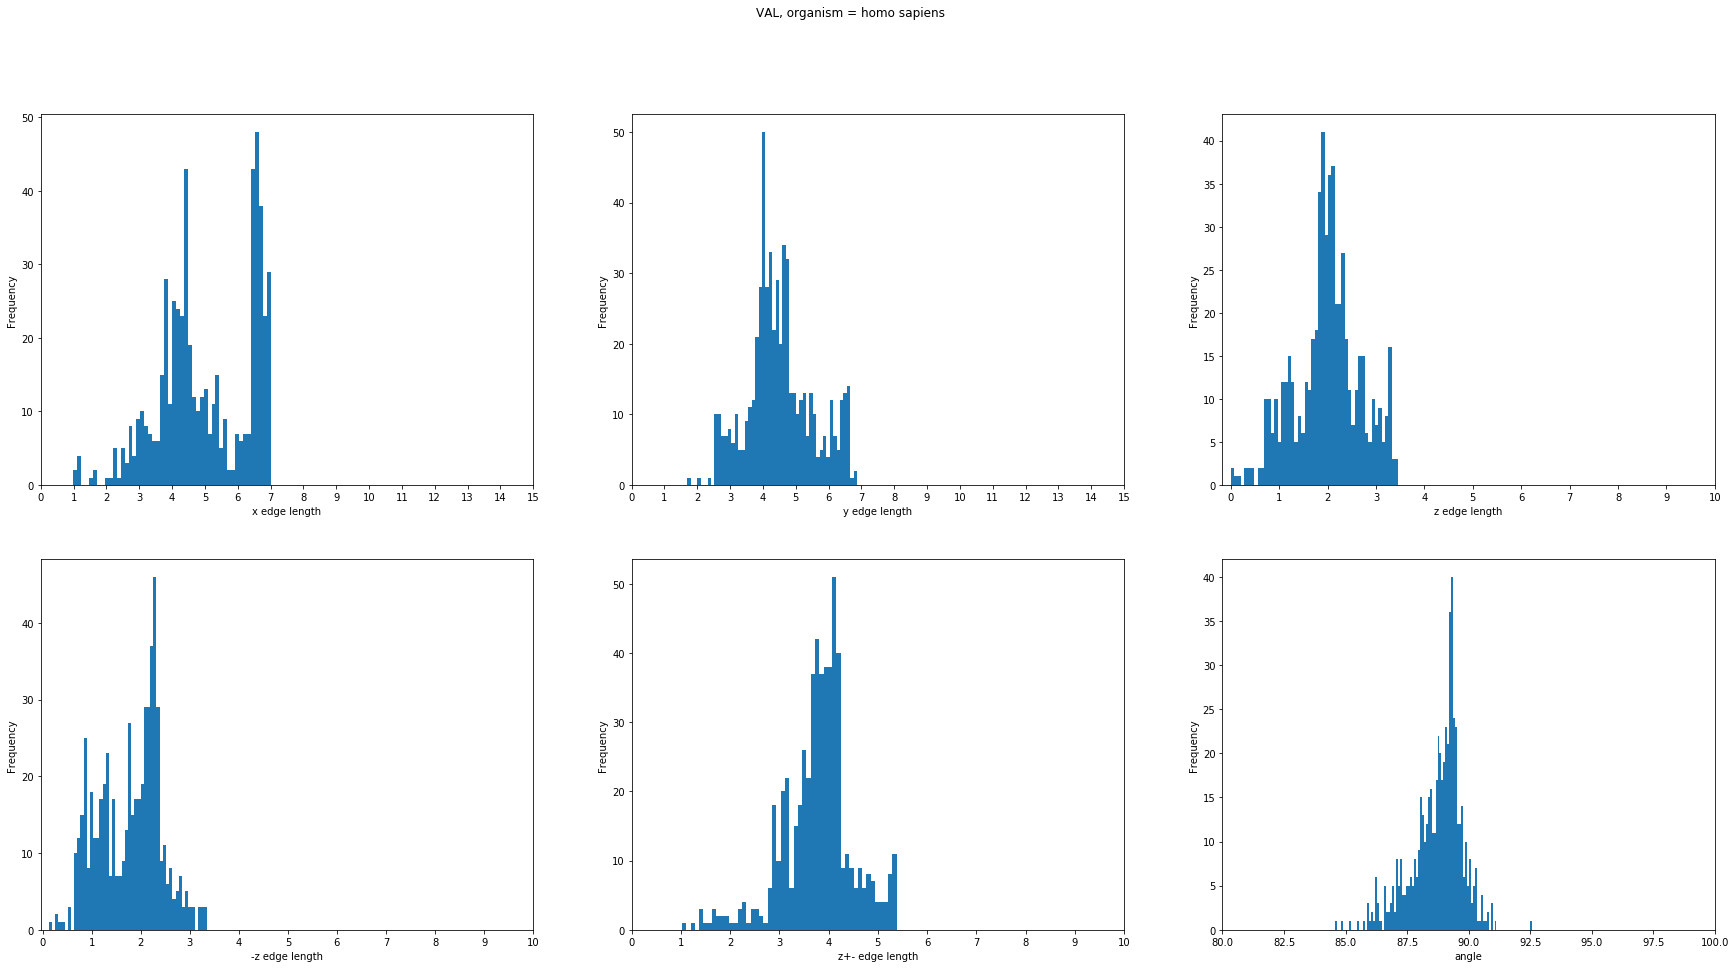

VAL: mean of x sizes: 5.01, mean of y sizes: 4.51, mean of z sizes: 1.99
VAL: max of x sizes: 7.01, max of y sizes: 6.86, max of z sizes: 3.46


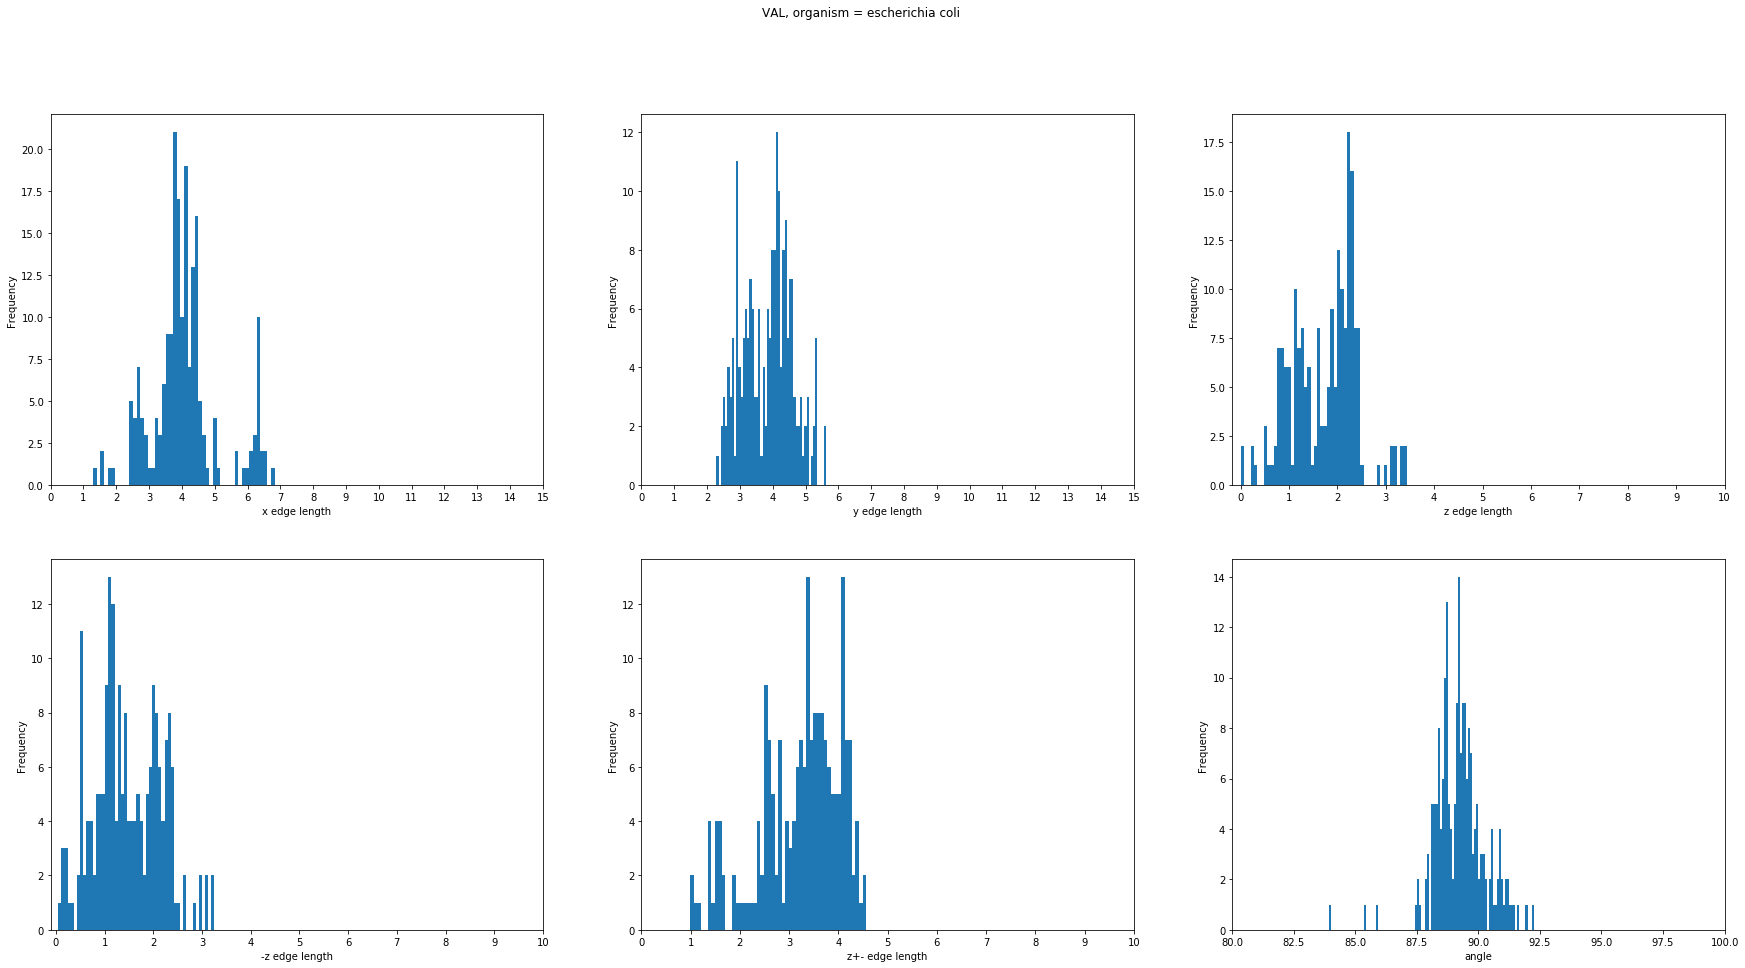

VAL: mean of x sizes: 4.07, mean of y sizes: 3.86, mean of z sizes: 1.74
VAL: max of x sizes: 6.83, max of y sizes: 5.63, max of z sizes: 3.44


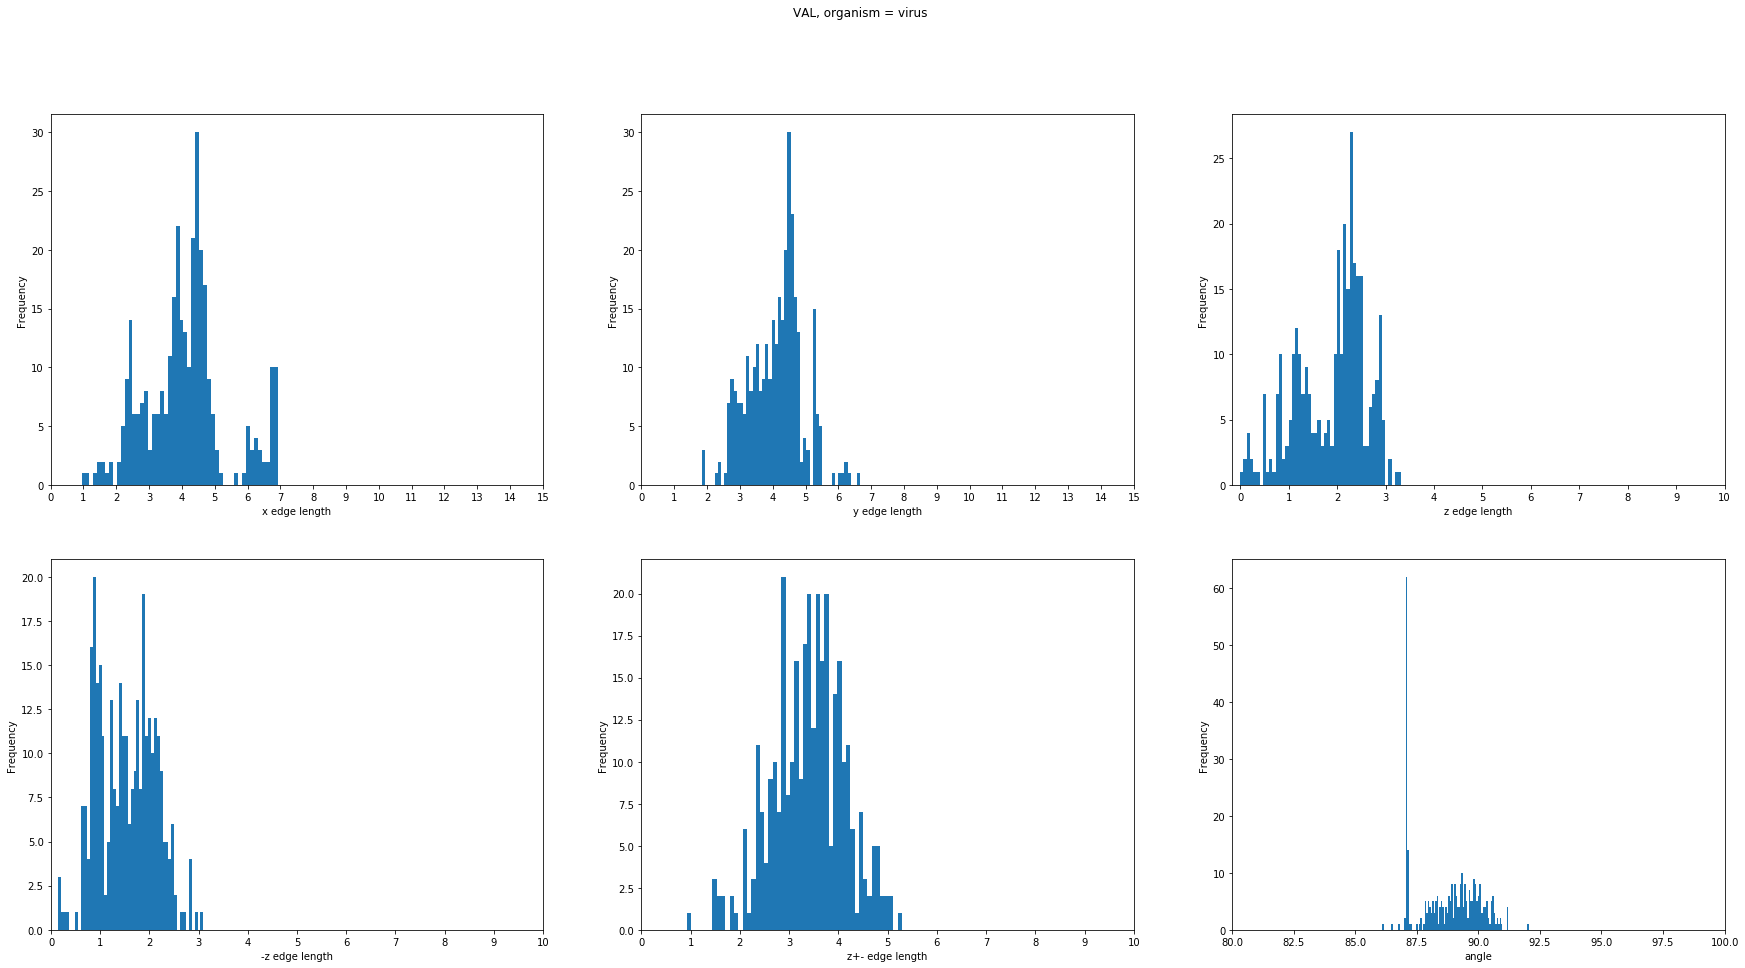

VAL: mean of x sizes: 4.09, mean of y sizes: 4.09, mean of z sizes: 1.88
VAL: max of x sizes: 6.91, max of y sizes: 6.67, max of z sizes: 3.32


In [14]:
for name, data1 in df.groupby('Amino acid'):
    for o in organisms:
        if o == 'all':
            data = data1
        else:
            data = data1.loc[data1['organism'].str.contains(o)]
        
        f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
        f.suptitle(f'{name}, organism = {o}')

        x_sizes = data['x size'].values
        ax1.hist(x_sizes, bins=50)
        ax1.set_xlim(right=15)
        ax1.set_xticks(range(0, 16, 1))
        ax1.set_xlabel('x edge length')
        ax1.set_ylabel('Frequency')

        y_sizes = data['y size'].values
        ax2.hist(y_sizes, bins=50)
        ax2.set_xlim(left=0, right=15)
        ax2.set_xticks(range(0, 16, 1))
        ax2.set_xlabel('y edge length')
        ax2.set_ylabel('Frequency')

        z_sizes = data['z size'].values
        ax3.hist(z_sizes, bins=50)
        ax3.set_xlim(right=10)
        ax3.set_xticks(range(0, 11, 1))
        ax3.set_xlabel('z edge length')
        ax3.set_ylabel('Frequency')

        minus_z_sizes = np.abs(data['-z size'].values)
        ax4.hist(minus_z_sizes, bins=50)
        ax4.set_xlim(right=10)
        ax4.set_xticks(range(0, 11, 1))
        ax4.set_xlabel('-z edge length')
        ax4.set_ylabel('Frequency')

        ax5.hist(z_sizes + minus_z_sizes, bins=50)
        ax5.set_xlim(right=10)
        ax5.set_xticks(range(0, 11, 1))
        ax5.set_xlabel('z+- edge length')
        ax5.set_ylabel('Frequency')
        
        ax6.hist(data['angle'].values, bins=100)
        ax6.set_xlim(left=80, right=100)
        ax6.set_xlabel('angle')
        ax6.set_ylabel('Frequency')



        plt.show()

        print(f'{name}: mean of x sizes: {np.round(np.mean(x_sizes), 2)}, mean of y sizes: '
              f'{np.round(np.mean(y_sizes), 2)}, mean of z sizes: {np.round(np.mean(z_sizes), 2)}')
        print(f'{name}: max of x sizes: {np.round(np.max(x_sizes), 2)}, max of y sizes: '
              f'{np.round(np.max(y_sizes), 2)}, max of z sizes: {np.round(np.max(z_sizes), 2)}')

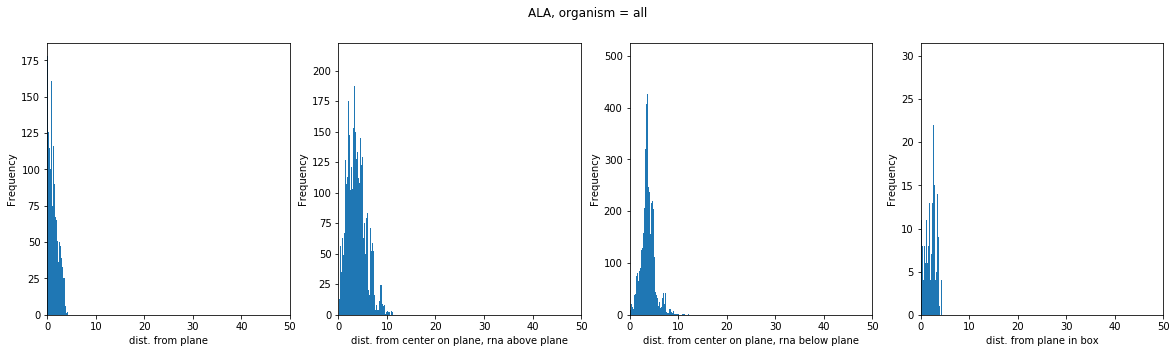

ALA: mean dist. from plane: 1.31, mean dist. on plane, rna above plane: 3.8, mean dist. on plane, rna below plane: 3.79,mean dist. from plane in box: 2.12


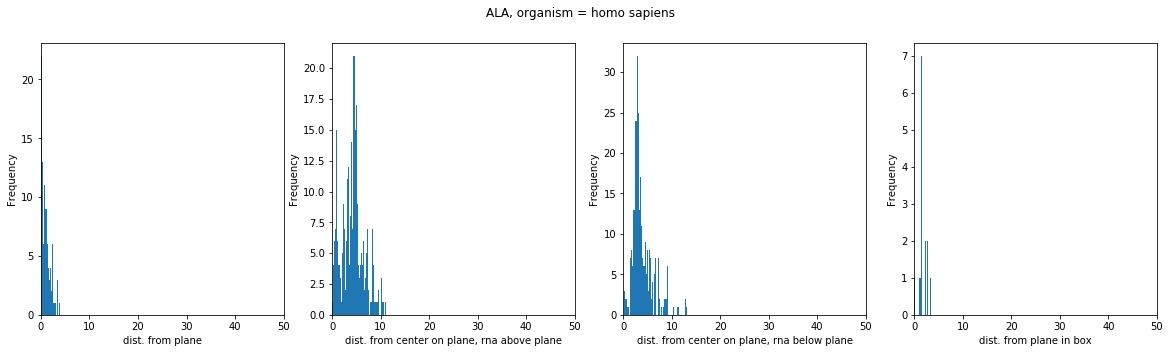

ALA: mean dist. from plane: 1.03, mean dist. on plane, rna above plane: 4.32, mean dist. on plane, rna below plane: 3.8,mean dist. from plane in box: 1.69


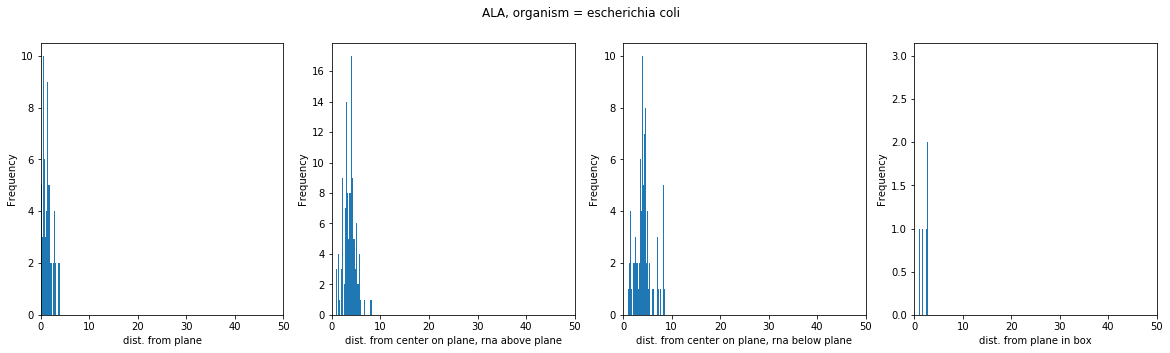

ALA: mean dist. from plane: 1.38, mean dist. on plane, rna above plane: 3.57, mean dist. on plane, rna below plane: 4.28,mean dist. from plane in box: 1.89


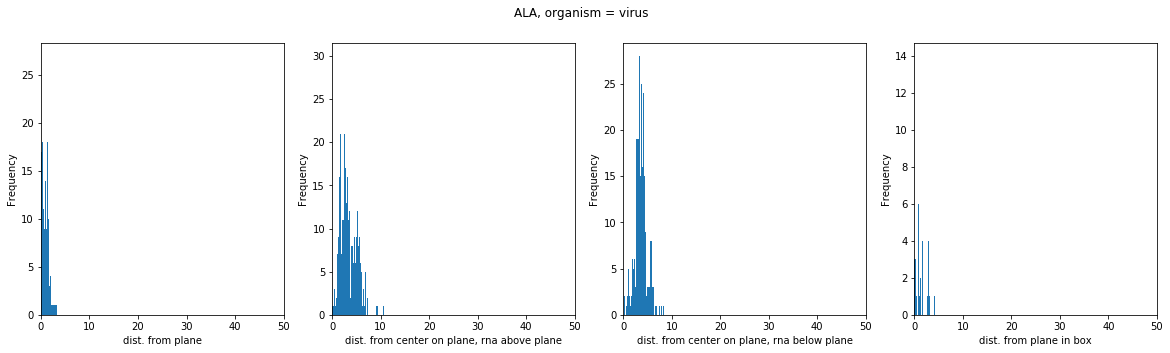

ALA: mean dist. from plane: 1.09, mean dist. on plane, rna above plane: 3.51, mean dist. on plane, rna below plane: 3.61,mean dist. from plane in box: 1.46


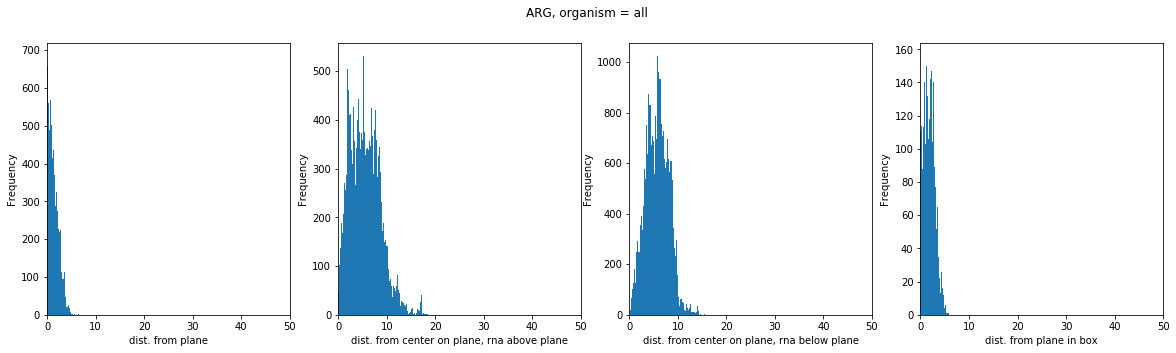

ARG: mean dist. from plane: 1.37, mean dist. on plane, rna above plane: 5.58, mean dist. on plane, rna below plane: 5.76,mean dist. from plane in box: 1.83


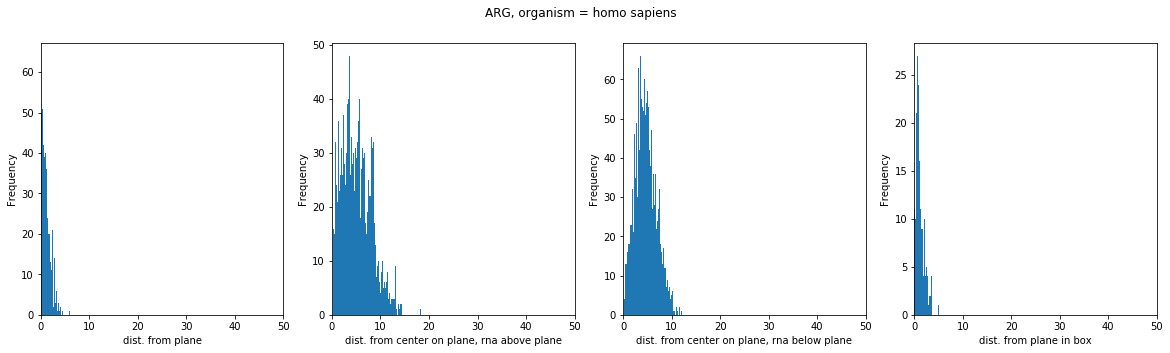

ARG: mean dist. from plane: 1.09, mean dist. on plane, rna above plane: 5.18, mean dist. on plane, rna below plane: 4.73,mean dist. from plane in box: 1.2


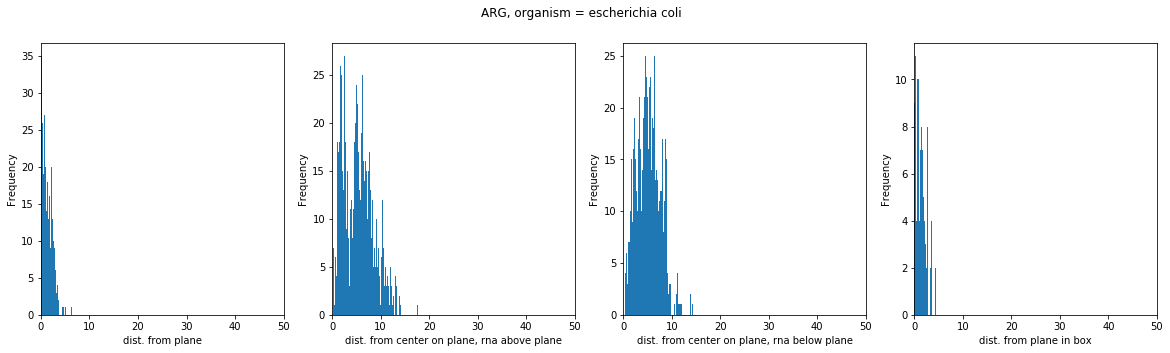

ARG: mean dist. from plane: 1.28, mean dist. on plane, rna above plane: 5.34, mean dist. on plane, rna below plane: 5.17,mean dist. from plane in box: 1.49


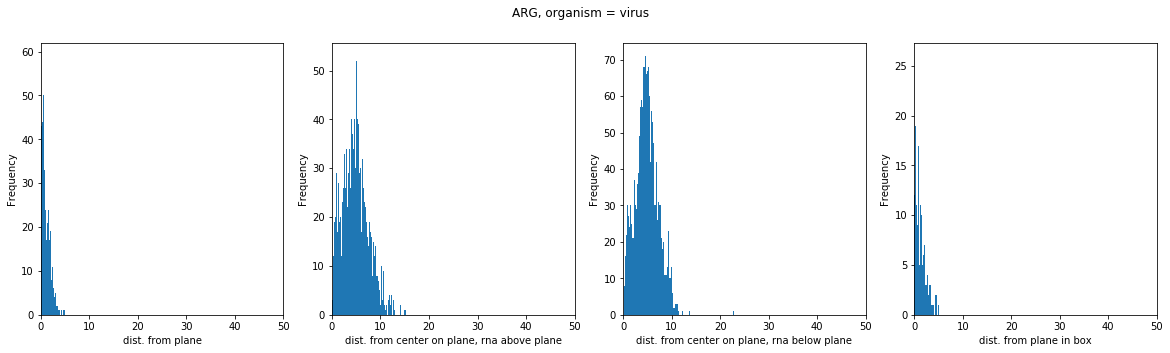

ARG: mean dist. from plane: 1.12, mean dist. on plane, rna above plane: 4.94, mean dist. on plane, rna below plane: 4.9,mean dist. from plane in box: 1.31


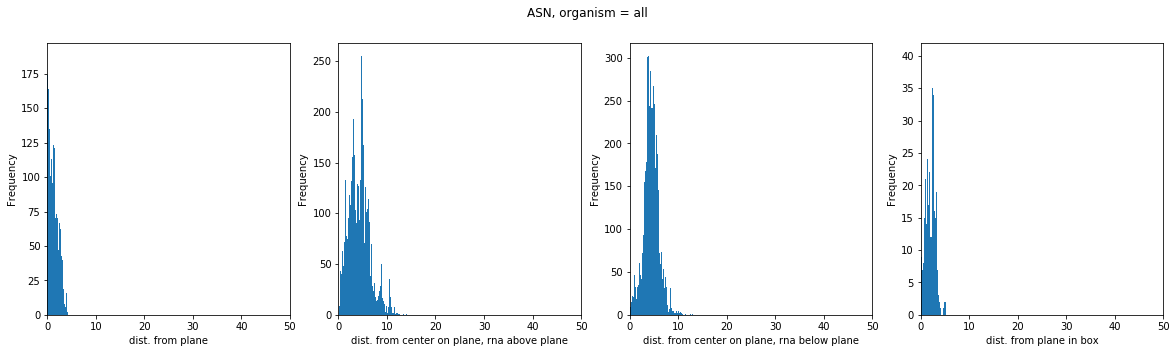

ASN: mean dist. from plane: 1.34, mean dist. on plane, rna above plane: 4.29, mean dist. on plane, rna below plane: 4.43,mean dist. from plane in box: 2.01


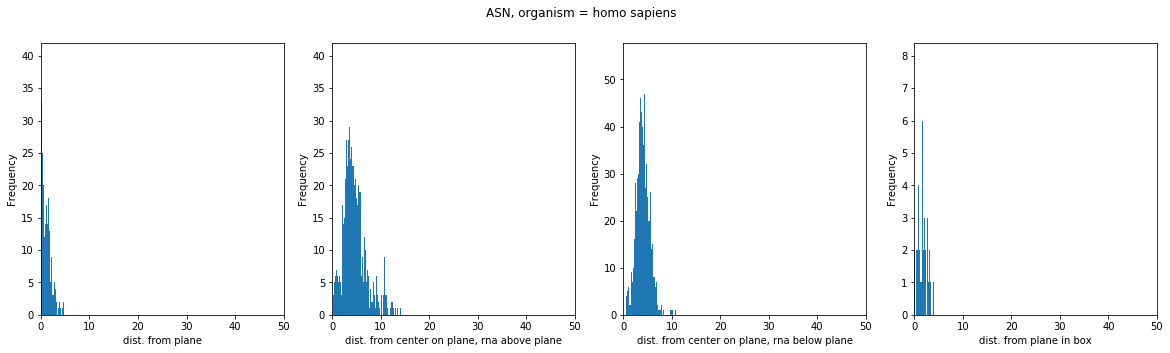

ASN: mean dist. from plane: 1.08, mean dist. on plane, rna above plane: 4.64, mean dist. on plane, rna below plane: 4.14,mean dist. from plane in box: 1.45


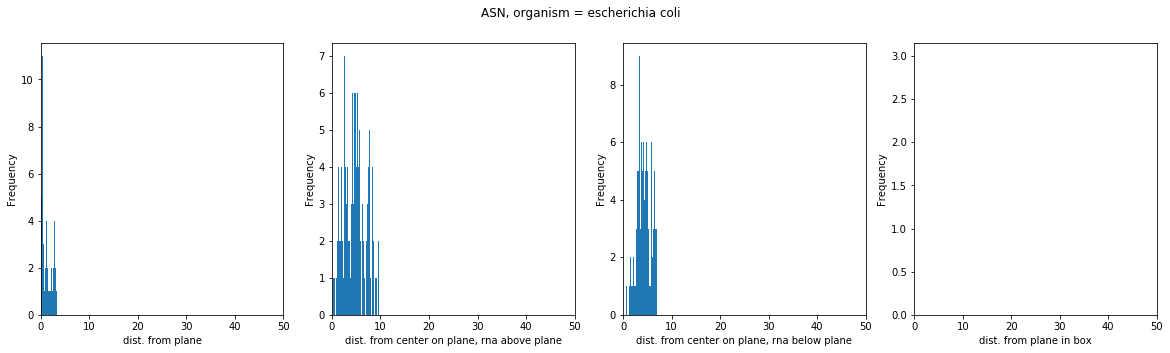

ASN: mean dist. from plane: 1.23, mean dist. on plane, rna above plane: 4.69, mean dist. on plane, rna below plane: 4.63,mean dist. from plane in box: 2.23


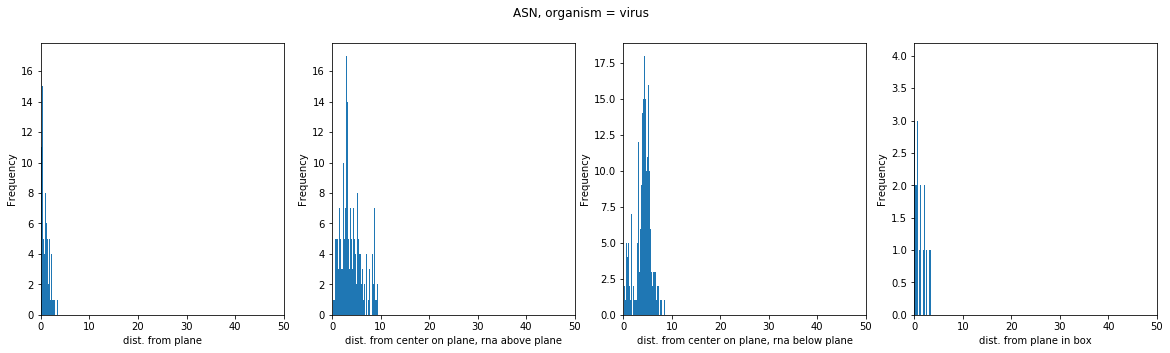

ASN: mean dist. from plane: 1.09, mean dist. on plane, rna above plane: 4.15, mean dist. on plane, rna below plane: 4.05,mean dist. from plane in box: 1.36


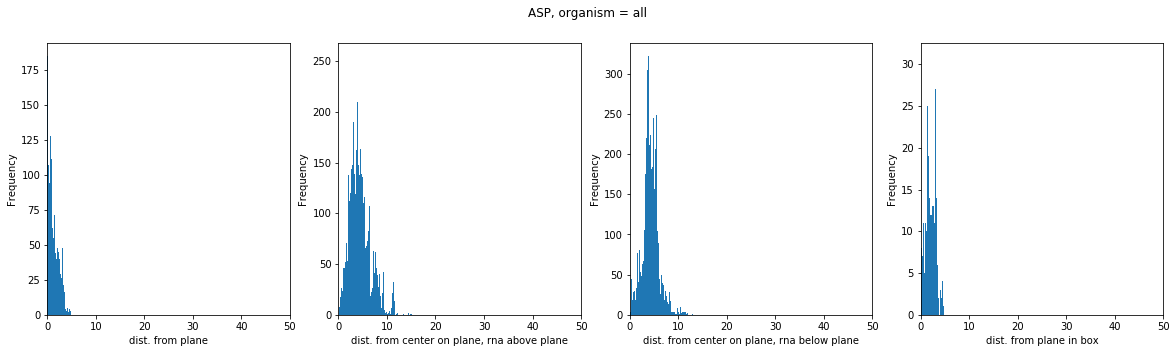

ASP: mean dist. from plane: 1.29, mean dist. on plane, rna above plane: 4.47, mean dist. on plane, rna below plane: 4.37,mean dist. from plane in box: 2.05


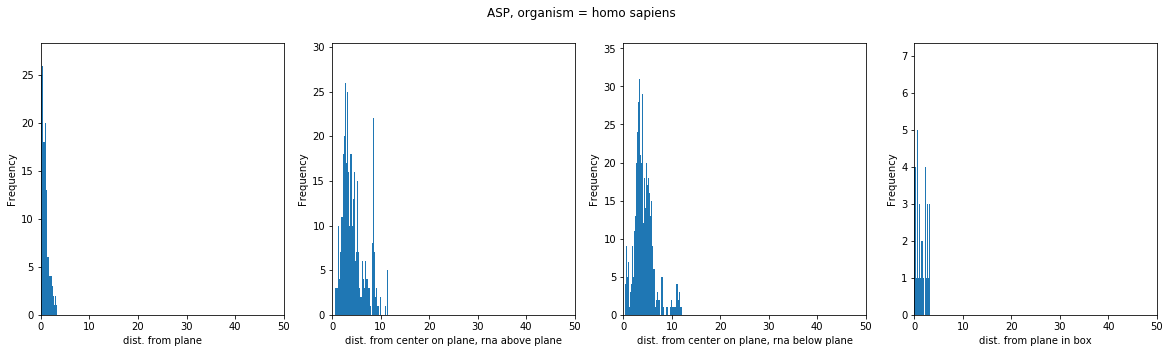

ASP: mean dist. from plane: 0.98, mean dist. on plane, rna above plane: 4.25, mean dist. on plane, rna below plane: 4.34,mean dist. from plane in box: 1.45


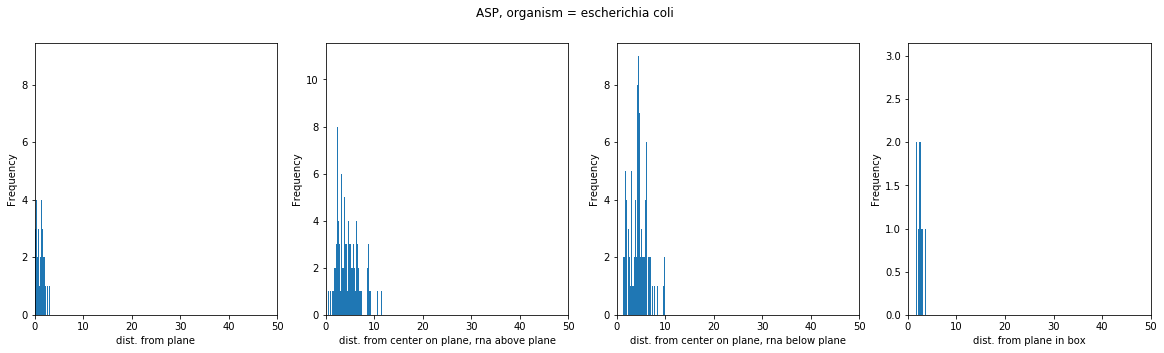

ASP: mean dist. from plane: 1.37, mean dist. on plane, rna above plane: 4.41, mean dist. on plane, rna below plane: 4.57,mean dist. from plane in box: 2.18


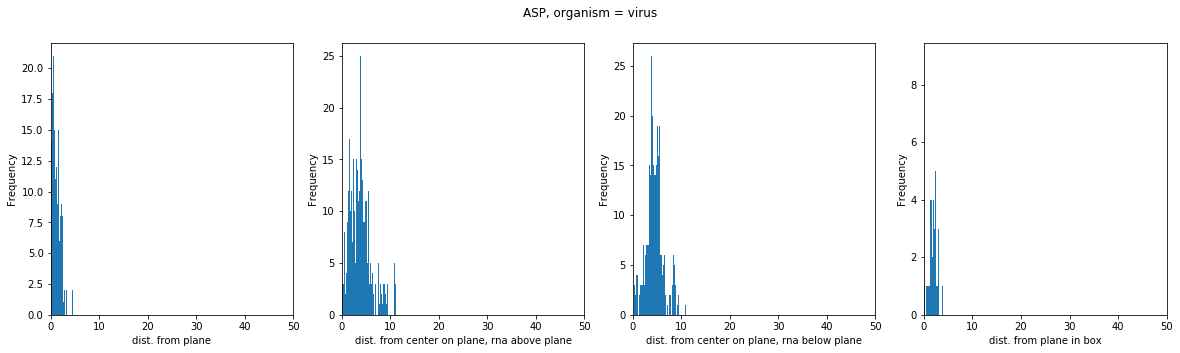

ASP: mean dist. from plane: 1.21, mean dist. on plane, rna above plane: 3.9, mean dist. on plane, rna below plane: 4.56,mean dist. from plane in box: 1.73


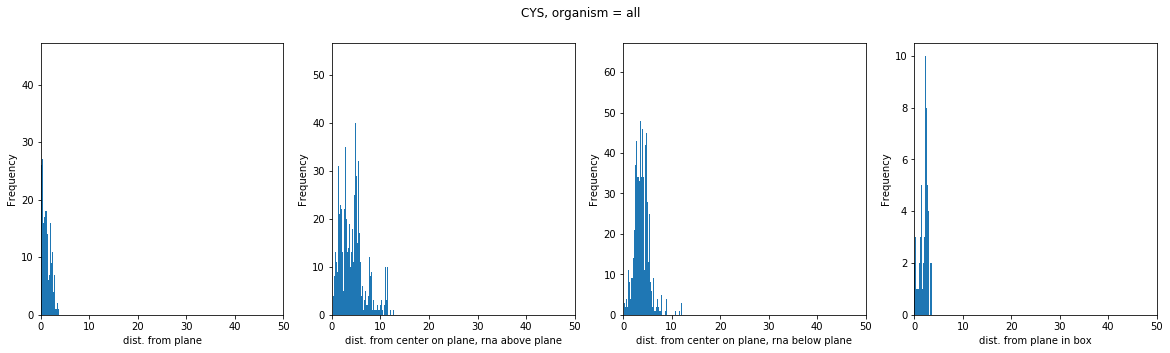

CYS: mean dist. from plane: 1.22, mean dist. on plane, rna above plane: 4.21, mean dist. on plane, rna below plane: 3.86,mean dist. from plane in box: 1.89


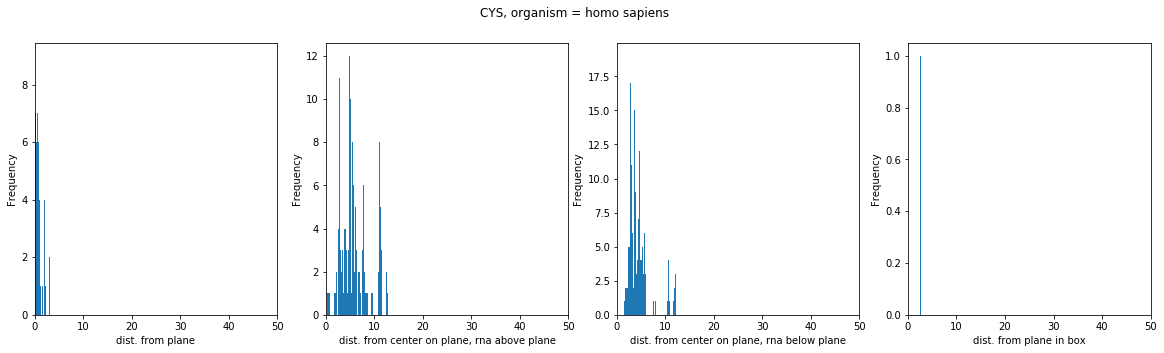

CYS: mean dist. from plane: 1.02, mean dist. on plane, rna above plane: 6.14, mean dist. on plane, rna below plane: 4.3,mean dist. from plane in box: 2.99


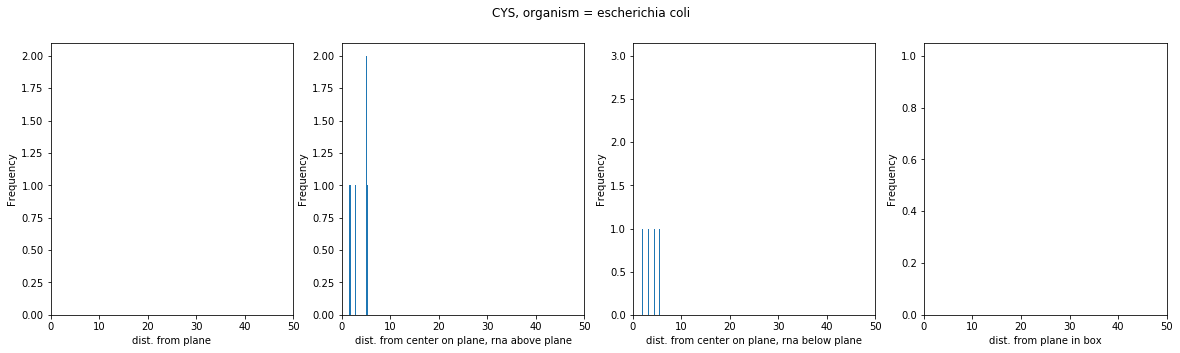

CYS: mean dist. from plane: 0.8, mean dist. on plane, rna above plane: 4.8, mean dist. on plane, rna below plane: 4.21,mean dist. from plane in box: 2.04


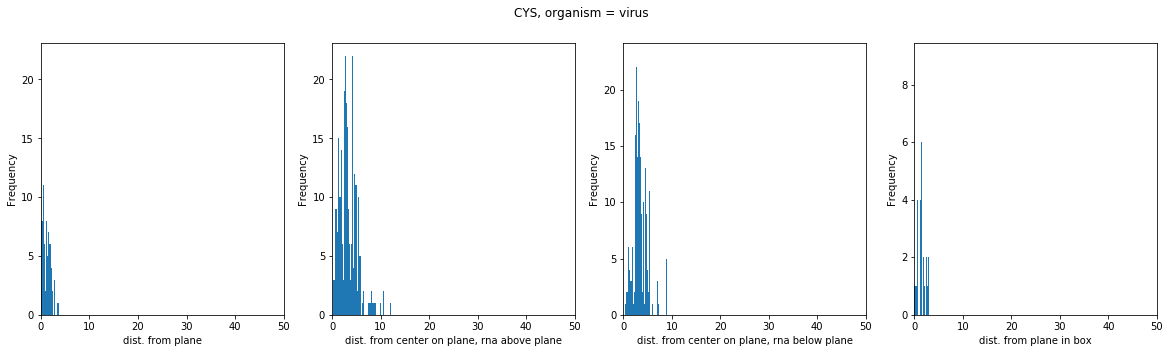

CYS: mean dist. from plane: 1.16, mean dist. on plane, rna above plane: 3.44, mean dist. on plane, rna below plane: 3.49,mean dist. from plane in box: 1.52


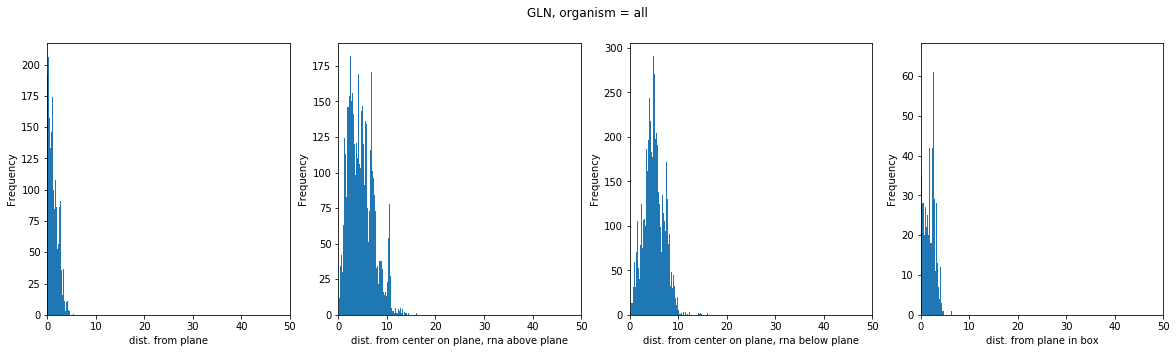

GLN: mean dist. from plane: 1.3, mean dist. on plane, rna above plane: 4.7, mean dist. on plane, rna below plane: 5.0,mean dist. from plane in box: 1.88


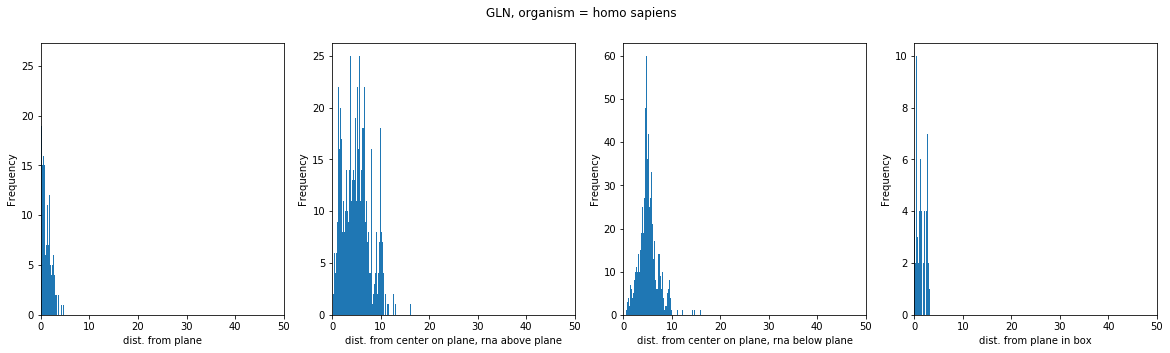

GLN: mean dist. from plane: 1.21, mean dist. on plane, rna above plane: 5.12, mean dist. on plane, rna below plane: 5.12,mean dist. from plane in box: 1.56


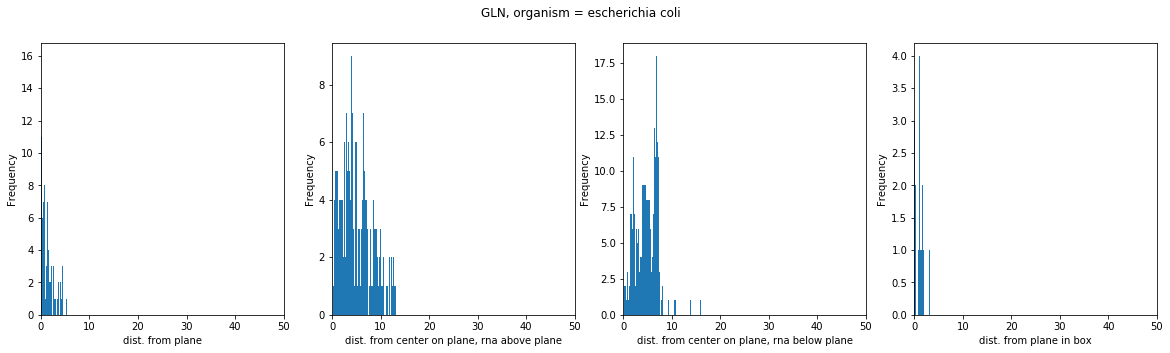

GLN: mean dist. from plane: 1.25, mean dist. on plane, rna above plane: 5.19, mean dist. on plane, rna below plane: 4.81,mean dist. from plane in box: 1.28


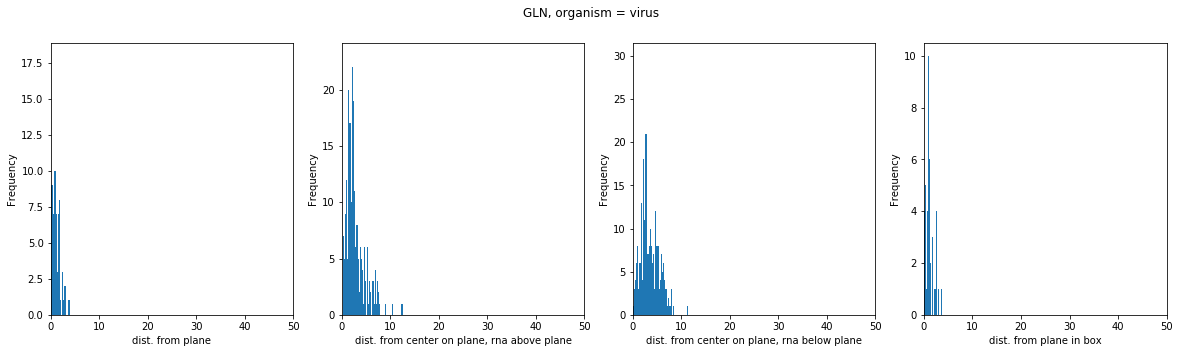

GLN: mean dist. from plane: 1.09, mean dist. on plane, rna above plane: 2.97, mean dist. on plane, rna below plane: 3.44,mean dist. from plane in box: 1.12


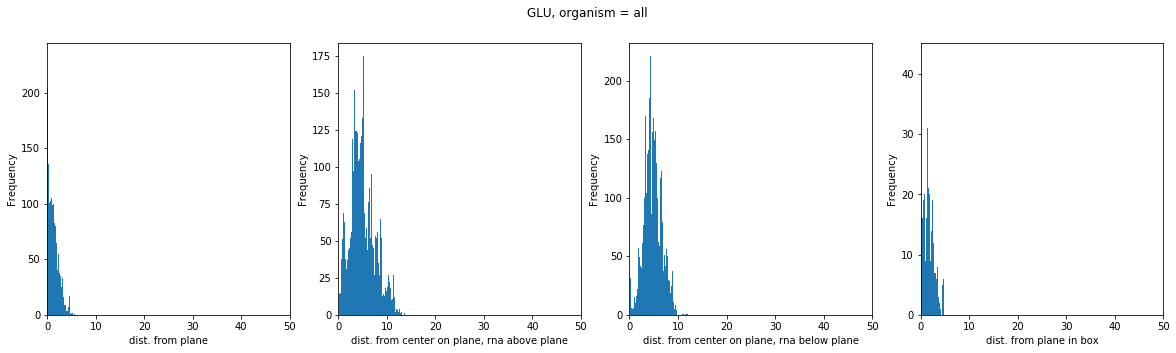

GLU: mean dist. from plane: 1.27, mean dist. on plane, rna above plane: 5.1, mean dist. on plane, rna below plane: 4.86,mean dist. from plane in box: 1.81


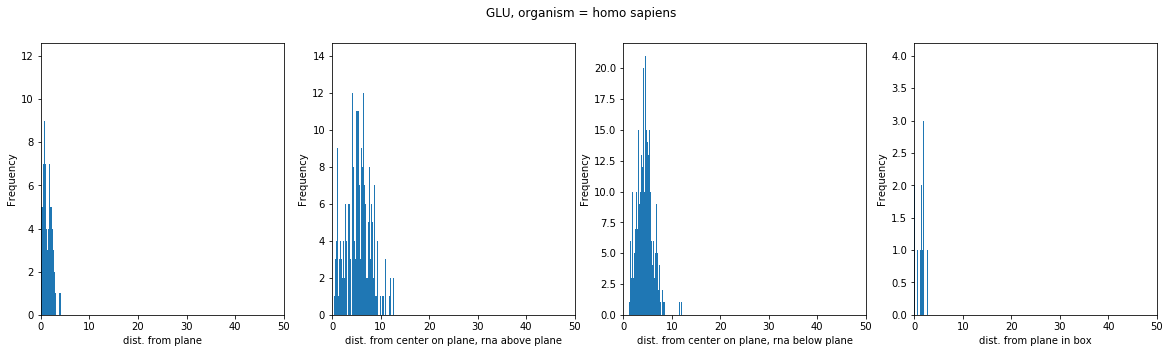

GLU: mean dist. from plane: 1.24, mean dist. on plane, rna above plane: 5.37, mean dist. on plane, rna below plane: 4.36,mean dist. from plane in box: 1.47


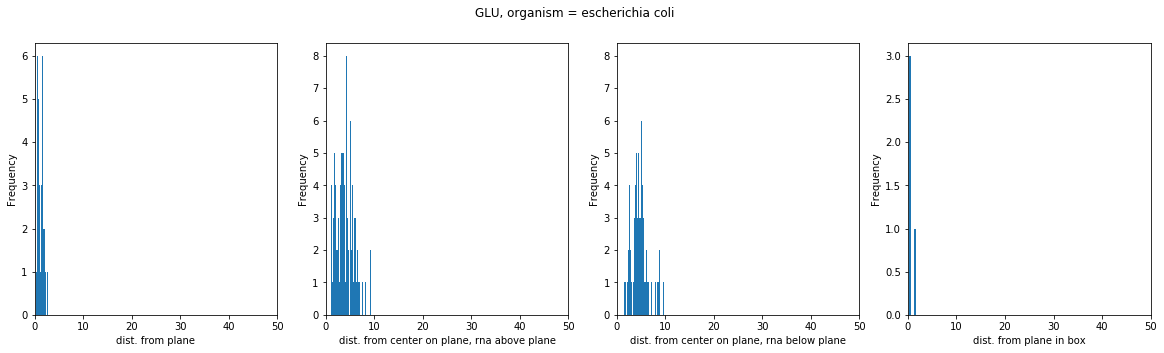

GLU: mean dist. from plane: 1.2, mean dist. on plane, rna above plane: 4.0, mean dist. on plane, rna below plane: 4.77,mean dist. from plane in box: 1.19


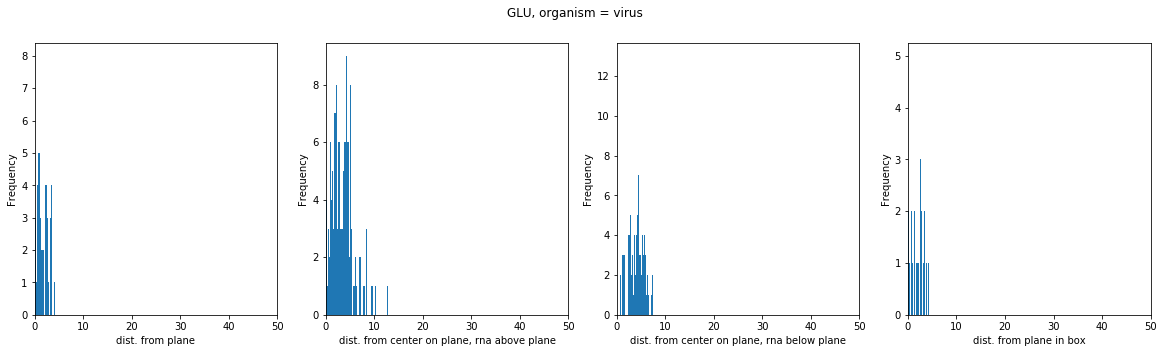

GLU: mean dist. from plane: 1.63, mean dist. on plane, rna above plane: 3.58, mean dist. on plane, rna below plane: 4.1,mean dist. from plane in box: 2.02


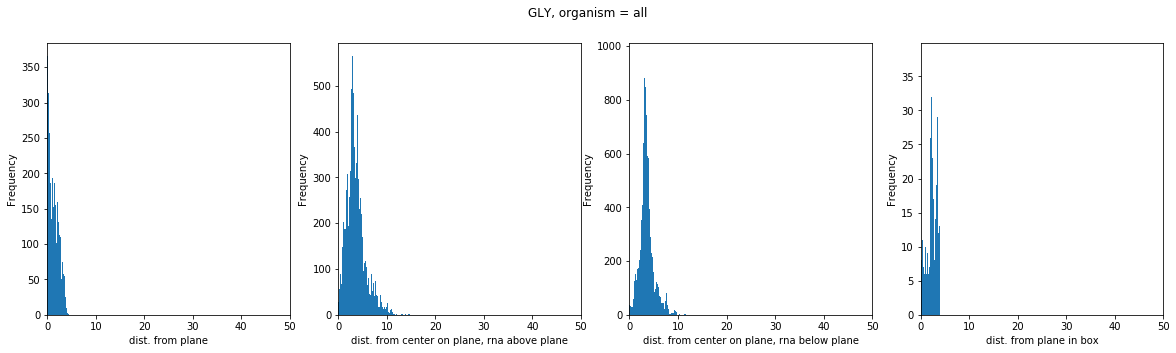

GLY: mean dist. from plane: 1.35, mean dist. on plane, rna above plane: 3.66, mean dist. on plane, rna below plane: 3.57,mean dist. from plane in box: 2.23


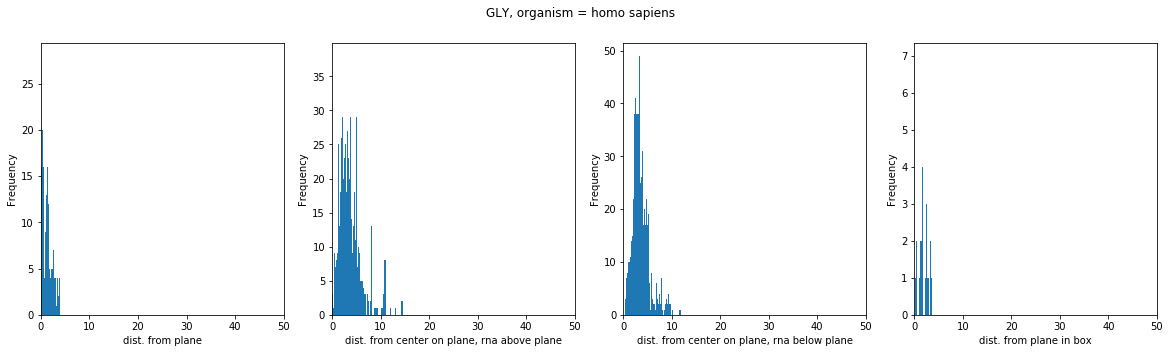

GLY: mean dist. from plane: 1.22, mean dist. on plane, rna above plane: 3.75, mean dist. on plane, rna below plane: 3.56,mean dist. from plane in box: 1.98


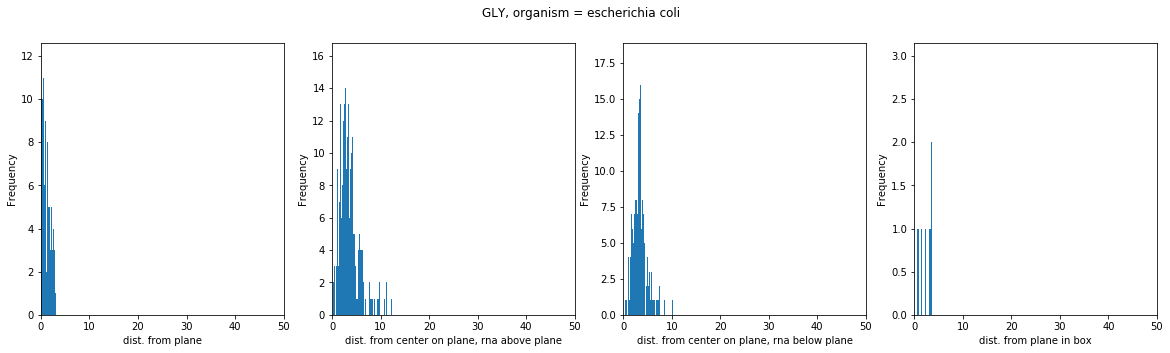

GLY: mean dist. from plane: 1.29, mean dist. on plane, rna above plane: 3.62, mean dist. on plane, rna below plane: 3.52,mean dist. from plane in box: 1.79


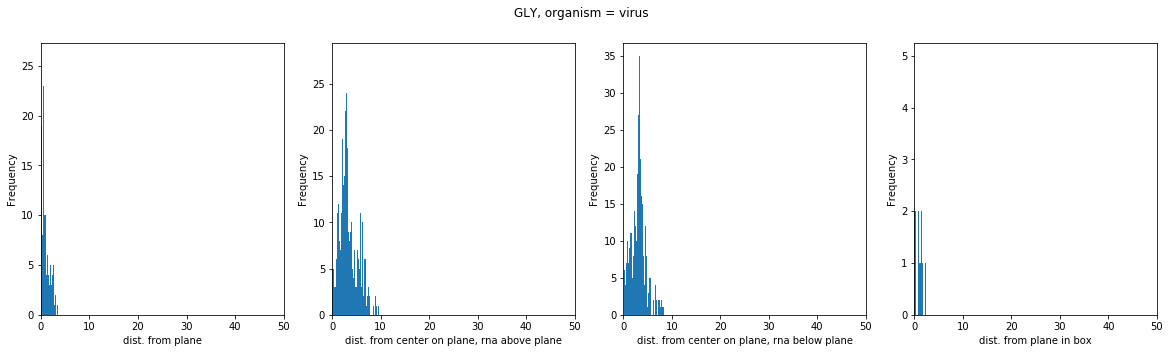

GLY: mean dist. from plane: 0.96, mean dist. on plane, rna above plane: 3.43, mean dist. on plane, rna below plane: 3.14,mean dist. from plane in box: 1.08


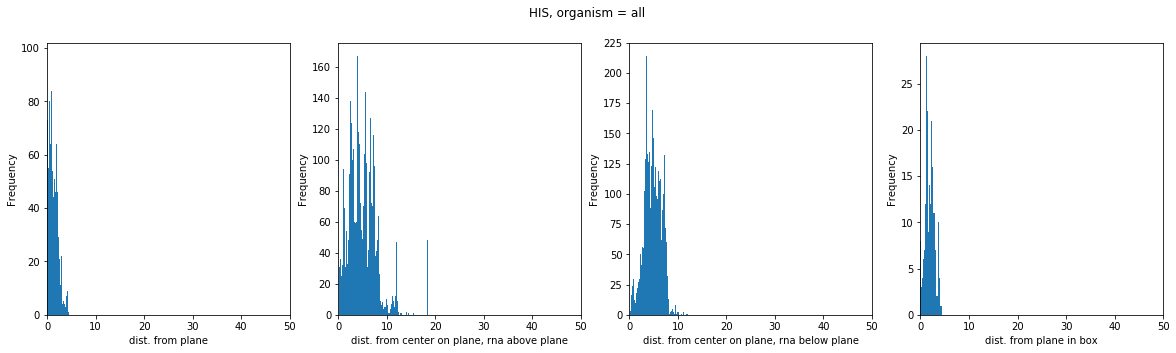

HIS: mean dist. from plane: 1.31, mean dist. on plane, rna above plane: 5.16, mean dist. on plane, rna below plane: 4.85,mean dist. from plane in box: 1.9


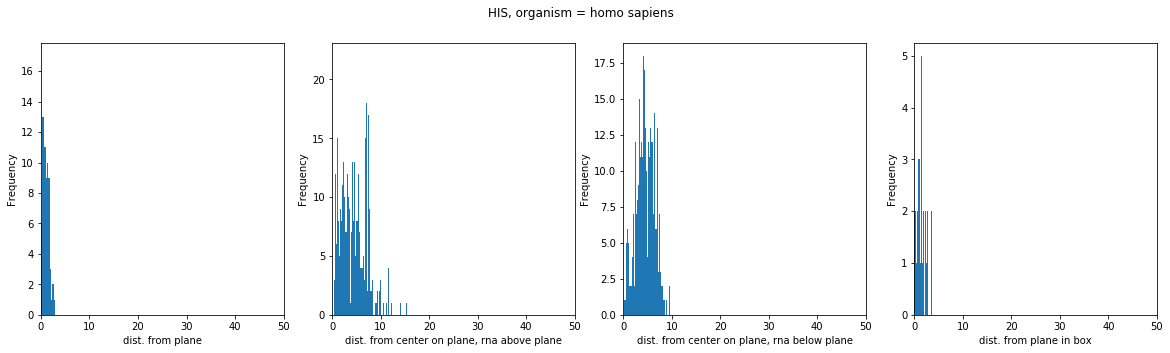

HIS: mean dist. from plane: 1.09, mean dist. on plane, rna above plane: 4.46, mean dist. on plane, rna below plane: 4.64,mean dist. from plane in box: 1.3


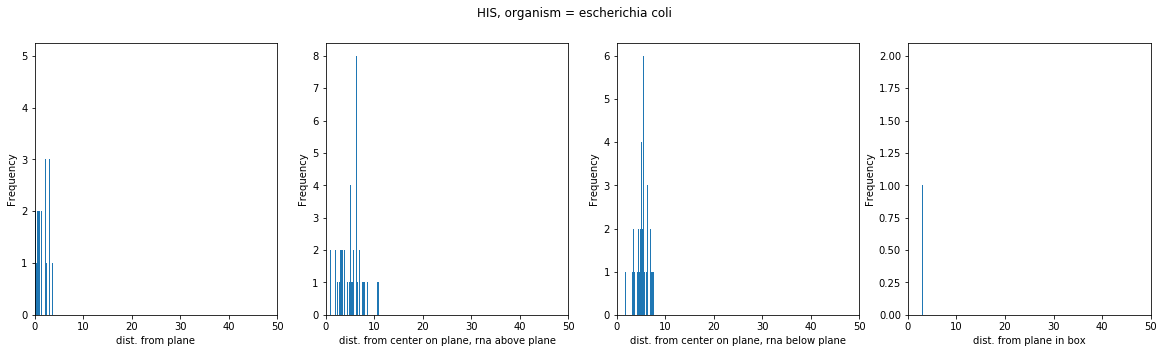

HIS: mean dist. from plane: 1.25, mean dist. on plane, rna above plane: 5.13, mean dist. on plane, rna below plane: 5.28,mean dist. from plane in box: 2.49


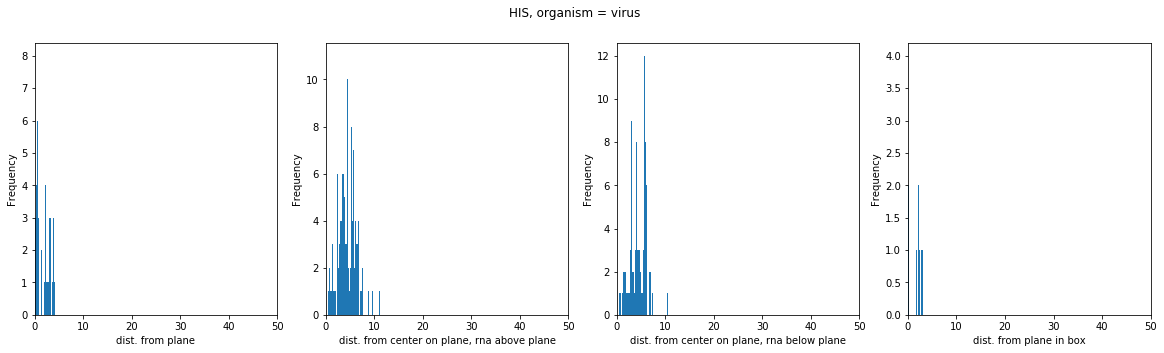

HIS: mean dist. from plane: 1.51, mean dist. on plane, rna above plane: 4.54, mean dist. on plane, rna below plane: 4.39,mean dist. from plane in box: 2.31


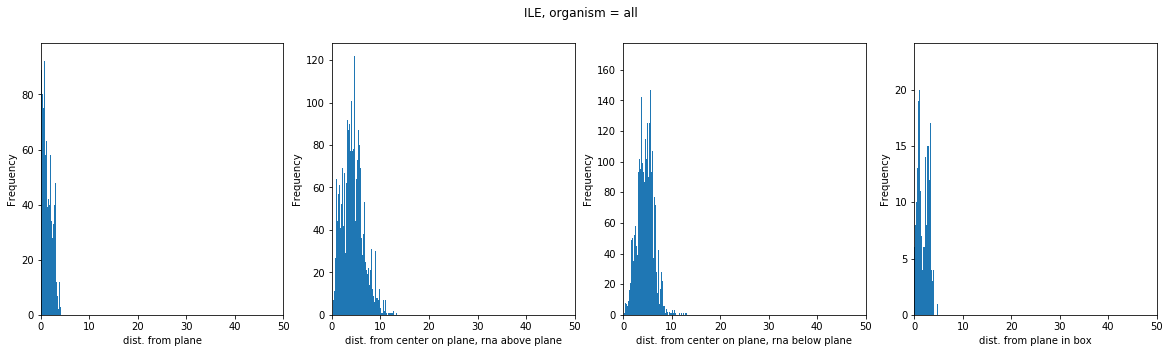

ILE: mean dist. from plane: 1.4, mean dist. on plane, rna above plane: 4.36, mean dist. on plane, rna below plane: 4.64,mean dist. from plane in box: 1.82


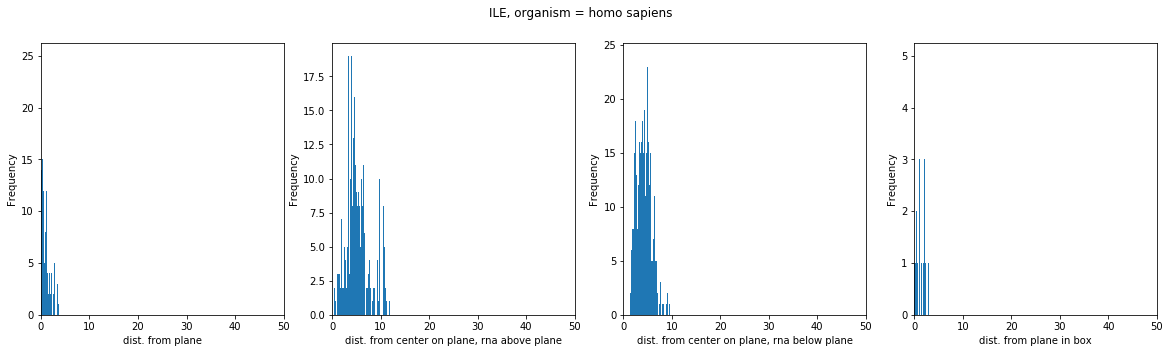

ILE: mean dist. from plane: 0.97, mean dist. on plane, rna above plane: 5.12, mean dist. on plane, rna below plane: 4.2,mean dist. from plane in box: 1.34


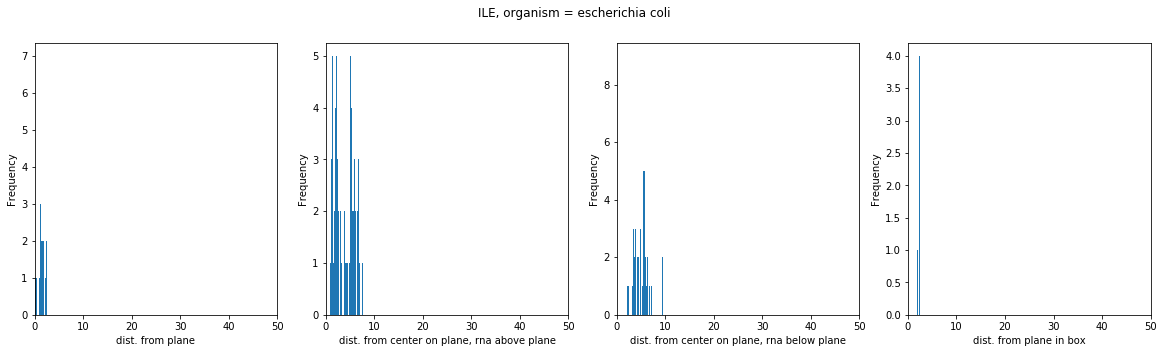

ILE: mean dist. from plane: 1.45, mean dist. on plane, rna above plane: 3.84, mean dist. on plane, rna below plane: 4.72,mean dist. from plane in box: 1.8


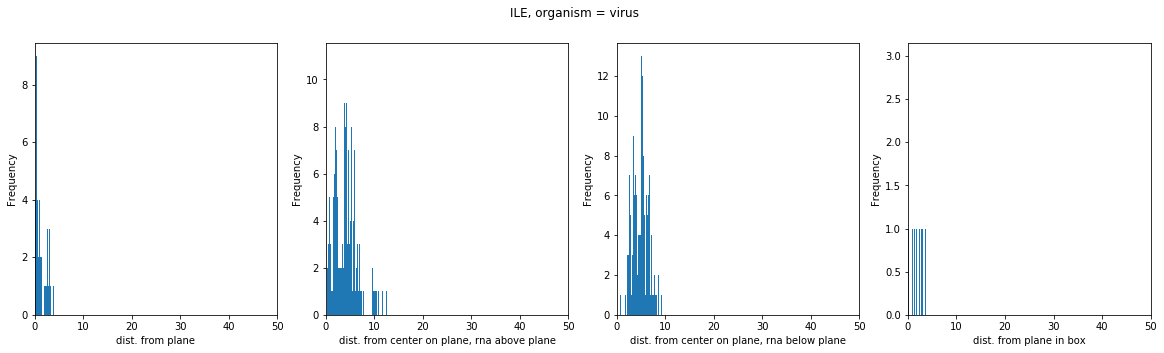

ILE: mean dist. from plane: 1.25, mean dist. on plane, rna above plane: 4.49, mean dist. on plane, rna below plane: 4.85,mean dist. from plane in box: 2.16


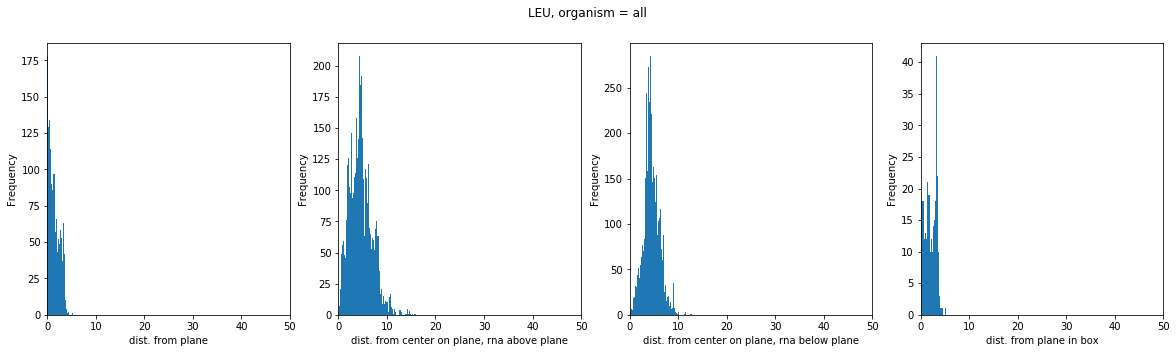

LEU: mean dist. from plane: 1.43, mean dist. on plane, rna above plane: 4.57, mean dist. on plane, rna below plane: 4.59,mean dist. from plane in box: 1.95


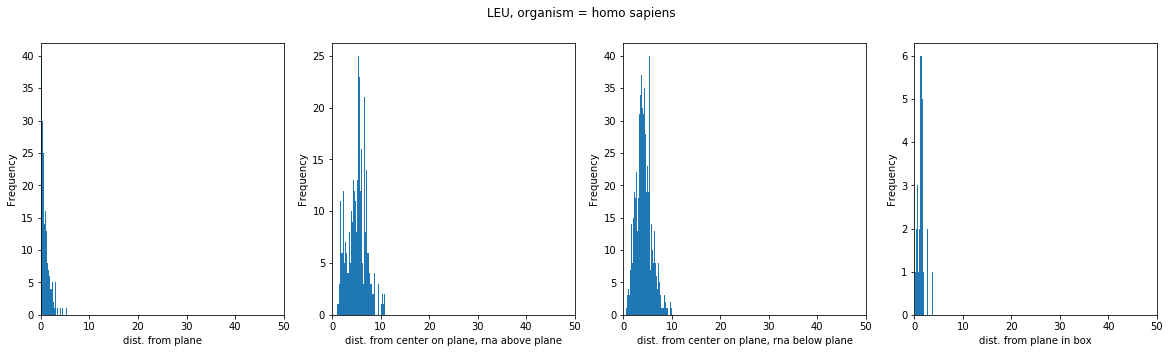

LEU: mean dist. from plane: 0.9, mean dist. on plane, rna above plane: 5.1, mean dist. on plane, rna below plane: 4.26,mean dist. from plane in box: 1.34


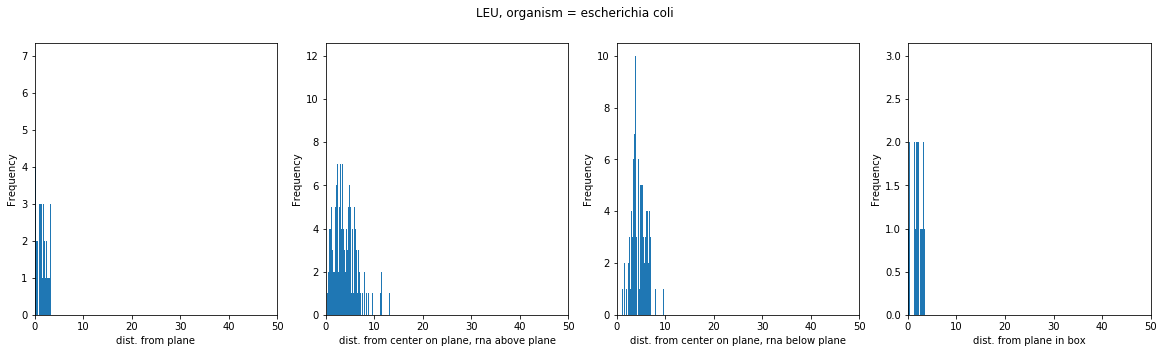

LEU: mean dist. from plane: 1.69, mean dist. on plane, rna above plane: 4.1, mean dist. on plane, rna below plane: 4.67,mean dist. from plane in box: 2.27


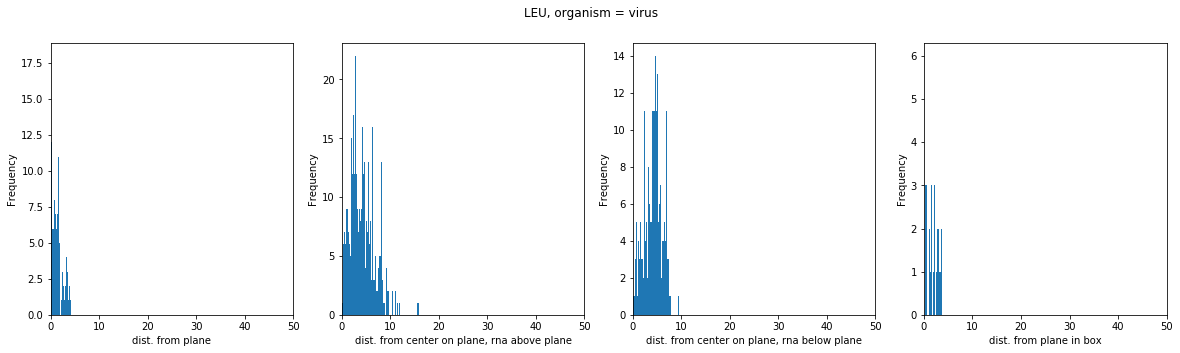

LEU: mean dist. from plane: 1.38, mean dist. on plane, rna above plane: 4.29, mean dist. on plane, rna below plane: 4.38,mean dist. from plane in box: 1.77


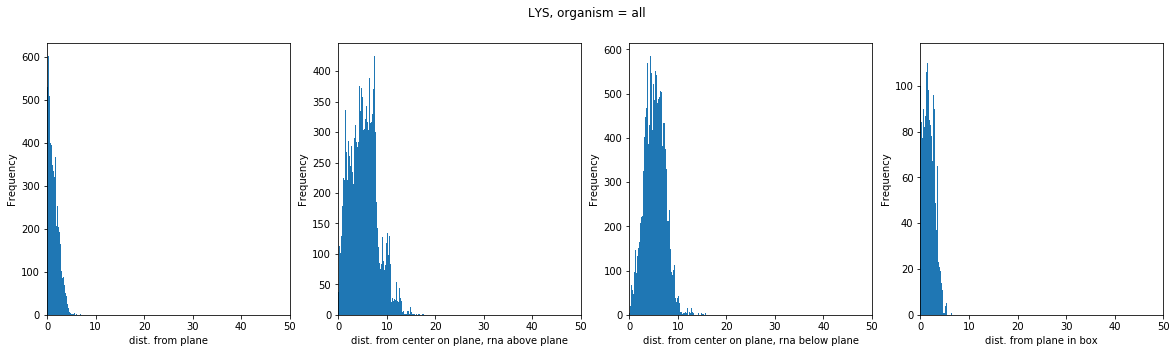

LYS: mean dist. from plane: 1.39, mean dist. on plane, rna above plane: 5.24, mean dist. on plane, rna below plane: 5.25,mean dist. from plane in box: 1.85


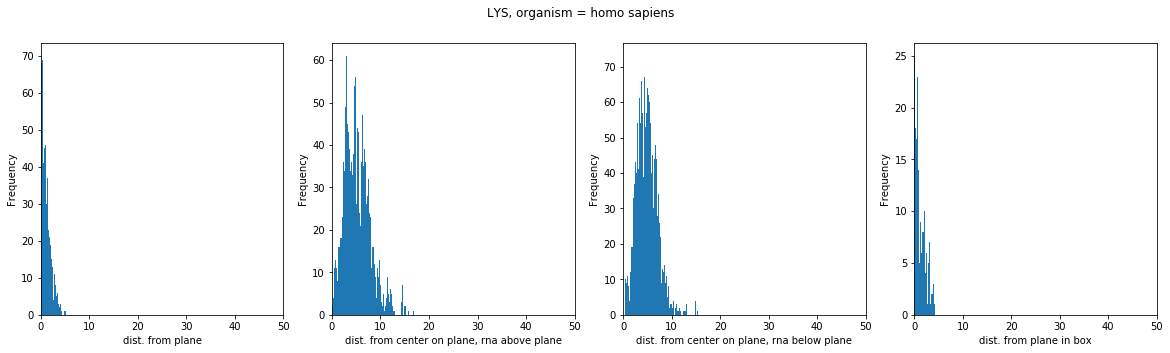

LYS: mean dist. from plane: 1.11, mean dist. on plane, rna above plane: 5.2, mean dist. on plane, rna below plane: 4.92,mean dist. from plane in box: 1.29


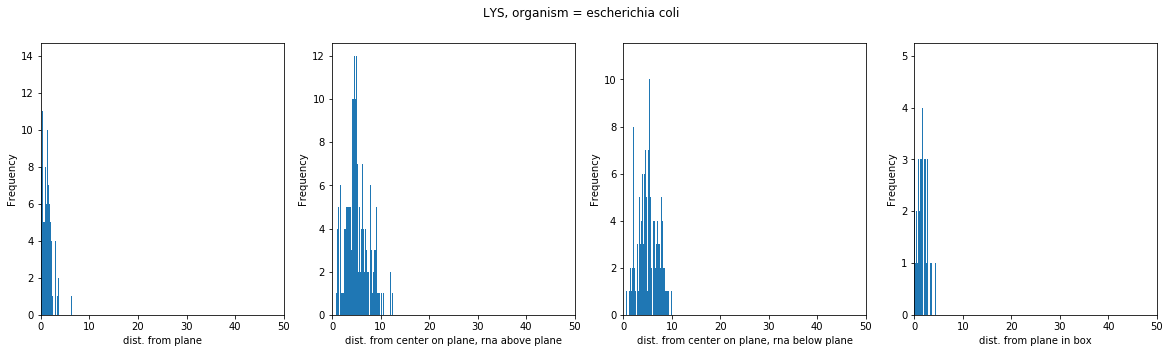

LYS: mean dist. from plane: 1.31, mean dist. on plane, rna above plane: 5.13, mean dist. on plane, rna below plane: 4.98,mean dist. from plane in box: 1.56


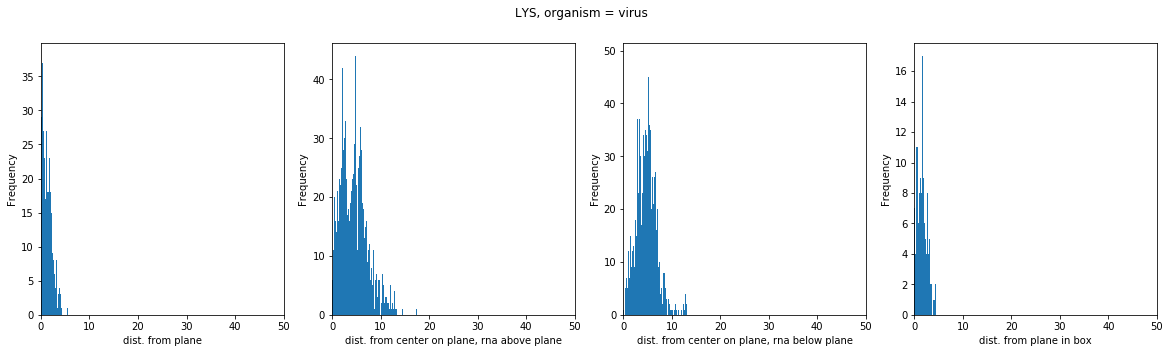

LYS: mean dist. from plane: 1.32, mean dist. on plane, rna above plane: 4.58, mean dist. on plane, rna below plane: 4.86,mean dist. from plane in box: 1.62


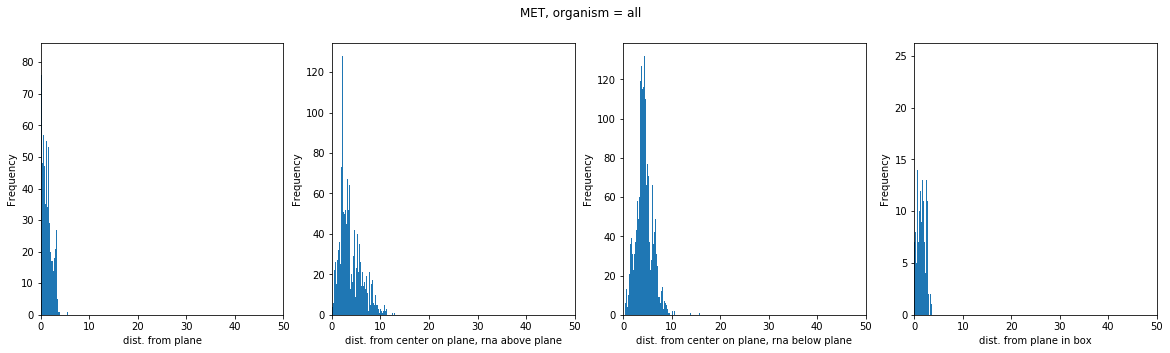

MET: mean dist. from plane: 1.36, mean dist. on plane, rna above plane: 3.97, mean dist. on plane, rna below plane: 4.34,mean dist. from plane in box: 1.56


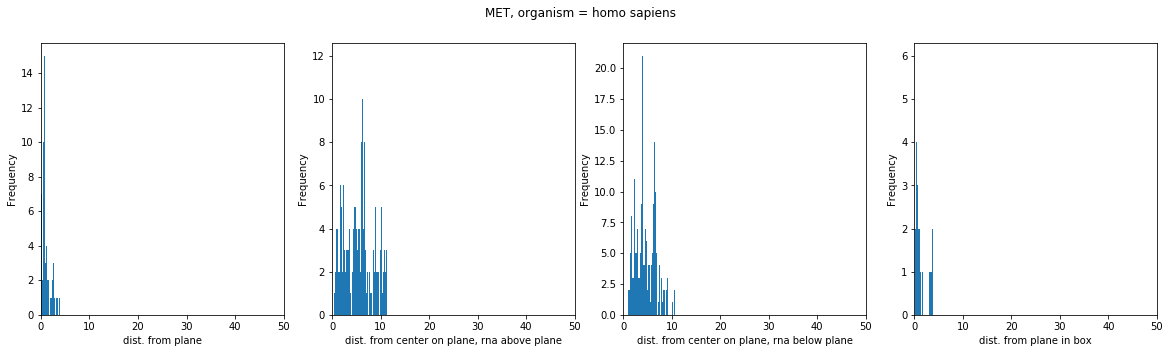

MET: mean dist. from plane: 1.04, mean dist. on plane, rna above plane: 5.06, mean dist. on plane, rna below plane: 4.6,mean dist. from plane in box: 1.33


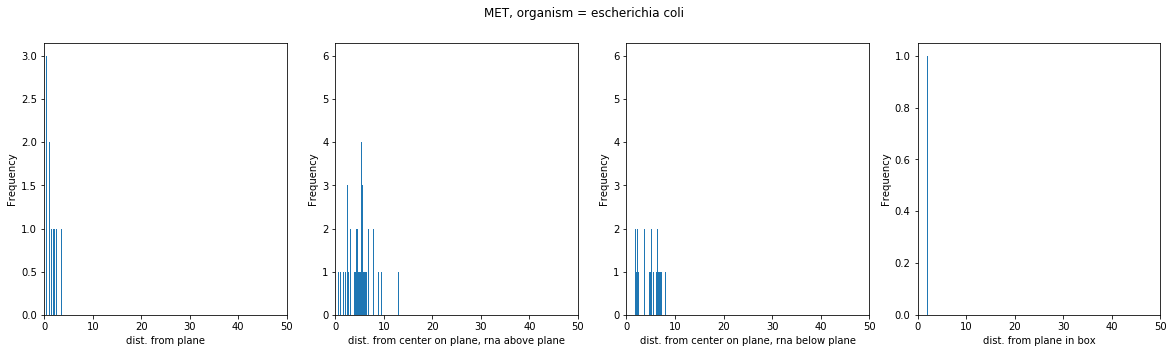

MET: mean dist. from plane: 1.2, mean dist. on plane, rna above plane: 4.55, mean dist. on plane, rna below plane: 5.41,mean dist. from plane in box: 2.3


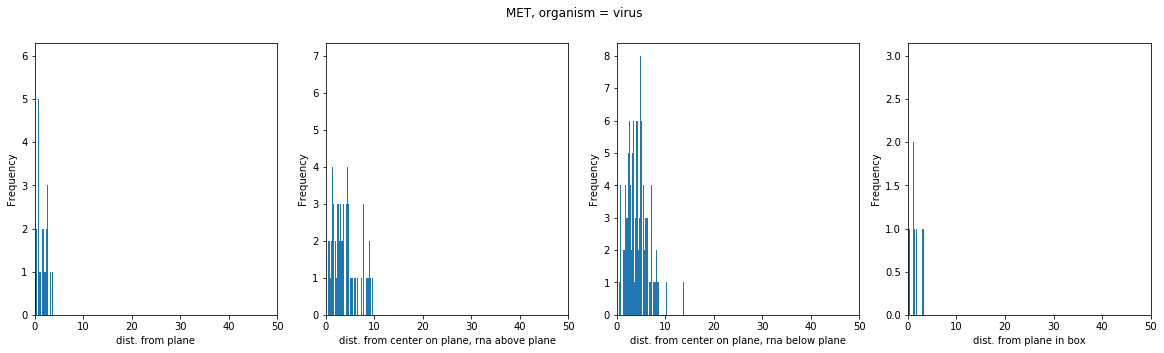

MET: mean dist. from plane: 1.44, mean dist. on plane, rna above plane: 4.11, mean dist. on plane, rna below plane: 4.41,mean dist. from plane in box: 1.26


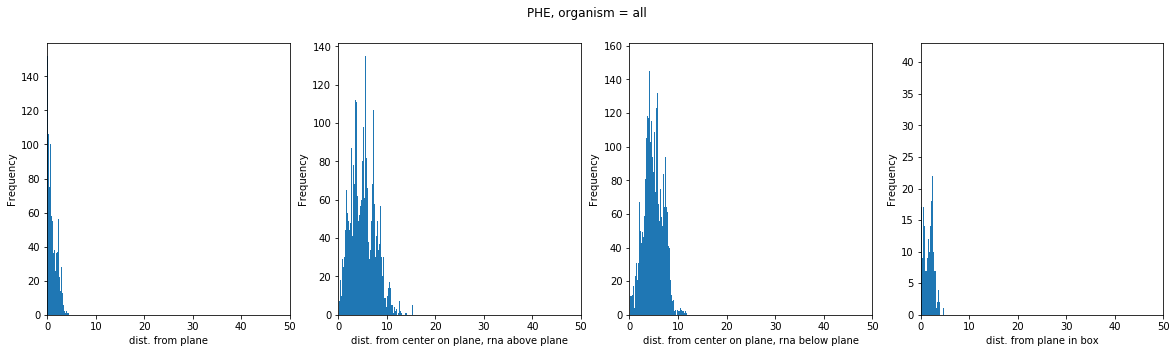

PHE: mean dist. from plane: 1.18, mean dist. on plane, rna above plane: 5.23, mean dist. on plane, rna below plane: 5.0,mean dist. from plane in box: 1.63


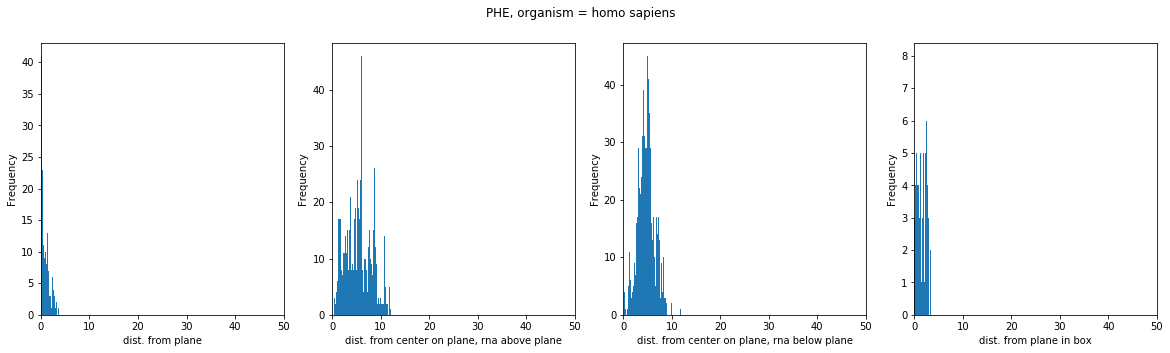

PHE: mean dist. from plane: 1.02, mean dist. on plane, rna above plane: 5.61, mean dist. on plane, rna below plane: 4.75,mean dist. from plane in box: 1.63


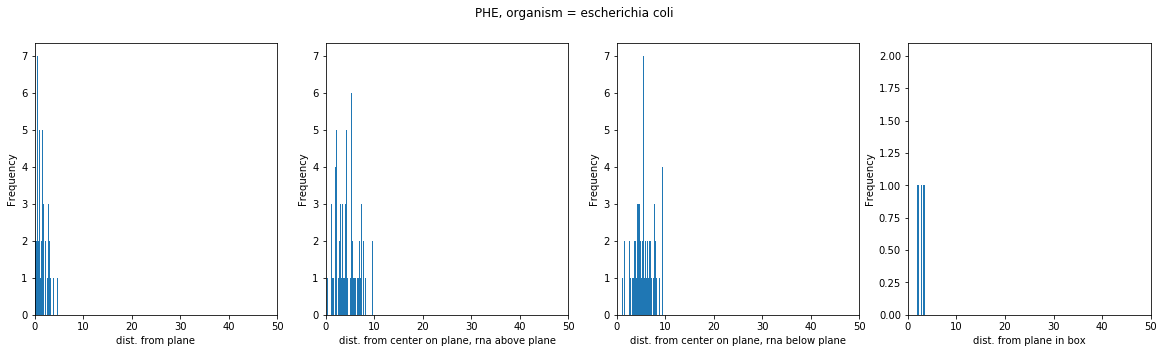

PHE: mean dist. from plane: 1.71, mean dist. on plane, rna above plane: 4.75, mean dist. on plane, rna below plane: 5.3,mean dist. from plane in box: 2.51


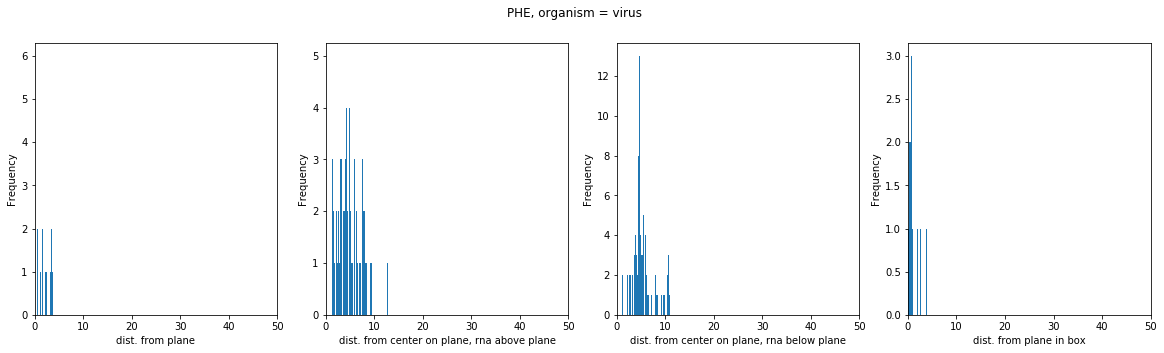

PHE: mean dist. from plane: 1.43, mean dist. on plane, rna above plane: 4.94, mean dist. on plane, rna below plane: 5.27,mean dist. from plane in box: 1.64


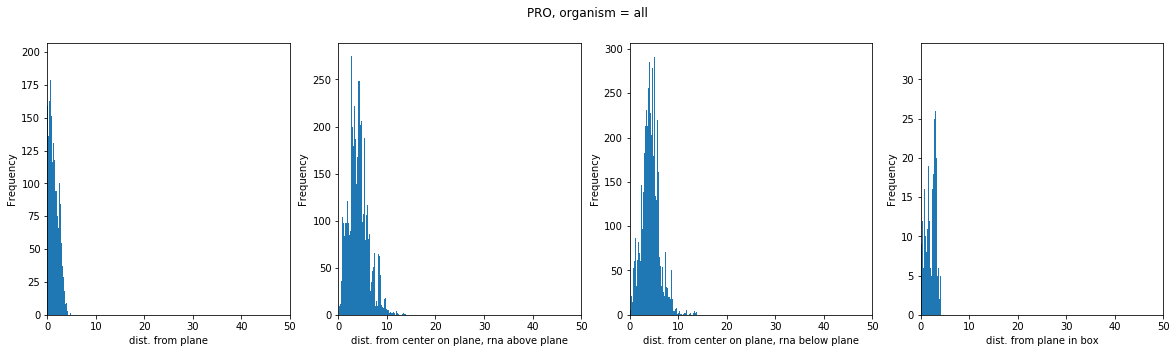

PRO: mean dist. from plane: 1.35, mean dist. on plane, rna above plane: 4.13, mean dist. on plane, rna below plane: 4.32,mean dist. from plane in box: 2.1


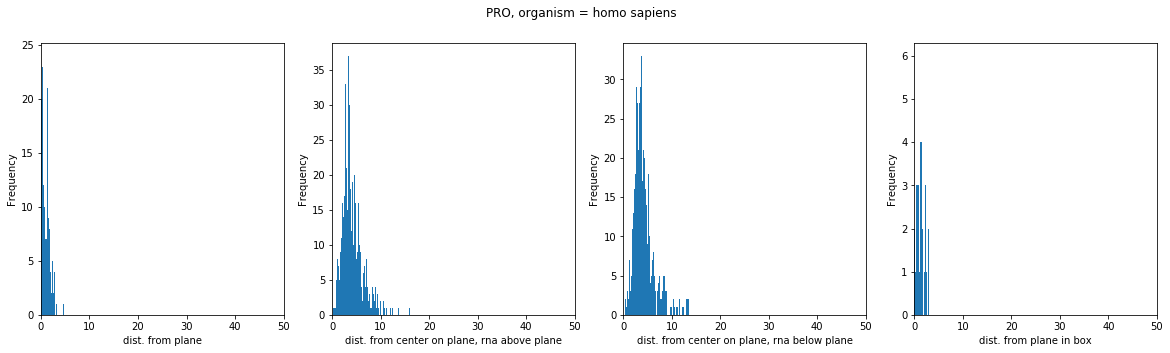

PRO: mean dist. from plane: 0.97, mean dist. on plane, rna above plane: 4.13, mean dist. on plane, rna below plane: 4.34,mean dist. from plane in box: 1.22


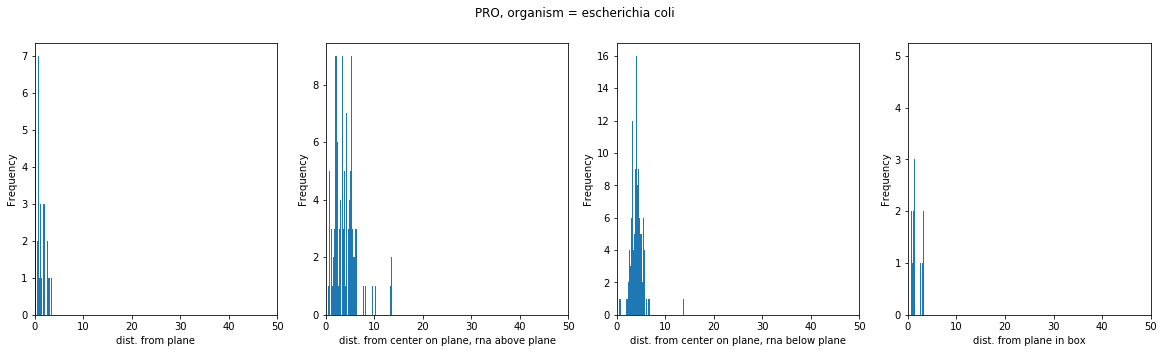

PRO: mean dist. from plane: 1.32, mean dist. on plane, rna above plane: 3.98, mean dist. on plane, rna below plane: 4.16,mean dist. from plane in box: 1.63


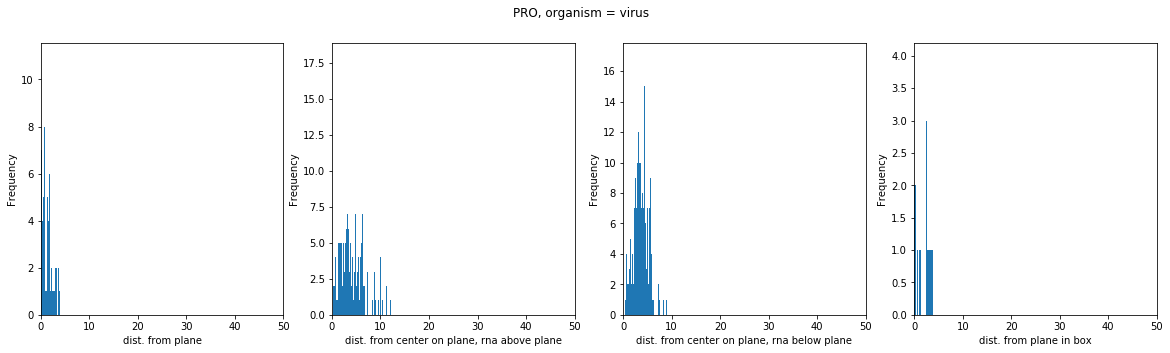

PRO: mean dist. from plane: 1.34, mean dist. on plane, rna above plane: 4.28, mean dist. on plane, rna below plane: 3.67,mean dist. from plane in box: 1.7


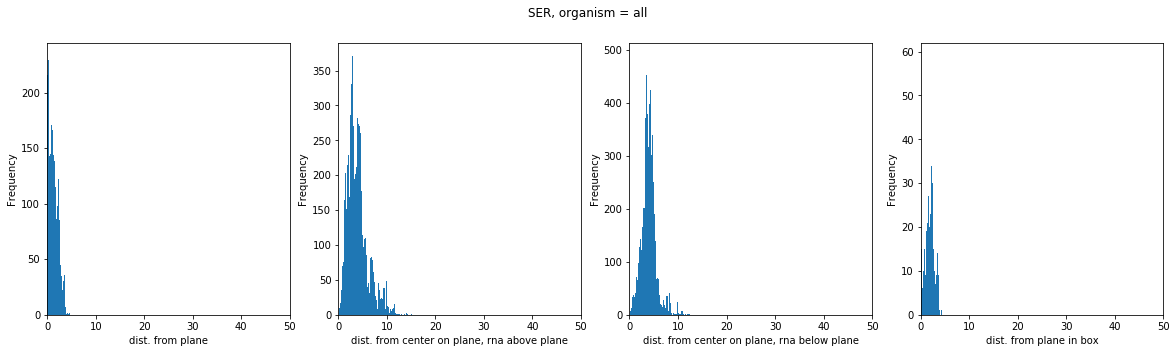

SER: mean dist. from plane: 1.3, mean dist. on plane, rna above plane: 3.96, mean dist. on plane, rna below plane: 3.94,mean dist. from plane in box: 1.91


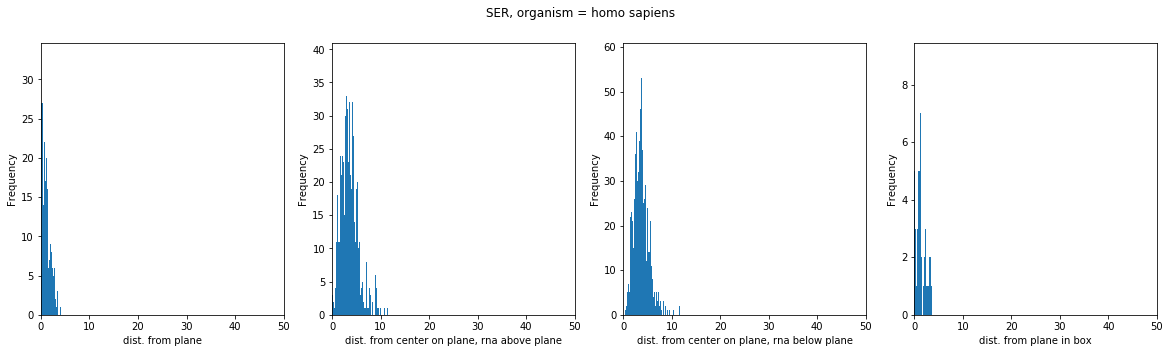

SER: mean dist. from plane: 1.1, mean dist. on plane, rna above plane: 3.63, mean dist. on plane, rna below plane: 3.67,mean dist. from plane in box: 1.43


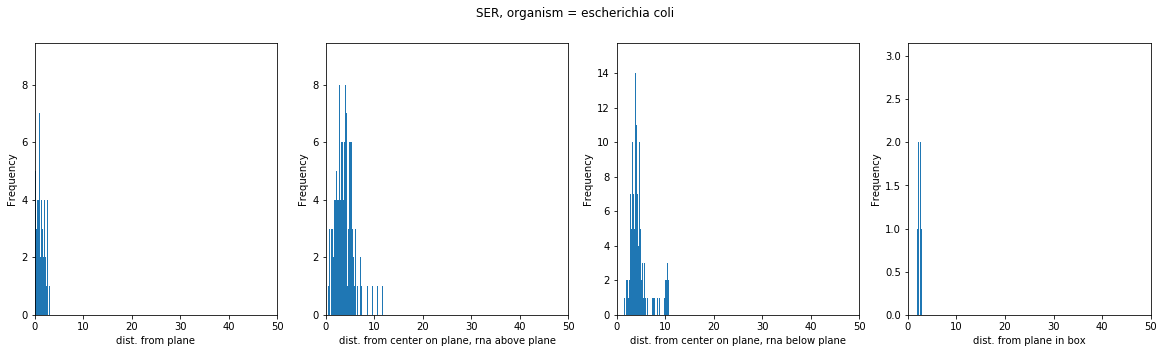

SER: mean dist. from plane: 1.34, mean dist. on plane, rna above plane: 3.96, mean dist. on plane, rna below plane: 4.31,mean dist. from plane in box: 2.1


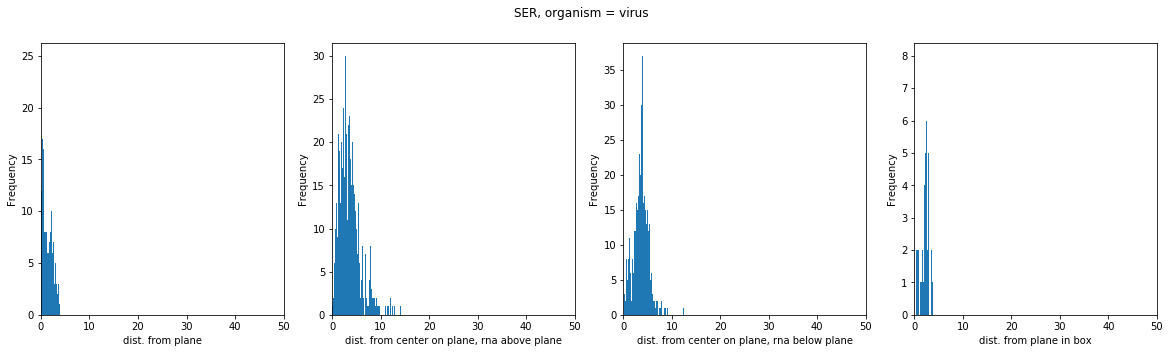

SER: mean dist. from plane: 1.41, mean dist. on plane, rna above plane: 3.63, mean dist. on plane, rna below plane: 3.77,mean dist. from plane in box: 2.08


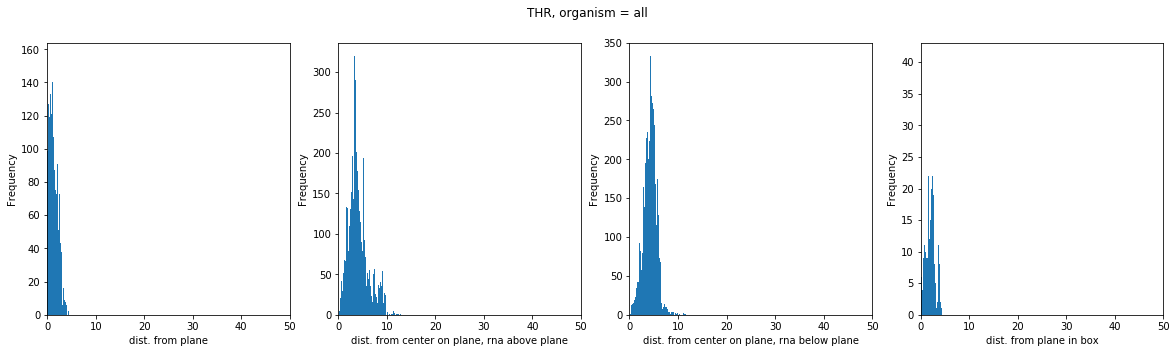

THR: mean dist. from plane: 1.35, mean dist. on plane, rna above plane: 4.19, mean dist. on plane, rna below plane: 4.21,mean dist. from plane in box: 2.02


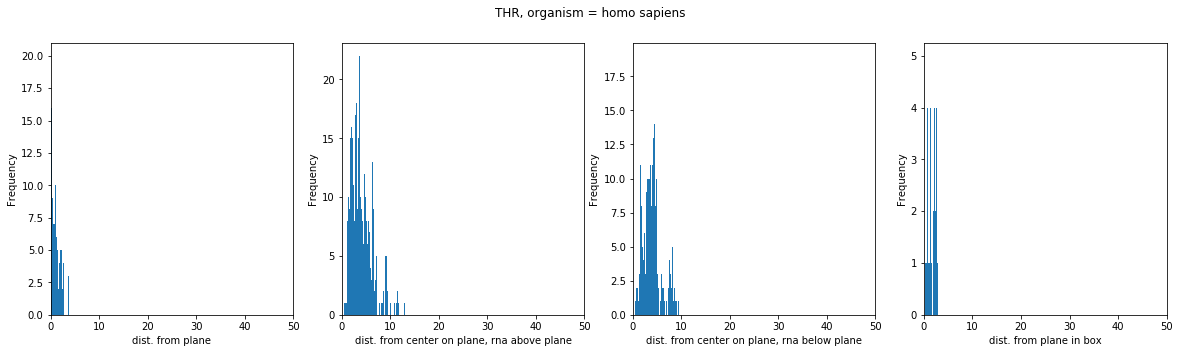

THR: mean dist. from plane: 1.18, mean dist. on plane, rna above plane: 4.04, mean dist. on plane, rna below plane: 3.96,mean dist. from plane in box: 1.69


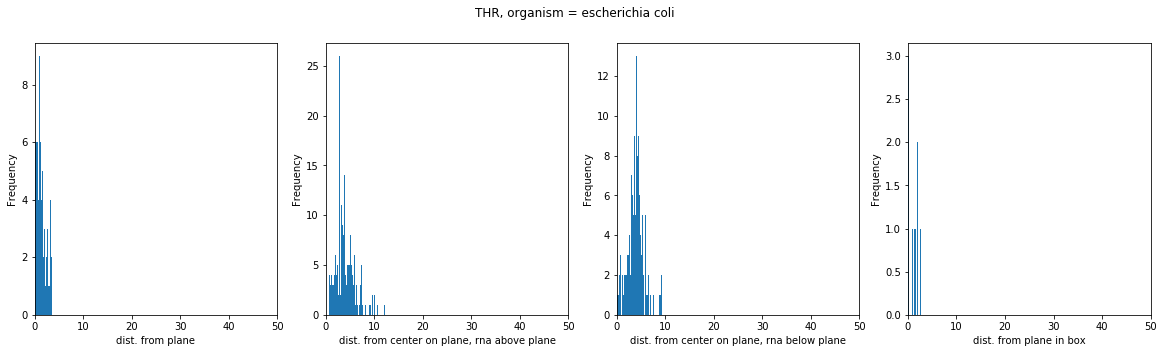

THR: mean dist. from plane: 1.3, mean dist. on plane, rna above plane: 3.93, mean dist. on plane, rna below plane: 3.95,mean dist. from plane in box: 1.59


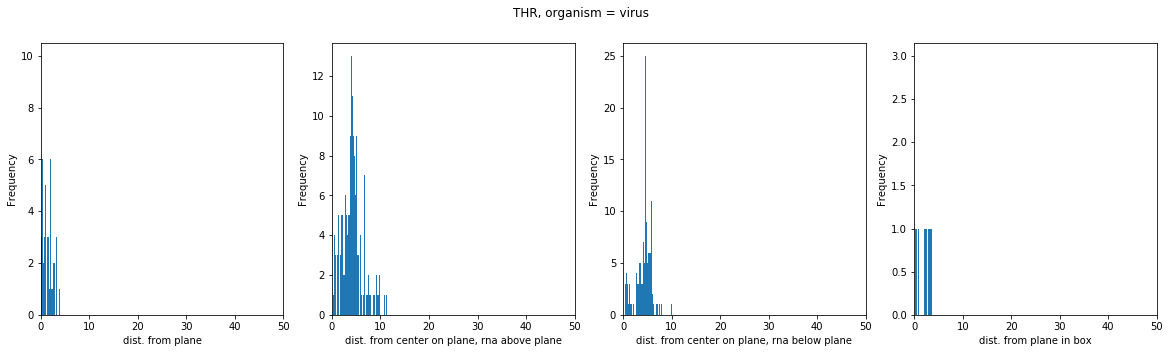

THR: mean dist. from plane: 1.31, mean dist. on plane, rna above plane: 4.21, mean dist. on plane, rna below plane: 4.34,mean dist. from plane in box: 1.67


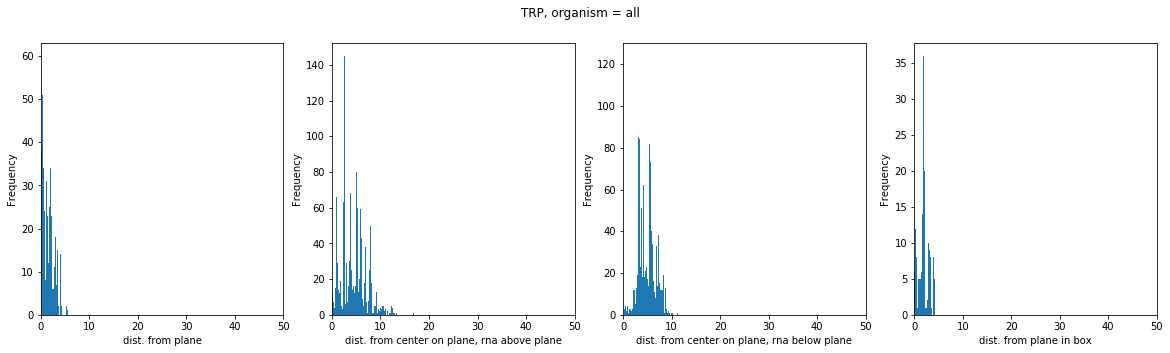

TRP: mean dist. from plane: 1.46, mean dist. on plane, rna above plane: 4.38, mean dist. on plane, rna below plane: 4.97,mean dist. from plane in box: 2.08


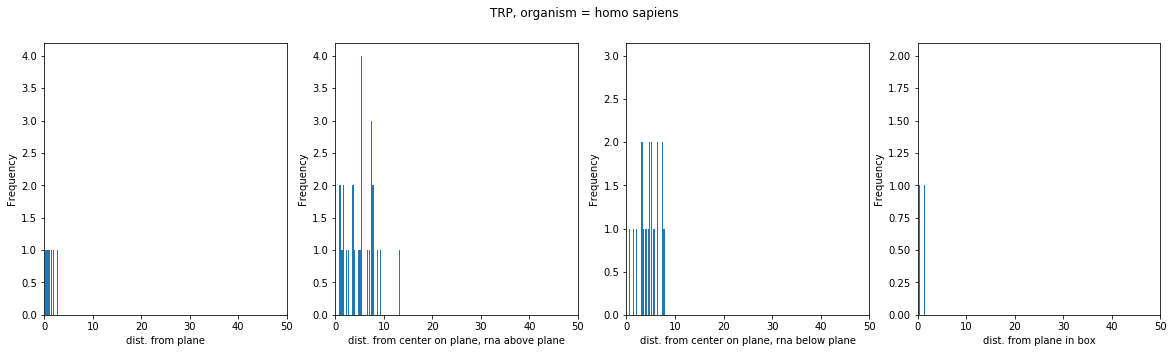

TRP: mean dist. from plane: 1.23, mean dist. on plane, rna above plane: 4.8, mean dist. on plane, rna below plane: 4.41,mean dist. from plane in box: 1.22


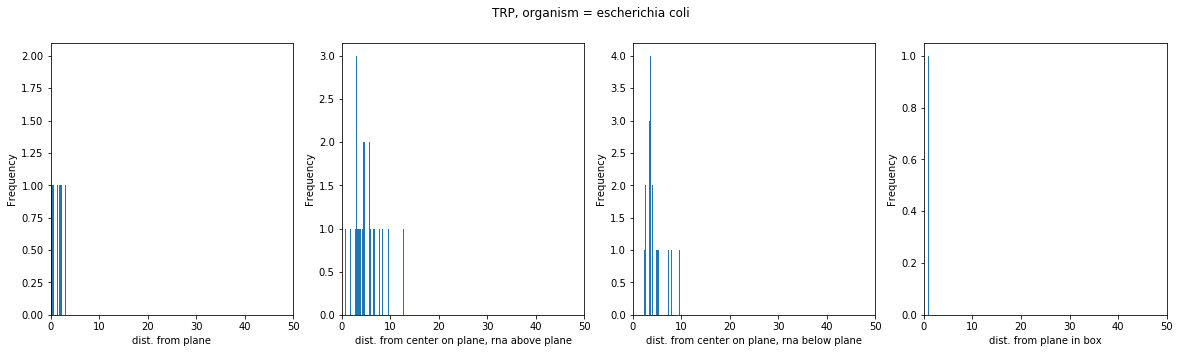

TRP: mean dist. from plane: 1.17, mean dist. on plane, rna above plane: 5.14, mean dist. on plane, rna below plane: 4.3,mean dist. from plane in box: 0.89


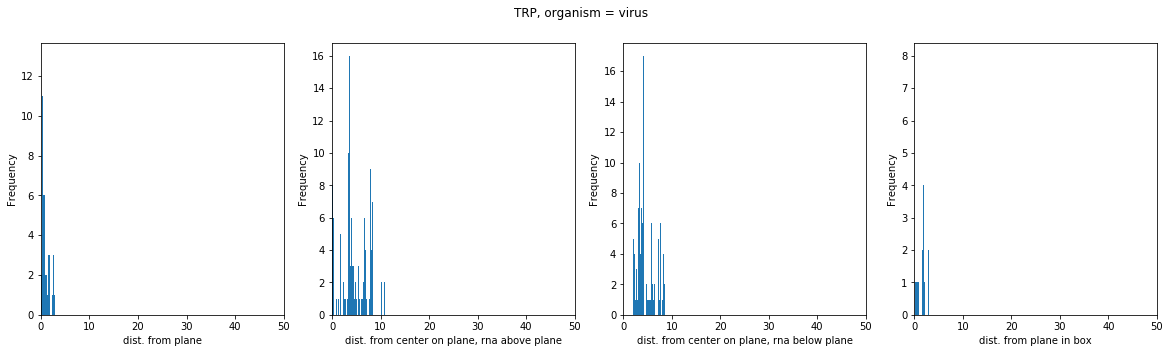

TRP: mean dist. from plane: 0.98, mean dist. on plane, rna above plane: 5.05, mean dist. on plane, rna below plane: 5.01,mean dist. from plane in box: 1.28


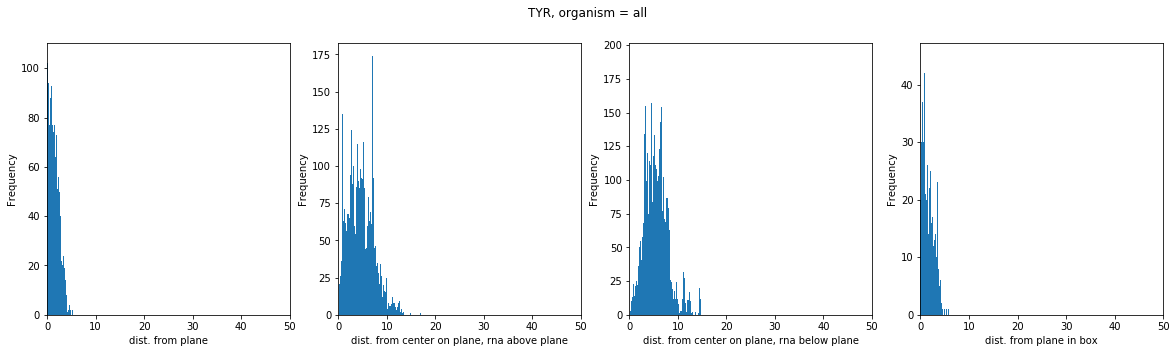

TYR: mean dist. from plane: 1.47, mean dist. on plane, rna above plane: 4.76, mean dist. on plane, rna below plane: 5.64,mean dist. from plane in box: 1.73


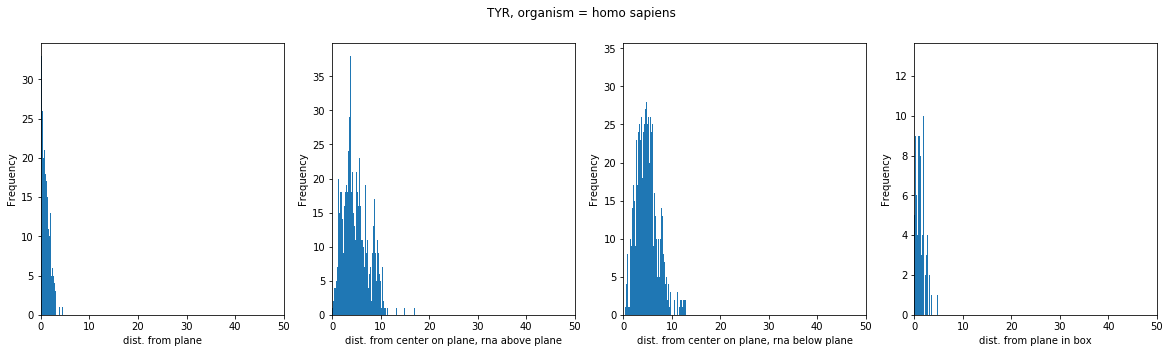

TYR: mean dist. from plane: 1.09, mean dist. on plane, rna above plane: 4.78, mean dist. on plane, rna below plane: 4.87,mean dist. from plane in box: 1.25


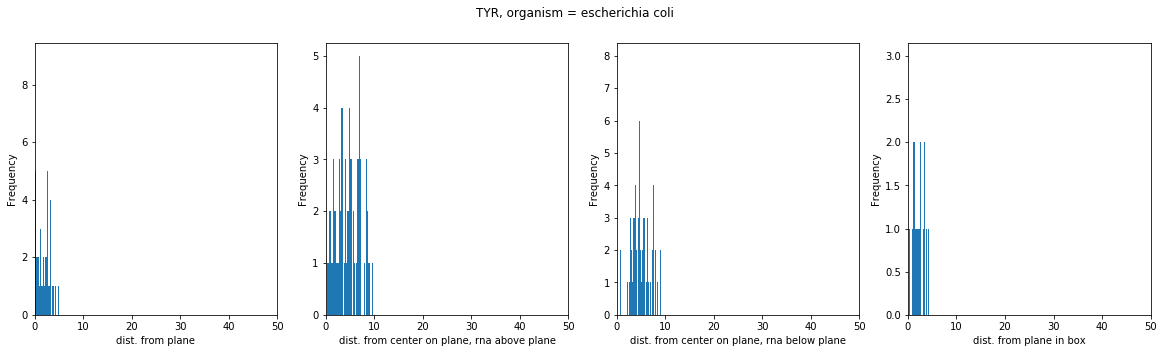

TYR: mean dist. from plane: 1.56, mean dist. on plane, rna above plane: 4.27, mean dist. on plane, rna below plane: 4.92,mean dist. from plane in box: 2.29


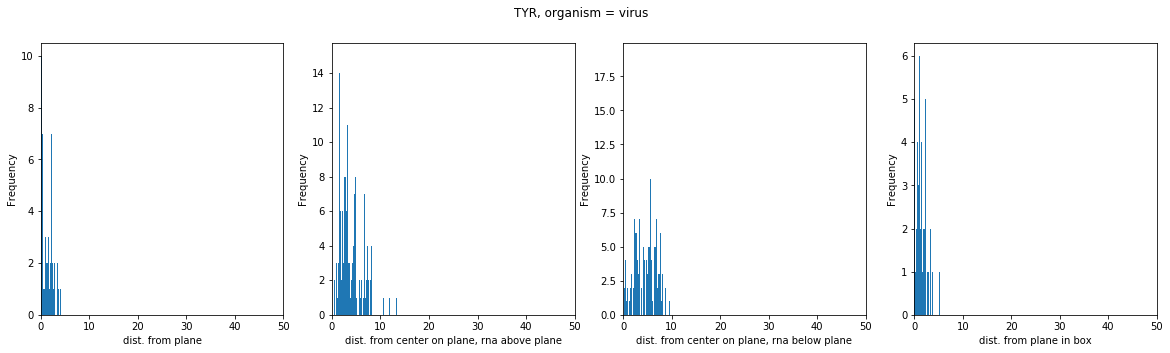

TYR: mean dist. from plane: 1.4, mean dist. on plane, rna above plane: 3.81, mean dist. on plane, rna below plane: 4.56,mean dist. from plane in box: 1.67


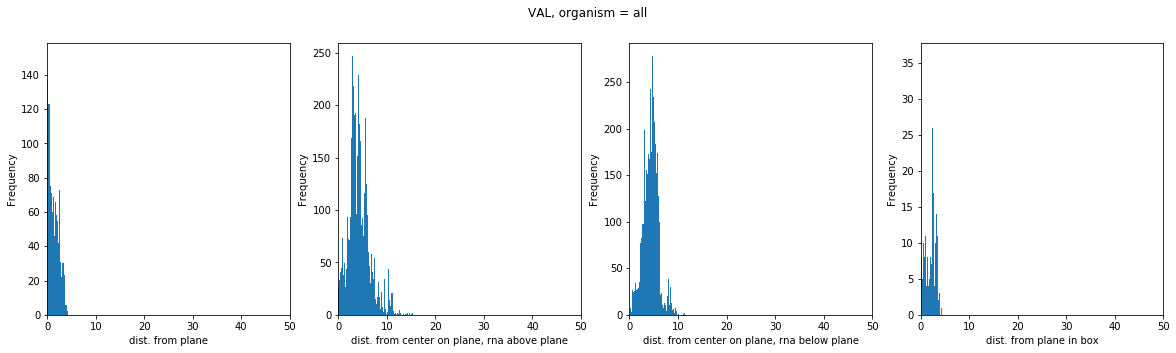

VAL: mean dist. from plane: 1.36, mean dist. on plane, rna above plane: 4.36, mean dist. on plane, rna below plane: 4.4,mean dist. from plane in box: 2.15


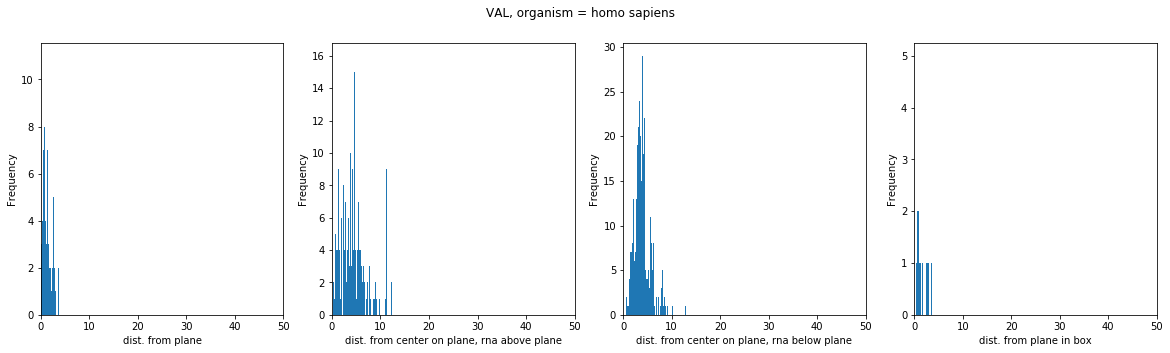

VAL: mean dist. from plane: 1.26, mean dist. on plane, rna above plane: 4.51, mean dist. on plane, rna below plane: 3.99,mean dist. from plane in box: 1.52


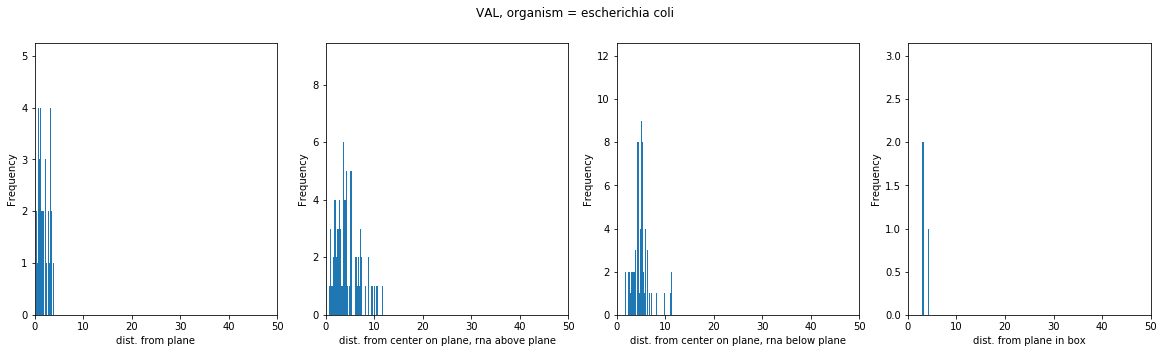

VAL: mean dist. from plane: 1.58, mean dist. on plane, rna above plane: 4.62, mean dist. on plane, rna below plane: 5.02,mean dist. from plane in box: 2.93


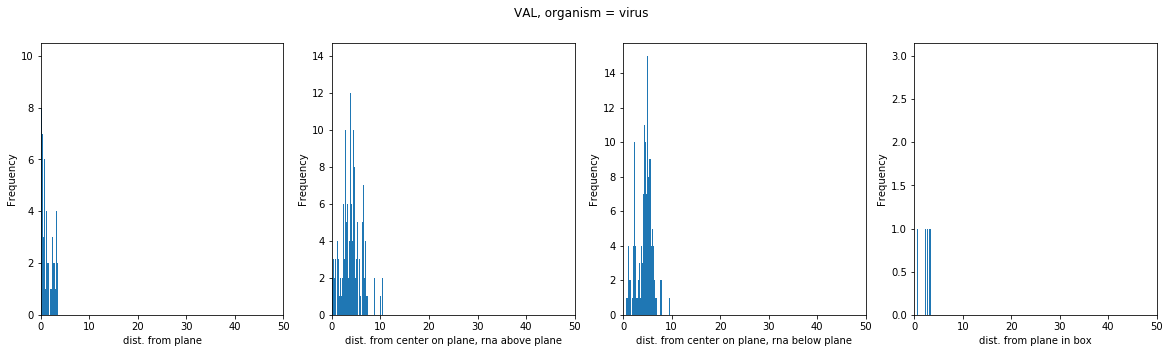

VAL: mean dist. from plane: 1.44, mean dist. on plane, rna above plane: 4.12, mean dist. on plane, rna below plane: 4.29,mean dist. from plane in box: 1.94


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]

for name, data1 in df.groupby('Amino acid'):
    for o in organisms:
        if o == 'all':
            data = data1
        else:
            data = data1.loc[data1['organism'].str.contains(o)]

        dist = data.loc[data['closest rna above dist.'] != 'None', ['closest rna above dist.', 'closest rna above perp.']].astype(
        float)
        dist_from_plane = dist['closest rna above perp.'].values
        dist_on_plane = (dist['closest rna above dist.'].values ** 2 - dist['closest rna above perp.'].values ** 2) ** (1/2)
        dist_in = data.loc[data['closest rna above in'] == 'True', 'closest rna above perp.'].astype(float).values

        dist_below = data.loc[data['closest rna below dist.'] != 'None', ['closest rna below dist.', 
                                                                            'closest rna below perp.']].astype(float)

        dist_on_plane_below = (dist_below['closest rna below dist.'].values ** 2 -
                               dist_below['closest rna below perp.'].values ** 2) ** (1/2)

        f2, (ax4, ax5, ax6, ax7) = plt.subplots(1, 4)
        f2.suptitle(f'{name}, organism = {o}')

        ax4.hist(dist_from_plane, bins=100)
        ax4.set_xlim(left=0, right=50)
        ax4.set_xlabel('dist. from plane')
        ax4.set_ylabel('Frequency')

        ax5.hist(dist_on_plane, bins=100)
        ax5.set_xlim(left=0, right=50)
        ax5.set_xlabel('dist. from center on plane, rna above plane')
        ax5.set_ylabel('Frequency')

        ax6.hist(dist_on_plane_below, bins=100)
        ax6.set_xlim(left=0, right=50)
        ax6.set_xlabel('dist. from center on plane, rna below plane')
        ax6.set_ylabel('Frequency')

        ax7.hist(dist_in, bins=100)
        ax7.set_xlim(left=0, right=50)
        ax7.set_xlabel('dist. from plane in box')
        ax7.set_ylabel('Frequency')

        plt.show()

        print(f'{name}: mean dist. from plane: {np.round(np.mean(dist_from_plane), 2)}, '
              f'mean dist. on plane, rna above plane: {np.round(np.mean(dist_on_plane), 2)}, '
              f'mean dist. on plane, rna below plane: {np.round(np.mean(dist_on_plane_below), 2)},'
              f'mean dist. from plane in box: {np.round(np.mean(dist_in), 2)}')